## Part I: Data Pre-processing

In [1]:
import pandas as pd

In [ ]:
# Download the Google Analogy dataset
# !wget http://download.tensorflow.org/data/questions-words.txt

--2025-09-13 15:50:18--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.66.91, 142.250.196.219, 142.250.204.59, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.66.91|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.02s   

2025-09-13 15:50:19 (31.8 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [2]:
# Preprocess the dataset
file_name = "questions-words"
with open(f"{file_name}.txt", "r") as f:
    data = f.read().splitlines()

In [3]:
# check data from the first 10 entries
for entry in data[:10]:
    print(entry)

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [5]:
# TODO1: Write your code here for processing data to pd.DataFrame
# Please note that the first five mentions of ": " indicate `semantic`,
# and the remaining nine belong to the `syntatic` category.
questions = []
categories = []
sub_categories = []

counter = 0
current_category = ""
current_sub = ""
for entry in data:
    if entry[0] == ":":
        counter += 1
        current_sub = entry
        if counter < 6:
            current_category = "Semantic"
        else:
            current_category = "Syntactic"
        continue
    questions.append(entry)
    categories.append(current_category)
    sub_categories.append(current_sub)


In [6]:
# Create the dataframe
df = pd.DataFrame(
    {
        "Question": questions,
        "Category": categories,
        "SubCategory": sub_categories,
    }
)

In [7]:
df.head(12146)

,Question,Category,SubCategory
0,Athens Greece Baghdad Iraq,Semantic,: capital-common-countries
1,Athens Greece Bangkok Thailand,Semantic,: capital-common-countries
2,Athens Greece Beijing China,Semantic,: capital-common-countries
3,Athens Greece Berlin Germany,Semantic,: capital-common-countries
4,Athens Greece Bern Switzerland,Semantic,: capital-common-countries
...,...,...,...
12141,cool coolest great greatest,Syntactic,: gram4-superlative
12142,cool coolest high highest,Syntactic,: gram4-superlative
12143,cool coolest hot hottest,Syntactic,: gram4-superlative
12144,cool coolest large largest,Syntactic,: gram4-superlative


In [9]:
df.to_csv(f"{file_name}.csv", index=False)

## Part II: Use pre-trained word embeddings
- After finish Part I, you can run Part II code blocks only.

In [14]:
import pandas as pd
import numpy as np
import gensim.downloader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import multiprocessing
from gensim.models import Word2Vec

In [15]:
data = pd.read_csv("questions-words.csv")

In [71]:
MODEL_NAME = "glove-wiki-gigaword-100"
# You can try other models.
# https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models

# Load the pre-trained model (using GloVe vectors here)
model_pretrained = gensim.downloader.load(MODEL_NAME)
print("The Gensim model loaded successfully!")

The Gensim model loaded successfully!


In [73]:
# Do predictions and preserve the gold answers (word_D)
preds_pre = []
golds_pre = []

for analogy in tqdm(data["Question"]):
      # TODO2: Write your code here to use pre-trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """
      words = analogy.lower().split()
      word1, word2, word3, word4 = words
      result = model_pretrained.most_similar(positive=[word2, word3], negative=[word1], topn=1)
      pred = result[0][0]
      if (pred == word4):
            print(f"predicted: {pred}, GT: {word4}")
      preds_pre.append(pred)
      golds_pre.append(word4)
      

  0%|          | 16/19544 [00:00<04:03, 80.06it/s]

predicted: iraq, GT: iraq
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: egypt, GT: egypt
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan
predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: france, GT: france


  0%|          | 34/19544 [00:00<04:12, 77.13it/s]

predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan


  0%|          | 43/19544 [00:00<04:05, 79.54it/s]

predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: france, GT: france
predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: china, GT: china
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: finland, GT: finland


  0%|          | 64/19544 [00:00<03:39, 88.70it/s]

predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan
predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: france, GT: france
predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: germany, GT: germany
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba


  0%|          | 84/19544 [00:00<03:33, 91.04it/s]

predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan
predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: france, GT: france
predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand
predicted: switzerland, GT: switzerland
predicted: egypt, GT: egypt
predicted: australia, GT: australia


  1%|          | 104/19544 [00:01<03:36, 89.59it/s]

predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan
predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: france, GT: france
predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand


  1%|          | 122/19544 [00:01<03:47, 85.44it/s]

predicted: china, GT: china
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan
predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: france, GT: france
predicted: italy, GT: italy
predicted: sweden, GT: sweden


  1%|          | 140/19544 [00:01<03:51, 83.90it/s]

predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: germany, GT: germany
predicted: australia, GT: australia
predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan
predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: norway, GT: norway


  1%|          | 158/19544 [00:01<03:49, 84.35it/s]

predicted: canada, GT: canada
predicted: france, GT: france
predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan


  1%|          | 167/19544 [00:01<03:52, 83.45it/s]

predicted: england, GT: england
predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: france, GT: france
predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: egypt, GT: egypt


  1%|          | 186/19544 [00:02<03:46, 85.36it/s]

predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan
predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: france, GT: france
predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland


  1%|          | 207/19544 [00:02<03:36, 89.37it/s]

predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan
predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: france, GT: france
predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand


  1%|          | 225/19544 [00:02<03:42, 86.83it/s]

predicted: china, GT: china
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: vietnam, GT: vietnam
predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan
predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: france, GT: france
predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: iran, GT: iran


  1%|          | 243/19544 [00:02<03:44, 86.00it/s]

predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: afghanistan, GT: afghanistan
predicted: england, GT: england
predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: france, GT: france
predicted: italy, GT: italy


  1%|▏         | 263/19544 [00:03<03:35, 89.27it/s]

predicted: sweden, GT: sweden
predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: norway, GT: norway
predicted: canada, GT: canada


  1%|▏         | 283/19544 [00:03<03:31, 91.21it/s]

predicted: france, GT: france
predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: russia, GT: russia


  2%|▏         | 305/19544 [00:03<03:18, 97.00it/s]

predicted: norway, GT: norway
predicted: france, GT: france
predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: germany, GT: germany
predicted: egypt, GT: egypt
predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan
predicted: russia, GT: russia
predicted: norway, GT: norway


  2%|▏         | 326/19544 [00:03<03:15, 98.34it/s]

predicted: canada, GT: canada
predicted: france, GT: france
predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan


  2%|▏         | 346/19544 [00:03<03:20, 95.73it/s]

predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: france, GT: france
predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan


  2%|▏         | 366/19544 [00:04<03:35, 89.01it/s]

predicted: afghanistan, GT: afghanistan
predicted: spain, GT: spain
predicted: canada, GT: canada
predicted: france, GT: france
predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: egypt, GT: egypt
predicted: australia, GT: australia


  2%|▏         | 384/19544 [00:04<03:38, 87.60it/s]

predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan
predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: france, GT: france
predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: germany, GT: germany


  2%|▏         | 403/19544 [00:04<03:35, 89.02it/s]

predicted: switzerland, GT: switzerland
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan
predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: norway, GT: norway
predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand


  2%|▏         | 413/19544 [00:04<03:27, 92.12it/s]

predicted: china, GT: china
predicted: germany, GT: germany
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan
predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: sweden, GT: sweden
predicted: iran, GT: iran


  2%|▏         | 433/19544 [00:04<03:41, 86.21it/s]

predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan
predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: norway, GT: norway
predicted: canada, GT: canada


  2%|▏         | 452/19544 [00:05<03:40, 86.69it/s]

predicted: france, GT: france
predicted: iran, GT: iran
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan
predicted: spain, GT: spain


  2%|▏         | 472/19544 [00:05<03:31, 90.00it/s]

predicted: russia, GT: russia
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: france, GT: france
predicted: italy, GT: italy
predicted: japan, GT: japan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan


  3%|▎         | 492/19544 [00:05<03:26, 92.39it/s]

predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: france, GT: france
predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan


  3%|▎         | 512/19544 [00:05<03:26, 92.00it/s]

predicted: afghanistan, GT: afghanistan
predicted: spain, GT: spain
predicted: russia, GT: russia
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: france, GT: france
predicted: italy, GT: italy
predicted: sweden, GT: sweden
predicted: iran, GT: iran
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan


  3%|▎         | 533/19544 [00:05<03:17, 96.17it/s]

predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: egypt, GT: egypt
predicted: australia, GT: australia


  3%|▎         | 554/19544 [00:06<03:13, 97.94it/s]

predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: algeria, GT: algeria
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan


  3%|▎         | 574/19544 [00:06<03:23, 93.20it/s]

predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: belize, GT: belize
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela


  3%|▎         | 584/19544 [00:06<03:23, 93.18it/s]

predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan


  3%|▎         | 605/19544 [00:06<03:30, 90.01it/s]

predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela


  3%|▎         | 626/19544 [00:06<03:24, 92.42it/s]

predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: turkey, GT: turkey
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: iraq, GT: iraq


  3%|▎         | 647/19544 [00:07<03:17, 95.55it/s]

predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea


  3%|▎         | 667/19544 [00:07<03:23, 92.83it/s]

predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan


  3%|▎         | 677/19544 [00:07<03:26, 91.52it/s]

predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt


  4%|▎         | 697/19544 [00:07<03:38, 86.16it/s]

predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea


  4%|▎         | 715/19544 [00:08<04:10, 75.31it/s]

predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: belize, GT: belize
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland


  4%|▎         | 731/19544 [00:08<04:24, 71.23it/s]

predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh


  4%|▍         | 749/19544 [00:08<03:57, 79.23it/s]

predicted: ireland, GT: ireland
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon


  4%|▍         | 767/19544 [00:08<03:55, 79.68it/s]

predicted: serbia, GT: serbia
predicted: belize, GT: belize
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal


  4%|▍         | 785/19544 [00:08<03:52, 80.51it/s]

predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: eritrea, GT: eritrea
predicted: kazakhstan, GT: kazakhstan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali


  4%|▍         | 794/19544 [00:09<03:50, 81.37it/s]

predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: belize, GT: belize
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela


  4%|▍         | 812/19544 [00:09<03:48, 82.13it/s]

predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba


  4%|▍         | 830/19544 [00:09<03:50, 81.04it/s]

predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: belize, GT: belize
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt


  4%|▍         | 850/19544 [00:09<03:54, 79.76it/s]

predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe


  4%|▍         | 869/19544 [00:09<03:45, 82.64it/s]

predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia


  5%|▍         | 888/19544 [00:10<03:47, 82.05it/s]

predicted: romania, GT: romania
predicted: egypt, GT: egypt
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan


  5%|▍         | 897/19544 [00:10<03:58, 78.31it/s]

predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china


  5%|▍         | 914/19544 [00:10<04:19, 71.70it/s]

predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova


  5%|▍         | 931/19544 [00:10<04:12, 73.80it/s]

predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: botswana, GT: botswana
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia


  5%|▍         | 950/19544 [00:11<03:45, 82.31it/s]

predicted: afghanistan, GT: afghanistan
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela


  5%|▍         | 968/19544 [00:11<03:40, 84.14it/s]

predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan


  5%|▌         | 989/19544 [00:11<03:20, 92.34it/s]

predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela


  5%|▌         | 1009/19544 [00:11<03:15, 94.82it/s]

predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal


  5%|▌         | 1030/19544 [00:11<03:29, 88.20it/s]

predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: belize, GT: belize
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela


  5%|▌         | 1040/19544 [00:12<03:24, 90.67it/s]

predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal


  5%|▌         | 1061/19544 [00:12<03:13, 95.68it/s]

predicted: sudan, GT: sudan
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova


  6%|▌         | 1081/19544 [00:12<03:19, 92.36it/s]

predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan


  6%|▌         | 1100/19544 [00:12<03:34, 86.15it/s]

predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: belize, GT: belize
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia


  6%|▌         | 1118/19544 [00:12<03:44, 81.95it/s]

predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam


  6%|▌         | 1127/19544 [00:13<04:14, 72.48it/s]

predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: germany, GT: germany


  6%|▌         | 1145/19544 [00:13<03:55, 78.25it/s]

predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland


  6%|▌         | 1163/19544 [00:13<04:01, 76.02it/s]

predicted: tajikistan, GT: tajikistan
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda


  6%|▌         | 1185/19544 [00:13<03:23, 90.31it/s]

predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan


  6%|▌         | 1206/19544 [00:13<03:10, 96.28it/s]

predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia


  6%|▋         | 1229/19544 [00:14<03:00, 101.46it/s]

predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba


  6%|▋         | 1251/19544 [00:14<02:55, 104.17it/s]

predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: slovakia, GT: slovakia
predicted: burundi, GT: burundi


  7%|▋         | 1272/19544 [00:14<03:13, 94.58it/s] 

predicted: egypt, GT: egypt
predicted: venezuela, GT: venezuela
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba


  7%|▋         | 1293/19544 [00:14<03:07, 97.14it/s]

predicted: pakistan, GT: pakistan
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: jamaica, GT: jamaica
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia


  7%|▋         | 1313/19544 [00:15<03:15, 93.38it/s]

predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan


  7%|▋         | 1323/19544 [00:15<03:22, 89.94it/s]

predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary


  7%|▋         | 1342/19544 [00:15<03:42, 81.96it/s]

predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: botswana, GT: botswana


  7%|▋         | 1360/19544 [00:15<03:43, 81.31it/s]

predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: jamaica, GT: jamaica
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: portugal, GT: portugal


  7%|▋         | 1379/19544 [00:15<03:28, 86.92it/s]

predicted: slovenia, GT: slovenia
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana


  7%|▋         | 1400/19544 [00:16<03:13, 93.97it/s]

predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: belgium, GT: belgium
predicted: romania, GT: romania


  7%|▋         | 1420/19544 [00:16<03:11, 94.75it/s]

predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe


  7%|▋         | 1440/19544 [00:16<03:08, 95.94it/s]

predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: jamaica, GT: jamaica
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: romania, GT: romania
predicted: hungary, GT: hungary


  7%|▋         | 1460/19544 [00:16<03:06, 97.19it/s]

predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: cuba, GT: cuba
predicted: finland, GT: finland


  8%|▊         | 1482/19544 [00:16<02:59, 100.87it/s]

predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: jamaica, GT: jamaica
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia


  8%|▊         | 1504/19544 [00:17<02:56, 102.43it/s]

predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda


  8%|▊         | 1515/19544 [00:17<03:48, 78.96it/s] 

predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia


  8%|▊         | 1524/19544 [00:17<04:10, 72.05it/s]

predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar


  8%|▊         | 1541/19544 [00:17<03:56, 76.19it/s]

predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi


  8%|▊         | 1562/19544 [00:17<03:29, 85.79it/s]

predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: egypt, GT: egypt
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: ireland, GT: ireland


  8%|▊         | 1580/19544 [00:18<03:32, 84.54it/s]

predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: jamaica, GT: jamaica


  8%|▊         | 1599/19544 [00:18<03:28, 85.95it/s]

predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria


  8%|▊         | 1619/19544 [00:18<03:21, 89.03it/s]

predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda


  8%|▊         | 1640/19544 [00:18<03:15, 91.42it/s]

predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: denmark, GT: denmark
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh


  8%|▊         | 1660/19544 [00:18<03:20, 89.06it/s]

predicted: ireland, GT: ireland
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda


  9%|▊         | 1680/19544 [00:19<03:15, 91.55it/s]

predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: england, GT: england
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh


  9%|▊         | 1700/19544 [00:19<03:12, 92.90it/s]

predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon


  9%|▉         | 1720/19544 [00:19<03:14, 91.44it/s]

predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh


  9%|▉         | 1730/19544 [00:19<03:15, 90.96it/s]

predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda


  9%|▉         | 1751/19544 [00:19<03:06, 95.53it/s]

predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar


  9%|▉         | 1771/19544 [00:20<03:12, 92.34it/s]

predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda


  9%|▉         | 1791/19544 [00:20<03:09, 93.87it/s]

predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar


  9%|▉         | 1811/19544 [00:20<03:05, 95.51it/s]

predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: jamaica, GT: jamaica
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi


  9%|▉         | 1832/19544 [00:20<03:01, 97.35it/s]

predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu


  9%|▉         | 1854/19544 [00:21<02:55, 100.96it/s]

predicted: botswana, GT: botswana
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: jamaica, GT: jamaica
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: england, GT: england


 10%|▉         | 1876/19544 [00:21<02:52, 102.16it/s]

predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe


 10%|▉         | 1897/19544 [00:21<02:59, 98.57it/s] 

predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain


 10%|▉         | 1917/19544 [00:21<03:04, 95.67it/s]

predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba


 10%|▉         | 1927/19544 [00:21<03:15, 90.02it/s]

predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia


 10%|▉         | 1947/19544 [00:22<03:11, 91.95it/s]

predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: ireland, GT: ireland
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba


 10%|█         | 1968/19544 [00:22<03:07, 93.82it/s]

predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: jamaica, GT: jamaica
predicted: gabon, GT: gabon
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua


 10%|█         | 1989/19544 [00:22<03:01, 96.71it/s]

predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: bahamas, GT: bahamas
predicted: tajikistan, GT: tajikistan
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan


 10%|█         | 2009/19544 [00:22<03:06, 94.15it/s]

predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain


 10%|█         | 2029/19544 [00:22<03:06, 93.99it/s]

predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: bahamas, GT: bahamas
predicted: niger, GT: niger
predicted: tuvalu, GT: tuvalu
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan


 10%|█         | 2049/19544 [00:23<03:06, 93.95it/s]

predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines


 11%|█         | 2069/19544 [00:23<03:02, 95.81it/s]

predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: botswana, GT: botswana
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia


 11%|█         | 2089/19544 [00:23<03:06, 93.81it/s]

predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus


 11%|█         | 2109/19544 [00:23<03:08, 92.55it/s]

predicted: somalia, GT: somalia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: mauritania, GT: mauritania
predicted: vietnam, GT: vietnam
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda


 11%|█         | 2129/19544 [00:23<03:18, 87.76it/s]

predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: jamaica, GT: jamaica
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines


 11%|█         | 2138/19544 [00:24<03:39, 79.36it/s]

predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: kenya, GT: kenya
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: zimbabwe, GT: zimbabwe


 11%|█         | 2158/19544 [00:24<03:20, 86.82it/s]

predicted: pakistan, GT: pakistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: jamaica, GT: jamaica
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: angola, GT: angola


 11%|█         | 2187/19544 [00:24<03:14, 89.26it/s]

predicted: mozambique, GT: mozambique
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: kenya, GT: kenya
predicted: niger, GT: niger
predicted: mauritania, GT: mauritania
predicted: zimbabwe, GT: zimbabwe
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan


 11%|█▏        | 2208/19544 [00:24<03:01, 95.45it/s]

predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia


 11%|█▏        | 2229/19544 [00:25<03:03, 94.17it/s]

predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: cuba, GT: cuba
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal


 11%|█▏        | 2239/19544 [00:25<03:08, 91.77it/s]

predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus


 12%|█▏        | 2258/19544 [00:25<03:20, 86.29it/s]

predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: bahamas, GT: bahamas
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: finland, GT: finland
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan


 12%|█▏        | 2278/19544 [00:25<03:10, 90.86it/s]

predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus


 12%|█▏        | 2298/19544 [00:25<03:03, 93.91it/s]

predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: bahamas, GT: bahamas
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: pakistan, GT: pakistan
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal


 12%|█▏        | 2319/19544 [00:26<02:57, 96.86it/s]

predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay


 12%|█▏        | 2340/19544 [00:26<03:02, 94.51it/s]

predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: bahamas, GT: bahamas
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: indonesia, GT: indonesia
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine


 12%|█▏        | 2362/19544 [00:26<02:52, 99.37it/s]

predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: england, GT: england
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya


 12%|█▏        | 2385/19544 [00:26<02:45, 103.78it/s]

predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: afghanistan, GT: afghanistan
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: jamaica, GT: jamaica
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia


 12%|█▏        | 2407/19544 [00:26<02:45, 103.25it/s]

predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: bahamas, GT: bahamas
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada


 12%|█▏        | 2429/19544 [00:27<02:45, 103.23it/s]

predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: uganda, GT: uganda
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain


 13%|█▎        | 2451/19544 [00:27<02:46, 102.88it/s]

predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco


 13%|█▎        | 2473/19544 [00:27<02:49, 100.89it/s]

predicted: latvia, GT: latvia
predicted: nepal, GT: nepal
predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus


 13%|█▎        | 2495/19544 [00:27<02:51, 99.25it/s] 

predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy


 13%|█▎        | 2516/19544 [00:27<02:49, 100.38it/s]

predicted: sudan, GT: sudan
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay


 13%|█▎        | 2538/19544 [00:28<02:46, 102.39it/s]

predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: dominica, GT: dominica
predicted: ukraine, GT: ukraine
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon


 13%|█▎        | 2549/19544 [00:28<02:45, 102.99it/s]

predicted: malawi, GT: malawi
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: niger, GT: niger


 13%|█▎        | 2571/19544 [00:28<03:01, 93.72it/s] 

predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: rwanda, GT: rwanda
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi


 13%|█▎        | 2592/19544 [00:28<02:56, 96.28it/s]

predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: bahamas, GT: bahamas
predicted: niger, GT: niger


 13%|█▎        | 2612/19544 [00:28<02:57, 95.60it/s]

predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru


 13%|█▎        | 2632/19544 [00:29<03:01, 93.30it/s]

predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: niger, GT: niger


 14%|█▎        | 2652/19544 [00:29<03:00, 93.38it/s]

predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: gabon, GT: gabon
predicted: malawi, GT: malawi
predicted: peru, GT: peru


 14%|█▎        | 2672/19544 [00:29<03:07, 89.80it/s]

predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: kenya, GT: kenya
predicted: bahamas, GT: bahamas


 14%|█▍        | 2691/19544 [00:29<03:10, 88.44it/s]

predicted: mauritania, GT: mauritania
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: dominica, GT: dominica
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: malawi, GT: malawi
predicted: peru, GT: peru


 14%|█▍        | 2712/19544 [00:30<02:55, 95.81it/s]

predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania


 14%|█▍        | 2733/19544 [00:30<02:54, 96.35it/s]

predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: peru, GT: peru
predicted: portugal, GT: portugal
predicted: slovenia, GT: slovenia


 14%|█▍        | 2743/19544 [00:30<03:01, 92.50it/s]

predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: niger, GT: niger
predicted: mauritania, GT: mauritania


 14%|█▍        | 2763/19544 [00:30<03:05, 90.56it/s]

predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: portugal, GT: portugal


 14%|█▍        | 2783/19544 [00:30<03:06, 89.90it/s]

predicted: slovenia, GT: slovenia
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: bahamas, GT: bahamas
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus


 14%|█▍        | 2803/19544 [00:31<02:59, 93.37it/s]

predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: dominica, GT: dominica
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: slovenia, GT: slovenia


 14%|█▍        | 2824/19544 [00:31<02:52, 97.19it/s]

predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: bahamas, GT: bahamas
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway


 15%|█▍        | 2845/19544 [00:31<02:49, 98.62it/s]

predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: spain, GT: spain


 15%|█▍        | 2868/19544 [00:31<02:39, 104.23it/s]

predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: bahamas, GT: bahamas
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador


 15%|█▍        | 2890/19544 [00:31<02:38, 105.40it/s]

predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: dominica, GT: dominica
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: angola, GT: angola
predicted: zambia, GT: zambia
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia


 15%|█▍        | 2912/19544 [00:32<02:43, 101.58it/s]

predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: kenya, GT: kenya
predicted: mauritania, GT: mauritania
predicted: norway, GT: norway
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy


 15%|█▌        | 2934/19544 [00:32<02:40, 103.24it/s]

predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: georgia, GT: georgia
predicted: honduras, GT: honduras
predicted: zambia, GT: zambia
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman


 15%|█▌        | 2956/19544 [00:32<02:38, 104.86it/s]

predicted: kenya, GT: kenya
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan


 15%|█▌        | 2967/19544 [00:32<02:41, 102.42it/s]

predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: georgia, GT: georgia
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: spain, GT: spain
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: niger, GT: niger


 15%|█▌        | 2988/19544 [00:32<03:06, 88.76it/s] 

predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: macedonia, GT: macedonia


 15%|█▌        | 3007/19544 [00:33<03:09, 87.04it/s]

predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: nicaragua, GT: nicaragua
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia


 15%|█▌        | 3028/19544 [00:33<02:55, 94.03it/s]

predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden


 16%|█▌        | 3049/19544 [00:33<02:52, 95.61it/s]

predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: bahrain, GT: bahrain
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya


 16%|█▌        | 3069/19544 [00:33<03:01, 90.74it/s]

predicted: bahamas, GT: bahamas
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: dominica, GT: dominica
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden


 16%|█▌        | 3079/19544 [00:33<02:58, 92.19it/s]

predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: philippines, GT: philippines
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman


 16%|█▌        | 3100/19544 [00:34<02:57, 92.55it/s]

predicted: kenya, GT: kenya
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: italy, GT: italy
predicted: dominica, GT: dominica
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden


 16%|█▌        | 3120/19544 [00:34<03:01, 90.38it/s]

predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: mozambique, GT: mozambique
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya


 16%|█▌        | 3143/19544 [00:34<02:47, 98.05it/s]

predicted: bahamas, GT: bahamas
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia


 16%|█▌        | 3165/19544 [00:34<02:52, 94.74it/s] 

predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: belarus, GT: belarus
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya


 16%|█▌        | 3175/19544 [00:34<03:32, 76.96it/s]

predicted: bahamas, GT: bahamas
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco


 16%|█▋        | 3184/19544 [00:35<03:47, 71.96it/s]

predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: dominica, GT: dominica
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan


 16%|█▋        | 3202/19544 [00:35<03:43, 73.13it/s]

predicted: georgia, GT: georgia
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: somalia, GT: somalia
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: bahamas, GT: bahamas
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania


 16%|█▋        | 3221/19544 [00:35<03:22, 80.58it/s]

predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: dominica, GT: dominica
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan


 17%|█▋        | 3231/19544 [00:35<03:14, 83.73it/s]

predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: liberia, GT: liberia
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia


 17%|█▋        | 3248/19544 [00:36<04:02, 67.20it/s]

predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: bahamas, GT: bahamas
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador


 17%|█▋        | 3266/19544 [00:36<03:40, 73.78it/s]

predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: dominica, GT: dominica
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan


 17%|█▋        | 3285/19544 [00:36<03:18, 82.01it/s]

predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: uruguay, GT: uruguay
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro


 17%|█▋        | 3304/19544 [00:36<03:08, 86.37it/s]

predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan


 17%|█▋        | 3322/19544 [00:36<03:11, 84.92it/s]

predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: russia, GT: russia
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname


 17%|█▋        | 3341/19544 [00:37<03:05, 87.36it/s]

predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan


 17%|█▋        | 3350/19544 [00:37<03:08, 86.12it/s]

predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: oman, GT: oman
predicted: kenya, GT: kenya
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus


 17%|█▋        | 3367/19544 [00:37<03:38, 73.89it/s]

predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden


 17%|█▋        | 3386/19544 [00:37<03:17, 81.68it/s]

predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: austria, GT: austria
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland


 17%|█▋        | 3405/19544 [00:37<03:11, 84.48it/s]

predicted: kenya, GT: kenya
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: macedonia, GT: macedonia


 18%|█▊        | 3423/19544 [00:38<03:10, 84.46it/s]

predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta


 18%|█▊        | 3442/19544 [00:38<03:02, 88.08it/s]

predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: dominica, GT: dominica


 18%|█▊        | 3462/19544 [00:38<02:55, 91.56it/s]

predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: austria, GT: austria
predicted: laos, GT: laos


 18%|█▊        | 3482/19544 [00:38<03:02, 88.06it/s]

predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: niger, GT: niger
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy


 18%|█▊        | 3491/19544 [00:38<03:11, 83.92it/s]

predicted: dominica, GT: dominica
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: japan, GT: japan
predicted: libya, GT: libya


 18%|█▊        | 3509/19544 [00:39<03:17, 81.39it/s]

predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: cyprus, GT: cyprus
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland
predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador


 18%|█▊        | 3529/19544 [00:39<03:05, 86.56it/s]

predicted: morocco, GT: morocco
predicted: italy, GT: italy
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: georgia, GT: georgia
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan


 18%|█▊        | 3547/19544 [00:39<03:25, 77.67it/s]

predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: mauritania, GT: mauritania
predicted: greenland, GT: greenland


 18%|█▊        | 3565/19544 [00:39<03:13, 82.40it/s]

predicted: norway, GT: norway
predicted: canada, GT: canada
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: dominica, GT: dominica
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan


 18%|█▊        | 3585/19544 [00:40<03:00, 88.42it/s]

predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: austria, GT: austria
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: greenland, GT: greenland
predicted: norway, GT: norway


 18%|█▊        | 3605/19544 [00:40<02:54, 91.34it/s]

predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: dominica, GT: dominica
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras


 19%|█▊        | 3626/19544 [00:40<02:47, 94.77it/s]

predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: canada, GT: canada


 19%|█▊        | 3646/19544 [00:40<02:52, 92.14it/s]

predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: italy, GT: italy
predicted: dominica, GT: dominica
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: georgia, GT: georgia
predicted: honduras, GT: honduras


 19%|█▊        | 3656/19544 [00:40<02:56, 89.80it/s]

predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria


 19%|█▉        | 3676/19544 [00:40<02:54, 91.07it/s]

predicted: canada, GT: canada
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: dominica, GT: dominica
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan


 19%|█▉        | 3697/19544 [00:41<02:44, 96.58it/s]

predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: austria, GT: austria
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: turkey, GT: turkey
predicted: suriname, GT: suriname
predicted: france, GT: france
predicted: montenegro, GT: montenegro


 19%|█▉        | 3718/19544 [00:41<02:44, 96.34it/s]

predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: italy, GT: italy
predicted: dominica, GT: dominica
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan


 19%|█▉        | 3739/19544 [00:41<02:40, 98.25it/s]

predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: france, GT: france
predicted: montenegro, GT: montenegro


 19%|█▉        | 3759/19544 [00:41<03:08, 83.86it/s]

predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: dominica, GT: dominica
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan


 19%|█▉        | 3768/19544 [00:42<03:12, 82.13it/s]

predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria


 19%|█▉        | 3786/19544 [00:42<03:18, 79.43it/s]

predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: turkey, GT: turkey
predicted: samoa, GT: samoa
predicted: montenegro, GT: montenegro
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan


 19%|█▉        | 3806/19544 [00:42<03:01, 86.75it/s]

predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: austria, GT: austria
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria


 20%|█▉        | 3827/19544 [00:42<02:55, 89.39it/s]

predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: ecuador, GT: ecuador
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: dominica, GT: dominica
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia


 20%|█▉        | 3847/19544 [00:42<02:52, 91.08it/s]

predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria


 20%|█▉        | 3867/19544 [00:43<02:46, 94.44it/s]

predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: jordan, GT: jordan
predicted: turkey, GT: turkey
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: morocco, GT: morocco
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: dominica, GT: dominica
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan


 20%|█▉        | 3887/19544 [00:43<02:42, 96.54it/s]

predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: jordan, GT: jordan


 20%|██        | 3910/19544 [00:43<02:40, 97.57it/s] 

predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: latvia, GT: latvia
predicted: italy, GT: italy
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: georgia, GT: georgia
predicted: honduras, GT: honduras
predicted: iran, GT: iran


 20%|██        | 3931/19544 [00:43<02:40, 97.02it/s]

predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: jordan, GT: jordan
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar


 20%|██        | 3951/19544 [00:43<02:48, 92.44it/s]

predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: italy, GT: italy
predicted: dominica, GT: dominica
predicted: chile, GT: chile
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran


 20%|██        | 3961/19544 [00:44<03:01, 85.63it/s]

predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: austria, GT: austria
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria


 20%|██        | 3983/19544 [00:44<02:47, 93.07it/s]

predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran


 20%|██        | 4003/19544 [00:44<02:42, 95.59it/s]

predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: austria, GT: austria
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar


 21%|██        | 4023/19544 [00:44<02:50, 90.86it/s]

predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras


 21%|██        | 4042/19544 [00:45<03:06, 83.23it/s]

predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: malta, GT: malta
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia


 21%|██        | 4051/19544 [00:45<03:20, 77.11it/s]

predicted: algeria, GT: algeria
predicted: turkey, GT: turkey
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: mali, GT: mali
predicted: macedonia, GT: macedonia
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden


 21%|██        | 4070/19544 [00:45<03:05, 83.54it/s]

predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia


 21%|██        | 4091/19544 [00:45<02:54, 88.75it/s]

predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: kazakhstan, GT: kazakhstan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: bulgaria, GT: bulgaria
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan


 21%|██        | 4114/19544 [00:45<02:41, 95.81it/s]

predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria


 21%|██        | 4136/19544 [00:46<02:31, 101.91it/s]

predicted: jordan, GT: jordan
predicted: turkey, GT: turkey
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: sweden, GT: sweden
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan


 21%|██▏       | 4158/19544 [00:46<02:39, 96.67it/s] 

predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: austria, GT: austria
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria


 21%|██▏       | 4168/19544 [00:46<02:55, 87.57it/s]

predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: kazakhstan, GT: kazakhstan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: fiji, GT: fiji
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan


 21%|██▏       | 4188/19544 [00:46<02:48, 90.99it/s]

predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: austria, GT: austria
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: jordan, GT: jordan


 22%|██▏       | 4208/19544 [00:46<02:44, 93.05it/s]

predicted: turkey, GT: turkey
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: taiwan, GT: taiwan
predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras


 22%|██▏       | 4228/19544 [00:47<02:50, 89.70it/s]

predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria


 22%|██▏       | 4247/19544 [00:47<03:01, 84.45it/s]

predicted: jordan, GT: jordan
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia


 22%|██▏       | 4266/19544 [00:47<02:59, 85.27it/s]

predicted: estonia, GT: estonia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia


 22%|██▏       | 4284/19544 [00:47<02:59, 85.00it/s]

predicted: croatia, GT: croatia
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia


 22%|██▏       | 4303/19544 [00:47<02:50, 89.49it/s]

predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: uzbekistan, GT: uzbekistan
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia


 22%|██▏       | 4323/19544 [00:48<02:40, 94.55it/s]

predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia


 22%|██▏       | 4343/19544 [00:48<02:44, 92.16it/s]

predicted: belize, GT: belize
predicted: germany, GT: germany
predicted: honduras, GT: honduras
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: austria, GT: austria
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia


 22%|██▏       | 4353/19544 [00:48<02:51, 88.57it/s]

predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: jordan, GT: jordan
predicted: turkey, GT: turkey
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: kazakhstan, GT: kazakhstan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia


 22%|██▏       | 4371/19544 [00:48<02:58, 84.93it/s]

predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland


 22%|██▏       | 4395/19544 [00:48<02:32, 99.34it/s]

predicted: croatia, GT: croatia
predicted: jordan, GT: jordan
predicted: turkey, GT: turkey
predicted: samoa, GT: samoa
predicted: eritrea, GT: eritrea
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: germany, GT: germany


 23%|██▎       | 4418/19544 [00:49<02:31, 99.78it/s] 

predicted: kyrgyzstan, GT: kyrgyzstan
predicted: iran, GT: iran
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria


 23%|██▎       | 4440/19544 [00:49<02:29, 101.32it/s]

predicted: turkey, GT: turkey
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: belize, GT: belize
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: bhutan, GT: bhutan
predicted: albania, GT: albania


 23%|██▎       | 4462/19544 [00:49<02:30, 99.89it/s] 

predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: austria, GT: austria
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: jordan, GT: jordan
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan


 23%|██▎       | 4484/19544 [00:49<02:29, 100.87it/s]

predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: albania, GT: albania
predicted: japan, GT: japan
predicted: libya, GT: libya


 23%|██▎       | 4495/19544 [00:49<02:35, 96.50it/s] 

predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa


 23%|██▎       | 4515/19544 [00:50<02:49, 88.70it/s]

predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: kazakhstan, GT: kazakhstan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia


 23%|██▎       | 4534/19544 [00:50<02:44, 91.42it/s]

predicted: romania, GT: romania
predicted: japan, GT: japan
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: jordan, GT: jordan
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea


 23%|██▎       | 4557/19544 [00:50<02:30, 99.44it/s]

predicted: kazakhstan, GT: kazakhstan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: libya, GT: libya
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein


 23%|██▎       | 4577/19544 [00:50<02:36, 95.88it/s]

predicted: malta, GT: malta
predicted: austria, GT: austria
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea


 24%|██▎       | 4597/19544 [00:50<02:38, 94.08it/s]

predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: tunisia, GT: tunisia
predicted: liechtenstein, GT: liechtenstein


 24%|██▎       | 4617/19544 [00:51<02:44, 91.01it/s]

predicted: malta, GT: malta
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea


 24%|██▎       | 4637/19544 [00:51<02:46, 89.52it/s]

predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt


 24%|██▍       | 4657/19544 [00:51<02:40, 92.83it/s]

predicted: liechtenstein, GT: liechtenstein
predicted: malta, GT: malta
predicted: austria, GT: austria
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece


 24%|██▍       | 4677/19544 [00:51<02:38, 93.57it/s]

predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: belize, GT: belize
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: belgium, GT: belgium
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia


 24%|██▍       | 4698/19544 [00:52<02:35, 95.40it/s]

predicted: malta, GT: malta
predicted: austria, GT: austria
predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: jordan, GT: jordan
predicted: turkey, GT: turkey
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq


 24%|██▍       | 4718/19544 [00:52<02:38, 93.62it/s]

predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: belize, GT: belize
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: venezuela, GT: venezuela


 24%|██▍       | 4738/19544 [00:52<02:34, 95.81it/s]

predicted: laos, GT: laos
predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: kazakhstan, GT: kazakhstan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali


 24%|██▍       | 4758/19544 [00:52<02:40, 92.12it/s]

predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: belize, GT: belize
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: laos, GT: laos


 24%|██▍       | 4769/19544 [00:52<02:36, 94.13it/s]

predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: jordan, GT: jordan
predicted: turkey, GT: turkey
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali


 25%|██▍       | 4789/19544 [00:53<02:45, 88.99it/s]

predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: belgium, GT: belgium
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: moldova, GT: moldova


 25%|██▍       | 4810/19544 [00:53<02:37, 93.65it/s]

predicted: lithuania, GT: lithuania
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: jordan, GT: jordan
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia


 25%|██▍       | 4831/19544 [00:53<02:32, 96.42it/s]

predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: poland, GT: poland
predicted: namibia, GT: namibia
predicted: armenia, GT: armenia


 25%|██▍       | 4852/19544 [00:53<02:35, 94.40it/s]

predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: jordan, GT: jordan
predicted: turkey, GT: turkey
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china


 25%|██▍       | 4872/19544 [00:53<02:37, 93.35it/s]

predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: namibia, GT: namibia


 25%|██▌       | 4893/19544 [00:54<02:35, 94.13it/s]

predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: jordan, GT: jordan
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon


 25%|██▌       | 4914/19544 [00:54<02:29, 97.75it/s]

predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: armenia, GT: armenia
predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria


 25%|██▌       | 4934/19544 [00:54<02:39, 91.55it/s]

predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon


 25%|██▌       | 4944/19544 [00:54<02:39, 91.75it/s]

predicted: belize, GT: belize
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh


 25%|██▌       | 4963/19544 [00:54<02:43, 89.36it/s]

predicted: croatia, GT: croatia
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: jordan, GT: jordan
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: kazakhstan, GT: kazakhstan
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand
predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon


 25%|██▌       | 4983/19544 [00:55<02:41, 89.89it/s]

predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal


 26%|██▌       | 5002/19544 [00:55<02:48, 86.08it/s]

predicted: syria, GT: syria
predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: nigeria, GT: nigeria
predicted: ghana, GT: ghana
predicted: algeria, GT: algeria
predicted: jordan, GT: jordan
predicted: turkey, GT: turkey
predicted: madagascar, GT: madagascar
predicted: samoa, GT: samoa
predicted: turkmenistan, GT: turkmenistan
predicted: eritrea, GT: eritrea
predicted: greece, GT: greece
predicted: iraq, GT: iraq
predicted: azerbaijan, GT: azerbaijan
predicted: mali, GT: mali
predicted: thailand, GT: thailand


 26%|██▌       | 5023/19544 [00:55<02:34, 94.20it/s]

predicted: gambia, GT: gambia
predicted: china, GT: china
predicted: lebanon, GT: lebanon
predicted: serbia, GT: serbia
predicted: germany, GT: germany
predicted: switzerland, GT: switzerland
predicted: kyrgyzstan, GT: kyrgyzstan
predicted: slovakia, GT: slovakia
predicted: romania, GT: romania
predicted: hungary, GT: hungary
predicted: burundi, GT: burundi
predicted: egypt, GT: egypt
predicted: australia, GT: australia
predicted: venezuela, GT: venezuela
predicted: moldova, GT: moldova
predicted: guinea, GT: guinea
predicted: denmark, GT: denmark
predicted: senegal, GT: senegal
predicted: syria, GT: syria


 26%|██▌       | 5043/19544 [00:55<02:34, 93.97it/s]

predicted: bangladesh, GT: bangladesh
predicted: qatar, GT: qatar
predicted: ireland, GT: ireland
predicted: forint, GT: forint
predicted: rupee, GT: rupee
predicted: yen, GT: yen


 26%|██▌       | 5063/19544 [00:56<02:35, 93.18it/s]

predicted: peso, GT: peso
predicted: zloty, GT: zloty
predicted: ruble, GT: ruble
predicted: krona, GT: krona
predicted: forint, GT: forint


 26%|██▌       | 5114/19544 [00:56<02:37, 91.48it/s]

predicted: forint, GT: forint
predicted: rupee, GT: rupee
predicted: yen, GT: yen
predicted: ringgit, GT: ringgit
predicted: zloty, GT: zloty
predicted: ruble, GT: ruble


 27%|██▋       | 5247/19544 [00:58<02:42, 88.15it/s]

predicted: forint, GT: forint
predicted: rupee, GT: rupee
predicted: yen, GT: yen
predicted: ringgit, GT: ringgit
predicted: peso, GT: peso
predicted: zloty, GT: zloty


 27%|██▋       | 5265/19544 [00:58<02:50, 83.71it/s]

predicted: peso, GT: peso


 27%|██▋       | 5301/19544 [00:58<02:56, 80.81it/s]

predicted: forint, GT: forint
predicted: rupee, GT: rupee
predicted: yen, GT: yen
predicted: ringgit, GT: ringgit
predicted: peso, GT: peso
predicted: zloty, GT: zloty
predicted: ruble, GT: ruble


 27%|██▋       | 5319/19544 [00:59<03:04, 77.30it/s]

predicted: peso, GT: peso
predicted: forint, GT: forint
predicted: yen, GT: yen
predicted: ringgit, GT: ringgit
predicted: peso, GT: peso


 27%|██▋       | 5348/19544 [00:59<02:42, 87.19it/s]

predicted: krona, GT: krona
predicted: rupee, GT: rupee
predicted: yen, GT: yen


 27%|██▋       | 5366/19544 [00:59<03:13, 73.37it/s]

predicted: ringgit, GT: ringgit
predicted: peso, GT: peso
predicted: naira, GT: naira
predicted: zloty, GT: zloty


 28%|██▊       | 5382/19544 [00:59<03:13, 73.13it/s]

predicted: peso, GT: peso


 28%|██▊       | 5391/19544 [00:59<03:06, 75.72it/s]

predicted: ringgit, GT: ringgit
predicted: peso, GT: peso
predicted: zloty, GT: zloty
predicted: ruble, GT: ruble
predicted: dinar, GT: dinar
predicted: peso, GT: peso


 28%|██▊       | 5419/19544 [01:00<02:49, 83.15it/s]

predicted: forint, GT: forint
predicted: peso, GT: peso
predicted: ruble, GT: ruble
predicted: hryvnia, GT: hryvnia


 28%|██▊       | 5447/19544 [01:00<02:42, 86.97it/s]

predicted: krone, GT: krone
predicted: forint, GT: forint
predicted: rupee, GT: rupee
predicted: ringgit, GT: ringgit
predicted: naira, GT: naira
predicted: zloty, GT: zloty


 28%|██▊       | 5478/19544 [01:00<02:27, 95.47it/s]

predicted: forint, GT: forint


 28%|██▊       | 5511/19544 [01:01<02:35, 90.10it/s] 

predicted: ringgit, GT: ringgit


 28%|██▊       | 5530/19544 [01:01<02:43, 85.85it/s]

predicted: yen, GT: yen
predicted: ringgit, GT: ringgit
predicted: naira, GT: naira
predicted: baht, GT: baht


 28%|██▊       | 5557/19544 [01:01<02:57, 79.00it/s]

predicted: yen, GT: yen


 29%|██▊       | 5594/19544 [01:02<02:45, 84.33it/s]

predicted: naira, GT: naira
predicted: zloty, GT: zloty
predicted: baht, GT: baht


 29%|██▊       | 5612/19544 [01:02<02:43, 85.21it/s]

predicted: forint, GT: forint
predicted: yen, GT: yen
predicted: zloty, GT: zloty
predicted: ruble, GT: ruble
predicted: krona, GT: krona


 29%|██▉       | 5640/19544 [01:02<02:41, 85.96it/s]

predicted: forint, GT: forint
predicted: rupee, GT: rupee
predicted: yen, GT: yen
predicted: ringgit, GT: ringgit
predicted: zloty, GT: zloty


 29%|██▉       | 5668/19544 [01:03<02:41, 86.11it/s]

predicted: euro, GT: euro
predicted: forint, GT: forint
predicted: yen, GT: yen
predicted: ringgit, GT: ringgit
predicted: ruble, GT: ruble


 29%|██▉       | 5686/19544 [01:03<02:46, 83.31it/s]

predicted: peso, GT: peso
predicted: forint, GT: forint
predicted: rupee, GT: rupee
predicted: yen, GT: yen


 29%|██▉       | 5704/19544 [01:03<02:50, 81.17it/s]

predicted: ringgit, GT: ringgit
predicted: peso, GT: peso
predicted: naira, GT: naira
predicted: baht, GT: baht
predicted: dong, GT: dong


 29%|██▉       | 5731/19544 [01:03<02:51, 80.66it/s]

predicted: krona, GT: krona
predicted: peso, GT: peso


 29%|██▉       | 5749/19544 [01:04<02:54, 79.28it/s]

predicted: forint, GT: forint
predicted: rupee, GT: rupee
predicted: ringgit, GT: ringgit
predicted: peso, GT: peso
predicted: zloty, GT: zloty
predicted: dinar, GT: dinar


 30%|██▉       | 5767/19544 [01:04<02:46, 82.83it/s]

predicted: peso, GT: peso
predicted: forint, GT: forint
predicted: rupee, GT: rupee


 30%|██▉       | 5794/19544 [01:04<02:41, 85.19it/s]

predicted: peso, GT: peso
predicted: zloty, GT: zloty
predicted: ruble, GT: ruble


 30%|██▉       | 5812/19544 [01:04<02:41, 85.06it/s]

predicted: euro, GT: euro
predicted: forint, GT: forint
predicted: yen, GT: yen
predicted: ringgit, GT: ringgit
predicted: peso, GT: peso
predicted: naira, GT: naira
predicted: zloty, GT: zloty


 30%|██▉       | 5831/19544 [01:05<02:36, 87.38it/s]

predicted: peso, GT: peso
predicted: forint, GT: forint
predicted: rupee, GT: rupee
predicted: ringgit, GT: ringgit
predicted: peso, GT: peso


 30%|██▉       | 5859/19544 [01:05<02:41, 84.51it/s]

predicted: peso, GT: peso
predicted: rupee, GT: rupee
predicted: yen, GT: yen
predicted: ringgit, GT: ringgit


 30%|███       | 5868/19544 [01:05<02:48, 81.16it/s]

predicted: peso, GT: peso
predicted: zloty, GT: zloty


 30%|███       | 5919/19544 [01:06<02:17, 99.18it/s]

predicted: michigan, GT: michigan
predicted: tennessee, GT: tennessee
predicted: massachusetts, GT: massachusetts
predicted: maryland, GT: maryland
predicted: tennessee, GT: tennessee
predicted: kentucky, GT: kentucky
predicted: wisconsin, GT: wisconsin
predicted: oregon, GT: oregon
predicted: nebraska, GT: nebraska
predicted: ohio, GT: ohio


 30%|███       | 5939/19544 [01:06<02:23, 94.48it/s]

predicted: hawaii, GT: hawaii
predicted: kentucky, GT: kentucky
predicted: alaska, GT: alaska
predicted: arizona, GT: arizona
predicted: michigan, GT: michigan
predicted: tennessee, GT: tennessee
predicted: massachusetts, GT: massachusetts


 30%|███       | 5959/19544 [01:06<02:49, 80.37it/s]

predicted: maryland, GT: maryland
predicted: tennessee, GT: tennessee
predicted: kentucky, GT: kentucky
predicted: wisconsin, GT: wisconsin
predicted: oregon, GT: oregon
predicted: arizona, GT: arizona
predicted: nebraska, GT: nebraska
predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: ohio, GT: ohio


 31%|███       | 5980/19544 [01:06<02:31, 89.51it/s]

predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: ohio, GT: ohio
predicted: alaska, GT: alaska
predicted: massachusetts, GT: massachusetts
predicted: maryland, GT: maryland


 31%|███       | 6003/19544 [01:07<02:16, 99.22it/s]

predicted: kentucky, GT: kentucky
predicted: oregon, GT: oregon
predicted: oklahoma, GT: oklahoma
predicted: ohio, GT: ohio
predicted: hawaii, GT: hawaii


 31%|███       | 6014/19544 [01:07<02:33, 88.26it/s]

predicted: ohio, GT: ohio
predicted: alaska, GT: alaska
predicted: texas, GT: texas
predicted: texas, GT: texas
predicted: michigan, GT: michigan
predicted: tennessee, GT: tennessee


 31%|███       | 6035/19544 [01:07<02:37, 85.71it/s]

predicted: tennessee, GT: tennessee
predicted: oregon, GT: oregon
predicted: nebraska, GT: nebraska
predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: hawaii, GT: hawaii


 31%|███       | 6055/19544 [01:07<02:32, 88.46it/s]

predicted: alaska, GT: alaska
predicted: florida, GT: florida
predicted: massachusetts, GT: massachusetts
predicted: maryland, GT: maryland
predicted: kentucky, GT: kentucky
predicted: wisconsin, GT: wisconsin
predicted: oregon, GT: oregon
predicted: california, GT: california
predicted: california, GT: california


 31%|███       | 6076/19544 [01:07<02:24, 92.90it/s]

predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: california, GT: california
predicted: ohio, GT: ohio
predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: alaska, GT: alaska
predicted: florida, GT: florida
predicted: texas, GT: texas


 31%|███       | 6107/19544 [01:08<02:21, 94.84it/s]

predicted: colorado, GT: colorado
predicted: kentucky, GT: kentucky
predicted: california, GT: california
predicted: california, GT: california
predicted: oklahoma, GT: oklahoma
predicted: california, GT: california
predicted: texas, GT: texas
predicted: california, GT: california


 31%|███▏      | 6127/19544 [01:08<02:22, 94.48it/s]

predicted: hawaii, GT: hawaii
predicted: california, GT: california
predicted: alaska, GT: alaska
predicted: texas, GT: texas
predicted: tennessee, GT: tennessee


 31%|███▏      | 6149/19544 [01:08<02:11, 101.63it/s]

predicted: arizona, GT: arizona
predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: minnesota, GT: minnesota
predicted: hawaii, GT: hawaii
predicted: alaska, GT: alaska


 32%|███▏      | 6171/19544 [01:08<02:12, 101.25it/s]

predicted: tennessee, GT: tennessee
predicted: colorado, GT: colorado
predicted: tennessee, GT: tennessee
predicted: kentucky, GT: kentucky
predicted: oregon, GT: oregon
predicted: arizona, GT: arizona
predicted: nebraska, GT: nebraska
predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: minnesota, GT: minnesota


 32%|███▏      | 6194/19544 [01:09<02:12, 101.02it/s]

predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: kentucky, GT: kentucky
predicted: alaska, GT: alaska
predicted: arizona, GT: arizona
predicted: tennessee, GT: tennessee
predicted: massachusetts, GT: massachusetts
predicted: maryland, GT: maryland
predicted: tennessee, GT: tennessee
predicted: kentucky, GT: kentucky


 32%|███▏      | 6216/19544 [01:09<02:13, 99.89it/s] 

predicted: wisconsin, GT: wisconsin
predicted: oregon, GT: oregon
predicted: nebraska, GT: nebraska
predicted: florida, GT: florida
predicted: florida, GT: florida
predicted: hawaii, GT: hawaii


 32%|███▏      | 6238/19544 [01:09<02:14, 99.06it/s]

predicted: alaska, GT: alaska
predicted: wisconsin, GT: wisconsin
predicted: massachusetts, GT: massachusetts
predicted: maryland, GT: maryland
predicted: kentucky, GT: kentucky
predicted: wisconsin, GT: wisconsin
predicted: oregon, GT: oregon
predicted: arizona, GT: arizona
predicted: arizona, GT: arizona


 32%|███▏      | 6260/19544 [01:09<02:09, 102.61it/s]

predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: hawaii, GT: hawaii
predicted: ohio, GT: ohio
predicted: alaska, GT: alaska
predicted: ohio, GT: ohio


 32%|███▏      | 6283/19544 [01:10<02:08, 103.34it/s]

predicted: wisconsin, GT: wisconsin
predicted: maryland, GT: maryland
predicted: tennessee, GT: tennessee
predicted: kentucky, GT: kentucky
predicted: wisconsin, GT: wisconsin
predicted: oregon, GT: oregon
predicted: florida, GT: florida


 32%|███▏      | 6305/19544 [01:10<02:13, 99.42it/s] 

predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: ohio, GT: ohio
predicted: alaska, GT: alaska


 32%|███▏      | 6325/19544 [01:10<02:24, 91.76it/s]

predicted: kentucky, GT: kentucky
predicted: oklahoma, GT: oklahoma


 32%|███▏      | 6344/19544 [01:10<02:44, 80.06it/s]

predicted: alaska, GT: alaska


 33%|███▎      | 6362/19544 [01:10<02:39, 82.62it/s]

predicted: kentucky, GT: kentucky
predicted: arizona, GT: arizona
predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: minnesota, GT: minnesota
predicted: texas, GT: texas
predicted: hawaii, GT: hawaii


 33%|███▎      | 6383/19544 [01:11<02:30, 87.58it/s]

predicted: alaska, GT: alaska
predicted: wisconsin, GT: wisconsin
predicted: nevada, GT: nevada
predicted: tennessee, GT: tennessee
predicted: kentucky, GT: kentucky
predicted: wisconsin, GT: wisconsin


 33%|███▎      | 6404/19544 [01:11<02:23, 91.65it/s]

predicted: oregon, GT: oregon
predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: hawaii, GT: hawaii
predicted: alaska, GT: alaska


 33%|███▎      | 6438/19544 [01:11<02:10, 100.28it/s]

predicted: nevada, GT: nevada
predicted: kentucky, GT: kentucky
predicted: wisconsin, GT: wisconsin
predicted: oregon, GT: oregon
predicted: arizona, GT: arizona
predicted: arizona, GT: arizona
predicted: nebraska, GT: nebraska
predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: florida, GT: florida
predicted: hawaii, GT: hawaii


 33%|███▎      | 6460/19544 [01:11<02:10, 100.20it/s]

predicted: kentucky, GT: kentucky
predicted: alaska, GT: alaska
predicted: ohio, GT: ohio
predicted: wisconsin, GT: wisconsin
predicted: nevada, GT: nevada
predicted: arizona, GT: arizona
predicted: oregon, GT: oregon


 33%|███▎      | 6495/19544 [01:12<02:03, 106.06it/s]

predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: alaska, GT: alaska
predicted: florida, GT: florida


 33%|███▎      | 6517/19544 [01:12<02:03, 105.30it/s]

predicted: nevada, GT: nevada
predicted: oregon, GT: oregon
predicted: florida, GT: florida


 33%|███▎      | 6539/19544 [01:12<02:04, 104.50it/s]

predicted: hawaii, GT: hawaii
predicted: alaska, GT: alaska
predicted: ohio, GT: ohio
predicted: nevada, GT: nevada


 34%|███▎      | 6551/19544 [01:12<02:00, 107.64it/s]

predicted: arizona, GT: arizona
predicted: nebraska, GT: nebraska
predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: kentucky, GT: kentucky


 34%|███▎      | 6583/19544 [01:13<02:11, 98.58it/s] 

predicted: alaska, GT: alaska
predicted: florida, GT: florida
predicted: nevada, GT: nevada
predicted: arizona, GT: arizona
predicted: california, GT: california


 34%|███▎      | 6593/19544 [01:13<02:15, 95.73it/s]

predicted: nebraska, GT: nebraska
predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: minnesota, GT: minnesota
predicted: kansas, GT: kansas
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: alaska, GT: alaska


 34%|███▍      | 6613/19544 [01:13<02:22, 90.60it/s]

predicted: florida, GT: florida
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: florida, GT: florida


 34%|███▍      | 6642/19544 [01:13<02:29, 86.39it/s]

predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: alaska, GT: alaska
predicted: texas, GT: texas
predicted: texas, GT: texas
predicted: florida, GT: florida


 34%|███▍      | 6660/19544 [01:14<02:26, 87.79it/s]

predicted: louisiana, GT: louisiana
predicted: florida, GT: florida
predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: alaska, GT: alaska


 34%|███▍      | 6679/19544 [01:14<02:24, 88.73it/s]

predicted: texas, GT: texas
predicted: texas, GT: texas
predicted: nevada, GT: nevada
predicted: louisiana, GT: louisiana
predicted: nebraska, GT: nebraska
predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma


 34%|███▍      | 6700/19544 [01:14<02:16, 93.97it/s]

predicted: kansas, GT: kansas
predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: alaska, GT: alaska
predicted: florida, GT: florida


 35%|███▍      | 6745/19544 [01:14<02:02, 104.49it/s]

predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: alaska, GT: alaska
predicted: wisconsin, GT: wisconsin
predicted: nevada, GT: nevada


 35%|███▍      | 6767/19544 [01:15<02:08, 99.75it/s] 

predicted: louisiana, GT: louisiana
predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: minnesota, GT: minnesota
predicted: kansas, GT: kansas
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: kentucky, GT: kentucky
predicted: alaska, GT: alaska


 35%|███▍      | 6788/19544 [01:15<02:15, 94.05it/s]

predicted: arizona, GT: arizona
predicted: arizona, GT: arizona
predicted: louisiana, GT: louisiana
predicted: oklahoma, GT: oklahoma
predicted: minnesota, GT: minnesota


 35%|███▍      | 6822/19544 [01:15<02:02, 103.52it/s]

predicted: hawaii, GT: hawaii
predicted: alaska, GT: alaska
predicted: wisconsin, GT: wisconsin
predicted: nevada, GT: nevada
predicted: california, GT: california


 35%|███▍      | 6833/19544 [01:15<02:05, 101.34it/s]

predicted: louisiana, GT: louisiana
predicted: ohio, GT: ohio
predicted: kansas, GT: kansas
predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: alaska, GT: alaska


 35%|███▌      | 6855/19544 [01:15<02:09, 97.75it/s] 

predicted: ohio, GT: ohio
predicted: arizona, GT: arizona
predicted: louisiana, GT: louisiana


 35%|███▌      | 6878/19544 [01:16<02:26, 86.59it/s] 

predicted: ohio, GT: ohio
predicted: california, GT: california
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: alaska, GT: alaska


 35%|███▌      | 6898/19544 [01:16<02:20, 90.20it/s]

predicted: florida, GT: florida
predicted: nevada, GT: nevada
predicted: louisiana, GT: louisiana
predicted: ohio, GT: ohio


 35%|███▌      | 6918/19544 [01:16<02:14, 93.61it/s]

predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: alaska, GT: alaska
predicted: nevada, GT: nevada


 36%|███▌      | 6940/19544 [01:16<02:11, 95.65it/s]

predicted: louisiana, GT: louisiana
predicted: texas, GT: texas
predicted: hawaii, GT: hawaii


 36%|███▌      | 6950/19544 [01:17<02:38, 79.54it/s]

predicted: alaska, GT: alaska
predicted: wisconsin, GT: wisconsin
predicted: arizona, GT: arizona
predicted: florida, GT: florida
predicted: nevada, GT: nevada


 36%|███▌      | 6968/19544 [01:17<02:46, 75.71it/s]

predicted: arizona, GT: arizona
predicted: louisiana, GT: louisiana
predicted: florida, GT: florida


 36%|███▌      | 6984/19544 [01:17<02:55, 71.54it/s]

predicted: alabama, GT: alabama
predicted: texas, GT: texas
predicted: kentucky, GT: kentucky
predicted: alaska, GT: alaska
predicted: ohio, GT: ohio
predicted: texas, GT: texas


 36%|███▌      | 7004/19544 [01:17<02:31, 82.53it/s]

predicted: texas, GT: texas
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: arizona, GT: arizona
predicted: california, GT: california
predicted: louisiana, GT: louisiana
predicted: ohio, GT: ohio
predicted: texas, GT: texas


 36%|███▌      | 7025/19544 [01:18<02:21, 88.76it/s]

predicted: florida, GT: florida
predicted: alabama, GT: alabama
predicted: massachusetts, GT: massachusetts
predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: alaska, GT: alaska
predicted: wisconsin, GT: wisconsin
predicted: florida, GT: florida


 36%|███▌      | 7046/19544 [01:18<02:15, 92.41it/s]

predicted: nevada, GT: nevada
predicted: arizona, GT: arizona
predicted: california, GT: california
predicted: california, GT: california
predicted: louisiana, GT: louisiana
predicted: california, GT: california
predicted: ohio, GT: ohio
predicted: california, GT: california
predicted: florida, GT: florida
predicted: alabama, GT: alabama
predicted: massachusetts, GT: massachusetts
predicted: florida, GT: florida
predicted: hawaii, GT: hawaii


 36%|███▌      | 7066/19544 [01:18<02:18, 89.90it/s]

predicted: alaska, GT: alaska
predicted: texas, GT: texas
predicted: texas, GT: texas
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: arizona, GT: arizona


 36%|███▋      | 7086/19544 [01:18<02:17, 90.68it/s]

predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: massachusetts, GT: massachusetts
predicted: california, GT: california
predicted: hawaii, GT: hawaii
predicted: alaska, GT: alaska


 36%|███▋      | 7108/19544 [01:18<02:07, 97.51it/s]

predicted: nevada, GT: nevada
predicted: california, GT: california
predicted: california, GT: california
predicted: louisiana, GT: louisiana
predicted: california, GT: california
predicted: california, GT: california
predicted: ohio, GT: ohio
predicted: california, GT: california
predicted: alabama, GT: alabama
predicted: massachusetts, GT: massachusetts
predicted: texas, GT: texas
predicted: hawaii, GT: hawaii


 36%|███▋      | 7128/19544 [01:19<02:09, 95.71it/s]

predicted: alaska, GT: alaska
predicted: ohio, GT: ohio
predicted: nevada, GT: nevada
predicted: louisiana, GT: louisiana
predicted: ohio, GT: ohio


 37%|███▋      | 7148/19544 [01:19<02:12, 93.60it/s]

predicted: massachusetts, GT: massachusetts
predicted: texas, GT: texas
predicted: texas, GT: texas
predicted: kentucky, GT: kentucky
predicted: alaska, GT: alaska
predicted: texas, GT: texas


 37%|███▋      | 7171/19544 [01:19<02:13, 92.95it/s]

predicted: nevada, GT: nevada
predicted: arizona, GT: arizona
predicted: california, GT: california
predicted: california, GT: california
predicted: louisiana, GT: louisiana
predicted: california, GT: california
predicted: ohio, GT: ohio
predicted: california, GT: california
predicted: florida, GT: florida
predicted: alabama, GT: alabama
predicted: massachusetts, GT: massachusetts


 37%|███▋      | 7191/19544 [01:19<02:13, 92.23it/s]

predicted: texas, GT: texas
predicted: arizona, GT: arizona
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: ohio, GT: ohio
predicted: alaska, GT: alaska
predicted: ohio, GT: ohio


 37%|███▋      | 7211/19544 [01:19<02:10, 94.84it/s]

predicted: nevada, GT: nevada
predicted: louisiana, GT: louisiana
predicted: ohio, GT: ohio
predicted: massachusetts, GT: massachusetts
predicted: illinois, GT: illinois
predicted: texas, GT: texas


 37%|███▋      | 7234/19544 [01:20<02:01, 101.21it/s]

predicted: alaska, GT: alaska
predicted: nevada, GT: nevada
predicted: arizona, GT: arizona
predicted: louisiana, GT: louisiana


 37%|███▋      | 7258/19544 [01:20<01:59, 102.85it/s]

predicted: florida, GT: florida
predicted: texas, GT: texas
predicted: alaska, GT: alaska
predicted: texas, GT: texas


 37%|███▋      | 7280/19544 [01:20<02:03, 98.96it/s] 

predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: arizona, GT: arizona
predicted: louisiana, GT: louisiana
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: massachusetts, GT: massachusetts
predicted: texas, GT: texas
predicted: texas, GT: texas


 37%|███▋      | 7301/19544 [01:20<02:03, 99.44it/s]

predicted: florida, GT: florida
predicted: texas, GT: texas
predicted: alaska, GT: alaska
predicted: nevada, GT: nevada


 38%|███▊      | 7336/19544 [01:21<01:55, 105.50it/s]

predicted: massachusetts, GT: massachusetts
predicted: illinois, GT: illinois
predicted: texas, GT: texas
predicted: texas, GT: texas
predicted: michigan, GT: michigan
predicted: tennessee, GT: tennessee
predicted: texas, GT: texas


 38%|███▊      | 7358/19544 [01:21<01:55, 105.64it/s]

predicted: nevada, GT: nevada
predicted: arizona, GT: arizona
predicted: california, GT: california
predicted: california, GT: california
predicted: louisiana, GT: louisiana
predicted: california, GT: california
predicted: ohio, GT: ohio
predicted: texas, GT: texas
predicted: california, GT: california
predicted: alabama, GT: alabama
predicted: massachusetts, GT: massachusetts
predicted: texas, GT: texas
predicted: arizona, GT: arizona


 38%|███▊      | 7380/19544 [01:21<01:58, 102.90it/s]

predicted: texas, GT: texas
predicted: texas, GT: texas
predicted: tennessee, GT: tennessee
predicted: nevada, GT: nevada


 38%|███▊      | 7402/19544 [01:21<02:02, 99.38it/s] 

predicted: massachusetts, GT: massachusetts
predicted: arizona, GT: arizona


 38%|███▊      | 7422/19544 [01:22<02:28, 81.64it/s]

predicted: florida, GT: florida
predicted: arizona, GT: arizona
predicted: california, GT: california
predicted: california, GT: california
predicted: california, GT: california
predicted: louisiana, GT: louisiana
predicted: california, GT: california
predicted: california, GT: california
predicted: florida, GT: florida
predicted: alabama, GT: alabama


 38%|███▊      | 7440/19544 [01:22<02:28, 81.74it/s]

predicted: massachusetts, GT: massachusetts
predicted: arizona, GT: arizona
predicted: florida, GT: florida
predicted: tennessee, GT: tennessee


 38%|███▊      | 7469/19544 [01:22<02:15, 89.39it/s]

predicted: louisiana, GT: louisiana
predicted: texas, GT: texas


 38%|███▊      | 7502/19544 [01:22<02:00, 100.06it/s]

predicted: nevada, GT: nevada
predicted: california, GT: california
predicted: louisiana, GT: louisiana
predicted: california, GT: california
predicted: ohio, GT: ohio
predicted: california, GT: california
predicted: alabama, GT: alabama
predicted: massachusetts, GT: massachusetts
predicted: texas, GT: texas
predicted: arizona, GT: arizona
predicted: texas, GT: texas


 38%|███▊      | 7513/19544 [01:23<02:02, 97.85it/s] 

predicted: texas, GT: texas
predicted: michigan, GT: michigan
predicted: massachusetts, GT: massachusetts
predicted: maryland, GT: maryland
predicted: florida, GT: florida
predicted: arizona, GT: arizona
predicted: california, GT: california
predicted: california, GT: california


 39%|███▊      | 7533/19544 [01:23<02:12, 90.63it/s]

predicted: california, GT: california
predicted: ohio, GT: ohio
predicted: california, GT: california
predicted: florida, GT: florida
predicted: alabama, GT: alabama
predicted: massachusetts, GT: massachusetts
predicted: florida, GT: florida


 39%|███▊      | 7553/19544 [01:23<02:10, 91.73it/s]

predicted: wisconsin, GT: wisconsin
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: nevada, GT: nevada
predicted: california, GT: california
predicted: california, GT: california
predicted: louisiana, GT: louisiana
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: massachusetts, GT: massachusetts


 39%|███▊      | 7573/19544 [01:23<02:09, 92.42it/s]

predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: texas, GT: texas
predicted: colorado, GT: colorado
predicted: nevada, GT: nevada


 39%|███▉      | 7604/19544 [01:24<02:19, 85.89it/s]

predicted: louisiana, GT: louisiana
predicted: florida, GT: florida
predicted: alabama, GT: alabama


 39%|███▉      | 7623/19544 [01:24<02:14, 88.66it/s]

predicted: texas, GT: texas
predicted: tennessee, GT: tennessee
predicted: tennessee, GT: tennessee
predicted: florida, GT: florida
predicted: california, GT: california
predicted: california, GT: california
predicted: california, GT: california
predicted: louisiana, GT: louisiana


 39%|███▉      | 7642/19544 [01:24<02:16, 86.92it/s]

predicted: california, GT: california
predicted: california, GT: california
predicted: ohio, GT: ohio
predicted: california, GT: california
predicted: florida, GT: florida
predicted: massachusetts, GT: massachusetts
predicted: florida, GT: florida


 39%|███▉      | 7660/19544 [01:24<02:19, 84.93it/s]

predicted: arizona, GT: arizona
predicted: florida, GT: florida
predicted: arizona, GT: arizona
predicted: california, GT: california
predicted: california, GT: california
predicted: louisiana, GT: louisiana
predicted: california, GT: california
predicted: california, GT: california
predicted: california, GT: california
predicted: florida, GT: florida
predicted: alabama, GT: alabama
predicted: massachusetts, GT: massachusetts


 39%|███▉      | 7679/19544 [01:25<02:24, 82.25it/s]

predicted: arizona, GT: arizona
predicted: florida, GT: florida
predicted: arizona, GT: arizona
predicted: florida, GT: florida


 39%|███▉      | 7708/19544 [01:25<02:16, 86.57it/s]

predicted: louisiana, GT: louisiana
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: alabama, GT: alabama
predicted: massachusetts, GT: massachusetts
predicted: florida, GT: florida
predicted: texas, GT: texas
predicted: tennessee, GT: tennessee


 40%|███▉      | 7727/19544 [01:25<02:12, 89.38it/s]

predicted: tennessee, GT: tennessee
predicted: arizona, GT: arizona
predicted: california, GT: california
predicted: california, GT: california
predicted: louisiana, GT: louisiana
predicted: ohio, GT: ohio


 40%|███▉      | 7746/19544 [01:25<02:12, 88.95it/s]

predicted: massachusetts, GT: massachusetts
predicted: arizona, GT: arizona
predicted: texas, GT: texas


 40%|███▉      | 7767/19544 [01:25<02:06, 93.00it/s]

predicted: arizona, GT: arizona
predicted: arizona, GT: arizona
predicted: louisiana, GT: louisiana


 40%|███▉      | 7787/19544 [01:26<02:06, 92.61it/s]

predicted: arizona, GT: arizona
predicted: texas, GT: texas
predicted: tennessee, GT: tennessee
predicted: massachusetts, GT: massachusetts
predicted: colorado, GT: colorado
predicted: tennessee, GT: tennessee
predicted: kentucky, GT: kentucky
predicted: oregon, GT: oregon
predicted: arizona, GT: arizona


 40%|███▉      | 7817/19544 [01:26<02:10, 89.99it/s]

predicted: louisiana, GT: louisiana
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: alabama, GT: alabama
predicted: texas, GT: texas
predicted: texas, GT: texas
predicted: tennessee, GT: tennessee


 40%|████      | 7849/19544 [01:26<02:03, 94.71it/s]

predicted: nebraska, GT: nebraska
predicted: california, GT: california
predicted: california, GT: california
predicted: louisiana, GT: louisiana
predicted: california, GT: california
predicted: ohio, GT: ohio
predicted: florida, GT: florida
predicted: arizona, GT: arizona
predicted: florida, GT: florida


 40%|████      | 7869/19544 [01:27<02:03, 94.30it/s]

predicted: arizona, GT: arizona
predicted: arizona, GT: arizona
predicted: florida, GT: florida
predicted: louisiana, GT: louisiana
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: massachusetts, GT: massachusetts
predicted: arizona, GT: arizona


 40%|████      | 7889/19544 [01:27<02:12, 87.95it/s]

predicted: florida, GT: florida
predicted: texas, GT: texas
predicted: kentucky, GT: kentucky
predicted: arizona, GT: arizona
predicted: arizona, GT: arizona


 40%|████      | 7909/19544 [01:27<02:11, 88.40it/s]

predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: louisiana, GT: louisiana
predicted: ohio, GT: ohio
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: massachusetts, GT: massachusetts
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: texas, GT: texas


 41%|████      | 7937/19544 [01:27<02:11, 88.38it/s]

predicted: arizona, GT: arizona
predicted: arizona, GT: arizona
predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: california, GT: california
predicted: california, GT: california
predicted: texas, GT: texas
predicted: california, GT: california


 41%|████      | 7964/19544 [01:28<02:54, 66.42it/s]

predicted: california, GT: california
predicted: florida, GT: florida
predicted: louisiana, GT: louisiana


 41%|████      | 7979/19544 [01:28<03:21, 57.33it/s]

predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: massachusetts, GT: massachusetts
predicted: texas, GT: texas
predicted: florida, GT: florida


 41%|████      | 7986/19544 [01:28<03:17, 58.51it/s]

predicted: texas, GT: texas
predicted: kentucky, GT: kentucky
predicted: arizona, GT: arizona


 41%|████      | 7999/19544 [01:28<03:24, 56.43it/s]

predicted: arizona, GT: arizona
predicted: florida, GT: florida
predicted: california, GT: california
predicted: ohio, GT: ohio
predicted: texas, GT: texas
predicted: california, GT: california


 41%|████      | 8012/19544 [01:29<03:22, 56.93it/s]

predicted: florida, GT: florida
predicted: alabama, GT: alabama
predicted: massachusetts, GT: massachusetts
predicted: texas, GT: texas
predicted: arizona, GT: arizona
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: texas, GT: texas


 41%|████      | 8024/19544 [01:29<03:24, 56.27it/s]

predicted: tennessee, GT: tennessee
predicted: tennessee, GT: tennessee
predicted: kentucky, GT: kentucky
predicted: oregon, GT: oregon
predicted: arizona, GT: arizona
predicted: california, GT: california


 41%|████      | 8044/19544 [01:29<03:09, 60.53it/s]

predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: minnesota, GT: minnesota
predicted: kansas, GT: kansas
predicted: california, GT: california
predicted: ohio, GT: ohio
predicted: texas, GT: texas


 41%|████      | 8052/19544 [01:29<02:59, 64.12it/s]

predicted: massachusetts, GT: massachusetts


 41%|████▏     | 8072/19544 [01:30<03:20, 57.10it/s]

predicted: arizona, GT: arizona
predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: kansas, GT: kansas


 41%|████▏     | 8086/19544 [01:30<03:10, 60.02it/s]

predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: massachusetts, GT: massachusetts
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: texas, GT: texas


 42%|████▏     | 8111/19544 [01:30<03:18, 57.54it/s]

predicted: arizona, GT: arizona
predicted: arizona, GT: arizona
predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: texas, GT: texas
predicted: texas, GT: texas


 42%|████▏     | 8117/19544 [01:31<03:29, 54.53it/s]

predicted: florida, GT: florida
predicted: massachusetts, GT: massachusetts
predicted: texas, GT: texas
predicted: arizona, GT: arizona
predicted: texas, GT: texas
predicted: florida, GT: florida


 42%|████▏     | 8129/19544 [01:31<03:51, 49.25it/s]

predicted: texas, GT: texas
predicted: tennessee, GT: tennessee
predicted: massachusetts, GT: massachusetts
predicted: maryland, GT: maryland
predicted: tennessee, GT: tennessee


 42%|████▏     | 8143/19544 [01:31<03:22, 56.37it/s]

predicted: oregon, GT: oregon
predicted: arizona, GT: arizona
predicted: arizona, GT: arizona
predicted: florida, GT: florida
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: texas, GT: texas


 42%|████▏     | 8151/19544 [01:31<03:07, 60.88it/s]

predicted: california, GT: california
predicted: florida, GT: florida
predicted: massachusetts, GT: massachusetts
predicted: texas, GT: texas


 42%|████▏     | 8164/19544 [01:31<03:12, 59.11it/s]

predicted: tennessee, GT: tennessee
predicted: tennessee, GT: tennessee
predicted: oregon, GT: oregon
predicted: arizona, GT: arizona


 42%|████▏     | 8180/19544 [01:32<02:50, 66.75it/s]

predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: florida, GT: florida
predicted: california, GT: california
predicted: florida, GT: florida
predicted: massachusetts, GT: massachusetts


 42%|████▏     | 8207/19544 [01:32<02:21, 79.92it/s]

predicted: florida, GT: florida
predicted: tennessee, GT: tennessee
predicted: tennessee, GT: tennessee
predicted: arizona, GT: arizona
predicted: nebraska, GT: nebraska
predicted: florida, GT: florida


 42%|████▏     | 8216/19544 [01:32<02:17, 82.68it/s]

predicted: oklahoma, GT: oklahoma
predicted: kansas, GT: kansas
predicted: california, GT: california
predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: florida, GT: florida
predicted: alabama, GT: alabama
predicted: massachusetts, GT: massachusetts
predicted: texas, GT: texas


 42%|████▏     | 8234/19544 [01:32<02:25, 77.94it/s]

predicted: florida, GT: florida
predicted: texas, GT: texas
predicted: kentucky, GT: kentucky
predicted: oregon, GT: oregon
predicted: arizona, GT: arizona


 42%|████▏     | 8250/19544 [01:32<02:26, 77.23it/s]

predicted: florida, GT: florida
predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: alabama, GT: alabama
predicted: massachusetts, GT: massachusetts


 42%|████▏     | 8266/19544 [01:33<02:33, 73.60it/s]

predicted: texas, GT: texas
predicted: arizona, GT: arizona
predicted: california, GT: california


 42%|████▏     | 8285/19544 [01:33<02:20, 79.89it/s]

predicted: oklahoma, GT: oklahoma
predicted: texas, GT: texas
predicted: california, GT: california
predicted: hawaii, GT: hawaii
predicted: texas, GT: texas
predicted: arizona, GT: arizona


 42%|████▏     | 8303/19544 [01:33<02:23, 78.48it/s]

predicted: texas, GT: texas
predicted: michigan, GT: michigan
predicted: tennessee, GT: tennessee
predicted: tennessee, GT: tennessee
predicted: kentucky, GT: kentucky
predicted: oregon, GT: oregon
predicted: arizona, GT: arizona


 43%|████▎     | 8323/19544 [01:33<02:14, 83.70it/s]

predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: florida, GT: florida
predicted: hawaii, GT: hawaii
predicted: kentucky, GT: kentucky
predicted: texas, GT: texas
predicted: arizona, GT: arizona


 43%|████▎     | 8342/19544 [01:34<02:26, 76.32it/s]

predicted: texas, GT: texas
predicted: florida, GT: florida
predicted: texas, GT: texas
predicted: michigan, GT: michigan
predicted: colorado, GT: colorado
predicted: maryland, GT: maryland
predicted: oregon, GT: oregon
predicted: arizona, GT: arizona


 43%|████▎     | 8350/19544 [01:34<02:35, 71.79it/s]

predicted: california, GT: california
predicted: california, GT: california
predicted: florida, GT: florida
predicted: oklahoma, GT: oklahoma
predicted: texas, GT: texas
predicted: california, GT: california
predicted: florida, GT: florida


 43%|████▎     | 8367/19544 [01:34<02:38, 70.45it/s]

predicted: hawaii, GT: hawaii
predicted: sisters, GT: sisters
predicted: mom, GT: mom
predicted: mother, GT: mother
predicted: grandmother, GT: grandmother
predicted: grandma, GT: grandma
predicted: granddaughter, GT: granddaughter
predicted: bride, GT: bride
predicted: she, GT: she


 43%|████▎     | 8383/19544 [01:34<02:52, 64.55it/s]

predicted: her, GT: her
predicted: wife, GT: wife
predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: niece, GT: niece
predicted: princess, GT: princess
predicted: daughter, GT: daughter
predicted: daughters, GT: daughters
predicted: stepsister, GT: stepsister
predicted: stepmother, GT: stepmother
predicted: stepdaughter, GT: stepdaughter


 43%|████▎     | 8398/19544 [01:34<02:44, 67.64it/s]

predicted: aunt, GT: aunt
predicted: sisters, GT: sisters
predicted: mom, GT: mom
predicted: mother, GT: mother
predicted: grandmother, GT: grandmother
predicted: grandma, GT: grandma
predicted: granddaughter, GT: granddaughter
predicted: bride, GT: bride
predicted: she, GT: she
predicted: her, GT: her
predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: niece, GT: niece


 43%|████▎     | 8414/19544 [01:35<02:38, 70.09it/s]

predicted: princess, GT: princess
predicted: daughter, GT: daughter
predicted: daughters, GT: daughters
predicted: stepsister, GT: stepsister
predicted: stepdaughter, GT: stepdaughter
predicted: aunt, GT: aunt
predicted: girl, GT: girl
predicted: mom, GT: mom
predicted: mother, GT: mother
predicted: grandmother, GT: grandmother
predicted: grandma, GT: grandma
predicted: bride, GT: bride
predicted: she, GT: she


 43%|████▎     | 8430/19544 [01:35<02:33, 72.43it/s]

predicted: her, GT: her
predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: niece, GT: niece
predicted: princess, GT: princess
predicted: daughter, GT: daughter
predicted: daughters, GT: daughters
predicted: stepsister, GT: stepsister
predicted: stepmother, GT: stepmother
predicted: stepdaughter, GT: stepdaughter
predicted: aunt, GT: aunt
predicted: girl, GT: girl
predicted: mother, GT: mother


 43%|████▎     | 8446/19544 [01:35<02:27, 75.16it/s]

predicted: grandmother, GT: grandmother
predicted: grandma, GT: grandma
predicted: granddaughter, GT: granddaughter
predicted: bride, GT: bride
predicted: she, GT: she
predicted: her, GT: her
predicted: wife, GT: wife
predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: niece, GT: niece
predicted: princess, GT: princess
predicted: daughter, GT: daughter
predicted: daughters, GT: daughters
predicted: stepsister, GT: stepsister


 43%|████▎     | 8462/19544 [01:35<02:25, 76.35it/s]

predicted: stepdaughter, GT: stepdaughter
predicted: aunt, GT: aunt
predicted: girl, GT: girl
predicted: sister, GT: sister
predicted: sisters, GT: sisters
predicted: grandmother, GT: grandmother
predicted: grandma, GT: grandma
predicted: granddaughter, GT: granddaughter
predicted: bride, GT: bride
predicted: she, GT: she
predicted: her, GT: her
predicted: wife, GT: wife
predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: niece, GT: niece


 43%|████▎     | 8478/19544 [01:35<02:24, 76.75it/s]

predicted: princess, GT: princess
predicted: daughter, GT: daughter
predicted: daughters, GT: daughters
predicted: stepsister, GT: stepsister
predicted: stepdaughter, GT: stepdaughter
predicted: aunt, GT: aunt
predicted: girl, GT: girl
predicted: sisters, GT: sisters
predicted: mom, GT: mom
predicted: grandma, GT: grandma
predicted: granddaughter, GT: granddaughter
predicted: bride, GT: bride
predicted: she, GT: she
predicted: her, GT: her


 43%|████▎     | 8495/19544 [01:36<02:20, 78.76it/s]

predicted: wife, GT: wife
predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: niece, GT: niece
predicted: princess, GT: princess
predicted: daughter, GT: daughter
predicted: daughters, GT: daughters
predicted: stepsister, GT: stepsister
predicted: stepdaughter, GT: stepdaughter
predicted: aunt, GT: aunt
predicted: girl, GT: girl
predicted: sisters, GT: sisters
predicted: mom, GT: mom
predicted: mother, GT: mother


 44%|████▎     | 8511/19544 [01:36<02:20, 78.56it/s]

predicted: bride, GT: bride
predicted: she, GT: she
predicted: her, GT: her
predicted: wife, GT: wife
predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: princess, GT: princess
predicted: daughters, GT: daughters
predicted: stepsister, GT: stepsister
predicted: stepdaughter, GT: stepdaughter
predicted: girl, GT: girl


 44%|████▎     | 8527/19544 [01:36<02:19, 78.76it/s]

predicted: sisters, GT: sisters
predicted: mom, GT: mom
predicted: mother, GT: mother
predicted: grandmother, GT: grandmother
predicted: bride, GT: bride
predicted: she, GT: she
predicted: her, GT: her
predicted: wife, GT: wife
predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: niece, GT: niece
predicted: princess, GT: princess
predicted: daughter, GT: daughter
predicted: daughters, GT: daughters
predicted: stepsister, GT: stepsister


 44%|████▎     | 8544/19544 [01:36<02:18, 79.21it/s]

predicted: stepdaughter, GT: stepdaughter
predicted: aunt, GT: aunt
predicted: girl, GT: girl
predicted: sisters, GT: sisters
predicted: mom, GT: mom
predicted: mother, GT: mother
predicted: grandmother, GT: grandmother
predicted: grandma, GT: grandma
predicted: she, GT: she
predicted: her, GT: her
predicted: wife, GT: wife
predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: princess, GT: princess


 44%|████▍     | 8560/19544 [01:37<02:20, 77.93it/s]

predicted: daughter, GT: daughter
predicted: daughters, GT: daughters
predicted: stepsister, GT: stepsister
predicted: stepdaughter, GT: stepdaughter
predicted: girl, GT: girl
predicted: mom, GT: mom
predicted: mother, GT: mother
predicted: grandma, GT: grandma
predicted: her, GT: her
predicted: wife, GT: wife


 44%|████▍     | 8578/19544 [01:37<02:16, 80.45it/s]

predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: niece, GT: niece
predicted: princess, GT: princess
predicted: daughter, GT: daughter
predicted: daughters, GT: daughters
predicted: stepsister, GT: stepsister
predicted: stepdaughter, GT: stepdaughter
predicted: aunt, GT: aunt
predicted: girl, GT: girl
predicted: sisters, GT: sisters
predicted: mom, GT: mom
predicted: mother, GT: mother
predicted: grandmother, GT: grandmother


 44%|████▍     | 8587/19544 [01:37<02:14, 81.33it/s]

predicted: grandma, GT: grandma
predicted: granddaughter, GT: granddaughter
predicted: bride, GT: bride
predicted: wife, GT: wife
predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: niece, GT: niece
predicted: princess, GT: princess
predicted: daughter, GT: daughter
predicted: daughters, GT: daughters
predicted: stepsister, GT: stepsister
predicted: stepdaughter, GT: stepdaughter
predicted: aunt, GT: aunt


 44%|████▍     | 8604/19544 [01:37<02:20, 78.01it/s]

predicted: girl, GT: girl
predicted: sisters, GT: sisters
predicted: mom, GT: mom
predicted: mother, GT: mother
predicted: grandmother, GT: grandmother
predicted: grandma, GT: grandma
predicted: granddaughter, GT: granddaughter
predicted: bride, GT: bride
predicted: she, GT: she
predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: princess, GT: princess
predicted: daughters, GT: daughters


 44%|████▍     | 8622/19544 [01:37<02:13, 81.72it/s]

predicted: stepmother, GT: stepmother
predicted: stepdaughter, GT: stepdaughter
predicted: girl, GT: girl
predicted: mom, GT: mom
predicted: grandma, GT: grandma
predicted: bride, GT: bride
predicted: she, GT: she
predicted: her, GT: her
predicted: woman, GT: woman
predicted: niece, GT: niece
predicted: princess, GT: princess


 44%|████▍     | 8640/19544 [01:38<02:13, 81.57it/s]

predicted: daughter, GT: daughter
predicted: daughters, GT: daughters
predicted: stepsister, GT: stepsister
predicted: stepdaughter, GT: stepdaughter
predicted: aunt, GT: aunt
predicted: girl, GT: girl
predicted: sisters, GT: sisters
predicted: mom, GT: mom
predicted: mother, GT: mother
predicted: grandmother, GT: grandmother
predicted: grandma, GT: grandma
predicted: granddaughter, GT: granddaughter
predicted: bride, GT: bride
predicted: she, GT: she
predicted: her, GT: her


 44%|████▍     | 8658/19544 [01:38<02:12, 82.02it/s]

predicted: wife, GT: wife
predicted: niece, GT: niece
predicted: princess, GT: princess
predicted: daughter, GT: daughter
predicted: daughters, GT: daughters
predicted: stepdaughter, GT: stepdaughter
predicted: aunt, GT: aunt
predicted: girl, GT: girl
predicted: sisters, GT: sisters
predicted: mom, GT: mom
predicted: mother, GT: mother
predicted: grandmother, GT: grandmother
predicted: grandma, GT: grandma
predicted: granddaughter, GT: granddaughter


 44%|████▍     | 8677/19544 [01:38<02:13, 81.49it/s]

predicted: bride, GT: bride
predicted: she, GT: she
predicted: her, GT: her
predicted: wife, GT: wife
predicted: queen, GT: queen
predicted: princess, GT: princess
predicted: daughter, GT: daughter
predicted: daughters, GT: daughters
predicted: stepsister, GT: stepsister
predicted: stepdaughter, GT: stepdaughter
predicted: aunt, GT: aunt
predicted: girl, GT: girl
predicted: sisters, GT: sisters


 44%|████▍     | 8695/19544 [01:38<02:18, 78.28it/s]

predicted: mom, GT: mom
predicted: mother, GT: mother
predicted: grandmother, GT: grandmother
predicted: grandma, GT: grandma
predicted: granddaughter, GT: granddaughter
predicted: bride, GT: bride
predicted: she, GT: she
predicted: her, GT: her
predicted: wife, GT: wife
predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: princess, GT: princess
predicted: daughters, GT: daughters


 45%|████▍     | 8711/19544 [01:38<02:18, 78.00it/s]

predicted: aunt, GT: aunt
predicted: girl, GT: girl
predicted: mom, GT: mom
predicted: grandma, GT: grandma
predicted: granddaughter, GT: granddaughter
predicted: she, GT: she
predicted: her, GT: her
predicted: queen, GT: queen
predicted: daughter, GT: daughter


 45%|████▍     | 8729/19544 [01:39<02:16, 79.40it/s]

predicted: daughters, GT: daughters
predicted: stepsister, GT: stepsister
predicted: stepmother, GT: stepmother
predicted: stepdaughter, GT: stepdaughter
predicted: aunt, GT: aunt
predicted: girl, GT: girl
predicted: sister, GT: sister
predicted: sisters, GT: sisters
predicted: mom, GT: mom
predicted: mother, GT: mother
predicted: grandmother, GT: grandmother
predicted: grandma, GT: grandma
predicted: granddaughter, GT: granddaughter
predicted: bride, GT: bride
predicted: she, GT: she
predicted: her, GT: her


 45%|████▍     | 8747/19544 [01:39<02:14, 80.45it/s]

predicted: wife, GT: wife
predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: niece, GT: niece
predicted: daughters, GT: daughters
predicted: stepsister, GT: stepsister
predicted: stepdaughter, GT: stepdaughter
predicted: aunt, GT: aunt
predicted: girl, GT: girl
predicted: sisters, GT: sisters
predicted: mom, GT: mom
predicted: mother, GT: mother
predicted: grandmother, GT: grandmother
predicted: grandma, GT: grandma


 45%|████▍     | 8765/19544 [01:39<02:10, 82.29it/s]

predicted: granddaughter, GT: granddaughter
predicted: bride, GT: bride
predicted: she, GT: she
predicted: her, GT: her
predicted: wife, GT: wife
predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: niece, GT: niece
predicted: princess, GT: princess
predicted: stepsister, GT: stepsister
predicted: stepdaughter, GT: stepdaughter
predicted: aunt, GT: aunt
predicted: girl, GT: girl
predicted: sisters, GT: sisters


 45%|████▍     | 8774/19544 [01:39<02:12, 81.07it/s]

predicted: mom, GT: mom
predicted: mother, GT: mother
predicted: grandmother, GT: grandmother
predicted: grandma, GT: grandma
predicted: granddaughter, GT: granddaughter
predicted: bride, GT: bride
predicted: she, GT: she
predicted: her, GT: her
predicted: wife, GT: wife
predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: niece, GT: niece
predicted: princess, GT: princess
predicted: daughter, GT: daughter


 45%|████▍     | 8791/19544 [01:39<02:24, 74.28it/s]

predicted: stepmother, GT: stepmother
predicted: stepdaughter, GT: stepdaughter
predicted: aunt, GT: aunt
predicted: girl, GT: girl
predicted: sisters, GT: sisters
predicted: mom, GT: mom
predicted: mother, GT: mother
predicted: grandmother, GT: grandmother
predicted: grandma, GT: grandma
predicted: granddaughter, GT: granddaughter
predicted: bride, GT: bride
predicted: she, GT: she
predicted: her, GT: her


 45%|████▌     | 8807/19544 [01:40<02:31, 71.02it/s]

predicted: wife, GT: wife
predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: princess, GT: princess
predicted: daughter, GT: daughter
predicted: daughters, GT: daughters
predicted: stepdaughter, GT: stepdaughter
predicted: aunt, GT: aunt
predicted: girl, GT: girl


 45%|████▌     | 8815/19544 [01:40<02:42, 65.99it/s]

predicted: mom, GT: mom
predicted: grandma, GT: grandma
predicted: granddaughter, GT: granddaughter
predicted: bride, GT: bride
predicted: she, GT: she
predicted: her, GT: her
predicted: wife, GT: wife
predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: niece, GT: niece


 45%|████▌     | 8829/19544 [01:40<02:56, 60.84it/s]

predicted: princess, GT: princess
predicted: daughter, GT: daughter
predicted: daughters, GT: daughters
predicted: stepsister, GT: stepsister
predicted: aunt, GT: aunt
predicted: girl, GT: girl
predicted: sisters, GT: sisters
predicted: mom, GT: mom
predicted: mother, GT: mother
predicted: grandmother, GT: grandmother
predicted: grandma, GT: grandma


 45%|████▌     | 8843/19544 [01:40<02:57, 60.23it/s]

predicted: granddaughter, GT: granddaughter
predicted: bride, GT: bride
predicted: she, GT: she
predicted: her, GT: her
predicted: wife, GT: wife
predicted: queen, GT: queen
predicted: woman, GT: woman
predicted: niece, GT: niece
predicted: princess, GT: princess
predicted: daughter, GT: daughter
predicted: daughters, GT: daughters
predicted: stepsister, GT: stepsister
predicted: stepmother, GT: stepmother


 45%|████▌     | 8858/19544 [01:41<02:55, 60.99it/s]

predicted: girl, GT: girl
predicted: sisters, GT: sisters
predicted: mom, GT: mom
predicted: mother, GT: mother
predicted: grandmother, GT: grandmother
predicted: grandma, GT: grandma
predicted: granddaughter, GT: granddaughter
predicted: bride, GT: bride
predicted: she, GT: she
predicted: her, GT: her
predicted: wife, GT: wife
predicted: queen, GT: queen


 45%|████▌     | 8872/19544 [01:41<02:47, 63.70it/s]

predicted: woman, GT: woman
predicted: niece, GT: niece
predicted: princess, GT: princess
predicted: daughter, GT: daughter
predicted: daughters, GT: daughters
predicted: stepsister, GT: stepsister
predicted: stepdaughter, GT: stepdaughter


 46%|████▌     | 8895/19544 [01:41<02:40, 66.44it/s]

predicted: professionally, GT: professionally


 46%|████▌     | 8916/19544 [01:41<02:59, 59.28it/s]

predicted: immediately, GT: immediately
predicted: infrequently, GT: infrequently
predicted: obviously, GT: obviously
predicted: occasionally, GT: occasionally


 46%|████▌     | 8930/19544 [01:42<02:46, 63.84it/s]

predicted: rarely, GT: rarely
predicted: seriously, GT: seriously
predicted: suddenly, GT: suddenly
predicted: efficiently, GT: efficiently


 46%|████▌     | 8954/19544 [01:42<02:30, 70.29it/s]

predicted: infrequently, GT: infrequently
predicted: professionally, GT: professionally
predicted: safely, GT: safely
predicted: slowly, GT: slowly


 46%|████▌     | 8971/19544 [01:42<02:24, 73.29it/s]

predicted: efficiently, GT: efficiently
predicted: infrequently, GT: infrequently
predicted: occasionally, GT: occasionally


 46%|████▌     | 8987/19544 [01:42<02:22, 74.06it/s]

predicted: quietly, GT: quietly
predicted: rarely, GT: rarely
predicted: safely, GT: safely
predicted: slowly, GT: slowly


 46%|████▌     | 9013/19544 [01:43<02:09, 81.37it/s]

predicted: infrequently, GT: infrequently
predicted: occasionally, GT: occasionally
predicted: precisely, GT: precisely
predicted: professionally, GT: professionally
predicted: rapidly, GT: rapidly
predicted: seriously, GT: seriously
predicted: slowly, GT: slowly
predicted: suddenly, GT: suddenly
predicted: swiftly, GT: swiftly


 46%|████▌     | 9031/19544 [01:43<02:11, 80.04it/s]

predicted: apparently, GT: apparently
predicted: freely, GT: freely
predicted: happily, GT: happily
predicted: infrequently, GT: infrequently
predicted: occasionally, GT: occasionally
predicted: professionally, GT: professionally
predicted: quickly, GT: quickly


 46%|████▋     | 9049/19544 [01:43<02:12, 79.36it/s]

predicted: quietly, GT: quietly
predicted: rapidly, GT: rapidly
predicted: rarely, GT: rarely
predicted: safely, GT: safely
predicted: slowly, GT: slowly
predicted: swiftly, GT: swiftly
predicted: cheerfully, GT: cheerfully


 46%|████▋     | 9075/19544 [01:44<02:15, 77.09it/s]

predicted: luckily, GT: luckily
predicted: occasionally, GT: occasionally


 47%|████▋     | 9091/19544 [01:44<02:23, 73.05it/s]

predicted: unfortunately, GT: unfortunately
predicted: happily, GT: happily
predicted: infrequently, GT: infrequently


 47%|████▋     | 9108/19544 [01:44<02:18, 75.29it/s]

predicted: occasionally, GT: occasionally
predicted: professionally, GT: professionally
predicted: quietly, GT: quietly
predicted: rapidly, GT: rapidly
predicted: safely, GT: safely
predicted: seriously, GT: seriously
predicted: slowly, GT: slowly
predicted: swiftly, GT: swiftly


 47%|████▋     | 9125/19544 [01:44<02:18, 75.04it/s]

predicted: efficiently, GT: efficiently
predicted: happily, GT: happily
predicted: infrequently, GT: infrequently
predicted: professionally, GT: professionally
predicted: quietly, GT: quietly


 47%|████▋     | 9150/19544 [01:45<02:15, 76.59it/s]

predicted: slowly, GT: slowly
predicted: efficiently, GT: efficiently
predicted: freely, GT: freely
predicted: infrequently, GT: infrequently


 47%|████▋     | 9175/19544 [01:45<02:10, 79.46it/s]

predicted: quietly, GT: quietly
predicted: rapidly, GT: rapidly
predicted: safely, GT: safely
predicted: slowly, GT: slowly
predicted: swiftly, GT: swiftly


 47%|████▋     | 9183/19544 [01:45<02:15, 76.34it/s]

predicted: efficiently, GT: efficiently
predicted: freely, GT: freely
predicted: infrequently, GT: infrequently
predicted: occasionally, GT: occasionally
predicted: precisely, GT: precisely
predicted: quietly, GT: quietly


 47%|████▋     | 9209/19544 [01:45<02:07, 80.79it/s]

predicted: safely, GT: safely
predicted: seriously, GT: seriously
predicted: slowly, GT: slowly
predicted: suddenly, GT: suddenly
predicted: usually, GT: usually
predicted: apparently, GT: apparently
predicted: efficiently, GT: efficiently


 47%|████▋     | 9227/19544 [01:45<02:09, 79.88it/s]

predicted: occasionally, GT: occasionally
predicted: precisely, GT: precisely
predicted: professionally, GT: professionally
predicted: quickly, GT: quickly
predicted: quietly, GT: quietly
predicted: rapidly, GT: rapidly
predicted: rarely, GT: rarely
predicted: safely, GT: safely
predicted: slowly, GT: slowly
predicted: suddenly, GT: suddenly
predicted: swiftly, GT: swiftly


 47%|████▋     | 9246/19544 [01:46<02:06, 81.35it/s]

predicted: apparently, GT: apparently
predicted: efficiently, GT: efficiently
predicted: freely, GT: freely
predicted: immediately, GT: immediately


 47%|████▋     | 9280/19544 [01:46<02:09, 79.40it/s]

predicted: fortunately, GT: fortunately
predicted: infrequently, GT: infrequently
predicted: occasionally, GT: occasionally


 48%|████▊     | 9319/19544 [01:47<01:54, 89.12it/s]

predicted: occasionally, GT: occasionally
predicted: seriously, GT: seriously
predicted: apparently, GT: apparently


 48%|████▊     | 9348/19544 [01:47<01:55, 88.64it/s]

predicted: infrequently, GT: infrequently
predicted: precisely, GT: precisely
predicted: rarely, GT: rarely
predicted: slowly, GT: slowly
predicted: suddenly, GT: suddenly


 48%|████▊     | 9366/19544 [01:47<01:58, 85.58it/s]

predicted: usually, GT: usually
predicted: apparently, GT: apparently
predicted: efficiently, GT: efficiently
predicted: immediately, GT: immediately
predicted: infrequently, GT: infrequently


 48%|████▊     | 9385/19544 [01:47<01:55, 87.60it/s]

predicted: seriously, GT: seriously
predicted: usually, GT: usually
predicted: apparently, GT: apparently
predicted: infrequently, GT: infrequently


 48%|████▊     | 9405/19544 [01:48<02:00, 84.18it/s]

predicted: occasionally, GT: occasionally
predicted: seriously, GT: seriously
predicted: suddenly, GT: suddenly


 48%|████▊     | 9424/19544 [01:48<02:02, 82.61it/s]

predicted: efficiently, GT: efficiently
predicted: infrequently, GT: infrequently
predicted: occasionally, GT: occasionally


 48%|████▊     | 9452/19544 [01:48<01:57, 86.02it/s]

predicted: swiftly, GT: swiftly
predicted: efficiently, GT: efficiently
predicted: freely, GT: freely
predicted: happily, GT: happily
predicted: infrequently, GT: infrequently


 48%|████▊     | 9470/19544 [01:48<02:02, 82.47it/s]

predicted: possibly, GT: possibly
predicted: quietly, GT: quietly
predicted: rapidly, GT: rapidly
predicted: safely, GT: safely
predicted: seriously, GT: seriously
predicted: suddenly, GT: suddenly
predicted: swiftly, GT: swiftly
predicted: apparently, GT: apparently


 49%|████▊     | 9498/19544 [01:49<02:02, 82.30it/s]

predicted: immediately, GT: immediately
predicted: infrequently, GT: infrequently
predicted: occasionally, GT: occasionally
predicted: precisely, GT: precisely
predicted: rapidly, GT: rapidly
predicted: rarely, GT: rarely
predicted: slowly, GT: slowly
predicted: suddenly, GT: suddenly
predicted: swiftly, GT: swiftly


 49%|████▊     | 9516/19544 [01:49<02:02, 81.82it/s]

predicted: apparently, GT: apparently
predicted: cheerfully, GT: cheerfully
predicted: efficiently, GT: efficiently
predicted: happily, GT: happily
predicted: infrequently, GT: infrequently
predicted: occasionally, GT: occasionally


 49%|████▉     | 9533/19544 [01:49<02:09, 77.28it/s]

predicted: quickly, GT: quickly
predicted: seriously, GT: seriously
predicted: slowly, GT: slowly
predicted: suddenly, GT: suddenly
predicted: swiftly, GT: swiftly


 49%|████▉     | 9549/19544 [01:49<02:12, 75.66it/s]

predicted: efficiently, GT: efficiently
predicted: happily, GT: happily
predicted: infrequently, GT: infrequently
predicted: occasionally, GT: occasionally
predicted: precisely, GT: precisely
predicted: quickly, GT: quickly


 49%|████▉     | 9567/19544 [01:50<02:06, 78.69it/s]

predicted: quietly, GT: quietly
predicted: suddenly, GT: suddenly
predicted: typically, GT: typically
predicted: apparently, GT: apparently
predicted: efficiently, GT: efficiently


 49%|████▉     | 9585/19544 [01:50<02:03, 80.60it/s]

predicted: infrequently, GT: infrequently
predicted: occasionally, GT: occasionally
predicted: precisely, GT: precisely
predicted: slowly, GT: slowly
predicted: suddenly, GT: suddenly


 49%|████▉     | 9604/19544 [01:50<01:57, 84.44it/s]

predicted: apparently, GT: apparently
predicted: efficiently, GT: efficiently
predicted: happily, GT: happily
predicted: immediately, GT: immediately
predicted: infrequently, GT: infrequently


 49%|████▉     | 9623/19544 [01:50<02:01, 81.84it/s]

predicted: quietly, GT: quietly
predicted: slowly, GT: slowly


 49%|████▉     | 9632/19544 [01:50<02:05, 78.90it/s]

predicted: efficiently, GT: efficiently
predicted: happily, GT: happily
predicted: immediately, GT: immediately
predicted: infrequently, GT: infrequently
predicted: occasionally, GT: occasionally


 49%|████▉     | 9649/19544 [01:51<02:09, 76.47it/s]

predicted: quickly, GT: quickly
predicted: quietly, GT: quietly
predicted: rapidly, GT: rapidly
predicted: slowly, GT: slowly
predicted: suddenly, GT: suddenly
predicted: apparently, GT: apparently


 50%|████▉     | 9676/19544 [01:51<01:59, 82.25it/s]

predicted: immediately, GT: immediately
predicted: infrequently, GT: infrequently
predicted: occasionally, GT: occasionally
predicted: possibly, GT: possibly
predicted: rapidly, GT: rapidly
predicted: suddenly, GT: suddenly
predicted: swiftly, GT: swiftly


 50%|████▉     | 9703/19544 [01:51<01:59, 82.20it/s]

predicted: happily, GT: happily
predicted: immediately, GT: immediately
predicted: infrequently, GT: infrequently
predicted: occasionally, GT: occasionally
predicted: quickly, GT: quickly
predicted: quietly, GT: quietly
predicted: rapidly, GT: rapidly
predicted: reluctantly, GT: reluctantly
predicted: safely, GT: safely
predicted: seriously, GT: seriously


 50%|████▉     | 9721/19544 [01:51<01:57, 83.28it/s]

predicted: apparently, GT: apparently
predicted: immediately, GT: immediately
predicted: infrequently, GT: infrequently
predicted: occasionally, GT: occasionally
predicted: precisely, GT: precisely


 50%|████▉     | 9740/19544 [01:52<01:54, 85.78it/s]

predicted: quietly, GT: quietly
predicted: seriously, GT: seriously
predicted: slowly, GT: slowly
predicted: efficiently, GT: efficiently


 50%|████▉     | 9758/19544 [01:52<02:01, 80.40it/s]

predicted: freely, GT: freely
predicted: happily, GT: happily
predicted: immediately, GT: immediately
predicted: infrequently, GT: infrequently
predicted: precisely, GT: precisely
predicted: professionally, GT: professionally
predicted: quickly, GT: quickly


 50%|████▉     | 9767/19544 [01:52<02:16, 71.66it/s]

predicted: quietly, GT: quietly
predicted: rapidly, GT: rapidly
predicted: safely, GT: safely
predicted: seriously, GT: seriously
predicted: slowly, GT: slowly
predicted: usually, GT: usually
predicted: apparently, GT: apparently


 50%|█████     | 9783/19544 [01:52<02:19, 69.86it/s]

predicted: efficiently, GT: efficiently
predicted: infrequently, GT: infrequently
predicted: occasionally, GT: occasionally


 50%|█████     | 9817/19544 [01:53<02:04, 78.09it/s]

predicted: fortunately, GT: fortunately
predicted: occasionally, GT: occasionally


 50%|█████     | 9843/19544 [01:53<02:05, 77.51it/s]

predicted: suddenly, GT: suddenly
predicted: apparently, GT: apparently
predicted: infrequently, GT: infrequently


 50%|█████     | 9859/19544 [01:53<02:05, 76.87it/s]

predicted: occasionally, GT: occasionally
predicted: possibly, GT: possibly
predicted: typically, GT: typically


 51%|█████     | 9875/19544 [01:54<02:08, 75.13it/s]

predicted: inconsistent, GT: inconsistent
predicted: inefficient, GT: inefficient
predicted: illogical, GT: illogical


 51%|█████     | 9892/19544 [01:54<02:08, 75.07it/s]

predicted: irrational, GT: irrational
predicted: unreasonable, GT: unreasonable
predicted: inconsistent, GT: inconsistent
predicted: unconvincing, GT: unconvincing
predicted: inefficient, GT: inefficient


 51%|█████     | 9918/19544 [01:54<01:59, 80.32it/s]

predicted: illogical, GT: illogical
predicted: unproductive, GT: unproductive
predicted: unreasonable, GT: unreasonable
predicted: unacceptable, GT: unacceptable


 51%|█████     | 9948/19544 [01:54<01:44, 91.49it/s]

predicted: unimpressive, GT: unimpressive
predicted: unlikely, GT: unlikely
predicted: unsure, GT: unsure
predicted: inconsistent, GT: inconsistent


 51%|█████     | 9968/19544 [01:55<01:43, 92.33it/s]

predicted: inefficient, GT: inefficient
predicted: unknown, GT: unknown


 51%|█████     | 9978/19544 [01:55<01:47, 89.05it/s]

predicted: unaware, GT: unaware
predicted: inconvenient, GT: inconvenient
predicted: unfortunate, GT: unfortunate


 51%|█████     | 9996/19544 [01:55<01:59, 80.11it/s]

predicted: unpleasant, GT: unpleasant
predicted: irrational, GT: irrational
predicted: unreasonable, GT: unreasonable
predicted: unacceptable, GT: unacceptable
predicted: unaware, GT: unaware
predicted: unconvincing, GT: unconvincing


 51%|█████     | 10013/19544 [01:55<02:06, 75.47it/s]

predicted: inefficient, GT: inefficient
predicted: unimpressive, GT: unimpressive
predicted: illogical, GT: illogical


 51%|█████▏    | 10038/19544 [01:56<02:01, 78.37it/s]

predicted: unaware, GT: unaware
predicted: unconvincing, GT: unconvincing
predicted: inefficient, GT: inefficient
predicted: dishonest, GT: dishonest
predicted: unimpressive, GT: unimpressive
predicted: illogical, GT: illogical


 51%|█████▏    | 10054/19544 [01:56<02:06, 74.78it/s]

predicted: unpleasant, GT: unpleasant
predicted: unproductive, GT: unproductive
predicted: irrational, GT: irrational
predicted: unreasonable, GT: unreasonable
predicted: unaware, GT: unaware
predicted: uncomfortable, GT: uncomfortable


 52%|█████▏    | 10070/19544 [01:56<02:09, 73.36it/s]

predicted: uncompetitive, GT: uncompetitive
predicted: inefficient, GT: inefficient
predicted: unimpressive, GT: unimpressive
predicted: illogical, GT: illogical


 52%|█████▏    | 10087/19544 [01:56<02:07, 73.97it/s]

predicted: unproductive, GT: unproductive
predicted: irrational, GT: irrational
predicted: unreasonable, GT: unreasonable
predicted: unaware, GT: unaware
predicted: uncompetitive, GT: uncompetitive
predicted: inconsistent, GT: inconsistent
predicted: inefficient, GT: inefficient


 52%|█████▏    | 10112/19544 [01:56<02:00, 77.99it/s]

predicted: unpleasant, GT: unpleasant
predicted: unproductive, GT: unproductive
predicted: unaware, GT: unaware
predicted: uncomfortable, GT: uncomfortable
predicted: inconsistent, GT: inconsistent
predicted: unconvincing, GT: unconvincing


 52%|█████▏    | 10128/19544 [01:57<02:00, 77.95it/s]

predicted: unimpressive, GT: unimpressive


 52%|█████▏    | 10156/19544 [01:57<01:58, 79.23it/s]

predicted: dishonest, GT: dishonest
predicted: unimpressive, GT: unimpressive
predicted: unlikely, GT: unlikely
predicted: illogical, GT: illogical
predicted: unproductive, GT: unproductive
predicted: irrational, GT: irrational
predicted: unreasonable, GT: unreasonable
predicted: unacceptable, GT: unacceptable
predicted: unaware, GT: unaware


 52%|█████▏    | 10174/19544 [01:57<02:01, 76.97it/s]

predicted: uncomfortable, GT: uncomfortable
predicted: uncompetitive, GT: uncompetitive
predicted: inconsistent, GT: inconsistent
predicted: unconvincing, GT: unconvincing
predicted: dishonest, GT: dishonest
predicted: unimpressive, GT: unimpressive
predicted: unlikely, GT: unlikely
predicted: illogical, GT: illogical


 52%|█████▏    | 10190/19544 [01:58<02:08, 72.65it/s]

predicted: unreasonable, GT: unreasonable
predicted: unconvincing, GT: unconvincing
predicted: inefficient, GT: inefficient


 52%|█████▏    | 10215/19544 [01:58<02:02, 76.46it/s]

predicted: unpleasant, GT: unpleasant
predicted: unacceptable, GT: unacceptable
predicted: inconsistent, GT: inconsistent


 52%|█████▏    | 10232/19544 [01:58<02:03, 75.55it/s]

predicted: inefficient, GT: inefficient
predicted: unimpressive, GT: unimpressive
predicted: illogical, GT: illogical
predicted: irrational, GT: irrational
predicted: unreasonable, GT: unreasonable


 52%|█████▏    | 10249/19544 [01:58<02:07, 73.06it/s]

predicted: unacceptable, GT: unacceptable
predicted: unaware, GT: unaware
predicted: inconsistent, GT: inconsistent
predicted: inefficient, GT: inefficient
predicted: unethical, GT: unethical


 53%|█████▎    | 10265/19544 [01:59<02:15, 68.72it/s]

predicted: illogical, GT: illogical
predicted: irrational, GT: irrational
predicted: unaware, GT: unaware


 53%|█████▎    | 10282/19544 [01:59<02:13, 69.59it/s]

predicted: uncompetitive, GT: uncompetitive
predicted: inconsistent, GT: inconsistent
predicted: unconvincing, GT: unconvincing


 53%|█████▎    | 10324/19544 [01:59<01:59, 77.01it/s]

predicted: dishonest, GT: dishonest
predicted: unimpressive, GT: unimpressive
predicted: irrational, GT: irrational


 53%|█████▎    | 10340/19544 [02:00<02:06, 72.99it/s]

predicted: uncompetitive, GT: uncompetitive
predicted: unconvincing, GT: unconvincing
predicted: unimpressive, GT: unimpressive


 53%|█████▎    | 10364/19544 [02:00<02:01, 75.48it/s]

predicted: unaware, GT: unaware
predicted: unclear, GT: unclear


 53%|█████▎    | 10389/19544 [02:00<02:06, 72.42it/s]

predicted: inconsistent, GT: inconsistent


 53%|█████▎    | 10405/19544 [02:00<02:09, 70.71it/s]

predicted: irrational, GT: irrational
predicted: unreasonable, GT: unreasonable
predicted: irresponsible, GT: irresponsible
predicted: unacceptable, GT: unacceptable
predicted: unaware, GT: unaware
predicted: uncomfortable, GT: uncomfortable
predicted: uncompetitive, GT: uncompetitive
predicted: inconsistent, GT: inconsistent
predicted: unconvincing, GT: unconvincing


 53%|█████▎    | 10422/19544 [02:01<02:07, 71.31it/s]

predicted: inefficient, GT: inefficient
predicted: unimpressive, GT: unimpressive
predicted: irrational, GT: irrational
predicted: unreasonable, GT: unreasonable


 53%|█████▎    | 10438/19544 [02:01<02:10, 69.59it/s]

predicted: distasteful, GT: distasteful
predicted: unacceptable, GT: unacceptable
predicted: unaware, GT: unaware
predicted: uncomfortable, GT: uncomfortable
predicted: inconsistent, GT: inconsistent
predicted: inconvenient, GT: inconvenient
predicted: inefficient, GT: inefficient


 53%|█████▎    | 10454/19544 [02:01<02:03, 73.63it/s]

predicted: dishonest, GT: dishonest


 54%|█████▎    | 10481/19544 [02:01<01:53, 80.06it/s]

predicted: inefficient, GT: inefficient


 54%|█████▍    | 10523/19544 [02:02<02:02, 73.70it/s]

predicted: unreasonable, GT: unreasonable
predicted: unacceptable, GT: unacceptable
predicted: unaware, GT: unaware
predicted: unconvincing, GT: unconvincing
predicted: inefficient, GT: inefficient


 54%|█████▍    | 10547/19544 [02:02<02:03, 72.64it/s]

predicted: unreasonable, GT: unreasonable
predicted: unacceptable, GT: unacceptable
predicted: unaware, GT: unaware
predicted: inconsistent, GT: inconsistent
predicted: unconvincing, GT: unconvincing
predicted: inefficient, GT: inefficient


 54%|█████▍    | 10571/19544 [02:03<02:05, 71.55it/s]

predicted: illogical, GT: illogical
predicted: unpleasant, GT: unpleasant
predicted: unacceptable, GT: unacceptable
predicted: unaware, GT: unaware
predicted: inconsistent, GT: inconsistent


 54%|█████▍    | 10579/19544 [02:03<02:05, 71.23it/s]

predicted: unconvincing, GT: unconvincing
predicted: inefficient, GT: inefficient
predicted: illogical, GT: illogical


 54%|█████▍    | 10595/19544 [02:03<02:01, 73.37it/s]

predicted: unproductive, GT: unproductive
predicted: irrational, GT: irrational
predicted: inconsistent, GT: inconsistent
predicted: unconvincing, GT: unconvincing


 54%|█████▍    | 10621/19544 [02:03<01:53, 78.40it/s]

predicted: illogical, GT: illogical
predicted: unaware, GT: unaware
predicted: uncertain, GT: uncertain


 54%|█████▍    | 10648/19544 [02:04<01:50, 80.69it/s]

predicted: unimpressive, GT: unimpressive
predicted: unacceptable, GT: unacceptable


 55%|█████▍    | 10657/19544 [02:04<02:05, 70.84it/s]

predicted: uncomfortable, GT: uncomfortable
predicted: inefficient, GT: inefficient
predicted: dishonest, GT: dishonest


 55%|█████▍    | 10673/19544 [02:04<02:10, 67.89it/s]

predicted: unpleasant, GT: unpleasant
predicted: irrational, GT: irrational
predicted: bigger, GT: bigger
predicted: brighter, GT: brighter
predicted: cheaper, GT: cheaper
predicted: cooler, GT: cooler
predicted: deeper, GT: deeper


 55%|█████▍    | 10689/19544 [02:04<02:17, 64.55it/s]

predicted: easier, GT: easier
predicted: faster, GT: faster
predicted: better, GT: better
predicted: harder, GT: harder
predicted: heavier, GT: heavier
predicted: higher, GT: higher
predicted: larger, GT: larger
predicted: longer, GT: longer
predicted: louder, GT: louder


 55%|█████▍    | 10703/19544 [02:05<02:19, 63.53it/s]

predicted: quicker, GT: quicker
predicted: safer, GT: safer
predicted: sharper, GT: sharper
predicted: slower, GT: slower
predicted: smarter, GT: smarter
predicted: stronger, GT: stronger
predicted: taller, GT: taller
predicted: tighter, GT: tighter
predicted: tougher, GT: tougher
predicted: warmer, GT: warmer
predicted: weaker, GT: weaker


 55%|█████▍    | 10718/19544 [02:05<02:12, 66.51it/s]

predicted: wider, GT: wider
predicted: younger, GT: younger
predicted: brighter, GT: brighter
predicted: cheaper, GT: cheaper
predicted: cooler, GT: cooler
predicted: deeper, GT: deeper
predicted: easier, GT: easier
predicted: faster, GT: faster
predicted: better, GT: better
predicted: harder, GT: harder
predicted: heavier, GT: heavier
predicted: higher, GT: higher
predicted: hotter, GT: hotter


 55%|█████▍    | 10734/19544 [02:05<02:08, 68.30it/s]

predicted: larger, GT: larger
predicted: longer, GT: longer
predicted: louder, GT: louder
predicted: older, GT: older
predicted: quicker, GT: quicker
predicted: safer, GT: safer
predicted: sharper, GT: sharper
predicted: shorter, GT: shorter
predicted: simpler, GT: simpler
predicted: slower, GT: slower
predicted: smarter, GT: smarter
predicted: stronger, GT: stronger


 55%|█████▌    | 10750/19544 [02:05<02:03, 71.21it/s]

predicted: taller, GT: taller
predicted: tighter, GT: tighter
predicted: tougher, GT: tougher
predicted: warmer, GT: warmer
predicted: weaker, GT: weaker
predicted: wider, GT: wider
predicted: younger, GT: younger
predicted: worse, GT: worse
predicted: cheaper, GT: cheaper
predicted: colder, GT: colder
predicted: cooler, GT: cooler
predicted: deeper, GT: deeper
predicted: faster, GT: faster
predicted: better, GT: better


 55%|█████▌    | 10766/19544 [02:05<02:01, 72.28it/s]

predicted: harder, GT: harder
predicted: heavier, GT: heavier
predicted: higher, GT: higher
predicted: hotter, GT: hotter
predicted: larger, GT: larger
predicted: longer, GT: longer
predicted: louder, GT: louder
predicted: quicker, GT: quicker
predicted: safer, GT: safer
predicted: sharper, GT: sharper
predicted: shorter, GT: shorter
predicted: simpler, GT: simpler


 55%|█████▌    | 10782/19544 [02:06<02:00, 72.91it/s]

predicted: slower, GT: slower
predicted: smarter, GT: smarter
predicted: stronger, GT: stronger
predicted: taller, GT: taller
predicted: tighter, GT: tighter
predicted: tougher, GT: tougher
predicted: warmer, GT: warmer
predicted: weaker, GT: weaker
predicted: wider, GT: wider
predicted: younger, GT: younger
predicted: worse, GT: worse
predicted: bigger, GT: bigger
predicted: cooler, GT: cooler


 55%|█████▌    | 10798/19544 [02:06<01:59, 73.34it/s]

predicted: deeper, GT: deeper
predicted: easier, GT: easier
predicted: faster, GT: faster
predicted: better, GT: better
predicted: harder, GT: harder
predicted: heavier, GT: heavier
predicted: higher, GT: higher
predicted: larger, GT: larger
predicted: longer, GT: longer
predicted: louder, GT: louder
predicted: older, GT: older


 55%|█████▌    | 10806/19544 [02:06<01:59, 73.13it/s]

predicted: quicker, GT: quicker
predicted: safer, GT: safer
predicted: shorter, GT: shorter
predicted: simpler, GT: simpler
predicted: slower, GT: slower
predicted: smaller, GT: smaller
predicted: smarter, GT: smarter
predicted: stronger, GT: stronger
predicted: taller, GT: taller
predicted: tighter, GT: tighter
predicted: tougher, GT: tougher
predicted: warmer, GT: warmer
predicted: weaker, GT: weaker
predicted: wider, GT: wider


 55%|█████▌    | 10822/19544 [02:06<01:59, 73.11it/s]

predicted: younger, GT: younger
predicted: worse, GT: worse
predicted: bigger, GT: bigger
predicted: brighter, GT: brighter
predicted: cooler, GT: cooler
predicted: deeper, GT: deeper
predicted: better, GT: better
predicted: heavier, GT: heavier
predicted: higher, GT: higher
predicted: hotter, GT: hotter


 55%|█████▌    | 10838/19544 [02:06<01:58, 73.73it/s]

predicted: louder, GT: louder
predicted: quicker, GT: quicker
predicted: safer, GT: safer
predicted: shorter, GT: shorter
predicted: simpler, GT: simpler
predicted: slower, GT: slower
predicted: smaller, GT: smaller
predicted: smarter, GT: smarter
predicted: stronger, GT: stronger
predicted: taller, GT: taller
predicted: tighter, GT: tighter


 56%|█████▌    | 10854/19544 [02:07<01:57, 73.67it/s]

predicted: tougher, GT: tougher
predicted: warmer, GT: warmer
predicted: weaker, GT: weaker
predicted: wider, GT: wider
predicted: younger, GT: younger
predicted: worse, GT: worse
predicted: bigger, GT: bigger
predicted: brighter, GT: brighter
predicted: cheaper, GT: cheaper
predicted: deeper, GT: deeper
predicted: easier, GT: easier
predicted: faster, GT: faster
predicted: better, GT: better
predicted: harder, GT: harder
predicted: heavier, GT: heavier


 56%|█████▌    | 10871/19544 [02:07<01:55, 75.41it/s]

predicted: higher, GT: higher
predicted: larger, GT: larger
predicted: quicker, GT: quicker
predicted: safer, GT: safer
predicted: sharper, GT: sharper
predicted: shorter, GT: shorter
predicted: simpler, GT: simpler
predicted: slower, GT: slower
predicted: smarter, GT: smarter
predicted: stronger, GT: stronger


 56%|█████▌    | 10890/19544 [02:07<01:52, 77.07it/s]

predicted: taller, GT: taller
predicted: tighter, GT: tighter
predicted: tougher, GT: tougher
predicted: warmer, GT: warmer
predicted: weaker, GT: weaker
predicted: wider, GT: wider
predicted: younger, GT: younger
predicted: worse, GT: worse
predicted: bigger, GT: bigger
predicted: brighter, GT: brighter
predicted: cheaper, GT: cheaper
predicted: colder, GT: colder
predicted: easier, GT: easier
predicted: faster, GT: faster
predicted: better, GT: better


 56%|█████▌    | 10907/19544 [02:07<01:55, 74.92it/s]

predicted: harder, GT: harder
predicted: heavier, GT: heavier
predicted: higher, GT: higher
predicted: hotter, GT: hotter
predicted: larger, GT: larger
predicted: longer, GT: longer
predicted: louder, GT: louder
predicted: quicker, GT: quicker
predicted: safer, GT: safer
predicted: sharper, GT: sharper
predicted: shorter, GT: shorter
predicted: simpler, GT: simpler


 56%|█████▌    | 10923/19544 [02:08<01:56, 74.19it/s]

predicted: slower, GT: slower
predicted: smarter, GT: smarter
predicted: stronger, GT: stronger
predicted: taller, GT: taller
predicted: tighter, GT: tighter
predicted: tougher, GT: tougher
predicted: warmer, GT: warmer
predicted: weaker, GT: weaker
predicted: wider, GT: wider
predicted: younger, GT: younger
predicted: worse, GT: worse
predicted: bigger, GT: bigger
predicted: brighter, GT: brighter
predicted: cheaper, GT: cheaper


 56%|█████▌    | 10939/19544 [02:08<01:53, 75.62it/s]

predicted: colder, GT: colder
predicted: cooler, GT: cooler
predicted: faster, GT: faster
predicted: better, GT: better
predicted: harder, GT: harder
predicted: heavier, GT: heavier
predicted: higher, GT: higher
predicted: larger, GT: larger
predicted: longer, GT: longer
predicted: louder, GT: louder
predicted: older, GT: older
predicted: quicker, GT: quicker


 56%|█████▌    | 10956/19544 [02:08<01:48, 78.95it/s]

predicted: safer, GT: safer
predicted: shorter, GT: shorter
predicted: slower, GT: slower
predicted: smaller, GT: smaller
predicted: stronger, GT: stronger
predicted: taller, GT: taller
predicted: tighter, GT: tighter
predicted: tougher, GT: tougher
predicted: warmer, GT: warmer
predicted: weaker, GT: weaker
predicted: wider, GT: wider
predicted: younger, GT: younger
predicted: worse, GT: worse
predicted: bigger, GT: bigger


 56%|█████▌    | 10964/19544 [02:08<01:52, 76.04it/s]

predicted: brighter, GT: brighter
predicted: cheaper, GT: cheaper
predicted: cooler, GT: cooler
predicted: deeper, GT: deeper
predicted: better, GT: better
predicted: harder, GT: harder
predicted: heavier, GT: heavier
predicted: higher, GT: higher
predicted: hotter, GT: hotter
predicted: larger, GT: larger
predicted: longer, GT: longer
predicted: louder, GT: louder


 56%|█████▌    | 10989/19544 [02:08<01:49, 78.18it/s]

predicted: older, GT: older
predicted: quicker, GT: quicker
predicted: safer, GT: safer
predicted: sharper, GT: sharper
predicted: shorter, GT: shorter
predicted: simpler, GT: simpler
predicted: slower, GT: slower
predicted: smarter, GT: smarter
predicted: stronger, GT: stronger
predicted: taller, GT: taller
predicted: tighter, GT: tighter
predicted: tougher, GT: tougher
predicted: warmer, GT: warmer
predicted: weaker, GT: weaker
predicted: wider, GT: wider
predicted: younger, GT: younger


 56%|█████▋    | 10997/19544 [02:09<01:50, 77.48it/s]

predicted: worse, GT: worse
predicted: bigger, GT: bigger
predicted: brighter, GT: brighter
predicted: cheaper, GT: cheaper
predicted: colder, GT: colder
predicted: cooler, GT: cooler
predicted: deeper, GT: deeper
predicted: easier, GT: easier
predicted: harder, GT: harder
predicted: heavier, GT: heavier
predicted: higher, GT: higher
predicted: larger, GT: larger
predicted: longer, GT: longer


 56%|█████▋    | 11014/19544 [02:09<01:49, 77.90it/s]

predicted: louder, GT: louder
predicted: older, GT: older
predicted: safer, GT: safer
predicted: sharper, GT: sharper
predicted: shorter, GT: shorter
predicted: slower, GT: slower
predicted: stronger, GT: stronger
predicted: taller, GT: taller
predicted: tighter, GT: tighter
predicted: tougher, GT: tougher


 56%|█████▋    | 11030/19544 [02:09<01:54, 74.25it/s]

predicted: warmer, GT: warmer
predicted: weaker, GT: weaker
predicted: wider, GT: wider
predicted: younger, GT: younger
predicted: worse, GT: worse
predicted: bigger, GT: bigger
predicted: cheaper, GT: cheaper
predicted: deeper, GT: deeper
predicted: easier, GT: easier
predicted: faster, GT: faster
predicted: harder, GT: harder


 57%|█████▋    | 11047/19544 [02:09<01:53, 74.80it/s]

predicted: higher, GT: higher
predicted: larger, GT: larger
predicted: louder, GT: louder
predicted: shorter, GT: shorter
predicted: slower, GT: slower


 57%|█████▋    | 11064/19544 [02:09<01:53, 74.93it/s]

predicted: stronger, GT: stronger
predicted: tighter, GT: tighter
predicted: tougher, GT: tougher
predicted: warmer, GT: warmer
predicted: weaker, GT: weaker
predicted: wider, GT: wider
predicted: bigger, GT: bigger
predicted: brighter, GT: brighter
predicted: cheaper, GT: cheaper
predicted: deeper, GT: deeper


 57%|█████▋    | 11081/19544 [02:10<01:50, 76.68it/s]

predicted: easier, GT: easier
predicted: faster, GT: faster
predicted: better, GT: better
predicted: heavier, GT: heavier
predicted: higher, GT: higher
predicted: larger, GT: larger
predicted: longer, GT: longer
predicted: louder, GT: louder
predicted: quicker, GT: quicker
predicted: safer, GT: safer
predicted: sharper, GT: sharper
predicted: shorter, GT: shorter


 57%|█████▋    | 11089/19544 [02:10<01:54, 73.94it/s]

predicted: simpler, GT: simpler
predicted: slower, GT: slower
predicted: smaller, GT: smaller
predicted: smarter, GT: smarter
predicted: stronger, GT: stronger
predicted: taller, GT: taller
predicted: tighter, GT: tighter
predicted: tougher, GT: tougher
predicted: warmer, GT: warmer
predicted: weaker, GT: weaker
predicted: wider, GT: wider
predicted: younger, GT: younger
predicted: worse, GT: worse
predicted: bigger, GT: bigger


 57%|█████▋    | 11105/19544 [02:10<01:56, 72.46it/s]

predicted: brighter, GT: brighter
predicted: cheaper, GT: cheaper
predicted: colder, GT: colder
predicted: cooler, GT: cooler
predicted: deeper, GT: deeper
predicted: easier, GT: easier
predicted: faster, GT: faster
predicted: better, GT: better
predicted: higher, GT: higher
predicted: hotter, GT: hotter
predicted: larger, GT: larger
predicted: louder, GT: louder


 57%|█████▋    | 11121/19544 [02:10<01:54, 73.83it/s]

predicted: newer, GT: newer
predicted: older, GT: older
predicted: quicker, GT: quicker
predicted: safer, GT: safer
predicted: sharper, GT: sharper
predicted: shorter, GT: shorter
predicted: simpler, GT: simpler
predicted: slower, GT: slower
predicted: smaller, GT: smaller
predicted: smarter, GT: smarter
predicted: stronger, GT: stronger
predicted: taller, GT: taller
predicted: tighter, GT: tighter
predicted: tougher, GT: tougher
predicted: warmer, GT: warmer


 57%|█████▋    | 11130/19544 [02:10<01:38, 85.09it/s]

predicted: weaker, GT: weaker
predicted: younger, GT: younger
predicted: worse, GT: worse


KeyboardInterrupt: 

In [ ]:
# Perform evaluations. You do not need to modify this block!!

def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds_pre), np.array(preds_pre)
data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data["Category"].unique():
    mask = data["Category"] == category
    golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100}%")

# Evaluation: sub-categories
for sub_category in data["SubCategory"].unique():
    mask = data["SubCategory"] == sub_category
    golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category{sub_category}, Accuracy: {acc_subcat * 100}%")

Category: Semantic, Accuracy: 65.3399481339497%
Category: Syntactic, Accuracy: 61.255269320843084%
Sub-Category: capital-common-countries, Accuracy: 93.87351778656127%
Sub-Category: capital-world, Accuracy: 88.94783377541998%
Sub-Category: currency, Accuracy: 14.203233256351039%
Sub-Category: city-in-state, Accuracy: 30.806647750304013%
Sub-Category: family, Accuracy: 81.62055335968378%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 24.39516129032258%
Sub-Category: gram2-opposite, Accuracy: 20.073891625615765%
Sub-Category: gram3-comparative, Accuracy: 79.12912912912913%
Sub-Category: gram4-superlative, Accuracy: 54.278074866310156%
Sub-Category: gram5-present-participle, Accuracy: 69.50757575757575%
Sub-Category: gram6-nationality-adjective, Accuracy: 87.86741713570981%
Sub-Category: gram7-past-tense, Accuracy: 55.44871794871795%
Sub-Category: gram8-plural, Accuracy: 71.996996996997%
Sub-Category: gram9-plural-verbs, Accuracy: 58.39080459770115%


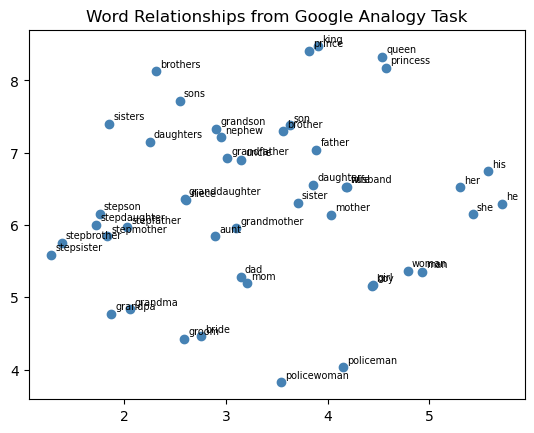

<Figure size 640x480 with 0 Axes>

In [20]:
# Collect words from Google Analogy dataset
SUB_CATEGORY = ": family"

# TODO3: Plot t-SNE for the words in the SUB_CATEGORY `: family`
family_words = set()
questions = data["Question"][data["SubCategory"] == SUB_CATEGORY]
for q in questions:
    for t in q.split():
        family_words.add(t)

family_word_np = np.array(list(family_words))

family_embedding = []
for w in family_word_np:
    family_embedding.append(model[w])

family_embedding = np.array(family_embedding)

tsne = TSNE(
    n_components=2,
    random_state=69,
    perplexity=30,
)

embedding2d = tsne.fit_transform(family_embedding)
plt.scatter(embedding2d[:,0], embedding2d[:,1], c='steelblue')

for text, (x, y) in zip(family_words, embedding2d):
    plt.annotate(
        text=text,
        xy=(x, y),
        xytext=(3,3),
        textcoords='offset points',
        fontsize='x-small'
    )

plt.title("Word Relationships from Google Analogy Task")
plt.show()
plt.savefig("word_relationships.png", bbox_inches="tight")

### Part III: Train your own word embeddings

### Get the latest English Wikipedia articles and do sampling.
- Usually, we start from Wikipedia dump (https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2). However, the downloading step will take very long. Also, the cleaning step for the Wikipedia corpus ([`gensim.corpora.wikicorpus.WikiCorpus`](https://radimrehurek.com/gensim/corpora/wikicorpus.html#gensim.corpora.wikicorpus.WikiCorpus)) will take much time. Therefore, we provide cleaned files for you.

In [ ]:
# # Download the split Wikipedia files
# # Each file contain 562365 lines (articles).
# !gdown --id 1jiu9E1NalT2Y8EIuWNa1xf2Tw1f1XuGd -O wiki_texts_part_0.txt.gz
# !gdown --id 1ABblLRd9HXdXvaNv8H9fFq984bhnowoG -O wiki_texts_part_1.txt.gz
# !gdown --id 1z2VFNhpPvCejTP5zyejzKj5YjI_Bn42M -O wiki_texts_part_2.txt.gz
# !gdown --id 1VKjded9BxADRhIoCzXy_W8uzVOTWIf0g -O wiki_texts_part_3.txt.gz
# !gdown --id 16mBeG26m9LzHXdPe8UrijUIc6sHxhknz -O wiki_texts_part_4.txt.gz

In [ ]:
# # Download the split Wikipedia files
# # Each file contain 562365 lines (articles), except the last file.
# !gdown --id 17JFvxOH-kc-VmvGkhG7p3iSZSpsWdgJI -O wiki_texts_part_5.txt.gz
# !gdown --id 19IvB2vOJRGlrYulnTXlZECR8zT5v550P -O wiki_texts_part_6.txt.gz
# !gdown --id 1sjwO8A2SDOKruv6-8NEq7pEIuQ50ygVV -O wiki_texts_part_7.txt.gz
# !gdown --id 1s7xKWJmyk98Jbq6Fi1scrHy7fr_ellUX -O wiki_texts_part_8.txt.gz
# !gdown --id 17eQXcrvY1cfpKelLbP2BhQKrljnFNykr -O wiki_texts_part_9.txt.gz
# !gdown --id 1J5TAN6bNBiSgTIYiPwzmABvGhAF58h62 -O wiki_texts_part_10.txt.gz

In [ ]:
# Extract the downloaded wiki_texts_parts files.
!gunzip -k wiki_texts_part_*.gz

In [ ]:
# Combine the extracted wiki_texts_parts files.
!cat wiki_texts_part_*.txt > wiki_texts_combined.txt

In [ ]:
# Check the first ten lines of the combined file
!head -n 10 wiki_texts_combined.txt

Please note that we used the default parameters of [`gensim.corpora.wikicorpus.WikiCorpus`](https://radimrehurek.com/gensim/corpora/wikicorpus.html#gensim.corpora.wikicorpus.WikiCorpus) for cleaning the Wiki raw file. Thus, words with one character were discarded.

In [6]:
# Now you need to do sampling because the corpus is too big.
# You can further perform analysis with a greater sampling ratio.
import os
import random

wiki_txt_path = "wiki_texts_combined.txt"
# wiki_texts_combined.txt is a text file separated by linebreaks (\n).
# Each row in wiki_texts_combined.txt indicates a Wikipedia article.
wiki_dir = "data/wikidata"
wiki_txt_path = os.path.join(wiki_dir, wiki_txt_path)
random.seed(42)

SAMPLE_RATE = 0.1
output_dir = "data/preprocessed_wiki_corpus"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, f"wiki_sample_{int(SAMPLE_RATE*100)}%.txt")
with open(wiki_txt_path, "r", encoding="utf-8") as f:
    with open(output_path, "a", encoding="utf-8") as output_file:
    # TODO4: Sample `20%` Wikipedia articles
        for line in f:
            if (random.random() < SAMPLE_RATE):
                output_file.write(line)

    

In [ ]:
# # iniialize stuff for translation task
# import string 
# import nltk
# TRANSLATOR = str.maketrans('', '', string.punctuation)
# try:
#     ENGLISH_WORDS = set(nltk.corpus.words.words())
# except:
#     print("nltk words not found, creating now")
#     nltk.download('words')
#     ENGLISH_WORDS = set(nltk.corpus.words.words())

In [7]:
# import nltk
# from nltk.corpus import brown

# # Download the corpus (only needs to be done once)
# nltk.download('gutenberg')

# # You can access the sentences or words directly
# sentences = brown.sents()
# words = brown.words()

# # You can write it to a file to train your model
# with open('data/gutenberg/gutenberg_corpus.txt', 'w') as f:
#     for sentence in sentences:
#         f.write(' '.join(sentence) + '\n')

In [23]:
# import pytorch

# TODO5: Train your own word embeddings with the sampled articles
# https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec
# Hint: You should perform some pre-processing before training.

# preprocess .txt corpus
# 1. remove non-english words
# nltk.download('words') # download the corpus if not already
# def remove_non_english(text) -> str:
#     # create filter
#     text = text.translate(TRANSLATOR)
#     # remove punctuation like . , : 
#     text_english_list = [word for word in text.split() if word in ENGLISH_WORDS]
#     return  ' '.join(text_english_list)

def remove_stop_words(text) -> str:
    common_stop_words = set([
        "a", "an", "the", "in", "on", "at", "for", "to", "of", "with", "by",
        "is", "am", "are", "was", "were", "be", "and", "but", "or", "so",
        "i", "you", "he", "she", "it", "we", "they", "me", "him", "her", "us", "them",
        "my", "your", "his", "its", "our", "their", "what", "which", "who", "when",
        "where", "why", "how", "all", "any", "both", "each", "few", "more", "most",
        "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so",
        "than", "too", "very", "can", "will", "just", "don", "should", "now"
    ])
    removed_stop_words = [word for word in text.split() if word not in common_stop_words]
    return ' '.join(removed_stop_words)

original_corpus = "/home/cvlab123/Kyle_Having_Fun/NLP_nthu/HW1_word_embedding/data/brown_corpus/brown_corpus.txt"
output_corpus_en = original_corpus.split('.')[0]+"_removed_stop.txt"

print(f"translating {original_corpus},\n outputing to {output_corpus_en}")

with open(original_corpus, "r") as infile, open(output_corpus_en, "w") as outfile:
    for line in infile:
        # processed_line = remove_non_english(line)
        processed_line_removed_stop = remove_stop_words(line)
        if (processed_line_removed_stop):
            outfile.write(processed_line_removed_stop + '\n')
            
        

translating /home/cvlab123/Kyle_Having_Fun/NLP_nthu/HW1_word_embedding/data/brown_corpus/brown_corpus.txt,
 outputing to /home/cvlab123/Kyle_Having_Fun/NLP_nthu/HW1_word_embedding/data/brown_corpus/brown_corpus_removed_stop.txt


In [52]:
# line iterator
class SentenceIterator:
    def __init__(self, filepath):
        self.filepath = filepath
    
    def __iter__(self):
        with open (self.filepath, "r") as f:
            for line in f:
                yield line.split()
                

import multiprocessing
from gensim.models import Word2Vec

vector_size = 100  # Dimensionality of the word vectors
window = 10         # context window
min_count = 5      # Ignores all words with a total frequency lower than this
workers = multiprocessing.cpu_count() 
sg = 1             # Training algorithm: 1 for skip-gram; otherwise CBOW.

corpus_path = "/home/cvlab123/Kyle_Having_Fun/NLP_nthu/HW1_word_embedding/data/preprocessed_wiki_corpus/wiki_sample_20%_en_only_removed_stop.txt"
checkpoint_path = f"checkpoints/wiki_word2vec_window={window}_vs={vector_size}_sg={sg}.model"

sentences = SentenceIterator(corpus_path)

print("Training Word2Vec model... This may take some time.")
model = Word2Vec(
    sentences=sentences,
    vector_size=vector_size,
    window=window,
    min_count=min_count,
    workers=workers,
    sg=sg
)
print("✅ Training complete.")

# --- 4. Save the model ---
model.save(checkpoint_path)
print(f"Model saved to: {checkpoint_path}")

Training Word2Vec model... This may take some time.


KeyboardInterrupt: 

In [74]:
# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

model_path = "/home/cvlab123/Kyle_Having_Fun/NLP_nthu/HW1_word_embedding/checkpoints/remove_stop_words/wiki_word2vec_20%_only_removed_stop_window=5_vs=100_sg=1_lr=0.025.model"
model_mine = Word2Vec.load(str(model_path))
for analogy in tqdm(data["Question"]):
      # TODO6: Write your code here to use your trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """
      words = analogy.lower().split()
      word1, word2, word3, word4 = words
      if not (model_mine.wv.has_index_for(word1) and model_mine.wv.has_index_for(word2) and model_mine.wv.has_index_for(word3)):
            # print("skipping line word not exists in the corpus")
            # add wrong answer so the mask would work
            preds.append("a")
            golds.append("b")
            continue
      
      result = model_mine.wv.most_similar(positive=[word2, word3], negative=[word1], topn=1)
      # print(result)
      pred = result[0][0]
      # print(f"predicted: {pred}, GT: {word4}")
      if (pred == word4) :
            print(f"prediction correct: {pred}")
      
      preds.append(pred)
      golds.append(word4)

  0%|          | 6/19544 [00:00<11:25, 28.50it/s]

prediction correct: iraq
prediction correct: thailand
prediction correct: china
prediction correct: germany
prediction correct: switzerland
prediction correct: egypt
prediction correct: australia


  0%|          | 14/19544 [00:00<09:43, 33.47it/s]

prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: afghanistan
prediction correct: england
prediction correct: spain
prediction correct: russia
prediction correct: norway


  0%|          | 22/19544 [00:00<08:53, 36.56it/s]

prediction correct: canada
prediction correct: france
prediction correct: italy
prediction correct: sweden
prediction correct: iran
prediction correct: japan
prediction correct: thailand
prediction correct: china


  0%|          | 30/19544 [00:00<09:10, 35.47it/s]

prediction correct: germany
prediction correct: egypt
prediction correct: vietnam
prediction correct: cuba
prediction correct: finland


  0%|          | 38/19544 [00:01<09:16, 35.04it/s]

prediction correct: pakistan
prediction correct: afghanistan
prediction correct: england
prediction correct: russia
prediction correct: norway


  0%|          | 46/19544 [00:01<08:59, 36.12it/s]

prediction correct: france
prediction correct: italy
prediction correct: sweden
prediction correct: iran
prediction correct: japan
prediction correct: greece
prediction correct: china
prediction correct: germany


  0%|          | 55/19544 [00:01<08:23, 38.71it/s]

prediction correct: switzerland
prediction correct: egypt
prediction correct: vietnam
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: afghanistan
prediction correct: england


  0%|          | 64/19544 [00:01<08:10, 39.72it/s]

prediction correct: spain
prediction correct: russia
prediction correct: norway
prediction correct: france
prediction correct: italy
prediction correct: sweden
prediction correct: iran
prediction correct: japan


  0%|          | 69/19544 [00:01<07:56, 40.89it/s]

prediction correct: greece
prediction correct: iraq
prediction correct: germany
prediction correct: switzerland
prediction correct: egypt
prediction correct: australia
prediction correct: vietnam
prediction correct: cuba
prediction correct: finland


  0%|          | 79/19544 [00:02<07:53, 41.12it/s]

prediction correct: pakistan
prediction correct: afghanistan
prediction correct: england
prediction correct: spain
prediction correct: russia
prediction correct: norway
prediction correct: france
prediction correct: italy


  0%|          | 89/19544 [00:02<07:35, 42.70it/s]

prediction correct: sweden
prediction correct: iran
prediction correct: japan
prediction correct: greece
prediction correct: iraq
prediction correct: thailand
prediction correct: switzerland
prediction correct: egypt
prediction correct: australia


  1%|          | 99/19544 [00:02<08:13, 39.39it/s]

prediction correct: vietnam
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: afghanistan
prediction correct: england
prediction correct: spain
prediction correct: russia


  1%|          | 107/19544 [00:02<08:29, 38.14it/s]

prediction correct: norway
prediction correct: canada
prediction correct: france
prediction correct: italy
prediction correct: sweden
prediction correct: iran
prediction correct: japan
prediction correct: greece


  1%|          | 115/19544 [00:03<08:40, 37.31it/s]

prediction correct: iraq
prediction correct: thailand
prediction correct: china
prediction correct: egypt
prediction correct: australia
prediction correct: cuba
prediction correct: finland


  1%|          | 123/19544 [00:03<08:46, 36.91it/s]

prediction correct: pakistan
prediction correct: afghanistan
prediction correct: spain
prediction correct: russia
prediction correct: norway
prediction correct: canada
prediction correct: france


  1%|          | 131/19544 [00:03<09:02, 35.76it/s]

prediction correct: italy
prediction correct: sweden
prediction correct: iran
prediction correct: japan
prediction correct: greece
prediction correct: thailand
prediction correct: china


  1%|          | 139/19544 [00:03<08:51, 36.50it/s]

prediction correct: germany
prediction correct: australia
prediction correct: vietnam
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: afghanistan
prediction correct: england


  1%|          | 143/19544 [00:03<09:17, 34.83it/s]

prediction correct: spain
prediction correct: russia
prediction correct: norway
prediction correct: france
prediction correct: italy
prediction correct: sweden


  1%|          | 151/19544 [00:04<09:17, 34.80it/s]

prediction correct: iran
prediction correct: japan
prediction correct: greece
prediction correct: iraq
prediction correct: thailand
prediction correct: china
prediction correct: germany


  1%|          | 160/19544 [00:04<08:35, 37.57it/s]

prediction correct: switzerland
prediction correct: vietnam
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: england
prediction correct: spain
prediction correct: russia


  1%|          | 170/19544 [00:04<07:52, 41.00it/s]

prediction correct: norway
prediction correct: canada
prediction correct: france
prediction correct: italy
prediction correct: sweden
prediction correct: iran
prediction correct: japan
prediction correct: greece


  1%|          | 175/19544 [00:04<08:12, 39.30it/s]

prediction correct: thailand
prediction correct: china
prediction correct: germany
prediction correct: switzerland
prediction correct: egypt
prediction correct: cuba
prediction correct: finland


  1%|          | 183/19544 [00:04<08:40, 37.17it/s]

prediction correct: pakistan
prediction correct: afghanistan
prediction correct: spain
prediction correct: russia
prediction correct: norway
prediction correct: france


  1%|          | 192/19544 [00:05<08:20, 38.65it/s]

prediction correct: italy
prediction correct: sweden
prediction correct: iran
prediction correct: japan
prediction correct: greece
prediction correct: iraq
prediction correct: thailand
prediction correct: china
prediction correct: germany


  1%|          | 204/19544 [00:05<08:30, 37.91it/s]

prediction correct: egypt
prediction correct: finland
prediction correct: pakistan
prediction correct: afghanistan
prediction correct: england
prediction correct: spain
prediction correct: russia


  1%|          | 212/19544 [00:05<08:33, 37.66it/s]

prediction correct: norway
prediction correct: france
prediction correct: italy
prediction correct: sweden
prediction correct: iran
prediction correct: japan
prediction correct: greece


  1%|          | 220/19544 [00:05<08:51, 36.35it/s]

prediction correct: iraq
prediction correct: thailand
prediction correct: china
prediction correct: germany
prediction correct: egypt
prediction correct: australia
prediction correct: vietnam


  1%|          | 228/19544 [00:06<09:03, 35.57it/s]

prediction correct: pakistan
prediction correct: afghanistan
prediction correct: england
prediction correct: spain
prediction correct: russia
prediction correct: norway
prediction correct: canada
prediction correct: france


  1%|          | 236/19544 [00:06<09:06, 35.31it/s]

prediction correct: italy
prediction correct: sweden
prediction correct: iran
prediction correct: japan
prediction correct: greece
prediction correct: iraq
prediction correct: thailand
prediction correct: china


  1%|          | 244/19544 [00:06<08:51, 36.31it/s]

prediction correct: germany
prediction correct: switzerland
prediction correct: egypt
prediction correct: australia
prediction correct: cuba
prediction correct: afghanistan
prediction correct: england


  1%|▏         | 248/19544 [00:06<08:51, 36.33it/s]

prediction correct: spain
prediction correct: russia
prediction correct: norway
prediction correct: france
prediction correct: italy
prediction correct: sweden
prediction correct: iran


  1%|▏         | 257/19544 [00:06<08:36, 37.33it/s]

prediction correct: japan
prediction correct: greece
prediction correct: iraq
prediction correct: thailand
prediction correct: china
prediction correct: germany
prediction correct: egypt


  1%|▏         | 269/19544 [00:07<08:37, 37.23it/s]

prediction correct: vietnam
prediction correct: cuba
prediction correct: finland
prediction correct: england
prediction correct: russia
prediction correct: norway


  1%|▏         | 274/19544 [00:07<08:18, 38.65it/s]

prediction correct: france
prediction correct: italy
prediction correct: sweden
prediction correct: iran
prediction correct: japan
prediction correct: greece
prediction correct: iraq
prediction correct: thailand
prediction correct: china


  1%|▏         | 283/19544 [00:07<08:14, 38.92it/s]

prediction correct: germany
prediction correct: vietnam
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan


  1%|▏         | 292/19544 [00:07<08:24, 38.17it/s]

prediction correct: russia
prediction correct: norway
prediction correct: france
prediction correct: italy
prediction correct: sweden
prediction correct: iran


  2%|▏         | 300/19544 [00:08<08:51, 36.23it/s]

prediction correct: japan
prediction correct: greece
prediction correct: iraq
prediction correct: thailand
prediction correct: china
prediction correct: germany


  2%|▏         | 308/19544 [00:08<09:05, 35.27it/s]

prediction correct: vietnam
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: afghanistan
prediction correct: russia
prediction correct: norway
prediction correct: canada


  2%|▏         | 316/19544 [00:08<08:37, 37.19it/s]

prediction correct: france
prediction correct: italy
prediction correct: sweden
prediction correct: iran
prediction correct: japan
prediction correct: greece
prediction correct: thailand


  2%|▏         | 324/19544 [00:08<08:23, 38.20it/s]

prediction correct: china
prediction correct: germany
prediction correct: switzerland
prediction correct: egypt
prediction correct: australia
prediction correct: vietnam
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan


  2%|▏         | 334/19544 [00:08<07:51, 40.78it/s]

prediction correct: afghanistan
prediction correct: england
prediction correct: norway
prediction correct: canada
prediction correct: france
prediction correct: italy
prediction correct: sweden
prediction correct: iran
prediction correct: japan
prediction correct: greece


  2%|▏         | 344/19544 [00:09<07:41, 41.64it/s]

prediction correct: iraq
prediction correct: thailand
prediction correct: china
prediction correct: germany
prediction correct: switzerland
prediction correct: egypt
prediction correct: australia
prediction correct: vietnam


  2%|▏         | 353/19544 [00:09<08:13, 38.88it/s]

prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: afghanistan
prediction correct: england
prediction correct: spain
prediction correct: france


  2%|▏         | 363/19544 [00:09<07:58, 40.05it/s]

prediction correct: italy
prediction correct: sweden
prediction correct: iran
prediction correct: japan
prediction correct: greece
prediction correct: iraq
prediction correct: thailand
prediction correct: china
prediction correct: germany


  2%|▏         | 368/19544 [00:09<07:59, 39.95it/s]

prediction correct: switzerland
prediction correct: egypt
prediction correct: australia
prediction correct: vietnam
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: afghanistan
prediction correct: england


  2%|▏         | 378/19544 [00:10<07:52, 40.56it/s]

prediction correct: spain
prediction correct: russia
prediction correct: france
prediction correct: italy
prediction correct: sweden
prediction correct: iran
prediction correct: japan
prediction correct: greece


  2%|▏         | 388/19544 [00:10<07:50, 40.76it/s]

prediction correct: thailand
prediction correct: china
prediction correct: germany
prediction correct: switzerland
prediction correct: egypt
prediction correct: australia
prediction correct: vietnam
prediction correct: cuba
prediction correct: finland


  2%|▏         | 398/19544 [00:10<07:49, 40.74it/s]

prediction correct: pakistan
prediction correct: afghanistan
prediction correct: spain
prediction correct: russia
prediction correct: norway
prediction correct: italy
prediction correct: sweden


  2%|▏         | 403/19544 [00:10<08:11, 38.92it/s]

prediction correct: iran
prediction correct: japan
prediction correct: greece
prediction correct: iraq
prediction correct: thailand
prediction correct: china
prediction correct: germany
prediction correct: switzerland


  2%|▏         | 411/19544 [00:10<08:35, 37.10it/s]

prediction correct: egypt
prediction correct: australia
prediction correct: vietnam
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: afghanistan
prediction correct: england


  2%|▏         | 419/19544 [00:11<08:50, 36.06it/s]

prediction correct: spain
prediction correct: russia
prediction correct: norway
prediction correct: sweden
prediction correct: iran
prediction correct: japan


  2%|▏         | 427/19544 [00:11<09:00, 35.38it/s]

prediction correct: greece
prediction correct: iraq
prediction correct: thailand
prediction correct: china
prediction correct: germany
prediction correct: switzerland


  2%|▏         | 435/19544 [00:11<09:03, 35.15it/s]

prediction correct: australia
prediction correct: vietnam
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: afghanistan
prediction correct: england
prediction correct: spain


  2%|▏         | 443/19544 [00:11<08:50, 36.00it/s]

prediction correct: russia
prediction correct: norway
prediction correct: france
prediction correct: iran
prediction correct: japan
prediction correct: greece
prediction correct: iraq


  2%|▏         | 451/19544 [00:12<08:44, 36.39it/s]

prediction correct: thailand
prediction correct: china
prediction correct: germany
prediction correct: switzerland
prediction correct: egypt
prediction correct: australia
prediction correct: cuba


  2%|▏         | 459/19544 [00:12<08:45, 36.35it/s]

prediction correct: finland
prediction correct: pakistan
prediction correct: afghanistan
prediction correct: england
prediction correct: spain
prediction correct: russia
prediction correct: norway
prediction correct: canada


  2%|▏         | 467/19544 [00:12<08:28, 37.51it/s]

prediction correct: france
prediction correct: italy
prediction correct: japan
prediction correct: greece
prediction correct: iraq
prediction correct: thailand
prediction correct: china
prediction correct: germany


  2%|▏         | 475/19544 [00:12<08:18, 38.23it/s]

prediction correct: switzerland
prediction correct: egypt
prediction correct: vietnam
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: afghanistan


  2%|▏         | 483/19544 [00:12<08:19, 38.18it/s]

prediction correct: england
prediction correct: spain
prediction correct: russia
prediction correct: norway
prediction correct: france
prediction correct: italy
prediction correct: sweden


  3%|▎         | 492/19544 [00:13<08:11, 38.74it/s]

prediction correct: greece
prediction correct: iraq
prediction correct: thailand
prediction correct: china
prediction correct: germany
prediction correct: switzerland
prediction correct: egypt
prediction correct: australia


  3%|▎         | 501/19544 [00:13<08:00, 39.59it/s]

prediction correct: vietnam
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: afghanistan
prediction correct: england
prediction correct: spain
prediction correct: russia
prediction correct: norway


  3%|▎         | 506/19544 [00:13<07:49, 40.54it/s]

prediction correct: canada
prediction correct: france
prediction correct: italy
prediction correct: sweden
prediction correct: iran
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey


  3%|▎         | 516/19544 [00:13<08:30, 37.29it/s]

prediction correct: madagascar
prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq


  3%|▎         | 526/19544 [00:13<08:01, 39.51it/s]

prediction correct: azerbaijan
prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: serbia
prediction correct: belize
prediction correct: germany


  3%|▎         | 535/19544 [00:14<07:43, 41.03it/s]

prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt
prediction correct: venezuela


  3%|▎         | 545/19544 [00:14<07:30, 42.20it/s]

prediction correct: moldova
prediction correct: denmark
prediction correct: senegal
prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan


  3%|▎         | 550/19544 [00:14<07:53, 40.14it/s]

prediction correct: algeria
prediction correct: turkey
prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan


  3%|▎         | 560/19544 [00:14<07:45, 40.80it/s]

prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan
prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: serbia


  3%|▎         | 570/19544 [00:15<08:06, 38.99it/s]

prediction correct: belize
prediction correct: germany
prediction correct: switzerland
prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary


  3%|▎         | 579/19544 [00:15<07:56, 39.83it/s]

prediction correct: burundi
prediction correct: egypt
prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark
prediction correct: senegal
prediction correct: syria


  3%|▎         | 584/19544 [00:15<07:49, 40.40it/s]

prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: turkey


  3%|▎         | 594/19544 [00:15<07:41, 41.09it/s]

prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan
prediction correct: thailand
prediction correct: gambia


  3%|▎         | 604/19544 [00:15<08:12, 38.46it/s]

prediction correct: china
prediction correct: lebanon
prediction correct: serbia
prediction correct: belize
prediction correct: germany
prediction correct: switzerland
prediction correct: kyrgyzstan


  3%|▎         | 609/19544 [00:16<08:02, 39.24it/s]

prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt
prediction correct: australia
prediction correct: venezuela
prediction correct: moldova


  3%|▎         | 619/19544 [00:16<07:38, 41.29it/s]

prediction correct: denmark
prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan
prediction correct: botswana


  3%|▎         | 649/19544 [00:17<08:27, 37.22it/s]

prediction correct: kyrgyzstan
prediction correct: burundi


  3%|▎         | 661/19544 [00:17<08:22, 37.60it/s]

prediction correct: bangladesh
prediction correct: botswana
prediction correct: madagascar
prediction correct: samoa


  3%|▎         | 671/19544 [00:17<07:40, 41.01it/s]

prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: thailand
prediction correct: gambia


  3%|▎         | 681/19544 [00:17<07:31, 41.77it/s]

prediction correct: china
prediction correct: lebanon
prediction correct: serbia
prediction correct: belize
prediction correct: germany
prediction correct: switzerland
prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium


  4%|▎         | 686/19544 [00:17<07:32, 41.68it/s]

prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt
prediction correct: australia
prediction correct: venezuela
prediction correct: moldova


  4%|▎         | 696/19544 [00:18<07:43, 40.63it/s]

prediction correct: denmark
prediction correct: senegal
prediction correct: syria
prediction correct: bangladesh
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana


  4%|▎         | 706/19544 [00:18<07:20, 42.79it/s]

prediction correct: vietnam
prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: azerbaijan


  4%|▎         | 716/19544 [00:18<07:31, 41.71it/s]

prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: serbia
prediction correct: belize


  4%|▎         | 721/19544 [00:18<07:59, 39.29it/s]

prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt


  4%|▎         | 731/19544 [00:19<07:48, 40.16it/s]

prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark
prediction correct: senegal
prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland


  4%|▍         | 741/19544 [00:19<07:52, 39.79it/s]

prediction correct: tajikistan
prediction correct: botswana
prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan


  4%|▍         | 749/19544 [00:19<08:01, 39.07it/s]

prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan
prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: lebanon


  4%|▍         | 757/19544 [00:19<08:15, 37.93it/s]

prediction correct: serbia
prediction correct: belize
prediction correct: germany
prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania


  4%|▍         | 765/19544 [00:19<08:16, 37.82it/s]

prediction correct: hungary
prediction correct: burundi
prediction correct: egypt
prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark


  4%|▍         | 773/19544 [00:20<08:15, 37.90it/s]

prediction correct: senegal
prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana


  4%|▍         | 781/19544 [00:20<08:46, 35.63it/s]

prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: azerbaijan


  4%|▍         | 794/19544 [00:20<08:04, 38.71it/s]

prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: lebanon
prediction correct: serbia
prediction correct: belize
prediction correct: germany
prediction correct: kyrgyzstan


  4%|▍         | 802/19544 [00:20<08:02, 38.88it/s]

prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt
prediction correct: venezuela


  4%|▍         | 807/19544 [00:21<07:48, 39.96it/s]

prediction correct: moldova
prediction correct: denmark
prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan


  4%|▍         | 817/19544 [00:21<07:21, 42.46it/s]

prediction correct: tuvalu
prediction correct: botswana
prediction correct: guyana
prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: kazakhstan
prediction correct: greece


  4%|▍         | 827/19544 [00:21<08:02, 38.80it/s]

prediction correct: iraq
prediction correct: azerbaijan
prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: lebanon
prediction correct: serbia


  4%|▍         | 835/19544 [00:21<08:14, 37.86it/s]

prediction correct: belize
prediction correct: germany
prediction correct: switzerland
prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary


  4%|▍         | 843/19544 [00:22<08:18, 37.52it/s]

prediction correct: burundi
prediction correct: egypt
prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark
prediction correct: senegal


  4%|▍         | 851/19544 [00:22<08:32, 36.48it/s]

prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana


  4%|▍         | 859/19544 [00:22<08:19, 37.43it/s]

prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: greece
prediction correct: azerbaijan


  4%|▍         | 867/19544 [00:22<09:05, 34.25it/s]

prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: serbia
prediction correct: belize
prediction correct: germany


  4%|▍         | 875/19544 [00:22<08:57, 34.75it/s]

prediction correct: switzerland
prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt


  5%|▍         | 883/19544 [00:23<08:31, 36.52it/s]

prediction correct: australia
prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark
prediction correct: senegal
prediction correct: syria
prediction correct: bangladesh


  5%|▍         | 891/19544 [00:23<08:24, 37.01it/s]

prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana
prediction correct: vietnam
prediction correct: zimbabwe


  5%|▍         | 900/19544 [00:23<08:10, 38.03it/s]

prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: iraq
prediction correct: azerbaijan
prediction correct: thailand


  5%|▍         | 908/19544 [00:23<08:20, 37.24it/s]

prediction correct: gambia
prediction correct: china
prediction correct: serbia
prediction correct: belize
prediction correct: germany
prediction correct: switzerland
prediction correct: kyrgyzstan


  5%|▍         | 912/19544 [00:23<08:28, 36.68it/s]

prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt
prediction correct: australia
prediction correct: venezuela


  5%|▍         | 922/19544 [00:24<07:55, 39.13it/s]

prediction correct: moldova
prediction correct: denmark
prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan


  5%|▍         | 932/19544 [00:24<07:47, 39.80it/s]

prediction correct: botswana
prediction correct: guyana
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan


  5%|▍         | 941/19544 [00:24<08:03, 38.47it/s]

prediction correct: azerbaijan
prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: lebanon
prediction correct: serbia


  5%|▍         | 945/19544 [00:24<09:08, 33.88it/s]

prediction correct: belize
prediction correct: germany
prediction correct: slovakia
prediction correct: belgium


  5%|▍         | 953/19544 [00:25<09:24, 32.94it/s]

prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt
prediction correct: venezuela
prediction correct: moldova


  5%|▍         | 961/19544 [00:25<08:53, 34.80it/s]

prediction correct: denmark
prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu


  5%|▍         | 969/19544 [00:25<08:24, 36.82it/s]

prediction correct: botswana
prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia


  5%|▍         | 977/19544 [00:25<08:16, 37.39it/s]

prediction correct: afghanistan
prediction correct: uganda
prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: lebanon
prediction correct: serbia


  5%|▌         | 985/19544 [00:25<08:15, 37.44it/s]

prediction correct: belize
prediction correct: germany
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary


  5%|▌         | 993/19544 [00:26<08:27, 36.54it/s]

prediction correct: burundi
prediction correct: egypt
prediction correct: australia
prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark


  5%|▌         | 1001/19544 [00:26<08:22, 36.87it/s]

prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana


  5%|▌         | 1009/19544 [00:26<08:14, 37.46it/s]

prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda


  5%|▌         | 1017/19544 [00:26<08:25, 36.67it/s]

prediction correct: nepal
prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: lebanon
prediction correct: serbia
prediction correct: belize
prediction correct: germany


  5%|▌         | 1025/19544 [00:27<08:52, 34.76it/s]

prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt


  5%|▌         | 1033/19544 [00:27<08:56, 34.54it/s]

prediction correct: australia
prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark
prediction correct: senegal
prediction correct: syria
prediction correct: bangladesh


  5%|▌         | 1041/19544 [00:27<08:46, 35.12it/s]

prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana
prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba


  5%|▌         | 1050/19544 [00:27<08:19, 37.01it/s]

prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan
prediction correct: gambia


  5%|▌         | 1058/19544 [00:27<08:18, 37.11it/s]

prediction correct: china
prediction correct: lebanon
prediction correct: serbia
prediction correct: belize
prediction correct: germany
prediction correct: switzerland
prediction correct: kyrgyzstan
prediction correct: slovakia


  5%|▌         | 1066/19544 [00:28<08:58, 34.29it/s]

prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt
prediction correct: venezuela


  5%|▌         | 1074/19544 [00:28<08:32, 36.06it/s]

prediction correct: moldova
prediction correct: denmark
prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland


  6%|▌         | 1083/19544 [00:28<07:56, 38.71it/s]

prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana
prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan


  6%|▌         | 1091/19544 [00:28<07:52, 39.08it/s]

prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan
prediction correct: ukraine
prediction correct: china
prediction correct: lebanon
prediction correct: serbia


  6%|▌         | 1100/19544 [00:29<07:56, 38.73it/s]

prediction correct: belize
prediction correct: germany
prediction correct: switzerland
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary


  6%|▌         | 1108/19544 [00:29<08:29, 36.19it/s]

prediction correct: burundi
prediction correct: egypt
prediction correct: australia
prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark
prediction correct: senegal


  6%|▌         | 1117/19544 [00:29<07:56, 38.67it/s]

prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana
prediction correct: guyana
prediction correct: vietnam


  6%|▌         | 1127/19544 [00:29<07:37, 40.29it/s]

prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan


  6%|▌         | 1137/19544 [00:29<07:34, 40.52it/s]

prediction correct: ukraine
prediction correct: rwanda
prediction correct: serbia
prediction correct: belize
prediction correct: germany
prediction correct: switzerland
prediction correct: kyrgyzstan


  6%|▌         | 1142/19544 [00:30<07:27, 41.12it/s]

prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt
prediction correct: australia
prediction correct: venezuela
prediction correct: moldova


  6%|▌         | 1152/19544 [00:30<07:09, 42.85it/s]

prediction correct: denmark
prediction correct: senegal
prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan
prediction correct: botswana


  6%|▌         | 1162/19544 [00:30<07:05, 43.25it/s]

prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan


  6%|▌         | 1172/19544 [00:30<07:16, 42.12it/s]

prediction correct: rwanda
prediction correct: serbia
prediction correct: belize
prediction correct: germany
prediction correct: switzerland
prediction correct: kyrgyzstan
prediction correct: slovakia


  6%|▌         | 1182/19544 [00:31<07:30, 40.74it/s]

prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt
prediction correct: australia
prediction correct: venezuela
prediction correct: moldova


  6%|▌         | 1192/19544 [00:31<07:24, 41.33it/s]

prediction correct: denmark
prediction correct: syria
prediction correct: bangladesh
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana


  6%|▌         | 1201/19544 [00:31<08:05, 37.76it/s]

prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan


  6%|▌         | 1209/19544 [00:31<07:55, 38.54it/s]

prediction correct: uganda
prediction correct: nepal
prediction correct: sudan
prediction correct: ukraine
prediction correct: rwanda
prediction correct: gabon
prediction correct: belize


  6%|▌         | 1213/19544 [00:31<08:05, 37.79it/s]

prediction correct: germany
prediction correct: switzerland
prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary


  6%|▌         | 1221/19544 [00:32<08:30, 35.88it/s]

prediction correct: burundi
prediction correct: egypt
prediction correct: australia
prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark


  6%|▋         | 1229/19544 [00:32<08:16, 36.86it/s]

prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana


  6%|▋         | 1237/19544 [00:32<08:38, 35.33it/s]

prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal


  6%|▋         | 1246/19544 [00:32<08:24, 36.24it/s]

prediction correct: sudan
prediction correct: rwanda
prediction correct: jamaica
prediction correct: malawi
prediction correct: germany
prediction correct: switzerland


  6%|▋         | 1254/19544 [00:33<08:42, 34.98it/s]

prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt


  6%|▋         | 1262/19544 [00:33<08:57, 34.04it/s]

prediction correct: australia
prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark
prediction correct: senegal
prediction correct: syria


  6%|▋         | 1270/19544 [00:33<08:31, 35.75it/s]

prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tuvalu
prediction correct: botswana


  7%|▋         | 1274/19544 [00:33<08:44, 34.85it/s]

prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan


  7%|▋         | 1282/19544 [00:33<09:10, 33.16it/s]

prediction correct: uganda
prediction correct: nepal
prediction correct: sudan
prediction correct: rwanda
prediction correct: jamaica
prediction correct: gabon
prediction correct: malawi


  7%|▋         | 1290/19544 [00:34<08:49, 34.45it/s]

prediction correct: peru
prediction correct: switzerland
prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary


  7%|▋         | 1298/19544 [00:34<08:37, 35.23it/s]

prediction correct: burundi
prediction correct: egypt
prediction correct: australia
prediction correct: denmark


  7%|▋         | 1306/19544 [00:34<08:20, 36.45it/s]

prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana


  7%|▋         | 1314/19544 [00:34<08:18, 36.54it/s]

prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda


  7%|▋         | 1322/19544 [00:34<08:02, 37.77it/s]

prediction correct: nepal
prediction correct: sudan
prediction correct: rwanda
prediction correct: gabon
prediction correct: peru


  7%|▋         | 1330/19544 [00:35<08:15, 36.76it/s]

prediction correct: portugal
prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt


  7%|▋         | 1339/19544 [00:35<08:04, 37.60it/s]

prediction correct: australia
prediction correct: denmark
prediction correct: syria
prediction correct: bangladesh


  7%|▋         | 1348/19544 [00:35<07:46, 38.99it/s]

prediction correct: qatar
prediction correct: ireland
prediction correct: tuvalu
prediction correct: botswana
prediction correct: zimbabwe


  7%|▋         | 1352/19544 [00:35<07:53, 38.46it/s]

prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal


  7%|▋         | 1360/19544 [00:35<08:54, 34.00it/s]

prediction correct: ukraine
prediction correct: rwanda
prediction correct: jamaica
prediction correct: gabon
prediction correct: peru
prediction correct: portugal


  7%|▋         | 1368/19544 [00:36<08:31, 35.52it/s]

prediction correct: slovenia
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt
prediction correct: australia


  7%|▋         | 1377/19544 [00:36<08:02, 37.68it/s]

prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark
prediction correct: senegal
prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar


  7%|▋         | 1387/19544 [00:36<07:31, 40.23it/s]

prediction correct: ireland
prediction correct: tajikistan
prediction correct: botswana
prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland


  7%|▋         | 1397/19544 [00:36<07:22, 41.00it/s]

prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan
prediction correct: ukraine
prediction correct: rwanda
prediction correct: jamaica


  7%|▋         | 1402/19544 [00:37<07:20, 41.16it/s]

prediction correct: gabon
prediction correct: malawi
prediction correct: peru
prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: belgium
prediction correct: romania


  7%|▋         | 1411/19544 [00:37<07:47, 38.79it/s]

prediction correct: hungary
prediction correct: burundi
prediction correct: egypt
prediction correct: australia
prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark


  7%|▋         | 1419/19544 [00:37<08:02, 37.59it/s]

prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana


  7%|▋         | 1428/19544 [00:37<07:45, 38.92it/s]

prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal


  7%|▋         | 1436/19544 [00:37<07:49, 38.57it/s]

prediction correct: sudan
prediction correct: ukraine
prediction correct: rwanda
prediction correct: jamaica
prediction correct: gabon
prediction correct: peru
prediction correct: portugal


  7%|▋         | 1444/19544 [00:38<08:13, 36.70it/s]

prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt
prediction correct: australia


  7%|▋         | 1453/19544 [00:38<07:56, 37.97it/s]

prediction correct: venezuela
prediction correct: denmark
prediction correct: senegal
prediction correct: syria
prediction correct: bangladesh


  7%|▋         | 1461/19544 [00:38<08:01, 37.53it/s]

prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana
prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba


  8%|▊         | 1469/19544 [00:38<08:00, 37.59it/s]

prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan
prediction correct: ukraine


  8%|▊         | 1478/19544 [00:39<07:49, 38.49it/s]

prediction correct: rwanda
prediction correct: gabon
prediction correct: peru
prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: angola


  8%|▊         | 1488/19544 [00:39<07:35, 39.64it/s]

prediction correct: zambia
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt
prediction correct: australia
prediction correct: venezuela
prediction correct: moldova


  8%|▊         | 1493/19544 [00:39<07:27, 40.31it/s]

prediction correct: denmark
prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana


  8%|▊         | 1503/19544 [00:39<07:16, 41.31it/s]

prediction correct: guyana
prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda


  8%|▊         | 1513/19544 [00:39<07:09, 41.97it/s]

prediction correct: nepal
prediction correct: sudan
prediction correct: rwanda
prediction correct: jamaica
prediction correct: gabon
prediction correct: peru
prediction correct: portugal


  8%|▊         | 1523/19544 [00:40<07:34, 39.64it/s]

prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: zambia
prediction correct: spain
prediction correct: burundi
prediction correct: egypt
prediction correct: australia


  8%|▊         | 1531/19544 [00:40<07:57, 37.68it/s]

prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark
prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar


  8%|▊         | 1539/19544 [00:40<08:03, 37.22it/s]

prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana
prediction correct: zimbabwe
prediction correct: cuba


  8%|▊         | 1547/19544 [00:40<08:07, 36.92it/s]

prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan


  8%|▊         | 1551/19544 [00:40<09:00, 33.28it/s]

prediction correct: rwanda
prediction correct: jamaica
prediction correct: peru
prediction correct: portugal


  8%|▊         | 1559/19544 [00:41<08:34, 34.97it/s]

prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: zambia
prediction correct: spain
prediction correct: nicaragua
prediction correct: egypt


  8%|▊         | 1567/19544 [00:41<08:26, 35.51it/s]

prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark
prediction correct: senegal
prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar


  8%|▊         | 1576/19544 [00:41<07:54, 37.84it/s]

prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana
prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba


  8%|▊         | 1585/19544 [00:41<07:48, 38.33it/s]

prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan
prediction correct: ukraine


  8%|▊         | 1594/19544 [00:42<07:34, 39.52it/s]

prediction correct: rwanda
prediction correct: jamaica
prediction correct: gabon
prediction correct: peru
prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: angola


  8%|▊         | 1602/19544 [00:42<07:42, 38.78it/s]

prediction correct: zambia
prediction correct: spain
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: australia
prediction correct: venezuela
prediction correct: moldova


  8%|▊         | 1606/19544 [00:42<08:01, 37.23it/s]

prediction correct: denmark
prediction correct: senegal
prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan


  8%|▊         | 1614/19544 [00:42<08:20, 35.85it/s]

prediction correct: tuvalu
prediction correct: botswana
prediction correct: guyana
prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland


  8%|▊         | 1622/19544 [00:42<08:15, 36.18it/s]

prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan
prediction correct: rwanda


  8%|▊         | 1630/19544 [00:43<08:00, 37.26it/s]

prediction correct: jamaica
prediction correct: gabon
prediction correct: peru
prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: zambia


  8%|▊         | 1639/19544 [00:43<07:41, 38.76it/s]

prediction correct: spain
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines
prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark
prediction correct: senegal


  8%|▊         | 1649/19544 [00:43<07:04, 42.15it/s]

prediction correct: syria
prediction correct: bangladesh
prediction correct: ireland
prediction correct: tajikistan
prediction correct: botswana
prediction correct: vietnam


  8%|▊         | 1659/19544 [00:43<06:50, 43.52it/s]

prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan


  9%|▊         | 1669/19544 [00:43<06:44, 44.17it/s]

prediction correct: rwanda
prediction correct: jamaica
prediction correct: malawi
prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: zambia


  9%|▊         | 1679/19544 [00:44<06:58, 42.71it/s]

prediction correct: spain
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines
prediction correct: mozambique
prediction correct: moldova
prediction correct: denmark
prediction correct: senegal


  9%|▊         | 1689/19544 [00:44<07:06, 41.89it/s]

prediction correct: syria
prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana
prediction correct: vietnam


  9%|▊         | 1694/19544 [00:44<07:08, 41.70it/s]

prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan


  9%|▊         | 1704/19544 [00:44<07:29, 39.69it/s]

prediction correct: ukraine
prediction correct: rwanda
prediction correct: jamaica
prediction correct: gabon
prediction correct: peru
prediction correct: portugal


  9%|▊         | 1709/19544 [00:44<07:51, 37.84it/s]

prediction correct: slovenia
prediction correct: angola
prediction correct: zambia
prediction correct: spain
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines


  9%|▉         | 1718/19544 [00:45<08:05, 36.74it/s]

prediction correct: mozambique
prediction correct: belarus
prediction correct: denmark
prediction correct: senegal
prediction correct: syria
prediction correct: bangladesh


  9%|▉         | 1726/19544 [00:45<08:34, 34.64it/s]

prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana


  9%|▉         | 1730/19544 [00:45<09:06, 32.59it/s]

prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda


  9%|▉         | 1742/19544 [00:45<08:34, 34.62it/s]

prediction correct: nepal
prediction correct: sudan
prediction correct: ukraine
prediction correct: rwanda
prediction correct: jamaica
prediction correct: peru


  9%|▉         | 1746/19544 [00:46<09:00, 32.90it/s]

prediction correct: portugal
prediction correct: england
prediction correct: angola
prediction correct: zambia
prediction correct: spain
prediction correct: nicaragua


  9%|▉         | 1754/19544 [00:46<10:00, 29.61it/s]

prediction correct: bahrain
prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia


  9%|▉         | 1762/19544 [00:46<09:08, 32.45it/s]

prediction correct: bangladesh
prediction correct: ireland
prediction correct: tajikistan
prediction correct: botswana
prediction correct: vietnam


  9%|▉         | 1770/19544 [00:46<08:59, 32.95it/s]

prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan


  9%|▉         | 1778/19544 [00:47<08:37, 34.32it/s]

prediction correct: nepal
prediction correct: sudan


  9%|▉         | 1787/19544 [00:47<08:12, 36.03it/s]

prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: nicaragua
prediction correct: bahrain


  9%|▉         | 1795/19544 [00:47<08:04, 36.62it/s]

prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia
prediction correct: senegal
prediction correct: syria
prediction correct: bangladesh


  9%|▉         | 1803/19544 [00:47<08:47, 33.64it/s]

prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana


  9%|▉         | 1807/19544 [00:47<08:50, 33.43it/s]

prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda


  9%|▉         | 1815/19544 [00:48<09:06, 32.45it/s]

prediction correct: nepal
prediction correct: sudan
prediction correct: rwanda
prediction correct: gabon


  9%|▉         | 1823/19544 [00:48<08:49, 33.48it/s]

prediction correct: peru
prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: zambia
prediction correct: spain


  9%|▉         | 1831/19544 [00:48<08:58, 32.91it/s]

prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay


  9%|▉         | 1841/19544 [00:48<07:54, 37.32it/s]

prediction correct: syria
prediction correct: bangladesh
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana
prediction correct: guyana


  9%|▉         | 1846/19544 [00:48<07:27, 39.56it/s]

prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal


  9%|▉         | 1854/19544 [00:49<08:34, 34.37it/s]

prediction correct: sudan
prediction correct: rwanda
prediction correct: jamaica
prediction correct: malawi
prediction correct: peru


 10%|▉         | 1862/19544 [00:49<08:42, 33.87it/s]

prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: zambia
prediction correct: nicaragua


 10%|▉         | 1870/19544 [00:49<08:42, 33.80it/s]

prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia


 10%|▉         | 1874/19544 [00:49<09:39, 30.51it/s]

prediction correct: bangladesh
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu


 10%|▉         | 1882/19544 [00:50<08:56, 32.89it/s]

prediction correct: botswana
prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia


 10%|▉         | 1891/19544 [00:50<08:15, 35.59it/s]

prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan
prediction correct: ukraine
prediction correct: rwanda
prediction correct: jamaica
prediction correct: gabon


 10%|▉         | 1899/19544 [00:50<08:05, 36.36it/s]

prediction correct: peru
prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: zambia
prediction correct: spain
prediction correct: nicaragua


 10%|▉         | 1907/19544 [00:50<08:12, 35.84it/s]

prediction correct: bahrain
prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia


 10%|▉         | 1915/19544 [00:51<08:01, 36.62it/s]

prediction correct: oman
prediction correct: qatar
prediction correct: ireland
prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana
prediction correct: vietnam


 10%|▉         | 1923/19544 [00:51<07:48, 37.64it/s]

prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal


 10%|▉         | 1931/19544 [00:51<07:53, 37.16it/s]

prediction correct: sudan
prediction correct: ukraine
prediction correct: rwanda
prediction correct: jamaica
prediction correct: gabon
prediction correct: malawi
prediction correct: peru
prediction correct: portugal


 10%|▉         | 1939/19544 [00:51<08:02, 36.48it/s]

prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: zambia
prediction correct: spain
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines


 10%|▉         | 1947/19544 [00:51<07:57, 36.83it/s]

prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia
prediction correct: oman
prediction correct: kenya


 10%|█         | 1955/19544 [00:52<08:02, 36.42it/s]

prediction correct: ireland
prediction correct: tuvalu
prediction correct: botswana
prediction correct: zimbabwe
prediction correct: cuba


 10%|█         | 1963/19544 [00:52<08:02, 36.46it/s]

prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan


 10%|█         | 1971/19544 [00:52<08:06, 36.12it/s]

prediction correct: rwanda
prediction correct: jamaica
prediction correct: gabon
prediction correct: malawi
prediction correct: portugal
prediction correct: england


 10%|█         | 1979/19544 [00:52<08:16, 35.35it/s]

prediction correct: angola
prediction correct: zambia
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines


 10%|█         | 1987/19544 [00:52<08:14, 35.51it/s]

prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia
prediction correct: oman
prediction correct: kenya


 10%|█         | 1996/19544 [00:53<07:45, 37.67it/s]

prediction correct: tajikistan
prediction correct: tuvalu
prediction correct: botswana
prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan


 10%|█         | 2005/19544 [00:53<07:33, 38.65it/s]

prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan
prediction correct: ukraine
prediction correct: rwanda
prediction correct: jamaica


 10%|█         | 2010/19544 [00:53<07:22, 39.64it/s]

prediction correct: gabon
prediction correct: peru
prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: zambia


 10%|█         | 2018/19544 [00:53<07:48, 37.38it/s]

prediction correct: spain
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia


 10%|█         | 2028/19544 [00:54<07:26, 39.23it/s]

prediction correct: uruguay
prediction correct: russia
prediction correct: oman
prediction correct: kenya
prediction correct: tuvalu
prediction correct: botswana
prediction correct: guyana


 10%|█         | 2038/19544 [00:54<07:21, 39.66it/s]

prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal


 10%|█         | 2047/19544 [00:54<07:09, 40.74it/s]

prediction correct: sudan
prediction correct: ukraine
prediction correct: rwanda
prediction correct: jamaica
prediction correct: peru
prediction correct: portugal
prediction correct: slovenia


 10%|█         | 2052/19544 [00:54<07:07, 40.90it/s]

prediction correct: england
prediction correct: angola
prediction correct: zambia
prediction correct: spain
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines
prediction correct: mozambique


 11%|█         | 2062/19544 [00:54<07:12, 40.39it/s]

prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia
prediction correct: oman
prediction correct: kenya
prediction correct: bahamas


 11%|█         | 2072/19544 [00:55<07:35, 38.35it/s]

prediction correct: cyprus
prediction correct: botswana
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland


 11%|█         | 2080/19544 [00:55<07:55, 36.76it/s]

prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan
prediction correct: ukraine
prediction correct: rwanda


 11%|█         | 2088/19544 [00:55<08:00, 36.35it/s]

prediction correct: jamaica
prediction correct: gabon
prediction correct: peru
prediction correct: portugal
prediction correct: slovenia
prediction correct: england


 11%|█         | 2096/19544 [00:55<08:11, 35.53it/s]

prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia


 11%|█         | 2104/19544 [00:56<08:51, 32.82it/s]

prediction correct: uruguay
prediction correct: kenya
prediction correct: cyprus


 11%|█         | 2113/19544 [00:56<08:03, 36.04it/s]

prediction correct: mauritania
prediction correct: vietnam
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan


 11%|█         | 2117/19544 [00:56<08:00, 36.28it/s]

prediction correct: uganda
prediction correct: nepal
prediction correct: sudan
prediction correct: rwanda
prediction correct: jamaica
prediction correct: gabon
prediction correct: malawi


 11%|█         | 2126/19544 [00:56<07:32, 38.47it/s]

prediction correct: peru
prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: zambia
prediction correct: nicaragua
prediction correct: bahrain


 11%|█         | 2135/19544 [00:56<07:39, 37.88it/s]

prediction correct: philippines
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: oman


 11%|█         | 2144/19544 [00:57<07:50, 37.01it/s]

prediction correct: kenya
prediction correct: cyprus
prediction correct: mauritania
prediction correct: zimbabwe


 11%|█         | 2153/19544 [00:57<07:36, 38.08it/s]

prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan


 11%|█         | 2161/19544 [00:57<07:34, 38.26it/s]

prediction correct: ukraine
prediction correct: peru
prediction correct: portugal
prediction correct: slovenia


 11%|█         | 2169/19544 [00:57<07:30, 38.57it/s]

prediction correct: angola
prediction correct: zambia
prediction correct: nicaragua
prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus


 11%|█         | 2177/19544 [00:57<07:24, 39.07it/s]

prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia
prediction correct: kenya
prediction correct: cyprus


 11%|█         | 2185/19544 [00:58<07:40, 37.69it/s]

prediction correct: mauritania
prediction correct: norway
prediction correct: zimbabwe
prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia


 11%|█         | 2194/19544 [00:58<07:24, 39.05it/s]

prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan
prediction correct: rwanda
prediction correct: jamaica
prediction correct: gabon


 11%|█▏        | 2202/19544 [00:58<07:24, 39.03it/s]

prediction correct: malawi
prediction correct: peru
prediction correct: portugal
prediction correct: slovenia
prediction correct: angola
prediction correct: zambia
prediction correct: spain
prediction correct: nicaragua


 11%|█▏        | 2211/19544 [00:58<07:35, 38.03it/s]

prediction correct: bahrain
prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia


 11%|█▏        | 2220/19544 [00:59<07:24, 38.96it/s]

prediction correct: oman
prediction correct: kenya
prediction correct: cyprus
prediction correct: mauritania
prediction correct: greenland
prediction correct: norway


 11%|█▏        | 2229/19544 [00:59<07:35, 38.00it/s]

prediction correct: cuba
prediction correct: finland
prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan


 11%|█▏        | 2237/19544 [00:59<07:33, 38.19it/s]

prediction correct: ukraine
prediction correct: rwanda
prediction correct: jamaica
prediction correct: gabon
prediction correct: malawi
prediction correct: portugal
prediction correct: slovenia


 11%|█▏        | 2245/19544 [00:59<07:34, 38.02it/s]

prediction correct: england
prediction correct: angola
prediction correct: zambia
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines


 12%|█▏        | 2254/19544 [00:59<07:37, 37.77it/s]

prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia
prediction correct: oman
prediction correct: kenya


 12%|█▏        | 2262/19544 [01:00<08:21, 34.44it/s]

prediction correct: cyprus
prediction correct: mauritania
prediction correct: norway
prediction correct: suriname
prediction correct: finland


 12%|█▏        | 2266/19544 [01:00<08:28, 33.97it/s]

prediction correct: pakistan
prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan
prediction correct: ukraine


 12%|█▏        | 2274/19544 [01:00<08:47, 32.72it/s]

prediction correct: rwanda
prediction correct: jamaica
prediction correct: gabon
prediction correct: malawi
prediction correct: peru
prediction correct: portugal
prediction correct: slovenia


 12%|█▏        | 2282/19544 [01:00<08:22, 34.36it/s]

prediction correct: england
prediction correct: angola
prediction correct: zambia
prediction correct: spain
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines


 12%|█▏        | 2290/19544 [01:01<08:09, 35.27it/s]

prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia
prediction correct: oman
prediction correct: kenya


 12%|█▏        | 2298/19544 [01:01<08:01, 35.85it/s]

prediction correct: cyprus
prediction correct: mauritania
prediction correct: greenland
prediction correct: norway
prediction correct: suriname
prediction correct: france
prediction correct: pakistan


 12%|█▏        | 2306/19544 [01:01<08:11, 35.08it/s]

prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan
prediction correct: rwanda


 12%|█▏        | 2314/19544 [01:01<08:02, 35.71it/s]

prediction correct: jamaica
prediction correct: gabon
prediction correct: peru
prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: angola


 12%|█▏        | 2322/19544 [01:01<08:00, 35.85it/s]

prediction correct: zambia
prediction correct: spain
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus


 12%|█▏        | 2330/19544 [01:02<08:12, 34.96it/s]

prediction correct: somalia
prediction correct: liberia
prediction correct: russia
prediction correct: oman
prediction correct: kenya


 12%|█▏        | 2338/19544 [01:02<08:04, 35.54it/s]

prediction correct: cyprus
prediction correct: mauritania
prediction correct: greenland
prediction correct: norway
prediction correct: canada
prediction correct: suriname
prediction correct: france


 12%|█▏        | 2347/19544 [01:02<07:46, 36.84it/s]

prediction correct: indonesia
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan
prediction correct: rwanda


 12%|█▏        | 2355/19544 [01:02<07:46, 36.84it/s]

prediction correct: gabon
prediction correct: malawi
prediction correct: peru
prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: zambia


 12%|█▏        | 2363/19544 [01:03<07:47, 36.78it/s]

prediction correct: spain
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia


 12%|█▏        | 2368/19544 [01:03<07:33, 37.84it/s]

prediction correct: uruguay
prediction correct: russia
prediction correct: oman
prediction correct: kenya
prediction correct: cyprus
prediction correct: mauritania


 12%|█▏        | 2381/19544 [01:03<07:19, 39.01it/s]

prediction correct: norway
prediction correct: suriname
prediction correct: france
prediction correct: montenegro
prediction correct: ecuador
prediction correct: afghanistan
prediction correct: uganda
prediction correct: nepal


 12%|█▏        | 2385/19544 [01:03<07:20, 38.94it/s]

prediction correct: sudan
prediction correct: ukraine
prediction correct: rwanda
prediction correct: jamaica
prediction correct: gabon
prediction correct: malawi
prediction correct: peru
prediction correct: portugal


 12%|█▏        | 2394/19544 [01:03<07:22, 38.79it/s]

prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: zambia
prediction correct: spain
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines


 12%|█▏        | 2403/19544 [01:04<07:20, 38.90it/s]

prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia
prediction correct: oman
prediction correct: kenya


 12%|█▏        | 2412/19544 [01:04<07:54, 36.14it/s]

prediction correct: cyprus
prediction correct: mauritania
prediction correct: greenland
prediction correct: norway
prediction correct: suriname
prediction correct: france


 12%|█▏        | 2421/19544 [01:04<07:35, 37.62it/s]

prediction correct: ecuador
prediction correct: morocco
prediction correct: uganda
prediction correct: nepal
prediction correct: sudan
prediction correct: ukraine
prediction correct: rwanda
prediction correct: jamaica


 12%|█▏        | 2430/19544 [01:04<07:09, 39.85it/s]

prediction correct: gabon
prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: zambia


 12%|█▏        | 2438/19544 [01:05<07:38, 37.31it/s]

prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia


 13%|█▎        | 2446/19544 [01:05<07:52, 36.16it/s]

prediction correct: uruguay
prediction correct: russia
prediction correct: oman
prediction correct: kenya
prediction correct: bahamas
prediction correct: cyprus
prediction correct: mauritania


 13%|█▎        | 2454/19544 [01:05<07:53, 36.11it/s]

prediction correct: greenland
prediction correct: norway
prediction correct: suriname
prediction correct: france
prediction correct: montenegro
prediction correct: ecuador


 13%|█▎        | 2462/19544 [01:05<07:53, 36.06it/s]

prediction correct: latvia
prediction correct: nepal
prediction correct: sudan
prediction correct: rwanda
prediction correct: jamaica
prediction correct: gabon
prediction correct: malawi


 13%|█▎        | 2470/19544 [01:05<07:52, 36.17it/s]

prediction correct: peru
prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: zambia
prediction correct: nicaragua


 13%|█▎        | 2478/19544 [01:06<07:52, 36.11it/s]

prediction correct: bahrain
prediction correct: philippines
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay


 13%|█▎        | 2482/19544 [01:06<08:04, 35.23it/s]

prediction correct: russia
prediction correct: oman
prediction correct: kenya
prediction correct: cyprus
prediction correct: mauritania


 13%|█▎        | 2494/19544 [01:06<08:02, 35.30it/s]

prediction correct: norway
prediction correct: suriname
prediction correct: france
prediction correct: ecuador
prediction correct: morocco
prediction correct: latvia


 13%|█▎        | 2502/19544 [01:06<07:41, 36.94it/s]

prediction correct: italy
prediction correct: sudan
prediction correct: rwanda
prediction correct: jamaica
prediction correct: gabon
prediction correct: malawi


 13%|█▎        | 2507/19544 [01:06<07:26, 38.16it/s]

prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: zambia
prediction correct: nicaragua
prediction correct: bahrain


 13%|█▎        | 2515/19544 [01:07<07:41, 36.91it/s]

prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia


 13%|█▎        | 2523/19544 [01:07<07:44, 36.65it/s]

prediction correct: oman
prediction correct: kenya
prediction correct: cyprus
prediction correct: mauritania
prediction correct: greenland
prediction correct: norway


 13%|█▎        | 2531/19544 [01:07<07:54, 35.85it/s]

prediction correct: suriname
prediction correct: france
prediction correct: ecuador
prediction correct: morocco
prediction correct: latvia
prediction correct: italy
prediction correct: dominica


 13%|█▎        | 2539/19544 [01:07<07:47, 36.36it/s]

prediction correct: ukraine
prediction correct: rwanda
prediction correct: jamaica
prediction correct: gabon
prediction correct: peru
prediction correct: portugal
prediction correct: slovenia
prediction correct: england


 13%|█▎        | 2548/19544 [01:08<07:31, 37.62it/s]

prediction correct: angola
prediction correct: zambia
prediction correct: spain
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines
prediction correct: belarus


 13%|█▎        | 2556/19544 [01:08<07:35, 37.27it/s]

prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia
prediction correct: kenya


 13%|█▎        | 2564/19544 [01:08<07:32, 37.48it/s]

prediction correct: cyprus
prediction correct: mauritania
prediction correct: norway
prediction correct: suriname
prediction correct: france


 13%|█▎        | 2572/19544 [01:08<07:39, 36.97it/s]

prediction correct: ecuador
prediction correct: morocco
prediction correct: latvia
prediction correct: italy
prediction correct: dominica
prediction correct: chile
prediction correct: rwanda
prediction correct: jamaica


 13%|█▎        | 2581/19544 [01:08<07:17, 38.77it/s]

prediction correct: gabon
prediction correct: slovenia
prediction correct: angola
prediction correct: zambia


 13%|█▎        | 2589/19544 [01:09<07:33, 37.36it/s]

prediction correct: spain
prediction correct: nicaragua
prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia


 13%|█▎        | 2597/19544 [01:09<07:55, 35.65it/s]

prediction correct: uruguay
prediction correct: russia
prediction correct: kenya
prediction correct: bahamas
prediction correct: cyprus


 13%|█▎        | 2605/19544 [01:09<07:57, 35.51it/s]

prediction correct: mauritania
prediction correct: norway
prediction correct: canada
prediction correct: suriname
prediction correct: france
prediction correct: ecuador


 13%|█▎        | 2613/19544 [01:09<07:39, 36.81it/s]

prediction correct: latvia
prediction correct: italy
prediction correct: dominica
prediction correct: macedonia
prediction correct: jamaica
prediction correct: gabon
prediction correct: malawi


 13%|█▎        | 2622/19544 [01:10<07:17, 38.65it/s]

prediction correct: peru
prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: zambia
prediction correct: nicaragua


 13%|█▎        | 2630/19544 [01:10<07:22, 38.21it/s]

prediction correct: bahrain
prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia


 13%|█▎        | 2638/19544 [01:10<07:31, 37.46it/s]

prediction correct: oman
prediction correct: kenya
prediction correct: niger
prediction correct: cyprus
prediction correct: mauritania
prediction correct: norway


 14%|█▎        | 2646/19544 [01:10<07:29, 37.60it/s]

prediction correct: suriname
prediction correct: france
prediction correct: ecuador
prediction correct: morocco
prediction correct: latvia
prediction correct: italy


 14%|█▎        | 2654/19544 [01:10<07:21, 38.22it/s]

prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: portugal


 14%|█▎        | 2663/19544 [01:11<07:13, 38.96it/s]

prediction correct: angola
prediction correct: zambia
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus


 14%|█▎        | 2673/19544 [01:11<06:55, 40.58it/s]

prediction correct: somalia
prediction correct: liberia
prediction correct: russia
prediction correct: kenya
prediction correct: bahamas
prediction correct: cyprus


 14%|█▎        | 2683/19544 [01:11<07:13, 38.86it/s]

prediction correct: norway
prediction correct: canada
prediction correct: suriname
prediction correct: france
prediction correct: montenegro
prediction correct: ecuador
prediction correct: morocco
prediction correct: latvia


 14%|█▍        | 2691/19544 [01:11<07:31, 37.35it/s]

prediction correct: italy
prediction correct: dominica
prediction correct: bulgaria
prediction correct: malawi
prediction correct: peru


 14%|█▍        | 2700/19544 [01:12<07:15, 38.65it/s]

prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: zambia
prediction correct: nicaragua
prediction correct: bahrain


 14%|█▍        | 2708/19544 [01:12<07:24, 37.85it/s]

prediction correct: philippines
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia
prediction correct: oman


 14%|█▍        | 2716/19544 [01:12<07:38, 36.74it/s]

prediction correct: kenya
prediction correct: cyprus
prediction correct: mauritania
prediction correct: norway


 14%|█▍        | 2724/19544 [01:12<07:34, 36.99it/s]

prediction correct: suriname
prediction correct: france
prediction correct: ecuador
prediction correct: morocco
prediction correct: latvia
prediction correct: italy
prediction correct: dominica


 14%|█▍        | 2729/19544 [01:12<07:19, 38.22it/s]

prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden
prediction correct: peru
prediction correct: portugal
prediction correct: slovenia


 14%|█▍        | 2738/19544 [01:13<07:04, 39.60it/s]

prediction correct: england
prediction correct: angola
prediction correct: zambia
prediction correct: spain
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus


 14%|█▍        | 2747/19544 [01:13<06:55, 40.40it/s]

prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia
prediction correct: oman
prediction correct: kenya
prediction correct: cyprus


 14%|█▍        | 2756/19544 [01:13<07:02, 39.77it/s]

prediction correct: mauritania
prediction correct: norway
prediction correct: suriname
prediction correct: france
prediction correct: ecuador


 14%|█▍        | 2764/19544 [01:13<07:06, 39.31it/s]

prediction correct: morocco
prediction correct: latvia
prediction correct: italy
prediction correct: chile
prediction correct: bulgaria
prediction correct: sweden


 14%|█▍        | 2772/19544 [01:13<07:19, 38.13it/s]

prediction correct: fiji
prediction correct: taiwan
prediction correct: portugal
prediction correct: slovenia
prediction correct: england
prediction correct: angola
prediction correct: zambia


 14%|█▍        | 2780/19544 [01:14<07:54, 35.30it/s]

prediction correct: spain
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia


 14%|█▍        | 2784/19544 [01:14<07:51, 35.52it/s]

prediction correct: liberia
prediction correct: uruguay
prediction correct: russia
prediction correct: oman
prediction correct: kenya
prediction correct: bahamas


 14%|█▍        | 2792/19544 [01:14<08:12, 34.04it/s]

prediction correct: cyprus
prediction correct: mauritania
prediction correct: greenland
prediction correct: norway
prediction correct: suriname
prediction correct: france


 14%|█▍        | 2800/19544 [01:14<08:11, 34.09it/s]

prediction correct: ecuador
prediction correct: morocco
prediction correct: latvia
prediction correct: italy
prediction correct: chile
prediction correct: macedonia


 14%|█▍        | 2808/19544 [01:14<08:04, 34.55it/s]

prediction correct: bulgaria
prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: slovenia
prediction correct: england
prediction correct: angola


 14%|█▍        | 2816/19544 [01:15<07:45, 35.91it/s]

prediction correct: zambia
prediction correct: spain
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines
prediction correct: belarus
prediction correct: somalia


 14%|█▍        | 2824/19544 [01:15<08:00, 34.80it/s]

prediction correct: liberia
prediction correct: uruguay
prediction correct: russia
prediction correct: oman
prediction correct: kenya


 14%|█▍        | 2832/19544 [01:15<08:14, 33.83it/s]

prediction correct: cyprus
prediction correct: mauritania
prediction correct: norway
prediction correct: suriname
prediction correct: france


 15%|█▍        | 2840/19544 [01:15<08:22, 33.24it/s]

prediction correct: ecuador
prediction correct: morocco
prediction correct: latvia
prediction correct: italy
prediction correct: chile
prediction correct: macedonia


 15%|█▍        | 2844/19544 [01:16<08:16, 33.65it/s]

prediction correct: bulgaria
prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: england


 15%|█▍        | 2852/19544 [01:16<08:10, 34.06it/s]

prediction correct: angola
prediction correct: zambia
prediction correct: spain
prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus


 15%|█▍        | 2862/19544 [01:16<07:18, 38.02it/s]

prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia
prediction correct: oman
prediction correct: kenya
prediction correct: bahamas
prediction correct: cyprus


 15%|█▍        | 2870/19544 [01:16<07:11, 38.69it/s]

prediction correct: mauritania
prediction correct: greenland
prediction correct: norway
prediction correct: suriname
prediction correct: france
prediction correct: montenegro
prediction correct: ecuador


 15%|█▍        | 2878/19544 [01:16<07:18, 38.01it/s]

prediction correct: morocco
prediction correct: latvia
prediction correct: italy
prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden


 15%|█▍        | 2886/19544 [01:17<07:33, 36.74it/s]

prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: angola
prediction correct: zambia


 15%|█▍        | 2894/19544 [01:17<07:45, 35.74it/s]

prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay


 15%|█▍        | 2902/19544 [01:17<07:58, 34.77it/s]

prediction correct: russia
prediction correct: oman
prediction correct: kenya
prediction correct: cyprus
prediction correct: mauritania


 15%|█▍        | 2910/19544 [01:17<07:54, 35.07it/s]

prediction correct: greenland
prediction correct: norway
prediction correct: suriname
prediction correct: france
prediction correct: ecuador
prediction correct: morocco


 15%|█▍        | 2918/19544 [01:18<08:02, 34.44it/s]

prediction correct: latvia
prediction correct: italy
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden


 15%|█▍        | 2926/19544 [01:18<08:07, 34.07it/s]

prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: honduras
prediction correct: zambia
prediction correct: spain


 15%|█▍        | 2930/19544 [01:18<08:14, 33.62it/s]

prediction correct: nicaragua
prediction correct: bahrain
prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia


 15%|█▌        | 2938/19544 [01:18<07:44, 35.77it/s]

prediction correct: uruguay
prediction correct: russia
prediction correct: oman
prediction correct: kenya
prediction correct: cyprus
prediction correct: mauritania


 15%|█▌        | 2946/19544 [01:18<07:46, 35.59it/s]

prediction correct: greenland
prediction correct: norway
prediction correct: suriname
prediction correct: france
prediction correct: ecuador


 15%|█▌        | 2954/19544 [01:19<07:54, 34.95it/s]

prediction correct: latvia
prediction correct: italy
prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden
prediction correct: fiji


 15%|█▌        | 2962/19544 [01:19<07:49, 35.28it/s]

prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: iran
prediction correct: nicaragua


 15%|█▌        | 2971/19544 [01:19<07:18, 37.83it/s]

prediction correct: bahrain
prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia
prediction correct: oman


 15%|█▌        | 2980/19544 [01:19<07:22, 37.40it/s]

prediction correct: kenya
prediction correct: niger
prediction correct: cyprus
prediction correct: mauritania
prediction correct: greenland
prediction correct: norway


 15%|█▌        | 2988/19544 [01:20<07:43, 35.76it/s]

prediction correct: suriname
prediction correct: france
prediction correct: ecuador
prediction correct: morocco
prediction correct: latvia
prediction correct: italy


 15%|█▌        | 2996/19544 [01:20<07:51, 35.10it/s]

prediction correct: dominica
prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan


 15%|█▌        | 3004/19544 [01:20<07:32, 36.54it/s]

prediction correct: estonia
prediction correct: uzbekistan
prediction correct: honduras
prediction correct: iran
prediction correct: bhutan
prediction correct: nicaragua
prediction correct: bahrain


 15%|█▌        | 3012/19544 [01:20<07:34, 36.35it/s]

prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia
prediction correct: oman


 15%|█▌        | 3016/19544 [01:20<08:11, 33.65it/s]

prediction correct: kenya
prediction correct: cyprus
prediction correct: mauritania
prediction correct: greenland
prediction correct: norway


 15%|█▌        | 3024/19544 [01:21<08:05, 34.05it/s]

prediction correct: canada
prediction correct: suriname
prediction correct: france
prediction correct: morocco
prediction correct: latvia
prediction correct: italy


 16%|█▌        | 3036/19544 [01:21<07:37, 36.06it/s]

prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan


 16%|█▌        | 3044/19544 [01:21<07:28, 36.75it/s]

prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: bahrain
prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia


 16%|█▌        | 3052/19544 [01:21<07:20, 37.46it/s]

prediction correct: liberia
prediction correct: uruguay
prediction correct: russia
prediction correct: oman
prediction correct: kenya
prediction correct: cyprus


 16%|█▌        | 3060/19544 [01:22<07:42, 35.63it/s]

prediction correct: mauritania
prediction correct: greenland
prediction correct: norway
prediction correct: suriname
prediction correct: france


 16%|█▌        | 3068/19544 [01:22<07:40, 35.75it/s]

prediction correct: ecuador
prediction correct: morocco
prediction correct: latvia
prediction correct: italy
prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria


 16%|█▌        | 3077/19544 [01:22<07:23, 37.10it/s]

prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: honduras
prediction correct: iran


 16%|█▌        | 3081/19544 [01:22<07:21, 37.29it/s]

prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: philippines
prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia


 16%|█▌        | 3089/19544 [01:22<07:41, 35.63it/s]

prediction correct: uruguay
prediction correct: oman
prediction correct: kenya
prediction correct: cyprus


 16%|█▌        | 3097/19544 [01:23<07:55, 34.60it/s]

prediction correct: mauritania
prediction correct: suriname
prediction correct: france
prediction correct: ecuador


 16%|█▌        | 3105/19544 [01:23<07:42, 35.55it/s]

prediction correct: morocco
prediction correct: latvia
prediction correct: dominica
prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden


 16%|█▌        | 3113/19544 [01:23<07:34, 36.17it/s]

prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: honduras
prediction correct: iran
prediction correct: bhutan


 16%|█▌        | 3121/19544 [01:23<07:18, 37.43it/s]

prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: mozambique
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia


 16%|█▌        | 3131/19544 [01:23<06:50, 40.00it/s]

prediction correct: oman
prediction correct: kenya
prediction correct: bahamas
prediction correct: cyprus
prediction correct: mauritania
prediction correct: norway


 16%|█▌        | 3139/19544 [01:24<07:00, 39.04it/s]

prediction correct: suriname
prediction correct: france
prediction correct: ecuador
prediction correct: morocco
prediction correct: latvia
prediction correct: italy
prediction correct: dominica


 16%|█▌        | 3147/19544 [01:24<06:58, 39.21it/s]

prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan


 16%|█▌        | 3161/19544 [01:24<06:51, 39.83it/s]

prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: tunisia
prediction correct: belarus
prediction correct: somalia
prediction correct: liberia


 16%|█▌        | 3166/19544 [01:24<06:46, 40.30it/s]

prediction correct: uruguay
prediction correct: russia
prediction correct: oman
prediction correct: kenya
prediction correct: cyprus
prediction correct: mauritania


 16%|█▌        | 3175/19544 [01:25<07:25, 36.74it/s]

prediction correct: greenland
prediction correct: norway
prediction correct: suriname
prediction correct: france
prediction correct: ecuador


 16%|█▋        | 3183/19544 [01:25<07:28, 36.47it/s]

prediction correct: morocco
prediction correct: latvia
prediction correct: italy
prediction correct: dominica
prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden


 16%|█▋        | 3191/19544 [01:25<07:20, 37.08it/s]

prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: honduras
prediction correct: iran
prediction correct: bhutan


 16%|█▋        | 3200/19544 [01:25<06:59, 38.93it/s]

prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: liechtenstein
prediction correct: somalia
prediction correct: liberia
prediction correct: uruguay
prediction correct: russia


 16%|█▋        | 3208/19544 [01:26<07:38, 35.61it/s]

prediction correct: oman
prediction correct: kenya
prediction correct: bahamas
prediction correct: cyprus
prediction correct: mauritania


 16%|█▋        | 3212/19544 [01:26<07:51, 34.61it/s]

prediction correct: norway
prediction correct: suriname
prediction correct: france
prediction correct: ecuador
prediction correct: morocco


 16%|█▋        | 3220/19544 [01:26<07:41, 35.37it/s]

prediction correct: latvia
prediction correct: italy
prediction correct: dominica
prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden
prediction correct: fiji


 17%|█▋        | 3228/19544 [01:26<07:51, 34.58it/s]

prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: honduras
prediction correct: iran
prediction correct: bhutan


 17%|█▋        | 3236/19544 [01:26<07:48, 34.82it/s]

prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: tunisia
prediction correct: liechtenstein
prediction correct: malta
prediction correct: liberia
prediction correct: uruguay


 17%|█▋        | 3245/19544 [01:27<07:22, 36.83it/s]

prediction correct: russia
prediction correct: oman
prediction correct: kenya
prediction correct: bahamas
prediction correct: cyprus
prediction correct: mauritania
prediction correct: greenland


 17%|█▋        | 3253/19544 [01:27<07:36, 35.72it/s]

prediction correct: norway
prediction correct: suriname
prediction correct: france
prediction correct: ecuador
prediction correct: morocco
prediction correct: latvia


 17%|█▋        | 3261/19544 [01:27<07:19, 37.04it/s]

prediction correct: italy
prediction correct: dominica
prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan


 17%|█▋        | 3269/19544 [01:27<07:10, 37.81it/s]

prediction correct: estonia
prediction correct: uzbekistan
prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan


 17%|█▋        | 3279/19544 [01:27<06:46, 40.00it/s]

prediction correct: libya
prediction correct: tunisia
prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria
prediction correct: uruguay
prediction correct: russia
prediction correct: oman
prediction correct: kenya


 17%|█▋        | 3287/19544 [01:28<07:09, 37.83it/s]

prediction correct: cyprus
prediction correct: mauritania
prediction correct: norway
prediction correct: suriname
prediction correct: france


 17%|█▋        | 3295/19544 [01:28<07:10, 37.78it/s]

prediction correct: ecuador
prediction correct: latvia
prediction correct: italy
prediction correct: dominica
prediction correct: macedonia
prediction correct: bulgaria


 17%|█▋        | 3303/19544 [01:28<07:24, 36.57it/s]

prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: honduras
prediction correct: iran


 17%|█▋        | 3312/19544 [01:28<07:17, 37.13it/s]

prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: tunisia
prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria


 17%|█▋        | 3320/19544 [01:29<07:36, 35.54it/s]

prediction correct: laos
prediction correct: russia
prediction correct: oman
prediction correct: kenya
prediction correct: bahamas
prediction correct: cyprus


 17%|█▋        | 3324/19544 [01:29<07:38, 35.40it/s]

prediction correct: mauritania
prediction correct: greenland
prediction correct: norway
prediction correct: suriname
prediction correct: france
prediction correct: ecuador


 17%|█▋        | 3333/19544 [01:29<07:23, 36.58it/s]

prediction correct: morocco
prediction correct: latvia
prediction correct: italy
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden


 17%|█▋        | 3341/19544 [01:29<07:12, 37.45it/s]

prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: honduras
prediction correct: iran
prediction correct: bhutan


 17%|█▋        | 3349/19544 [01:29<07:14, 37.25it/s]

prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: tunisia
prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria
prediction correct: laos


 17%|█▋        | 3358/19544 [01:30<06:55, 38.91it/s]

prediction correct: lithuania
prediction correct: oman
prediction correct: kenya
prediction correct: cyprus
prediction correct: mauritania
prediction correct: greenland
prediction correct: norway


 17%|█▋        | 3368/19544 [01:30<06:42, 40.15it/s]

prediction correct: canada
prediction correct: suriname
prediction correct: france
prediction correct: ecuador
prediction correct: morocco
prediction correct: latvia
prediction correct: italy


 17%|█▋        | 3378/19544 [01:30<06:48, 39.57it/s]

prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan


 17%|█▋        | 3386/19544 [01:30<06:50, 39.32it/s]

prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria


 17%|█▋        | 3396/19544 [01:31<06:58, 38.57it/s]

prediction correct: laos
prediction correct: lithuania
prediction correct: poland
prediction correct: cyprus
prediction correct: mauritania


 17%|█▋        | 3404/19544 [01:31<07:22, 36.47it/s]

prediction correct: greenland
prediction correct: norway
prediction correct: suriname
prediction correct: france
prediction correct: ecuador


 17%|█▋        | 3412/19544 [01:31<07:20, 36.64it/s]

prediction correct: latvia
prediction correct: italy
prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden


 17%|█▋        | 3420/19544 [01:31<07:21, 36.48it/s]

prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: iran
prediction correct: bhutan
prediction correct: albania


 18%|█▊        | 3428/19544 [01:31<07:30, 35.80it/s]

prediction correct: japan
prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria
prediction correct: laos


 18%|█▊        | 3432/19544 [01:32<07:41, 34.94it/s]

prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: cyprus
prediction correct: mauritania


 18%|█▊        | 3444/19544 [01:32<07:23, 36.28it/s]

prediction correct: norway
prediction correct: suriname
prediction correct: france
prediction correct: montenegro
prediction correct: ecuador
prediction correct: morocco
prediction correct: latvia


 18%|█▊        | 3452/19544 [01:32<07:27, 35.94it/s]

prediction correct: italy
prediction correct: dominica
prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan


 18%|█▊        | 3460/19544 [01:32<07:11, 37.29it/s]

prediction correct: estonia
prediction correct: uzbekistan
prediction correct: honduras
prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan


 18%|█▊        | 3468/19544 [01:33<07:21, 36.44it/s]

prediction correct: libya
prediction correct: tunisia
prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria
prediction correct: laos
prediction correct: lithuania
prediction correct: poland


 18%|█▊        | 3472/19544 [01:33<07:21, 36.42it/s]

prediction correct: namibia
prediction correct: armenia
prediction correct: cyprus
prediction correct: mauritania
prediction correct: greenland


 18%|█▊        | 3480/19544 [01:33<07:17, 36.68it/s]

prediction correct: canada
prediction correct: suriname
prediction correct: france
prediction correct: montenegro
prediction correct: ecuador
prediction correct: latvia
prediction correct: italy


 18%|█▊        | 3488/19544 [01:33<07:03, 37.89it/s]

prediction correct: dominica
prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia


 18%|█▊        | 3496/19544 [01:33<06:57, 38.47it/s]

prediction correct: uzbekistan
prediction correct: honduras
prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: libya


 18%|█▊        | 3509/19544 [01:34<06:54, 38.72it/s]

prediction correct: malta
prediction correct: laos
prediction correct: poland
prediction correct: armenia
prediction correct: cyprus


 18%|█▊        | 3517/19544 [01:34<07:03, 37.85it/s]

prediction correct: greenland
prediction correct: suriname
prediction correct: france
prediction correct: ecuador
prediction correct: latvia


 18%|█▊        | 3527/19544 [01:34<06:35, 40.54it/s]

prediction correct: dominica
prediction correct: macedonia
prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan


 18%|█▊        | 3537/19544 [01:34<06:19, 42.22it/s]

prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: tunisia
prediction correct: liechtenstein
prediction correct: malta


 18%|█▊        | 3547/19544 [01:35<06:23, 41.76it/s]

prediction correct: laos
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia
prediction correct: nigeria
prediction correct: mauritania


 18%|█▊        | 3556/19544 [01:35<06:56, 38.37it/s]

prediction correct: greenland
prediction correct: norway
prediction correct: suriname
prediction correct: france
prediction correct: ecuador


 18%|█▊        | 3560/19544 [01:35<07:17, 36.52it/s]

prediction correct: morocco
prediction correct: latvia
prediction correct: italy
prediction correct: dominica
prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria


 18%|█▊        | 3568/19544 [01:35<07:46, 34.25it/s]

prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: honduras


 18%|█▊        | 3576/19544 [01:35<07:39, 34.79it/s]

prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: liechtenstein
prediction correct: malta


 18%|█▊        | 3584/19544 [01:36<07:30, 35.39it/s]

prediction correct: austria
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia
prediction correct: croatia


 18%|█▊        | 3592/19544 [01:36<07:35, 35.02it/s]

prediction correct: nigeria
prediction correct: ghana
prediction correct: greenland
prediction correct: norway
prediction correct: suriname
prediction correct: france


 18%|█▊        | 3596/19544 [01:36<07:52, 33.77it/s]

prediction correct: montenegro
prediction correct: ecuador
prediction correct: morocco
prediction correct: latvia
prediction correct: italy
prediction correct: chile


 18%|█▊        | 3604/19544 [01:36<08:10, 32.52it/s]

prediction correct: macedonia
prediction correct: sweden
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan


 18%|█▊        | 3612/19544 [01:36<08:23, 31.61it/s]

prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: liechtenstein


 19%|█▊        | 3620/19544 [01:37<08:34, 30.96it/s]

prediction correct: malta
prediction correct: austria
prediction correct: laos
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia


 19%|█▊        | 3627/19544 [01:37<08:58, 29.54it/s]

prediction correct: armenia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: norway


 19%|█▊        | 3634/19544 [01:37<08:34, 30.92it/s]

prediction correct: suriname
prediction correct: france
prediction correct: montenegro
prediction correct: ecuador
prediction correct: morocco
prediction correct: italy


 19%|█▊        | 3642/19544 [01:37<07:58, 33.24it/s]

prediction correct: chile
prediction correct: macedonia
prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan


 19%|█▊        | 3650/19544 [01:38<07:35, 34.88it/s]

prediction correct: honduras
prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: liechtenstein


 19%|█▊        | 3658/19544 [01:38<07:23, 35.80it/s]

prediction correct: malta
prediction correct: austria
prediction correct: laos
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia
prediction correct: croatia


 19%|█▉        | 3666/19544 [01:38<07:42, 34.34it/s]

prediction correct: nigeria
prediction correct: ghana
prediction correct: suriname
prediction correct: france


 19%|█▉        | 3674/19544 [01:38<07:25, 35.65it/s]

prediction correct: ecuador
prediction correct: morocco
prediction correct: latvia
prediction correct: italy
prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria


 19%|█▉        | 3683/19544 [01:39<07:28, 35.36it/s]

prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: honduras
prediction correct: iran


 19%|█▉        | 3691/19544 [01:39<07:26, 35.53it/s]

prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: liechtenstein
prediction correct: malta


 19%|█▉        | 3699/19544 [01:39<07:21, 35.87it/s]

prediction correct: austria
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia
prediction correct: croatia
prediction correct: nigeria


 19%|█▉        | 3707/19544 [01:39<07:08, 36.96it/s]

prediction correct: ghana
prediction correct: algeria
prediction correct: turkey
prediction correct: suriname
prediction correct: france


 19%|█▉        | 3715/19544 [01:39<07:00, 37.65it/s]

prediction correct: morocco
prediction correct: latvia
prediction correct: italy
prediction correct: chile
prediction correct: bulgaria
prediction correct: sweden


 19%|█▉        | 3724/19544 [01:40<06:42, 39.26it/s]

prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: iran
prediction correct: bhutan


 19%|█▉        | 3732/19544 [01:40<06:58, 37.82it/s]

prediction correct: albania
prediction correct: japan
prediction correct: tunisia
prediction correct: malta
prediction correct: austria


 19%|█▉        | 3740/19544 [01:40<07:00, 37.56it/s]

prediction correct: poland
prediction correct: namibia
prediction correct: armenia
prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey


 19%|█▉        | 3749/19544 [01:40<06:51, 38.36it/s]

prediction correct: madagascar
prediction correct: france
prediction correct: montenegro
prediction correct: morocco
prediction correct: latvia
prediction correct: italy
prediction correct: dominica


 19%|█▉        | 3757/19544 [01:41<07:15, 36.29it/s]

prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia


 19%|█▉        | 3766/19544 [01:41<06:48, 38.61it/s]

prediction correct: uzbekistan
prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: tunisia


 19%|█▉        | 3774/19544 [01:41<06:57, 37.80it/s]

prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria
prediction correct: laos
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia


 19%|█▉        | 3782/19544 [01:41<07:03, 37.25it/s]

prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey
prediction correct: madagascar


 19%|█▉        | 3790/19544 [01:41<07:34, 34.66it/s]

prediction correct: ecuador
prediction correct: morocco
prediction correct: latvia
prediction correct: italy
prediction correct: chile
prediction correct: macedonia


 19%|█▉        | 3794/19544 [01:42<07:44, 33.90it/s]

prediction correct: bulgaria
prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan


 19%|█▉        | 3802/19544 [01:42<07:42, 34.04it/s]

prediction correct: honduras
prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: libya


 19%|█▉        | 3810/19544 [01:42<07:49, 33.51it/s]

prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria
prediction correct: laos
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia


 20%|█▉        | 3818/19544 [01:42<07:52, 33.30it/s]

prediction correct: armenia
prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey


 20%|█▉        | 3826/19544 [01:43<07:34, 34.58it/s]

prediction correct: madagascar
prediction correct: turkmenistan
prediction correct: ecuador
prediction correct: morocco
prediction correct: latvia
prediction correct: italy


 20%|█▉        | 3834/19544 [01:43<07:18, 35.83it/s]

prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan


 20%|█▉        | 3842/19544 [01:43<07:26, 35.15it/s]

prediction correct: honduras
prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: tunisia


 20%|█▉        | 3846/19544 [01:43<08:45, 29.89it/s]

prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria
prediction correct: laos
prediction correct: lithuania


 20%|█▉        | 3854/19544 [01:43<08:26, 30.96it/s]

prediction correct: poland
prediction correct: namibia
prediction correct: armenia
prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria


 20%|█▉        | 3863/19544 [01:44<07:22, 35.43it/s]

prediction correct: turkey
prediction correct: madagascar
prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: morocco
prediction correct: latvia
prediction correct: italy


 20%|█▉        | 3867/19544 [01:44<07:26, 35.12it/s]

prediction correct: dominica
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden
prediction correct: fiji


 20%|█▉        | 3875/19544 [01:44<08:11, 31.89it/s]

prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: iran


 20%|█▉        | 3879/19544 [01:44<08:16, 31.55it/s]

prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: tunisia
prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria


 20%|█▉        | 3888/19544 [01:44<07:29, 34.83it/s]

prediction correct: laos
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia
prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria


 20%|█▉        | 3897/19544 [01:45<07:17, 35.76it/s]

prediction correct: turkey
prediction correct: madagascar
prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: italy


 20%|█▉        | 3906/19544 [01:45<07:20, 35.53it/s]

prediction correct: chile
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan


 20%|██        | 3914/19544 [01:45<07:22, 35.33it/s]

prediction correct: estonia
prediction correct: uzbekistan
prediction correct: honduras
prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: libya


 20%|██        | 3923/19544 [01:45<06:59, 37.27it/s]

prediction correct: tunisia
prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria
prediction correct: laos
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia


 20%|██        | 3932/19544 [01:46<06:44, 38.57it/s]

prediction correct: armenia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey
prediction correct: madagascar


 20%|██        | 3941/19544 [01:46<06:39, 39.04it/s]

prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: italy
prediction correct: chile


 20%|██        | 3945/19544 [01:46<06:58, 37.28it/s]

prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan


 20%|██        | 3953/19544 [01:46<07:28, 34.78it/s]

prediction correct: honduras
prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: tunisia


 20%|██        | 3961/19544 [01:46<07:29, 34.70it/s]

prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria
prediction correct: laos
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia


 20%|██        | 3969/19544 [01:47<07:57, 32.65it/s]

prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey


 20%|██        | 3977/19544 [01:47<07:38, 33.98it/s]

prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq
prediction correct: chile


 20%|██        | 3985/19544 [01:47<07:48, 33.20it/s]

prediction correct: bulgaria
prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: honduras


 20%|██        | 3993/19544 [01:47<07:38, 33.90it/s]

prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: tunisia
prediction correct: liechtenstein


 20%|██        | 4001/19544 [01:48<07:28, 34.67it/s]

prediction correct: malta
prediction correct: austria
prediction correct: laos
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia


 21%|██        | 4009/19544 [01:48<07:32, 34.35it/s]

prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey
prediction correct: madagascar


 21%|██        | 4017/19544 [01:48<07:17, 35.52it/s]

prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan


 21%|██        | 4025/19544 [01:48<07:02, 36.70it/s]

prediction correct: bulgaria
prediction correct: fiji
prediction correct: taiwan
prediction correct: uzbekistan
prediction correct: honduras


 21%|██        | 4033/19544 [01:48<07:23, 35.00it/s]

prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: tunisia
prediction correct: liechtenstein
prediction correct: malta


 21%|██        | 4041/19544 [01:49<07:16, 35.52it/s]

prediction correct: laos
prediction correct: lithuania
prediction correct: armenia
prediction correct: nigeria
prediction correct: ghana


 21%|██        | 4049/19544 [01:49<06:57, 37.14it/s]

prediction correct: algeria
prediction correct: madagascar
prediction correct: turkmenistan
prediction correct: eritrea


 21%|██        | 4057/19544 [01:49<07:06, 36.29it/s]

prediction correct: greece
prediction correct: macedonia
prediction correct: bulgaria
prediction correct: sweden
prediction correct: fiji


 21%|██        | 4065/19544 [01:49<07:26, 34.64it/s]

prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: honduras
prediction correct: iran
prediction correct: bhutan


 21%|██        | 4073/19544 [01:50<07:31, 34.25it/s]

prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria


 21%|██        | 4077/19544 [01:50<07:33, 34.14it/s]

prediction correct: laos
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia
prediction correct: nigeria
prediction correct: ghana


 21%|██        | 4085/19544 [01:50<07:31, 34.22it/s]

prediction correct: algeria
prediction correct: turkey
prediction correct: turkmenistan
prediction correct: eritrea


 21%|██        | 4093/19544 [01:50<07:32, 34.14it/s]

prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan
prediction correct: thailand
prediction correct: bulgaria
prediction correct: sweden


 21%|██        | 4101/19544 [01:50<07:31, 34.17it/s]

prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: iran
prediction correct: bhutan


 21%|██        | 4110/19544 [01:51<07:00, 36.72it/s]

prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: tunisia
prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria
prediction correct: laos


 21%|██        | 4118/19544 [01:51<07:06, 36.16it/s]

prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia
prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria


 21%|██        | 4126/19544 [01:51<06:55, 37.15it/s]

prediction correct: turkey
prediction correct: madagascar
prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece


 21%|██        | 4134/19544 [01:51<07:03, 36.35it/s]

prediction correct: azerbaijan
prediction correct: thailand
prediction correct: gambia
prediction correct: sweden
prediction correct: fiji
prediction correct: taiwan
prediction correct: estonia


 21%|██        | 4142/19544 [01:52<07:12, 35.61it/s]

prediction correct: uzbekistan
prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan


 21%|██        | 4150/19544 [01:52<07:40, 33.42it/s]

prediction correct: libya
prediction correct: tunisia
prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria
prediction correct: lithuania


 21%|██▏       | 4158/19544 [01:52<07:51, 32.66it/s]

prediction correct: poland
prediction correct: namibia
prediction correct: armenia
prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria


 21%|██▏       | 4166/19544 [01:52<07:46, 33.00it/s]

prediction correct: turkey
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece


 21%|██▏       | 4174/19544 [01:53<07:50, 32.70it/s]

prediction correct: azerbaijan
prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: fiji
prediction correct: taiwan


 21%|██▏       | 4178/19544 [01:53<07:49, 32.71it/s]

prediction correct: estonia
prediction correct: uzbekistan
prediction correct: honduras
prediction correct: iran
prediction correct: bhutan
prediction correct: albania


 21%|██▏       | 4186/19544 [01:53<07:42, 33.17it/s]

prediction correct: japan
prediction correct: libya
prediction correct: tunisia
prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria


 21%|██▏       | 4194/19544 [01:53<07:43, 33.12it/s]

prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia
prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana


 22%|██▏       | 4202/19544 [01:53<07:27, 34.28it/s]

prediction correct: algeria
prediction correct: turkey
prediction correct: madagascar
prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan


 22%|██▏       | 4210/19544 [01:54<07:17, 35.08it/s]

prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan
prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: lebanon


 22%|██▏       | 4218/19544 [01:54<06:55, 36.88it/s]

prediction correct: taiwan
prediction correct: estonia
prediction correct: uzbekistan
prediction correct: honduras
prediction correct: iran
prediction correct: bhutan
prediction correct: albania


 22%|██▏       | 4226/19544 [01:54<06:53, 37.01it/s]

prediction correct: japan
prediction correct: libya
prediction correct: liechtenstein
prediction correct: malta
prediction correct: laos
prediction correct: lithuania


 22%|██▏       | 4235/19544 [01:54<06:33, 38.92it/s]

prediction correct: poland
prediction correct: namibia
prediction correct: armenia
prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey


 22%|██▏       | 4244/19544 [01:54<06:35, 38.68it/s]

prediction correct: madagascar
prediction correct: samoa
prediction correct: turkmenistan
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan


 22%|██▏       | 4253/19544 [01:55<06:32, 38.91it/s]

prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: serbia
prediction correct: estonia
prediction correct: uzbekistan


 22%|██▏       | 4261/19544 [01:55<06:44, 37.75it/s]

prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: liechtenstein
prediction correct: malta


 22%|██▏       | 4269/19544 [01:55<06:58, 36.51it/s]

prediction correct: austria
prediction correct: laos
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia
prediction correct: croatia


 22%|██▏       | 4277/19544 [01:55<07:03, 36.05it/s]

prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey
prediction correct: madagascar
prediction correct: turkmenistan


 22%|██▏       | 4285/19544 [01:56<07:02, 36.11it/s]

prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan
prediction correct: thailand
prediction correct: gambia


 22%|██▏       | 4289/19544 [01:56<07:07, 35.68it/s]

prediction correct: china
prediction correct: lebanon
prediction correct: serbia
prediction correct: belize
prediction correct: uzbekistan


 22%|██▏       | 4297/19544 [01:56<07:24, 34.33it/s]

prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: tunisia
prediction correct: liechtenstein


 22%|██▏       | 4305/19544 [01:56<07:15, 34.98it/s]

prediction correct: malta
prediction correct: austria
prediction correct: laos
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia


 22%|██▏       | 4313/19544 [01:56<07:53, 32.18it/s]

prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey


 22%|██▏       | 4321/19544 [01:57<07:27, 34.00it/s]

prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan


 22%|██▏       | 4325/19544 [01:57<07:28, 33.91it/s]

prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: lebanon
prediction correct: serbia
prediction correct: belize
prediction correct: germany


 22%|██▏       | 4338/19544 [01:57<06:42, 37.78it/s]

prediction correct: honduras
prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: tunisia
prediction correct: liechtenstein
prediction correct: malta


 22%|██▏       | 4346/19544 [01:57<06:52, 36.81it/s]

prediction correct: austria
prediction correct: laos
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia
prediction correct: croatia
prediction correct: nigeria


 22%|██▏       | 4351/19544 [01:57<06:40, 37.98it/s]

prediction correct: ghana
prediction correct: algeria
prediction correct: turkey
prediction correct: madagascar
prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea


 22%|██▏       | 4359/19544 [01:58<06:55, 36.55it/s]

prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan
prediction correct: thailand
prediction correct: gambia
prediction correct: china


 22%|██▏       | 4367/19544 [01:58<06:44, 37.55it/s]

prediction correct: lebanon
prediction correct: serbia
prediction correct: belize
prediction correct: germany
prediction correct: iran


 22%|██▏       | 4375/19544 [01:58<06:42, 37.65it/s]

prediction correct: albania
prediction correct: japan
prediction correct: tunisia
prediction correct: laos


 22%|██▏       | 4383/19544 [01:58<07:21, 34.33it/s]

prediction correct: lithuania
prediction correct: namibia
prediction correct: nigeria
prediction correct: ghana


 22%|██▏       | 4391/19544 [01:59<07:05, 35.58it/s]

prediction correct: jordan
prediction correct: turkey
prediction correct: samoa
prediction correct: eritrea


 23%|██▎       | 4400/19544 [01:59<07:00, 35.97it/s]

prediction correct: iraq
prediction correct: thailand
prediction correct: china
prediction correct: lebanon


 23%|██▎       | 4413/19544 [01:59<06:40, 37.74it/s]

prediction correct: kyrgyzstan
prediction correct: iran
prediction correct: bhutan
prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: liechtenstein
prediction correct: malta


 23%|██▎       | 4422/19544 [01:59<06:21, 39.60it/s]

prediction correct: austria
prediction correct: laos
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia
prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana


 23%|██▎       | 4432/19544 [02:00<06:05, 41.36it/s]

prediction correct: algeria
prediction correct: turkey
prediction correct: madagascar
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece


 23%|██▎       | 4437/19544 [02:00<06:09, 40.93it/s]

prediction correct: iraq
prediction correct: azerbaijan
prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: serbia


 23%|██▎       | 4446/19544 [02:00<06:31, 38.53it/s]

prediction correct: belize
prediction correct: germany
prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: bhutan
prediction correct: albania
prediction correct: japan


 23%|██▎       | 4455/19544 [02:00<06:44, 37.34it/s]

prediction correct: libya
prediction correct: tunisia
prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria
prediction correct: laos
prediction correct: lithuania
prediction correct: poland


 23%|██▎       | 4464/19544 [02:00<06:33, 38.29it/s]

prediction correct: namibia
prediction correct: armenia
prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey


 23%|██▎       | 4472/19544 [02:01<06:30, 38.59it/s]

prediction correct: madagascar
prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan


 23%|██▎       | 4480/19544 [02:01<07:03, 35.58it/s]

prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: serbia
prediction correct: belize
prediction correct: germany
prediction correct: switzerland


 23%|██▎       | 4488/19544 [02:01<06:59, 35.88it/s]

prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: albania
prediction correct: japan
prediction correct: libya
prediction correct: liechtenstein


 23%|██▎       | 4497/19544 [02:01<06:38, 37.75it/s]

prediction correct: malta
prediction correct: austria
prediction correct: laos
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia


 23%|██▎       | 4506/19544 [02:02<06:27, 38.81it/s]

prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey
prediction correct: madagascar
prediction correct: turkmenistan
prediction correct: eritrea


 23%|██▎       | 4511/19544 [02:02<06:19, 39.63it/s]

prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan
prediction correct: thailand
prediction correct: gambia
prediction correct: china


 23%|██▎       | 4519/19544 [02:02<06:50, 36.62it/s]

prediction correct: lebanon
prediction correct: serbia
prediction correct: belize
prediction correct: germany
prediction correct: switzerland
prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium


 23%|██▎       | 4528/19544 [02:02<06:44, 37.12it/s]

prediction correct: romania
prediction correct: japan
prediction correct: libya
prediction correct: tunisia
prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria
prediction correct: laos


 23%|██▎       | 4536/19544 [02:02<06:55, 36.12it/s]

prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria


 23%|██▎       | 4545/19544 [02:03<06:38, 37.62it/s]

prediction correct: turkey
prediction correct: madagascar
prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece


 23%|██▎       | 4553/19544 [02:03<06:47, 36.81it/s]

prediction correct: azerbaijan
prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: serbia


 23%|██▎       | 4561/19544 [02:03<07:00, 35.63it/s]

prediction correct: belize
prediction correct: germany
prediction correct: switzerland
prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary


 23%|██▎       | 4569/19544 [02:03<06:57, 35.88it/s]

prediction correct: libya
prediction correct: tunisia
prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria
prediction correct: laos
prediction correct: lithuania
prediction correct: poland


 23%|██▎       | 4578/19544 [02:04<06:50, 36.45it/s]

prediction correct: namibia
prediction correct: armenia
prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey


 23%|██▎       | 4586/19544 [02:04<06:37, 37.59it/s]

prediction correct: madagascar
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan


 24%|██▎       | 4594/19544 [02:04<06:47, 36.69it/s]

prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: lebanon
prediction correct: serbia
prediction correct: belize
prediction correct: germany


 24%|██▎       | 4598/19544 [02:04<07:02, 35.36it/s]

prediction correct: switzerland
prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi


 24%|██▎       | 4606/19544 [02:04<07:02, 35.32it/s]

prediction correct: tunisia
prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria
prediction correct: laos
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia


 24%|██▎       | 4615/19544 [02:05<06:42, 37.07it/s]

prediction correct: armenia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey


 24%|██▎       | 4623/19544 [02:05<06:39, 37.34it/s]

prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq
prediction correct: thailand


 24%|██▎       | 4631/19544 [02:05<06:50, 36.33it/s]

prediction correct: gambia
prediction correct: china
prediction correct: serbia
prediction correct: belize
prediction correct: germany


 24%|██▎       | 4639/19544 [02:05<07:16, 34.15it/s]

prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt


 24%|██▍       | 4647/19544 [02:05<06:53, 36.04it/s]

prediction correct: liechtenstein
prediction correct: malta
prediction correct: austria
prediction correct: laos
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia


 24%|██▍       | 4655/19544 [02:06<06:52, 36.09it/s]

prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey
prediction correct: madagascar


 24%|██▍       | 4663/19544 [02:06<06:38, 37.38it/s]

prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan
prediction correct: thailand


 24%|██▍       | 4671/19544 [02:06<06:29, 38.14it/s]

prediction correct: gambia
prediction correct: china
prediction correct: lebanon
prediction correct: serbia
prediction correct: belize
prediction correct: germany
prediction correct: switzerland
prediction correct: kyrgyzstan


 24%|██▍       | 4679/19544 [02:06<06:44, 36.73it/s]

prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt
prediction correct: australia
prediction correct: malta


 24%|██▍       | 4687/19544 [02:07<07:02, 35.18it/s]

prediction correct: austria
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia
prediction correct: croatia


 24%|██▍       | 4695/19544 [02:07<06:52, 36.02it/s]

prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey
prediction correct: madagascar
prediction correct: samoa
prediction correct: turkmenistan


 24%|██▍       | 4699/19544 [02:07<06:49, 36.24it/s]

prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan
prediction correct: thailand
prediction correct: gambia


 24%|██▍       | 4711/19544 [02:07<06:47, 36.40it/s]

prediction correct: china
prediction correct: lebanon
prediction correct: serbia
prediction correct: belize
prediction correct: germany
prediction correct: switzerland
prediction correct: slovakia


 24%|██▍       | 4715/19544 [02:07<07:40, 32.21it/s]

prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt


 24%|██▍       | 4723/19544 [02:08<07:43, 31.95it/s]

prediction correct: venezuela
prediction correct: austria
prediction correct: lithuania
prediction correct: poland
prediction correct: namibia
prediction correct: armenia


 24%|██▍       | 4731/19544 [02:08<07:27, 33.12it/s]

prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey
prediction correct: madagascar
prediction correct: samoa


 24%|██▍       | 4739/19544 [02:08<07:03, 34.98it/s]

prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan


 24%|██▍       | 4743/19544 [02:08<07:10, 34.37it/s]

prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: lebanon
prediction correct: serbia
prediction correct: belize
prediction correct: germany


 24%|██▍       | 4751/19544 [02:08<07:20, 33.60it/s]

prediction correct: switzerland
prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi


 24%|██▍       | 4759/19544 [02:09<07:29, 32.89it/s]

prediction correct: egypt
prediction correct: australia
prediction correct: venezuela
prediction correct: moldova
prediction correct: laos
prediction correct: lithuania
prediction correct: poland


 24%|██▍       | 4767/19544 [02:09<07:35, 32.41it/s]

prediction correct: namibia
prediction correct: armenia
prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria


 24%|██▍       | 4775/19544 [02:09<07:11, 34.22it/s]

prediction correct: turkey
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq


 24%|██▍       | 4779/19544 [02:09<07:04, 34.76it/s]

prediction correct: azerbaijan
prediction correct: thailand
prediction correct: china
prediction correct: lebanon
prediction correct: serbia


 24%|██▍       | 4787/19544 [02:09<07:14, 33.97it/s]

prediction correct: belize
prediction correct: germany
prediction correct: switzerland
prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania


 25%|██▍       | 4795/19544 [02:10<07:15, 33.86it/s]

prediction correct: hungary
prediction correct: burundi
prediction correct: egypt
prediction correct: australia
prediction correct: lithuania


 25%|██▍       | 4804/19544 [02:10<06:40, 36.76it/s]

prediction correct: poland
prediction correct: namibia
prediction correct: armenia
prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey


 25%|██▍       | 4814/19544 [02:10<06:06, 40.19it/s]

prediction correct: madagascar
prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan


 25%|██▍       | 4819/19544 [02:10<06:06, 40.16it/s]

prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: lebanon
prediction correct: serbia
prediction correct: belize
prediction correct: germany


 25%|██▍       | 4828/19544 [02:11<06:24, 38.26it/s]

prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt


 25%|██▍       | 4837/19544 [02:11<06:34, 37.31it/s]

prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark
prediction correct: poland
prediction correct: namibia
prediction correct: armenia


 25%|██▍       | 4845/19544 [02:11<07:00, 34.99it/s]

prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey
prediction correct: madagascar


 25%|██▍       | 4853/19544 [02:11<06:56, 35.24it/s]

prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan


 25%|██▍       | 4857/19544 [02:11<07:16, 33.68it/s]

prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: lebanon
prediction correct: serbia
prediction correct: belize
prediction correct: germany


 25%|██▍       | 4865/19544 [02:12<07:13, 33.89it/s]

prediction correct: switzerland
prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi


 25%|██▍       | 4873/19544 [02:12<06:57, 35.12it/s]

prediction correct: egypt
prediction correct: australia
prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark
prediction correct: senegal
prediction correct: namibia


 25%|██▍       | 4881/19544 [02:12<07:03, 34.63it/s]

prediction correct: armenia
prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey


 25%|██▌       | 4889/19544 [02:12<07:06, 34.33it/s]

prediction correct: madagascar
prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq


 25%|██▌       | 4893/19544 [02:12<07:04, 34.51it/s]

prediction correct: azerbaijan
prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: lebanon
prediction correct: serbia


 25%|██▌       | 4901/19544 [02:13<07:12, 33.88it/s]

prediction correct: belize
prediction correct: germany
prediction correct: switzerland
prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania


 25%|██▌       | 4909/19544 [02:13<07:18, 33.37it/s]

prediction correct: hungary
prediction correct: burundi
prediction correct: egypt
prediction correct: australia
prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark


 25%|██▌       | 4918/19544 [02:13<06:48, 35.81it/s]

prediction correct: senegal
prediction correct: syria
prediction correct: armenia
prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria


 25%|██▌       | 4926/19544 [02:13<06:46, 35.96it/s]

prediction correct: turkey
prediction correct: madagascar
prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq


 25%|██▌       | 4935/19544 [02:14<06:27, 37.70it/s]

prediction correct: azerbaijan
prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: serbia
prediction correct: belize


 25%|██▌       | 4943/19544 [02:14<06:36, 36.85it/s]

prediction correct: germany
prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi


 25%|██▌       | 4947/19544 [02:14<06:28, 37.58it/s]

prediction correct: egypt
prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark
prediction correct: senegal
prediction correct: syria


 25%|██▌       | 4956/19544 [02:14<06:36, 36.79it/s]

prediction correct: bangladesh
prediction correct: croatia
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey


 25%|██▌       | 4964/19544 [02:14<06:40, 36.39it/s]

prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: azerbaijan


 25%|██▌       | 4972/19544 [02:15<06:47, 35.75it/s]

prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: serbia
prediction correct: belize
prediction correct: germany
prediction correct: switzerland


 25%|██▌       | 4980/19544 [02:15<07:06, 34.18it/s]

prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt


 26%|██▌       | 4989/19544 [02:15<06:43, 36.08it/s]

prediction correct: australia
prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark
prediction correct: syria
prediction correct: bangladesh


 26%|██▌       | 4997/19544 [02:15<06:51, 35.36it/s]

prediction correct: qatar
prediction correct: nigeria
prediction correct: ghana
prediction correct: algeria
prediction correct: turkey
prediction correct: madagascar


 26%|██▌       | 5005/19544 [02:16<06:40, 36.29it/s]

prediction correct: samoa
prediction correct: turkmenistan
prediction correct: eritrea
prediction correct: kazakhstan
prediction correct: greece
prediction correct: iraq
prediction correct: azerbaijan


 26%|██▌       | 5009/19544 [02:16<06:54, 35.07it/s]

prediction correct: thailand
prediction correct: gambia
prediction correct: china
prediction correct: lebanon
prediction correct: serbia
prediction correct: belize
prediction correct: germany


 26%|██▌       | 5017/19544 [02:16<07:07, 34.00it/s]

prediction correct: switzerland
prediction correct: kyrgyzstan
prediction correct: slovakia
prediction correct: belgium
prediction correct: romania
prediction correct: hungary
prediction correct: burundi
prediction correct: egypt


 26%|██▌       | 5025/19544 [02:16<06:48, 35.54it/s]

prediction correct: australia
prediction correct: venezuela
prediction correct: moldova
prediction correct: denmark
prediction correct: syria
prediction correct: bangladesh


 26%|██▌       | 5033/19544 [02:16<06:47, 35.61it/s]

prediction correct: qatar
prediction correct: ireland
prediction correct: peso


 26%|██▌       | 5049/19544 [02:17<07:16, 33.21it/s]

prediction correct: rupee
prediction correct: litas
prediction correct: denar
prediction correct: ringgit


 26%|██▌       | 5053/19544 [02:17<07:09, 33.74it/s]

prediction correct: peso
prediction correct: ruble


 26%|██▌       | 5061/19544 [02:17<07:25, 32.51it/s]

prediction correct: hryvnia


 26%|██▌       | 5101/19544 [02:18<07:03, 34.13it/s]

prediction correct: forint
prediction correct: rupee
prediction correct: litas


 26%|██▌       | 5109/19544 [02:19<07:06, 33.81it/s]

prediction correct: ringgit
prediction correct: ruble


 26%|██▌       | 5117/19544 [02:19<06:56, 34.65it/s]

prediction correct: dollar


 27%|██▋       | 5239/19544 [02:22<06:43, 35.44it/s]

prediction correct: forint
prediction correct: rupee
prediction correct: litas


 27%|██▋       | 5251/19544 [02:22<06:41, 35.63it/s]

prediction correct: ringgit
prediction correct: naira
prediction correct: zloty
prediction correct: ruble


 27%|██▋       | 5259/19544 [02:23<06:47, 35.04it/s]

prediction correct: peso


 27%|██▋       | 5275/19544 [02:23<07:11, 33.03it/s]

prediction correct: litas


 27%|██▋       | 5303/19544 [02:24<06:53, 34.44it/s]

prediction correct: litas
prediction correct: naira


 27%|██▋       | 5323/19544 [02:25<06:43, 35.21it/s]

prediction correct: forint
prediction correct: rupee
prediction correct: litas


 27%|██▋       | 5331/19544 [02:25<07:05, 33.40it/s]

prediction correct: ringgit
prediction correct: peso
prediction correct: zloty
prediction correct: ruble


 27%|██▋       | 5339/19544 [02:25<07:12, 32.83it/s]

prediction correct: hryvnia


 27%|██▋       | 5359/19544 [02:26<06:35, 35.91it/s]

prediction correct: litas
prediction correct: ringgit
prediction correct: naira


 27%|██▋       | 5367/19544 [02:26<06:26, 36.70it/s]

prediction correct: hryvnia
prediction correct: peso


 28%|██▊       | 5379/19544 [02:26<06:30, 36.29it/s]

prediction correct: dollar


 28%|██▊       | 5387/19544 [02:26<06:40, 35.38it/s]

prediction correct: ringgit
prediction correct: peso
prediction correct: ruble


 28%|██▊       | 5399/19544 [02:27<06:29, 36.34it/s]

prediction correct: dollar
prediction correct: peso


 28%|██▊       | 5411/19544 [02:27<06:35, 35.73it/s]

prediction correct: forint


 28%|██▊       | 5443/19544 [02:28<06:45, 34.80it/s]

prediction correct: litas


 28%|██▊       | 5451/19544 [02:28<07:13, 32.51it/s]

prediction correct: baht


 28%|██▊       | 5510/19544 [02:30<05:58, 39.17it/s]

prediction correct: hryvnia


 28%|██▊       | 5530/19544 [02:30<06:22, 36.66it/s]

prediction correct: ringgit
prediction correct: baht


 28%|██▊       | 5538/19544 [02:31<06:29, 35.98it/s]

prediction correct: hryvnia


 28%|██▊       | 5555/19544 [02:31<06:15, 37.21it/s]

prediction correct: ringgit


 29%|██▊       | 5591/19544 [02:32<06:27, 35.99it/s]

prediction correct: baht


 29%|██▊       | 5611/19544 [02:33<06:49, 34.01it/s]

prediction correct: litas
prediction correct: ruble


 29%|██▉       | 5635/19544 [02:33<06:50, 33.88it/s]

prediction correct: rupee
prediction correct: litas


 29%|██▉       | 5639/19544 [02:34<07:02, 32.91it/s]

prediction correct: ringgit


 29%|██▉       | 5663/19544 [02:34<06:17, 36.75it/s]

prediction correct: forint
prediction correct: litas


 29%|██▉       | 5671/19544 [02:34<06:15, 36.91it/s]

prediction correct: ringgit
prediction correct: baht
prediction correct: hryvnia


 29%|██▉       | 5683/19544 [02:35<06:48, 33.90it/s]

prediction correct: dollar


 29%|██▉       | 5696/19544 [02:35<06:44, 34.20it/s]

prediction correct: litas
prediction correct: ringgit


 29%|██▉       | 5732/19544 [02:36<06:36, 34.84it/s]

prediction correct: hryvnia
prediction correct: dollar
prediction correct: peso


 29%|██▉       | 5740/19544 [02:36<07:06, 32.39it/s]

prediction correct: dollar
prediction correct: forint
prediction correct: rupee


 29%|██▉       | 5748/19544 [02:37<07:13, 31.80it/s]

prediction correct: litas
prediction correct: ringgit
prediction correct: peso


 30%|██▉       | 5808/19544 [02:38<06:42, 34.10it/s]

prediction correct: litas
prediction correct: ringgit


 30%|██▉       | 5828/19544 [02:39<06:12, 36.84it/s]

prediction correct: forint
prediction correct: rupee
prediction correct: litas


 30%|██▉       | 5836/19544 [02:39<06:45, 33.80it/s]

prediction correct: ringgit
prediction correct: ruble


 30%|██▉       | 5848/19544 [02:40<06:33, 34.80it/s]

prediction correct: peso


 30%|██▉       | 5856/19544 [02:40<07:05, 32.18it/s]

prediction correct: forint
prediction correct: rupee


 30%|██▉       | 5860/19544 [02:40<07:08, 31.91it/s]

prediction correct: litas
prediction correct: ringgit


 30%|███       | 5868/19544 [02:40<07:05, 32.18it/s]

prediction correct: ruble


 30%|███       | 5900/19544 [02:41<06:18, 36.05it/s]

prediction correct: texas
prediction correct: michigan


 30%|███       | 5908/19544 [02:41<06:28, 35.07it/s]

prediction correct: tennessee
prediction correct: massachusetts
prediction correct: maryland
prediction correct: tennessee


 30%|███       | 5916/19544 [02:42<07:25, 30.58it/s]

prediction correct: kentucky
prediction correct: wisconsin
prediction correct: oregon


 30%|███       | 5924/19544 [02:42<06:58, 32.51it/s]

prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma
prediction correct: ohio


 30%|███       | 5932/19544 [02:42<07:01, 32.29it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: kentucky
prediction correct: ohio


 30%|███       | 5940/19544 [02:42<06:45, 33.59it/s]

prediction correct: pennsylvania
prediction correct: arizona
prediction correct: florida
prediction correct: indiana
prediction correct: michigan
prediction correct: tennessee
prediction correct: massachusetts


 30%|███       | 5948/19544 [02:43<07:15, 31.25it/s]

prediction correct: colorado
prediction correct: maryland
prediction correct: tennessee
prediction correct: kentucky
prediction correct: wisconsin
prediction correct: oregon
prediction correct: arizona


 30%|███       | 5960/19544 [02:43<07:14, 31.28it/s]

prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma
prediction correct: california
prediction correct: ohio


 31%|███       | 5968/19544 [02:43<07:35, 29.78it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: pennsylvania
prediction correct: kentucky


 31%|███       | 5975/19544 [02:43<07:25, 30.44it/s]

prediction correct: ohio
prediction correct: alaska
prediction correct: texas


 31%|███       | 5979/19544 [02:44<07:36, 29.73it/s]

prediction correct: texas
prediction correct: michigan
prediction correct: tennessee
prediction correct: massachusetts
prediction correct: colorado


 31%|███       | 5985/19544 [02:44<07:49, 28.89it/s]

prediction correct: maryland
prediction correct: tennessee
prediction correct: kentucky
prediction correct: wisconsin
prediction correct: oregon


 31%|███       | 5996/19544 [02:44<07:24, 30.48it/s]

prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma
prediction correct: ohio


 31%|███       | 6003/19544 [02:44<07:43, 29.21it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: kentucky


 31%|███       | 6009/19544 [02:45<08:07, 27.78it/s]

prediction correct: ohio
prediction correct: texas


 31%|███       | 6017/19544 [02:45<07:18, 30.83it/s]

prediction correct: texas
prediction correct: tennessee
prediction correct: massachusetts
prediction correct: colorado
prediction correct: maryland


 31%|███       | 6025/19544 [02:45<07:17, 30.88it/s]

prediction correct: tennessee
prediction correct: kentucky
prediction correct: wisconsin
prediction correct: oregon


 31%|███       | 6033/19544 [02:45<07:10, 31.40it/s]

prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma
prediction correct: ohio


 31%|███       | 6041/19544 [02:46<06:53, 32.62it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: kentucky
prediction correct: ohio


 31%|███       | 6045/19544 [02:46<07:14, 31.09it/s]

prediction correct: alaska
prediction correct: texas


 31%|███       | 6053/19544 [02:46<07:36, 29.53it/s]

prediction correct: michigan
prediction correct: tennessee
prediction correct: massachusetts
prediction correct: colorado
prediction correct: maryland
prediction correct: tennessee


 31%|███       | 6061/19544 [02:46<07:51, 28.62it/s]

prediction correct: kentucky
prediction correct: wisconsin
prediction correct: oregon
prediction correct: california


 31%|███       | 6069/19544 [02:47<07:46, 28.86it/s]

prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma
prediction correct: california
prediction correct: ohio


 31%|███       | 6075/19544 [02:47<08:09, 27.51it/s]

prediction correct: florida
prediction correct: california
prediction correct: hawaii
prediction correct: pennsylvania
prediction correct: kentucky


 31%|███       | 6082/19544 [02:47<07:41, 29.14it/s]

prediction correct: ohio
prediction correct: alaska
prediction correct: florida
prediction correct: indiana
prediction correct: texas


 31%|███       | 6089/19544 [02:47<07:35, 29.56it/s]

prediction correct: tennessee
prediction correct: massachusetts
prediction correct: colorado
prediction correct: maryland
prediction correct: tennessee


 31%|███       | 6095/19544 [02:48<07:57, 28.15it/s]

prediction correct: kentucky
prediction correct: wisconsin
prediction correct: oregon
prediction correct: arizona
prediction correct: california
prediction correct: california


 31%|███       | 6103/19544 [02:48<07:12, 31.07it/s]

prediction correct: oklahoma
prediction correct: california
prediction correct: ohio
prediction correct: minnesota


 31%|███▏      | 6111/19544 [02:48<07:19, 30.53it/s]

prediction correct: california
prediction correct: california
prediction correct: hawaii
prediction correct: california


 31%|███▏      | 6118/19544 [02:48<07:43, 28.99it/s]

prediction correct: alaska
prediction correct: texas
prediction correct: texas


 31%|███▏      | 6126/19544 [02:49<07:28, 29.94it/s]

prediction correct: michigan
prediction correct: tennessee
prediction correct: maryland
prediction correct: tennessee


 31%|███▏      | 6130/19544 [02:49<07:12, 30.98it/s]

prediction correct: kentucky
prediction correct: wisconsin
prediction correct: oregon
prediction correct: arizona


 31%|███▏      | 6138/19544 [02:49<07:13, 30.94it/s]

prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma
prediction correct: ohio
prediction correct: minnesota


 31%|███▏      | 6150/19544 [02:49<07:02, 31.74it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: kentucky
prediction correct: ohio


 32%|███▏      | 6158/19544 [02:50<07:09, 31.18it/s]

prediction correct: ohio
prediction correct: texas


 32%|███▏      | 6162/19544 [02:50<07:01, 31.77it/s]

prediction correct: tennessee
prediction correct: colorado
prediction correct: maryland
prediction correct: tennessee
prediction correct: kentucky


 32%|███▏      | 6170/19544 [02:50<06:44, 33.04it/s]

prediction correct: oregon
prediction correct: arizona
prediction correct: nebraska


 32%|███▏      | 6178/19544 [02:50<07:06, 31.35it/s]

prediction correct: florida
prediction correct: oklahoma
prediction correct: ohio
prediction correct: minnesota


 32%|███▏      | 6186/19544 [02:50<07:37, 29.23it/s]

prediction correct: hawaii
prediction correct: kentucky
prediction correct: alaska


 32%|███▏      | 6198/19544 [02:51<06:44, 33.02it/s]

prediction correct: florida
prediction correct: arizona
prediction correct: massachusetts
prediction correct: maryland


 32%|███▏      | 6202/19544 [02:51<06:51, 32.40it/s]

prediction correct: tennessee
prediction correct: kentucky
prediction correct: wisconsin
prediction correct: oregon


 32%|███▏      | 6210/19544 [02:51<07:08, 31.15it/s]

prediction correct: nebraska
prediction correct: florida
prediction correct: ohio


 32%|███▏      | 6222/19544 [02:52<07:20, 30.23it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: kentucky
prediction correct: ohio


 32%|███▏      | 6234/19544 [02:52<07:12, 30.75it/s]

prediction correct: florida
prediction correct: texas
prediction correct: wisconsin
prediction correct: massachusetts


 32%|███▏      | 6238/19544 [02:52<07:04, 31.35it/s]

prediction correct: colorado
prediction correct: maryland
prediction correct: kentucky
prediction correct: wisconsin
prediction correct: oregon
prediction correct: arizona


 32%|███▏      | 6249/19544 [02:53<07:30, 29.51it/s]

prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma
prediction correct: ohio


 32%|███▏      | 6259/19544 [02:53<07:19, 30.24it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: pennsylvania
prediction correct: kentucky
prediction correct: ohio


 32%|███▏      | 6271/19544 [02:53<06:55, 31.94it/s]

prediction correct: florida
prediction correct: texas
prediction correct: wisconsin
prediction correct: texas


 32%|███▏      | 6279/19544 [02:53<07:00, 31.57it/s]

prediction correct: maryland
prediction correct: tennessee
prediction correct: kentucky
prediction correct: wisconsin
prediction correct: oregon


 32%|███▏      | 6283/19544 [02:54<06:55, 31.89it/s]

prediction correct: california
prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma


 32%|███▏      | 6291/19544 [02:54<06:49, 32.38it/s]

prediction correct: ohio
prediction correct: florida


 32%|███▏      | 6299/19544 [02:54<07:08, 30.91it/s]

prediction correct: hawaii
prediction correct: pennsylvania
prediction correct: ohio


 32%|███▏      | 6307/19544 [02:54<06:52, 32.09it/s]

prediction correct: florida


 32%|███▏      | 6315/19544 [02:55<06:46, 32.57it/s]

prediction correct: maryland
prediction correct: tennessee
prediction correct: kentucky
prediction correct: oregon
prediction correct: arizona


 32%|███▏      | 6327/19544 [02:55<06:24, 34.38it/s]

prediction correct: georgia
prediction correct: nebraska
prediction correct: florida
prediction correct: ohio
prediction correct: minnesota


 32%|███▏      | 6335/19544 [02:55<06:13, 35.37it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: pennsylvania
prediction correct: ohio


 32%|███▏      | 6343/19544 [02:55<06:16, 35.08it/s]

prediction correct: ohio
prediction correct: florida
prediction correct: texas


 32%|███▏      | 6351/19544 [02:56<06:14, 35.21it/s]

prediction correct: texas
prediction correct: maryland
prediction correct: kentucky
prediction correct: wisconsin


 33%|███▎      | 6359/19544 [02:56<06:19, 34.70it/s]

prediction correct: oregon
prediction correct: arizona
prediction correct: nebraska


 33%|███▎      | 6363/19544 [02:56<06:26, 34.08it/s]

prediction correct: florida
prediction correct: oklahoma
prediction correct: ohio
prediction correct: minnesota


 33%|███▎      | 6371/19544 [02:56<06:30, 33.72it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: kentucky
prediction correct: ohio


 33%|███▎      | 6379/19544 [02:56<06:12, 35.31it/s]

prediction correct: alaska
prediction correct: florida


 33%|███▎      | 6387/19544 [02:57<06:22, 34.43it/s]

prediction correct: texas
prediction correct: nevada
prediction correct: tennessee
prediction correct: kentucky


 33%|███▎      | 6395/19544 [02:57<06:58, 31.39it/s]

prediction correct: wisconsin
prediction correct: oregon
prediction correct: california


 33%|███▎      | 6403/19544 [02:57<07:00, 31.26it/s]

prediction correct: florida
prediction correct: oklahoma
prediction correct: california
prediction correct: ohio
prediction correct: minnesota


 33%|███▎      | 6411/19544 [02:57<06:57, 31.45it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: pennsylvania
prediction correct: kentucky
prediction correct: ohio


 33%|███▎      | 6419/19544 [02:58<07:02, 31.06it/s]

prediction correct: alaska
prediction correct: florida
prediction correct: texas


 33%|███▎      | 6427/19544 [02:58<06:52, 31.80it/s]

prediction correct: texas
prediction correct: nevada
prediction correct: kentucky


 33%|███▎      | 6435/19544 [02:58<06:39, 32.84it/s]

prediction correct: oregon
prediction correct: arizona
prediction correct: nebraska


 33%|███▎      | 6439/19544 [02:58<06:28, 33.69it/s]

prediction correct: florida
prediction correct: oklahoma
prediction correct: ohio


 33%|███▎      | 6451/19544 [02:59<06:36, 33.02it/s]

prediction correct: hawaii
prediction correct: kentucky
prediction correct: ohio
prediction correct: ohio


 33%|███▎      | 6459/19544 [02:59<06:33, 33.27it/s]

prediction correct: florida
prediction correct: texas


 33%|███▎      | 6467/19544 [02:59<06:28, 33.65it/s]

prediction correct: nevada
prediction correct: wisconsin
prediction correct: oregon


 33%|███▎      | 6479/19544 [02:59<06:53, 31.56it/s]

prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma
prediction correct: ohio
prediction correct: minnesota


 33%|███▎      | 6487/19544 [03:00<06:30, 33.47it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: pennsylvania
prediction correct: ohio
prediction correct: alaska


 33%|███▎      | 6496/19544 [03:00<06:07, 35.49it/s]

prediction correct: florida
prediction correct: texas


 33%|███▎      | 6504/19544 [03:00<06:12, 35.01it/s]

prediction correct: nevada
prediction correct: oregon


 33%|███▎      | 6516/19544 [03:01<06:15, 34.70it/s]

prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma
prediction correct: ohio
prediction correct: minnesota


 33%|███▎      | 6524/19544 [03:01<06:34, 32.99it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: kentucky
prediction correct: ohio


 33%|███▎      | 6532/19544 [03:01<06:30, 33.28it/s]

prediction correct: ohio
prediction correct: florida
prediction correct: texas


 33%|███▎      | 6540/19544 [03:01<06:33, 33.07it/s]

prediction correct: nevada
prediction correct: arizona


 34%|███▎      | 6552/19544 [03:02<06:56, 31.20it/s]

prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma
prediction correct: ohio


 34%|███▎      | 6560/19544 [03:02<06:55, 31.24it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: kentucky
prediction correct: ohio


 34%|███▎      | 6568/19544 [03:02<06:38, 32.59it/s]

prediction correct: alaska
prediction correct: texas
prediction correct: florida
prediction correct: texas


 34%|███▎      | 6576/19544 [03:02<06:31, 33.14it/s]

prediction correct: texas
prediction correct: nevada
prediction correct: arizona


 34%|███▎      | 6588/19544 [03:03<06:17, 34.36it/s]

prediction correct: nebraska
prediction correct: oklahoma
prediction correct: minnesota


 34%|███▍      | 6600/19544 [03:03<06:23, 33.74it/s]

prediction correct: hawaii
prediction correct: kentucky
prediction correct: alaska


 34%|███▍      | 6612/19544 [03:03<06:07, 35.20it/s]

prediction correct: texas
prediction correct: texas
prediction correct: florida
prediction correct: nevada


 34%|███▍      | 6624/19544 [03:04<06:11, 34.76it/s]

prediction correct: florida
prediction correct: florida


 34%|███▍      | 6632/19544 [03:04<06:35, 32.61it/s]

prediction correct: hawaii


 34%|███▍      | 6644/19544 [03:04<06:17, 34.21it/s]

prediction correct: texas
prediction correct: nevada


 34%|███▍      | 6652/19544 [03:05<06:32, 32.80it/s]

prediction correct: nebraska
prediction correct: florida


 34%|███▍      | 6660/19544 [03:05<07:00, 30.61it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: pennsylvania


 34%|███▍      | 6672/19544 [03:05<06:20, 33.81it/s]

prediction correct: florida
prediction correct: texas


 34%|███▍      | 6676/19544 [03:05<06:36, 32.41it/s]

prediction correct: nevada
prediction correct: louisiana


 34%|███▍      | 6684/19544 [03:06<06:33, 32.66it/s]

prediction correct: florida
prediction correct: oklahoma
prediction correct: minnesota


 34%|███▍      | 6696/19544 [03:06<06:32, 32.76it/s]

prediction correct: hawaii
prediction correct: kentucky
prediction correct: alaska
prediction correct: ohio


 34%|███▍      | 6704/19544 [03:06<06:10, 34.67it/s]

prediction correct: texas
prediction correct: florida
prediction correct: florida


 34%|███▍      | 6720/19544 [03:07<05:55, 36.05it/s]

prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma
prediction correct: ohio


 34%|███▍      | 6728/19544 [03:07<06:06, 34.95it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: kentucky
prediction correct: ohio


 35%|███▍      | 6748/19544 [03:07<05:45, 37.05it/s]

prediction correct: nevada
prediction correct: louisiana


 35%|███▍      | 6760/19544 [03:08<05:58, 35.62it/s]

prediction correct: florida
prediction correct: oklahoma
prediction correct: ohio
prediction correct: minnesota


 35%|███▍      | 6768/19544 [03:08<06:02, 35.28it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: kentucky
prediction correct: ohio


 35%|███▍      | 6776/19544 [03:08<05:56, 35.84it/s]

prediction correct: ohio
prediction correct: florida
prediction correct: texas


 35%|███▍      | 6784/19544 [03:08<06:08, 34.66it/s]

prediction correct: nevada
prediction correct: arizona


 35%|███▍      | 6792/19544 [03:09<06:20, 33.48it/s]

prediction correct: louisiana
prediction correct: california
prediction correct: ohio
prediction correct: oklahoma


 35%|███▍      | 6808/19544 [03:09<06:09, 34.51it/s]

prediction correct: hawaii
prediction correct: pennsylvania
prediction correct: kentucky
prediction correct: alaska
prediction correct: texas


 35%|███▍      | 6816/19544 [03:09<06:03, 35.05it/s]

prediction correct: texas
prediction correct: wisconsin
prediction correct: texas
prediction correct: nevada


 35%|███▍      | 6828/19544 [03:10<06:25, 32.98it/s]

prediction correct: louisiana
prediction correct: california
prediction correct: ohio
prediction correct: texas


 35%|███▍      | 6836/19544 [03:10<06:30, 32.50it/s]

prediction correct: ohio
prediction correct: minnesota
prediction correct: kansas
prediction correct: florida


 35%|███▍      | 6840/19544 [03:10<06:54, 30.63it/s]

prediction correct: hawaii
prediction correct: kentucky
prediction correct: ohio


 35%|███▌      | 6852/19544 [03:11<06:23, 33.10it/s]

prediction correct: florida
prediction correct: texas


 35%|███▌      | 6860/19544 [03:11<06:40, 31.65it/s]

prediction correct: nevada


 35%|███▌      | 6868/19544 [03:11<06:18, 33.47it/s]

prediction correct: louisiana
prediction correct: california
prediction correct: ohio
prediction correct: texas
prediction correct: ohio


 35%|███▌      | 6876/19544 [03:11<06:42, 31.49it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: ohio
prediction correct: alaska


 35%|███▌      | 6885/19544 [03:12<05:51, 36.00it/s]

prediction correct: florida
prediction correct: texas


 35%|███▌      | 6893/19544 [03:12<06:08, 34.37it/s]

prediction correct: nevada
prediction correct: louisiana
prediction correct: ohio


 35%|███▌      | 6901/19544 [03:12<06:15, 33.64it/s]

prediction correct: florida
prediction correct: florida
prediction correct: california


 35%|███▌      | 6909/19544 [03:12<06:53, 30.55it/s]

prediction correct: hawaii
prediction correct: pennsylvania
prediction correct: kentucky
prediction correct: alaska


 35%|███▌      | 6917/19544 [03:13<06:39, 31.63it/s]

prediction correct: florida
prediction correct: texas
prediction correct: wisconsin
prediction correct: texas


 35%|███▌      | 6925/19544 [03:13<06:28, 32.49it/s]

prediction correct: nevada


 35%|███▌      | 6929/19544 [03:13<06:41, 31.42it/s]

prediction correct: louisiana
prediction correct: california
prediction correct: texas


 36%|███▌      | 6941/19544 [03:13<06:30, 32.24it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: kentucky


 36%|███▌      | 6949/19544 [03:14<06:27, 32.50it/s]

prediction correct: alaska


 36%|███▌      | 6953/19544 [03:14<06:28, 32.38it/s]

prediction correct: wisconsin
prediction correct: texas
prediction correct: arizona
prediction correct: nevada


 36%|███▌      | 6961/19544 [03:14<06:21, 32.97it/s]

prediction correct: arizona
prediction correct: louisiana


 36%|███▌      | 6969/19544 [03:14<06:17, 33.32it/s]

prediction correct: california
prediction correct: ohio
prediction correct: texas
prediction correct: florida


 36%|███▌      | 6981/19544 [03:14<06:07, 34.22it/s]

prediction correct: hawaii
prediction correct: kentucky


 36%|███▌      | 6997/19544 [03:15<05:43, 36.51it/s]

prediction correct: texas
prediction correct: nevada


 36%|███▌      | 7009/19544 [03:15<06:17, 33.18it/s]

prediction correct: california
prediction correct: ohio
prediction correct: texas
prediction correct: alabama


 36%|███▌      | 7017/19544 [03:15<06:00, 34.76it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: kentucky
prediction correct: alaska


 36%|███▌      | 7029/19544 [03:16<05:44, 36.36it/s]

prediction correct: florida
prediction correct: arizona
prediction correct: florida
prediction correct: nevada
prediction correct: arizona


 36%|███▌      | 7041/19544 [03:16<05:56, 35.10it/s]

prediction correct: california
prediction correct: florida


 36%|███▌      | 7049/19544 [03:16<05:38, 36.92it/s]

prediction correct: florida
prediction correct: hawaii
prediction correct: ohio


 36%|███▌      | 7058/19544 [03:17<05:34, 37.30it/s]

prediction correct: florida
prediction correct: texas


 36%|███▌      | 7066/19544 [03:17<05:46, 35.96it/s]

prediction correct: nevada
prediction correct: washington
prediction correct: louisiana
prediction correct: ohio
prediction correct: texas


 36%|███▌      | 7075/19544 [03:17<05:58, 34.78it/s]

prediction correct: florida
prediction correct: alabama
prediction correct: massachusetts
prediction correct: texas
prediction correct: california


 36%|███▌      | 7083/19544 [03:17<05:48, 35.73it/s]

prediction correct: hawaii
prediction correct: kentucky
prediction correct: ohio
prediction correct: alaska


 36%|███▋      | 7091/19544 [03:18<06:13, 33.34it/s]

prediction correct: texas
prediction correct: texas
prediction correct: nevada


 36%|███▋      | 7103/19544 [03:18<06:12, 33.44it/s]

prediction correct: california
prediction correct: louisiana
prediction correct: california
prediction correct: ohio
prediction correct: texas


 36%|███▋      | 7111/19544 [03:18<06:05, 34.06it/s]

prediction correct: alabama
prediction correct: illinois
prediction correct: texas
prediction correct: pennsylvania
prediction correct: hawaii


 36%|███▋      | 7119/19544 [03:18<06:05, 34.02it/s]

prediction correct: ohio
prediction correct: texas
prediction correct: florida


 36%|███▋      | 7127/19544 [03:19<06:21, 32.55it/s]

prediction correct: texas
prediction correct: nevada


 37%|███▋      | 7135/19544 [03:19<06:32, 31.59it/s]

prediction correct: louisiana
prediction correct: ohio
prediction correct: texas
prediction correct: alabama
prediction correct: illinois


 37%|███▋      | 7143/19544 [03:19<06:03, 34.16it/s]

prediction correct: texas
prediction correct: texas
prediction correct: kentucky
prediction correct: ohio


 37%|███▋      | 7151/19544 [03:19<05:57, 34.66it/s]

prediction correct: alaska
prediction correct: texas
prediction correct: florida


 37%|███▋      | 7159/19544 [03:20<05:44, 35.93it/s]

prediction correct: texas
prediction correct: arizona
prediction correct: florida
prediction correct: nevada
prediction correct: arizona


 37%|███▋      | 7171/19544 [03:20<06:00, 34.30it/s]

prediction correct: louisiana
prediction correct: california
prediction correct: ohio
prediction correct: texas
prediction correct: florida


 37%|███▋      | 7179/19544 [03:20<06:09, 33.51it/s]

prediction correct: alabama
prediction correct: texas
prediction correct: arizona
prediction correct: texas


 37%|███▋      | 7187/19544 [03:20<06:02, 34.06it/s]

prediction correct: florida
prediction correct: ohio


 37%|███▋      | 7195/19544 [03:21<05:55, 34.74it/s]

prediction correct: florida


 37%|███▋      | 7199/19544 [03:21<06:25, 32.01it/s]

prediction correct: nevada


 37%|███▋      | 7211/19544 [03:21<07:03, 29.09it/s]

prediction correct: ohio
prediction correct: illinois
prediction correct: texas


 37%|███▋      | 7223/19544 [03:22<06:11, 33.12it/s]

prediction correct: texas
prediction correct: indiana
prediction correct: ohio
prediction correct: alaska
prediction correct: texas


 37%|███▋      | 7231/19544 [03:22<06:32, 31.38it/s]

prediction correct: florida
prediction correct: texas
prediction correct: texas


 37%|███▋      | 7235/19544 [03:22<06:54, 29.72it/s]

prediction correct: arizona
prediction correct: florida
prediction correct: nevada
prediction correct: arizona


 37%|███▋      | 7247/19544 [03:22<06:17, 32.62it/s]

prediction correct: louisiana
prediction correct: california
prediction correct: ohio
prediction correct: texas


 37%|███▋      | 7255/19544 [03:23<05:47, 35.36it/s]

prediction correct: alabama
prediction correct: arizona


 37%|███▋      | 7264/19544 [03:23<05:22, 38.10it/s]

prediction correct: indiana
prediction correct: texas
prediction correct: texas
prediction correct: florida


 37%|███▋      | 7273/19544 [03:23<05:12, 39.32it/s]

prediction correct: texas
prediction correct: florida
prediction correct: nevada


 37%|███▋      | 7281/19544 [03:23<05:24, 37.74it/s]

prediction correct: louisiana
prediction correct: texas
prediction correct: florida
prediction correct: massachusetts


 37%|███▋      | 7289/19544 [03:23<05:47, 35.26it/s]

prediction correct: texas
prediction correct: texas
prediction correct: florida
prediction correct: texas


 37%|███▋      | 7301/19544 [03:24<05:55, 34.48it/s]

prediction correct: florida
prediction correct: texas


 37%|███▋      | 7309/19544 [03:24<05:59, 34.03it/s]

prediction correct: nevada


 37%|███▋      | 7317/19544 [03:24<06:31, 31.21it/s]

prediction correct: california
prediction correct: texas


 37%|███▋      | 7325/19544 [03:25<06:17, 32.35it/s]

prediction correct: illinois
prediction correct: texas
prediction correct: pennsylvania
prediction correct: texas
prediction correct: indiana
prediction correct: texas


 38%|███▊      | 7333/19544 [03:25<05:54, 34.48it/s]

prediction correct: michigan
prediction correct: tennessee
prediction correct: texas


 38%|███▊      | 7341/19544 [03:25<05:53, 34.47it/s]

prediction correct: texas
prediction correct: arizona
prediction correct: florida
prediction correct: nevada
prediction correct: arizona


 38%|███▊      | 7353/19544 [03:25<05:49, 34.85it/s]

prediction correct: louisiana
prediction correct: california
prediction correct: ohio
prediction correct: texas
prediction correct: florida


 38%|███▊      | 7365/19544 [03:26<05:38, 35.98it/s]

prediction correct: texas
prediction correct: arizona
prediction correct: florida
prediction correct: texas


 38%|███▊      | 7369/19544 [03:26<05:49, 34.86it/s]

prediction correct: tennessee
prediction correct: texas


 38%|███▊      | 7389/19544 [03:26<06:08, 32.96it/s]

prediction correct: washington


 38%|███▊      | 7397/19544 [03:27<06:35, 30.72it/s]

prediction correct: illinois
prediction correct: pennsylvania
prediction correct: indiana


 38%|███▊      | 7409/19544 [03:27<05:55, 34.14it/s]

prediction correct: tennessee
prediction correct: washington
prediction correct: florida
prediction correct: arizona


 38%|███▊      | 7417/19544 [03:27<06:00, 33.64it/s]

prediction correct: florida
prediction correct: nevada
prediction correct: arizona


 38%|███▊      | 7421/19544 [03:27<06:06, 33.09it/s]

prediction correct: louisiana
prediction correct: california
prediction correct: florida


 38%|███▊      | 7429/19544 [03:28<06:01, 33.53it/s]

prediction correct: alabama
prediction correct: arizona
prediction correct: florida


 38%|███▊      | 7437/19544 [03:28<05:53, 34.26it/s]

prediction correct: tennessee
prediction correct: arizona


 38%|███▊      | 7445/19544 [03:28<05:59, 33.70it/s]

prediction correct: texas


 38%|███▊      | 7453/19544 [03:28<06:01, 33.43it/s]

prediction correct: california
prediction correct: louisiana
prediction correct: california


 38%|███▊      | 7457/19544 [03:28<06:05, 33.03it/s]

prediction correct: ohio
prediction correct: california
prediction correct: florida


 38%|███▊      | 7469/19544 [03:29<06:40, 30.13it/s]

prediction correct: arizona


 38%|███▊      | 7477/19544 [03:29<06:28, 31.07it/s]

prediction correct: colorado
prediction correct: texas
prediction correct: wisconsin
prediction correct: texas


 38%|███▊      | 7485/19544 [03:29<06:07, 32.84it/s]

prediction correct: nevada
prediction correct: california


 38%|███▊      | 7493/19544 [03:30<05:55, 33.91it/s]

prediction correct: louisiana
prediction correct: california
prediction correct: ohio
prediction correct: texas
prediction correct: california


 38%|███▊      | 7501/19544 [03:30<06:00, 33.41it/s]

prediction correct: illinois
prediction correct: texas
prediction correct: pennsylvania
prediction correct: arizona
prediction correct: texas
prediction correct: texas


 38%|███▊      | 7509/19544 [03:30<05:53, 34.08it/s]

prediction correct: michigan
prediction correct: tennessee
prediction correct: massachusetts
prediction correct: maryland
prediction correct: tennessee


 38%|███▊      | 7521/19544 [03:30<05:43, 35.04it/s]

prediction correct: florida
prediction correct: arizona
prediction correct: california


 39%|███▊      | 7529/19544 [03:31<05:36, 35.69it/s]

prediction correct: california
prediction correct: ohio
prediction correct: california
prediction correct: florida
prediction correct: alabama
prediction correct: massachusetts
prediction correct: illinois


 39%|███▊      | 7539/19544 [03:31<05:14, 38.13it/s]

prediction correct: florida
prediction correct: michigan
prediction correct: tennessee
prediction correct: washington
prediction correct: maryland


 39%|███▊      | 7547/19544 [03:31<05:38, 35.39it/s]

prediction correct: tennessee
prediction correct: texas
prediction correct: florida


 39%|███▊      | 7551/19544 [03:31<05:42, 35.06it/s]

prediction correct: texas


 39%|███▊      | 7563/19544 [03:32<06:09, 32.41it/s]

prediction correct: florida
prediction correct: texas
prediction correct: texas


 39%|███▊      | 7571/19544 [03:32<06:28, 30.86it/s]

prediction correct: texas
prediction correct: tennessee
prediction correct: colorado


 39%|███▉      | 7587/19544 [03:32<06:17, 31.71it/s]

prediction correct: arizona
prediction correct: louisiana


 39%|███▉      | 7599/19544 [03:33<05:54, 33.74it/s]

prediction correct: california
prediction correct: ohio
prediction correct: florida


 39%|███▉      | 7603/19544 [03:33<05:54, 33.69it/s]

prediction correct: illinois
prediction correct: arizona


 39%|███▉      | 7615/19544 [03:33<05:50, 34.03it/s]

prediction correct: michigan
prediction correct: tennessee
prediction correct: tennessee


 39%|███▉      | 7619/19544 [03:33<05:47, 34.36it/s]

prediction correct: oregon
prediction correct: florida
prediction correct: nevada
prediction correct: california
prediction correct: california


 39%|███▉      | 7631/19544 [03:34<05:30, 36.09it/s]

prediction correct: california
prediction correct: louisiana
prediction correct: california
prediction correct: ohio
prediction correct: california
prediction correct: florida


 39%|███▉      | 7641/19544 [03:34<05:05, 38.96it/s]

prediction correct: massachusetts
prediction correct: florida
prediction correct: tennessee


 39%|███▉      | 7646/19544 [03:34<04:54, 40.42it/s]

prediction correct: washington
prediction correct: maryland
prediction correct: tennessee
prediction correct: kentucky
prediction correct: arizona


 39%|███▉      | 7655/19544 [03:34<05:20, 37.04it/s]

prediction correct: florida
prediction correct: nevada


 39%|███▉      | 7663/19544 [03:35<05:59, 33.08it/s]

prediction correct: louisiana
prediction correct: ohio


 39%|███▉      | 7667/19544 [03:35<06:17, 31.43it/s]

prediction correct: florida
prediction correct: alabama


 39%|███▉      | 7675/19544 [03:35<06:11, 31.95it/s]

prediction correct: florida
prediction correct: tennessee
prediction correct: colorado


 39%|███▉      | 7683/19544 [03:35<06:24, 30.84it/s]

prediction correct: tennessee
prediction correct: kentucky
prediction correct: oregon
prediction correct: arizona


 39%|███▉      | 7687/19544 [03:35<06:00, 32.92it/s]

prediction correct: florida


 39%|███▉      | 7695/19544 [03:36<06:02, 32.67it/s]

prediction correct: louisiana
prediction correct: ohio
prediction correct: texas
prediction correct: florida


 39%|███▉      | 7708/19544 [03:36<05:37, 35.08it/s]

prediction correct: texas
prediction correct: florida
prediction correct: texas


 39%|███▉      | 7716/19544 [03:36<05:40, 34.73it/s]

prediction correct: colorado
prediction correct: tennessee
prediction correct: oregon


 40%|███▉      | 7724/19544 [03:36<05:57, 33.10it/s]

prediction correct: arizona
prediction correct: louisiana


 40%|███▉      | 7732/19544 [03:37<05:58, 32.96it/s]

prediction correct: california
prediction correct: ohio
prediction correct: texas


 40%|███▉      | 7748/19544 [03:37<05:27, 36.00it/s]

prediction correct: tennessee


 40%|███▉      | 7756/19544 [03:37<06:08, 31.95it/s]

prediction correct: arizona
prediction correct: arizona


 40%|███▉      | 7768/19544 [03:38<05:45, 34.08it/s]

prediction correct: california
prediction correct: louisiana
prediction correct: california
prediction correct: ohio
prediction correct: texas
prediction correct: california


 40%|███▉      | 7776/19544 [03:38<05:39, 34.71it/s]

prediction correct: florida
prediction correct: alabama
prediction correct: texas
prediction correct: arizona


 40%|███▉      | 7784/19544 [03:38<05:34, 35.20it/s]

prediction correct: florida
prediction correct: indiana
prediction correct: texas
prediction correct: tennessee


 40%|███▉      | 7788/19544 [03:38<05:44, 34.14it/s]

prediction correct: maryland
prediction correct: tennessee
prediction correct: kentucky
prediction correct: wisconsin
prediction correct: oregon
prediction correct: arizona
prediction correct: california


 40%|███▉      | 7796/19544 [03:39<05:45, 33.98it/s]

prediction correct: california


 40%|███▉      | 7805/19544 [03:39<05:20, 36.67it/s]

prediction correct: louisiana
prediction correct: ohio
prediction correct: texas
prediction correct: florida


 40%|████      | 7824/19544 [03:39<04:55, 39.62it/s]

prediction correct: texas
prediction correct: tennessee
prediction correct: washington
prediction correct: tennessee


 40%|████      | 7832/19544 [03:39<05:09, 37.83it/s]

prediction correct: oregon
prediction correct: nebraska


 40%|████      | 7840/19544 [03:40<05:13, 37.30it/s]

prediction correct: louisiana
prediction correct: florida


 40%|████      | 7844/19544 [03:40<05:40, 34.35it/s]

prediction correct: alabama
prediction correct: arizona
prediction correct: florida


 40%|████      | 7856/19544 [03:40<05:51, 33.29it/s]

prediction correct: tennessee
prediction correct: tennessee
prediction correct: kentucky


 40%|████      | 7864/19544 [03:40<06:00, 32.44it/s]

prediction correct: arizona
prediction correct: arizona
prediction correct: florida


 40%|████      | 7877/19544 [03:41<05:33, 34.95it/s]

prediction correct: texas
prediction correct: florida


 40%|████      | 7886/19544 [03:41<05:17, 36.74it/s]

prediction correct: florida


 40%|████      | 7898/19544 [03:41<05:17, 36.69it/s]

prediction correct: arizona
prediction correct: florida
prediction correct: louisiana


 40%|████      | 7906/19544 [03:42<05:39, 34.26it/s]

prediction correct: ohio
prediction correct: texas
prediction correct: florida
prediction correct: texas


 40%|████      | 7914/19544 [03:42<06:02, 32.06it/s]

prediction correct: florida
prediction correct: texas


 41%|████      | 7931/19544 [03:42<05:09, 37.55it/s]

prediction correct: arizona
prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma
prediction correct: louisiana


 41%|████      | 7939/19544 [03:43<05:19, 36.38it/s]

prediction correct: california
prediction correct: ohio
prediction correct: texas
prediction correct: florida


 41%|████      | 7947/19544 [03:43<06:11, 31.23it/s]

prediction correct: florida


 41%|████      | 7963/19544 [03:43<05:26, 35.45it/s]

prediction correct: california
prediction correct: florida


 41%|████      | 7976/19544 [03:44<05:18, 36.32it/s]

prediction correct: ohio
prediction correct: texas
prediction correct: florida
prediction correct: texas


 41%|████      | 7984/19544 [03:44<05:20, 36.08it/s]

prediction correct: florida
prediction correct: indiana
prediction correct: texas
prediction correct: tennessee
prediction correct: washington


 41%|████      | 7992/19544 [03:44<05:24, 35.59it/s]

prediction correct: maryland
prediction correct: tennessee
prediction correct: kentucky
prediction correct: wisconsin
prediction correct: oregon
prediction correct: arizona


 41%|████      | 8000/19544 [03:44<05:21, 35.93it/s]

prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma
prediction correct: ohio
prediction correct: minnesota
prediction correct: california


 41%|████      | 8008/19544 [03:45<05:54, 32.52it/s]

prediction correct: ohio
prediction correct: texas
prediction correct: california
prediction correct: florida
prediction correct: alabama
prediction correct: illinois


 41%|████      | 8016/19544 [03:45<05:44, 33.43it/s]

prediction correct: texas
prediction correct: pennsylvania
prediction correct: florida
prediction correct: indiana
prediction correct: texas


 41%|████      | 8020/19544 [03:45<05:38, 34.03it/s]

prediction correct: michigan
prediction correct: tennessee
prediction correct: massachusetts
prediction correct: maryland
prediction correct: tennessee


 41%|████      | 8028/19544 [03:45<06:00, 31.98it/s]

prediction correct: kentucky
prediction correct: wisconsin
prediction correct: oregon
prediction correct: arizona


 41%|████      | 8036/19544 [03:45<06:00, 31.90it/s]

prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma
prediction correct: california
prediction correct: ohio
prediction correct: minnesota


 41%|████      | 8044/19544 [03:46<05:44, 33.43it/s]

prediction correct: california
prediction correct: ohio
prediction correct: texas


 41%|████      | 8056/19544 [03:46<05:19, 36.00it/s]

prediction correct: florida
prediction correct: indiana
prediction correct: tennessee


 41%|████▏     | 8064/19544 [03:46<05:16, 36.27it/s]

prediction correct: tennessee
prediction correct: arizona


 41%|████▏     | 8076/19544 [03:46<05:18, 35.99it/s]

prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma
prediction correct: minnesota
prediction correct: kansas


 41%|████▏     | 8084/19544 [03:47<05:14, 36.48it/s]

prediction correct: ohio
prediction correct: texas
prediction correct: florida


 41%|████▏     | 8093/19544 [03:47<05:02, 37.89it/s]

prediction correct: florida
prediction correct: indiana
prediction correct: texas
prediction correct: tennessee
prediction correct: colorado


 41%|████▏     | 8101/19544 [03:47<04:58, 38.38it/s]

prediction correct: tennessee
prediction correct: oregon
prediction correct: arizona
prediction correct: nebraska


 41%|████▏     | 8109/19544 [03:47<05:18, 35.88it/s]

prediction correct: florida
prediction correct: oklahoma
prediction correct: minnesota


 42%|████▏     | 8117/19544 [03:48<05:36, 33.93it/s]

prediction correct: texas
prediction correct: florida
prediction correct: massachusetts
prediction correct: texas


 42%|████▏     | 8125/19544 [03:48<05:27, 34.87it/s]

prediction correct: texas
prediction correct: florida
prediction correct: texas


 42%|████▏     | 8137/19544 [03:48<05:24, 35.15it/s]

prediction correct: wisconsin
prediction correct: oregon
prediction correct: arizona
prediction correct: nebraska
prediction correct: florida


 42%|████▏     | 8141/19544 [03:48<05:33, 34.22it/s]

prediction correct: oklahoma
prediction correct: minnesota
prediction correct: texas


 42%|████▏     | 8153/19544 [03:49<05:25, 35.04it/s]

prediction correct: florida
prediction correct: illinois
prediction correct: texas
prediction correct: pennsylvania


 42%|████▏     | 8157/19544 [03:49<05:30, 34.44it/s]

prediction correct: florida
prediction correct: indiana
prediction correct: texas
prediction correct: michigan
prediction correct: tennessee
prediction correct: massachusetts


 42%|████▏     | 8169/19544 [03:49<05:27, 34.69it/s]

prediction correct: maryland
prediction correct: tennessee
prediction correct: kentucky
prediction correct: wisconsin
prediction correct: oregon
prediction correct: arizona


 42%|████▏     | 8177/19544 [03:49<05:32, 34.15it/s]

prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma
prediction correct: minnesota


 42%|████▏     | 8185/19544 [03:50<05:58, 31.65it/s]

prediction correct: florida
prediction correct: california
prediction correct: florida
prediction correct: alabama
prediction correct: massachusetts
prediction correct: illinois


 42%|████▏     | 8193/19544 [03:50<05:36, 33.72it/s]

prediction correct: florida
prediction correct: indiana
prediction correct: michigan
prediction correct: tennessee
prediction correct: massachusetts
prediction correct: washington
prediction correct: maryland


 42%|████▏     | 8201/19544 [03:50<05:24, 34.91it/s]

prediction correct: tennessee
prediction correct: kentucky
prediction correct: oregon
prediction correct: arizona
prediction correct: california
prediction correct: california


 42%|████▏     | 8209/19544 [03:50<05:43, 33.03it/s]

prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma
prediction correct: california
prediction correct: ohio
prediction correct: minnesota


 42%|████▏     | 8217/19544 [03:51<05:37, 33.56it/s]

prediction correct: california
prediction correct: florida
prediction correct: california
prediction correct: hawaii
prediction correct: florida
prediction correct: massachusetts


 42%|████▏     | 8226/19544 [03:51<05:09, 36.60it/s]

prediction correct: texas
prediction correct: florida
prediction correct: texas


 42%|████▏     | 8238/19544 [03:51<05:12, 36.14it/s]

prediction correct: maryland
prediction correct: kentucky
prediction correct: oregon
prediction correct: arizona


 42%|████▏     | 8246/19544 [03:51<05:26, 34.61it/s]

prediction correct: nebraska
prediction correct: florida
prediction correct: oklahoma
prediction correct: minnesota
prediction correct: kansas


 42%|████▏     | 8254/19544 [03:52<05:13, 36.01it/s]

prediction correct: florida
prediction correct: hawaii


 42%|████▏     | 8263/19544 [03:52<05:16, 35.67it/s]

prediction correct: texas
prediction correct: tennessee
prediction correct: kentucky


 42%|████▏     | 8276/19544 [03:52<05:20, 35.16it/s]

prediction correct: arizona
prediction correct: oklahoma


 42%|████▏     | 8284/19544 [03:52<05:19, 35.21it/s]

prediction correct: minnesota
prediction correct: hawaii


 42%|████▏     | 8292/19544 [03:53<05:20, 35.12it/s]

prediction correct: illinois
prediction correct: texas
prediction correct: pennsylvania
prediction correct: florida
prediction correct: indiana
prediction correct: texas


 42%|████▏     | 8300/19544 [03:53<05:11, 36.12it/s]

prediction correct: michigan
prediction correct: tennessee
prediction correct: maryland
prediction correct: tennessee
prediction correct: kentucky


 43%|████▎     | 8308/19544 [03:53<05:25, 34.49it/s]

prediction correct: oregon
prediction correct: arizona
prediction correct: nebraska


 43%|████▎     | 8316/19544 [03:53<05:48, 32.23it/s]

prediction correct: florida
prediction correct: oklahoma
prediction correct: ohio


 43%|████▎     | 8324/19544 [03:54<06:13, 30.07it/s]

prediction correct: florida
prediction correct: california
prediction correct: hawaii
prediction correct: kentucky


 43%|████▎     | 8331/19544 [03:54<06:22, 29.34it/s]

prediction correct: illinois
prediction correct: texas
prediction correct: arizona
prediction correct: texas
prediction correct: florida


 43%|████▎     | 8337/19544 [03:54<06:31, 28.60it/s]

prediction correct: texas
prediction correct: michigan
prediction correct: tennessee
prediction correct: colorado
prediction correct: maryland


 43%|████▎     | 8343/19544 [03:54<06:49, 27.38it/s]

prediction correct: tennessee
prediction correct: wisconsin
prediction correct: oregon
prediction correct: arizona
prediction correct: california


 43%|████▎     | 8349/19544 [03:55<07:04, 26.35it/s]

prediction correct: california
prediction correct: nebraska
prediction correct: florida


 43%|████▎     | 8355/19544 [03:55<07:17, 25.58it/s]

prediction correct: oklahoma
prediction correct: california
prediction correct: ohio
prediction correct: minnesota


 43%|████▎     | 8359/19544 [03:55<07:08, 26.08it/s]

prediction correct: california
prediction correct: florida
prediction correct: california
prediction correct: hawaii


 43%|████▎     | 8369/19544 [03:55<06:54, 26.98it/s]

prediction correct: ohio
prediction correct: sisters
prediction correct: mom
prediction correct: mother
prediction correct: grandma


 43%|████▎     | 8375/19544 [03:55<05:31, 33.67it/s]

prediction correct: granddaughter
prediction correct: bride
prediction correct: wife
prediction correct: queen
prediction correct: woman
prediction correct: niece
prediction correct: policewoman
prediction correct: princess


 43%|████▎     | 8387/19544 [03:56<05:39, 32.90it/s]

prediction correct: daughter
prediction correct: daughters
prediction correct: stepdaughter
prediction correct: aunt
prediction correct: sisters
prediction correct: mom


 43%|████▎     | 8397/19544 [03:56<04:37, 40.18it/s]

prediction correct: mother
prediction correct: grandmother
prediction correct: grandma
prediction correct: granddaughter
prediction correct: bride
prediction correct: wife
prediction correct: queen


 43%|████▎     | 8402/19544 [03:56<04:51, 38.16it/s]

prediction correct: niece
prediction correct: policewoman
prediction correct: princess
prediction correct: daughter
prediction correct: daughters
prediction correct: stepmother


 43%|████▎     | 8410/19544 [03:56<05:14, 35.40it/s]

prediction correct: stepdaughter
prediction correct: aunt
prediction correct: girl
prediction correct: mom
prediction correct: mother
prediction correct: grandmother
prediction correct: grandma


 43%|████▎     | 8421/19544 [03:57<04:38, 39.97it/s]

prediction correct: granddaughter
prediction correct: bride
prediction correct: queen
prediction correct: woman
prediction correct: niece
prediction correct: policewoman
prediction correct: princess


 43%|████▎     | 8426/19544 [03:57<04:50, 38.21it/s]

prediction correct: daughter
prediction correct: daughters
prediction correct: stepmother
prediction correct: stepdaughter
prediction correct: aunt
prediction correct: girl


 43%|████▎     | 8434/19544 [03:57<04:47, 38.59it/s]

prediction correct: sister
prediction correct: mother
prediction correct: grandma
prediction correct: bride
prediction correct: wife
prediction correct: woman


 43%|████▎     | 8446/19544 [03:57<04:02, 45.86it/s]

prediction correct: policewoman
prediction correct: princess
prediction correct: daughter
prediction correct: daughters
prediction correct: stepmother
prediction correct: girl


 43%|████▎     | 8462/19544 [03:58<03:49, 48.35it/s]

prediction correct: grandmother
prediction correct: grandma
prediction correct: granddaughter
prediction correct: bride
prediction correct: wife
prediction correct: queen
prediction correct: woman
prediction correct: niece
prediction correct: policewoman


 43%|████▎     | 8467/19544 [03:58<04:05, 45.12it/s]

prediction correct: princess
prediction correct: daughter
prediction correct: daughters
prediction correct: stepmother
prediction correct: stepdaughter
prediction correct: aunt
prediction correct: girl


 43%|████▎     | 8477/19544 [03:58<04:25, 41.74it/s]

prediction correct: sister
prediction correct: sisters
prediction correct: mom
prediction correct: grandma
prediction correct: granddaughter
prediction correct: bride
prediction correct: queen


 43%|████▎     | 8488/19544 [03:58<04:08, 44.47it/s]

prediction correct: niece
prediction correct: policewoman
prediction correct: princess
prediction correct: daughter
prediction correct: daughters
prediction correct: stepmother
prediction correct: aunt


 43%|████▎     | 8500/19544 [03:58<03:46, 48.81it/s]

prediction correct: girl
prediction correct: sisters
prediction correct: mom
prediction correct: mother
prediction correct: granddaughter
prediction correct: bride
prediction correct: wife
prediction correct: queen
prediction correct: woman


 44%|████▎     | 8510/19544 [03:59<04:01, 45.64it/s]

prediction correct: niece
prediction correct: policewoman
prediction correct: princess
prediction correct: daughter
prediction correct: daughters
prediction correct: stepdaughter
prediction correct: aunt


 44%|████▎     | 8522/19544 [03:59<03:40, 49.97it/s]

prediction correct: girl
prediction correct: sisters
prediction correct: mom
prediction correct: mother
prediction correct: bride
prediction correct: wife
prediction correct: queen


 44%|████▎     | 8528/19544 [03:59<03:54, 46.89it/s]

prediction correct: woman
prediction correct: niece
prediction correct: policewoman
prediction correct: princess
prediction correct: daughter
prediction correct: daughters


 44%|████▎     | 8538/19544 [03:59<04:16, 42.91it/s]

prediction correct: stepdaughter
prediction correct: aunt
prediction correct: girl
prediction correct: sisters
prediction correct: mom
prediction correct: mother
prediction correct: grandmother


 44%|████▎     | 8545/19544 [03:59<03:54, 46.94it/s]

prediction correct: grandma
prediction correct: wife
prediction correct: policewoman
prediction correct: princess
prediction correct: daughter


 44%|████▍     | 8555/19544 [04:00<04:25, 41.45it/s]

prediction correct: daughters
prediction correct: stepmother
prediction correct: aunt
prediction correct: girl
prediction correct: sisters


 44%|████▍     | 8609/19544 [04:00<01:15, 144.92it/s]

prediction correct: mother
prediction correct: grandmother
prediction correct: grandma
prediction correct: granddaughter
prediction correct: woman
prediction correct: princess
prediction correct: daughter
prediction correct: daughters
prediction correct: girl


 44%|████▍     | 8625/19544 [04:00<02:01, 89.60it/s] 

prediction correct: mom
prediction correct: grandma
prediction correct: granddaughter
prediction correct: bride
prediction correct: woman
prediction correct: niece
prediction correct: policewoman


 44%|████▍     | 8638/19544 [04:01<02:25, 74.93it/s]

prediction correct: princess
prediction correct: daughter
prediction correct: daughters
prediction correct: stepdaughter
prediction correct: aunt
prediction correct: girl
prediction correct: sister
prediction correct: sisters


 44%|████▍     | 8648/19544 [04:01<02:34, 70.48it/s]

prediction correct: mom
prediction correct: mother
prediction correct: grandmother
prediction correct: grandma
prediction correct: granddaughter
prediction correct: wife
prediction correct: niece


 44%|████▍     | 8657/19544 [04:01<03:02, 59.78it/s]

prediction correct: princess
prediction correct: daughter
prediction correct: daughters
prediction correct: girl


 44%|████▍     | 8665/19544 [04:01<03:20, 54.24it/s]

prediction correct: sisters
prediction correct: mom
prediction correct: mother
prediction correct: grandma
prediction correct: granddaughter
prediction correct: wife


 44%|████▍     | 8678/19544 [04:01<03:41, 49.08it/s]

prediction correct: queen
prediction correct: policewoman
prediction correct: princess
prediction correct: daughter
prediction correct: daughters
prediction correct: stepdaughter


 44%|████▍     | 8684/19544 [04:02<04:10, 43.44it/s]

prediction correct: aunt
prediction correct: girl
prediction correct: sisters
prediction correct: mom
prediction correct: mother
prediction correct: grandmother


 44%|████▍     | 8695/19544 [04:02<04:01, 44.85it/s]

prediction correct: grandma
prediction correct: granddaughter
prediction correct: bride
prediction correct: wife
prediction correct: queen
prediction correct: woman
prediction correct: princess
prediction correct: daughter
prediction correct: daughters


 45%|████▍     | 8705/19544 [04:02<04:13, 42.81it/s]

prediction correct: stepdaughter
prediction correct: aunt
prediction correct: girl
prediction correct: sister
prediction correct: sisters
prediction correct: mother


 45%|████▍     | 8715/19544 [04:02<04:03, 44.40it/s]

prediction correct: grandma
prediction correct: granddaughter
prediction correct: wife
prediction correct: queen
prediction correct: woman
prediction correct: niece
prediction correct: daughter


 45%|████▍     | 8720/19544 [04:03<04:24, 40.97it/s]

prediction correct: daughters
prediction correct: stepmother
prediction correct: stepdaughter
prediction correct: aunt
prediction correct: girl
prediction correct: sister
prediction correct: sisters


 45%|████▍     | 8730/19544 [04:03<04:44, 38.02it/s]

prediction correct: mom
prediction correct: mother
prediction correct: grandmother
prediction correct: grandma
prediction correct: granddaughter
prediction correct: bride
prediction correct: wife
prediction correct: queen


 45%|████▍     | 8742/19544 [04:03<04:29, 40.12it/s]

prediction correct: niece
prediction correct: policewoman
prediction correct: daughters
prediction correct: stepdaughter
prediction correct: aunt


 45%|████▍     | 8747/19544 [04:03<04:26, 40.52it/s]

prediction correct: girl
prediction correct: sister
prediction correct: sisters
prediction correct: mom
prediction correct: mother
prediction correct: grandma
prediction correct: granddaughter
prediction correct: bride


 45%|████▍     | 8759/19544 [04:03<04:08, 43.45it/s]

prediction correct: wife
prediction correct: queen
prediction correct: woman
prediction correct: niece
prediction correct: policewoman
prediction correct: princess


 45%|████▍     | 8769/19544 [04:04<04:24, 40.77it/s]

prediction correct: stepdaughter
prediction correct: aunt
prediction correct: girl
prediction correct: sisters
prediction correct: mom
prediction correct: mother
prediction correct: grandmother


 45%|████▍     | 8775/19544 [04:04<04:12, 42.58it/s]

prediction correct: grandma
prediction correct: granddaughter
prediction correct: bride
prediction correct: wife
prediction correct: queen
prediction correct: woman
prediction correct: niece


 45%|████▍     | 8785/19544 [04:04<04:22, 40.93it/s]

prediction correct: policewoman
prediction correct: princess
prediction correct: daughter
prediction correct: stepmother
prediction correct: stepdaughter
prediction correct: aunt
prediction correct: girl
prediction correct: sister
prediction correct: sisters


 45%|████▌     | 8795/19544 [04:04<04:32, 39.40it/s]

prediction correct: mother
prediction correct: grandmother
prediction correct: grandma
prediction correct: granddaughter
prediction correct: bride
prediction correct: wife


 45%|████▌     | 8805/19544 [04:05<04:26, 40.33it/s]

prediction correct: queen
prediction correct: niece
prediction correct: princess
prediction correct: daughter
prediction correct: daughters
prediction correct: aunt


 45%|████▌     | 8810/19544 [04:05<04:14, 42.12it/s]

prediction correct: girl
prediction correct: sister
prediction correct: mom
prediction correct: mother
prediction correct: grandma
prediction correct: granddaughter


 45%|████▌     | 8821/19544 [04:05<04:02, 44.29it/s]

prediction correct: bride
prediction correct: wife
prediction correct: woman
prediction correct: niece
prediction correct: princess
prediction correct: daughter
prediction correct: daughters


 45%|████▌     | 8831/19544 [04:05<04:21, 40.90it/s]

prediction correct: aunt
prediction correct: girl
prediction correct: sister
prediction correct: sisters
prediction correct: mom
prediction correct: mother
prediction correct: grandmother


 45%|████▌     | 8842/19544 [04:05<04:09, 42.82it/s]

prediction correct: grandma
prediction correct: granddaughter
prediction correct: bride
prediction correct: wife
prediction correct: queen
prediction correct: woman
prediction correct: niece
prediction correct: policewoman


 45%|████▌     | 8847/19544 [04:06<04:17, 41.60it/s]

prediction correct: princess
prediction correct: daughter
prediction correct: daughters
prediction correct: girl
prediction correct: sister
prediction correct: sisters


 45%|████▌     | 8857/19544 [04:06<04:46, 37.25it/s]

prediction correct: mother
prediction correct: grandmother
prediction correct: grandma
prediction correct: granddaughter
prediction correct: bride
prediction correct: wife


 45%|████▌     | 8863/19544 [04:06<04:25, 40.25it/s]

prediction correct: queen
prediction correct: woman
prediction correct: niece
prediction correct: policewoman
prediction correct: princess
prediction correct: daughter
prediction correct: daughters


 45%|████▌     | 8872/19544 [04:06<04:52, 36.45it/s]

prediction correct: stepmother
prediction correct: stepdaughter


 45%|████▌     | 8880/19544 [04:07<05:25, 32.80it/s]

prediction correct: furiously


 45%|████▌     | 8888/19544 [04:07<05:46, 30.79it/s]

prediction correct: occasionally


 46%|████▌     | 8908/19544 [04:07<04:53, 36.20it/s]

prediction correct: efficiently
prediction correct: fortunately
prediction correct: immediately
prediction correct: infrequently


 46%|████▌     | 8918/19544 [04:08<04:30, 39.24it/s]

prediction correct: occasionally


 46%|████▌     | 8926/19544 [04:08<04:37, 38.32it/s]

prediction correct: reluctantly
prediction correct: seriously
prediction correct: unfortunately


 46%|████▌     | 8938/19544 [04:08<04:58, 35.58it/s]

prediction correct: cheerfully
prediction correct: efficiently


 46%|████▌     | 8942/19544 [04:08<05:12, 33.90it/s]

prediction correct: immediately
prediction correct: infrequently
prediction correct: obviously
prediction correct: occasionally


 46%|████▌     | 8970/19544 [04:09<05:13, 33.72it/s]

prediction correct: efficiently
prediction correct: furiously
prediction correct: infrequently


 46%|████▌     | 8975/19544 [04:09<04:51, 36.30it/s]

prediction correct: obviously
prediction correct: occasionally
prediction correct: precisely


 46%|████▌     | 8991/19544 [04:10<05:06, 34.40it/s]

prediction correct: seriously


 46%|████▌     | 8999/19544 [04:10<05:21, 32.85it/s]

prediction correct: calmly
prediction correct: furiously


 46%|████▌     | 9007/19544 [04:10<05:01, 34.99it/s]

prediction correct: occasionally
prediction correct: rapidly


 46%|████▌     | 9019/19544 [04:11<05:06, 34.36it/s]

prediction correct: slowly


 46%|████▌     | 9038/19544 [04:11<04:17, 40.83it/s]

prediction correct: immediately
prediction correct: infrequently
prediction correct: obviously
prediction correct: occasionally
prediction correct: professionally


 46%|████▋     | 9043/19544 [04:11<04:27, 39.30it/s]

prediction correct: rapidly
prediction correct: suddenly


 46%|████▋     | 9052/19544 [04:11<04:27, 39.18it/s]

prediction correct: typically


 46%|████▋     | 9066/19544 [04:12<03:58, 44.01it/s]

prediction correct: immediately
prediction correct: infrequently
prediction correct: luckily
prediction correct: occasionally


 46%|████▋     | 9076/19544 [04:12<04:16, 40.78it/s]

prediction correct: rapidly
prediction correct: reluctantly
prediction correct: slowly


 47%|████▋     | 9089/19544 [04:12<04:34, 38.11it/s]

prediction correct: efficiently
prediction correct: happily
prediction correct: obviously


 47%|████▋     | 9098/19544 [04:13<04:41, 37.13it/s]

prediction correct: occasionally
prediction correct: rapidly


 47%|████▋     | 9123/19544 [04:13<04:44, 36.65it/s]

prediction correct: efficiently
prediction correct: infrequently
prediction correct: obviously
prediction correct: occasionally


 47%|████▋     | 9131/19544 [04:13<04:48, 36.06it/s]

prediction correct: precisely
prediction correct: rapidly


 47%|████▋     | 9139/19544 [04:14<04:45, 36.39it/s]

prediction correct: seriously


 47%|████▋     | 9157/19544 [04:14<04:10, 41.52it/s]

prediction correct: infrequently
prediction correct: obviously
prediction correct: occasionally


 47%|████▋     | 9167/19544 [04:14<04:16, 40.40it/s]

prediction correct: rapidly
prediction correct: reluctantly
prediction correct: seriously
prediction correct: slowly
prediction correct: suddenly


 47%|████▋     | 9183/19544 [04:15<03:48, 45.34it/s]

prediction correct: efficiently
prediction correct: freely
prediction correct: infrequently
prediction correct: obviously
prediction correct: occasionally


 47%|████▋     | 9193/19544 [04:15<03:54, 44.18it/s]

prediction correct: professionally
prediction correct: seriously
prediction correct: slowly


 47%|████▋     | 9203/19544 [04:15<04:10, 41.21it/s]

prediction correct: suddenly


 47%|████▋     | 9214/19544 [04:15<04:03, 42.40it/s]

prediction correct: efficiently
prediction correct: happily
prediction correct: obviously
prediction correct: occasionally


 47%|████▋     | 9224/19544 [04:16<04:06, 41.80it/s]

prediction correct: professionally
prediction correct: rapidly
prediction correct: reluctantly
prediction correct: seriously
prediction correct: slowly


 47%|████▋     | 9234/19544 [04:16<04:01, 42.74it/s]

prediction correct: suddenly
prediction correct: typically


 47%|████▋     | 9244/19544 [04:16<03:46, 45.50it/s]

prediction correct: efficiently
prediction correct: freely
prediction correct: occasionally


 47%|████▋     | 9254/19544 [04:16<04:09, 41.23it/s]

prediction correct: rapidly
prediction correct: seriously
prediction correct: suddenly


 47%|████▋     | 9269/19544 [04:17<04:17, 39.88it/s]

prediction correct: apparently
prediction correct: efficiently
prediction correct: fortunately


 48%|████▊     | 9304/19544 [04:17<01:28, 115.45it/s]

prediction correct: infrequently
prediction correct: occasionally
prediction correct: professionally


 48%|████▊     | 9317/19544 [04:17<02:15, 75.68it/s] 

prediction correct: seriously
prediction correct: suddenly


 48%|████▊     | 9327/19544 [04:17<02:40, 63.48it/s]

prediction correct: efficiently
prediction correct: furiously
prediction correct: infrequently


 48%|████▊     | 9344/19544 [04:18<03:08, 54.03it/s]

prediction correct: professionally
prediction correct: seriously


 48%|████▊     | 9351/19544 [04:18<03:18, 51.25it/s]

prediction correct: suddenly
prediction correct: typically


 48%|████▊     | 9363/19544 [04:18<03:29, 48.52it/s]

prediction correct: efficiently
prediction correct: furiously
prediction correct: immediately


 48%|████▊     | 9400/19544 [04:19<04:00, 42.22it/s]

prediction correct: infrequently
prediction correct: occasionally


 48%|████▊     | 9410/19544 [04:19<04:21, 38.78it/s]

prediction correct: suddenly


 48%|████▊     | 9423/19544 [04:20<04:27, 37.81it/s]

prediction correct: efficiently
prediction correct: infrequently


 48%|████▊     | 9428/19544 [04:20<04:13, 39.87it/s]

prediction correct: obviously
prediction correct: occasionally


 48%|████▊     | 9438/19544 [04:20<04:11, 40.20it/s]

prediction correct: seriously
prediction correct: suddenly


 48%|████▊     | 9459/19544 [04:21<03:35, 46.81it/s]

prediction correct: infrequently
prediction correct: obviously
prediction correct: occasionally
prediction correct: rapidly


 48%|████▊     | 9470/19544 [04:21<03:37, 46.33it/s]

prediction correct: seriously
prediction correct: slowly


 49%|████▊     | 9491/19544 [04:21<03:42, 45.22it/s]

prediction correct: immediately
prediction correct: infrequently
prediction correct: rapidly


 49%|████▊     | 9501/19544 [04:22<04:10, 40.14it/s]

prediction correct: seriously
prediction correct: slowly
prediction correct: typically


 49%|████▊     | 9510/19544 [04:22<04:31, 36.98it/s]

prediction correct: efficiently
prediction correct: happily
prediction correct: immediately
prediction correct: infrequently


 49%|████▊     | 9520/19544 [04:22<04:18, 38.83it/s]

prediction correct: occasionally


 49%|████▉     | 9530/19544 [04:22<04:13, 39.52it/s]

prediction correct: slowly
prediction correct: typically


 49%|████▉     | 9540/19544 [04:23<04:13, 39.52it/s]

prediction correct: efficiently
prediction correct: freely
prediction correct: happily
prediction correct: infrequently


 49%|████▉     | 9551/19544 [04:23<04:01, 41.36it/s]

prediction correct: obviously
prediction correct: occasionally
prediction correct: quickly


 49%|████▉     | 9571/19544 [04:23<03:54, 42.46it/s]

prediction correct: efficiently
prediction correct: freely
prediction correct: furiously
prediction correct: immediately
prediction correct: infrequently
prediction correct: obviously
prediction correct: occasionally


 49%|████▉     | 9582/19544 [04:24<03:41, 44.89it/s]

prediction correct: precisely
prediction correct: slowly


 49%|████▉     | 9592/19544 [04:24<04:21, 38.10it/s]

prediction correct: suddenly


 49%|████▉     | 9605/19544 [04:24<04:04, 40.58it/s]

prediction correct: happily
prediction correct: immediately
prediction correct: infrequently
prediction correct: occasionally


 49%|████▉     | 9619/19544 [04:25<04:34, 36.11it/s]

prediction correct: suddenly
prediction correct: typically
prediction correct: apparently


 49%|████▉     | 9631/19544 [04:25<04:33, 36.23it/s]

prediction correct: efficiently
prediction correct: fortunately
prediction correct: freely
prediction correct: happily
prediction correct: immediately
prediction correct: infrequently


 49%|████▉     | 9640/19544 [04:25<04:27, 37.06it/s]

prediction correct: occasionally
prediction correct: quietly
prediction correct: rapidly


 49%|████▉     | 9652/19544 [04:25<04:35, 35.95it/s]

prediction correct: suddenly


 49%|████▉     | 9660/19544 [04:26<04:40, 35.24it/s]

prediction correct: efficiently
prediction correct: furiously
prediction correct: happily
prediction correct: immediately
prediction correct: infrequently


 49%|████▉     | 9670/19544 [04:26<04:15, 38.66it/s]

prediction correct: obviously
prediction correct: occasionally
prediction correct: professionally


 50%|████▉     | 9692/19544 [04:26<04:00, 41.03it/s]

prediction correct: efficiently
prediction correct: happily
prediction correct: immediately
prediction correct: infrequently
prediction correct: occasionally


 50%|████▉     | 9708/19544 [04:27<03:41, 44.42it/s]

prediction correct: quickly
prediction correct: reluctantly


 50%|████▉     | 9723/19544 [04:27<03:56, 41.59it/s]

prediction correct: efficiently
prediction correct: happily
prediction correct: immediately
prediction correct: obviously


 50%|████▉     | 9729/19544 [04:27<03:41, 44.24it/s]

prediction correct: occasionally
prediction correct: precisely
prediction correct: professionally


 50%|████▉     | 9744/19544 [04:28<03:49, 42.71it/s]

prediction correct: seriously


 50%|████▉     | 9754/19544 [04:28<03:44, 43.53it/s]

prediction correct: efficiently
prediction correct: fortunately


 50%|████▉     | 9764/19544 [04:28<04:07, 39.47it/s]

prediction correct: precisely
prediction correct: quickly
prediction correct: rapidly
prediction correct: seriously


 50%|█████     | 9774/19544 [04:28<04:08, 39.29it/s]

prediction correct: slowly


 50%|█████     | 9785/19544 [04:29<03:44, 43.49it/s]

prediction correct: efficiently
prediction correct: infrequently


 50%|█████     | 9790/19544 [04:29<03:50, 42.39it/s]

prediction correct: occasionally


 50%|█████     | 9810/19544 [04:29<04:05, 39.68it/s]

prediction correct: efficiently
prediction correct: infrequently


 50%|█████     | 9820/19544 [04:30<03:59, 40.61it/s]

prediction correct: occasionally
prediction correct: rapidly


 50%|█████     | 9835/19544 [04:30<03:57, 40.90it/s]

prediction correct: slowly
prediction correct: suddenly


 50%|█████     | 9851/19544 [04:30<03:28, 46.55it/s]

prediction correct: occasionally


 50%|█████     | 9866/19544 [04:31<03:26, 46.92it/s]

prediction correct: typically
prediction correct: uncomfortable
prediction correct: inconsistent


 51%|█████     | 9876/19544 [04:31<03:36, 44.63it/s]

prediction correct: inefficient


 51%|█████     | 9891/19544 [04:31<03:43, 43.25it/s]

prediction correct: unproductive
prediction correct: irrational
prediction correct: unreasonable


 51%|█████     | 9901/19544 [04:31<03:44, 42.96it/s]

prediction correct: inconsistent


 51%|█████     | 9926/19544 [04:32<03:55, 40.91it/s]

prediction correct: unclear


 51%|█████     | 9946/19544 [04:33<03:54, 40.92it/s]

prediction correct: unsure


 51%|█████     | 9981/19544 [04:33<03:46, 42.17it/s]

prediction correct: unaware
prediction correct: uncertain
prediction correct: inconsistent
prediction correct: inconvenient
prediction correct: inefficient


 51%|█████     | 9996/19544 [04:34<04:10, 38.15it/s]

prediction correct: irrational
prediction correct: unacceptable
prediction correct: unaware


 51%|█████     | 10009/19544 [04:34<04:02, 39.30it/s]

prediction correct: inconsistent
prediction correct: inefficient
prediction correct: unimpressive


 51%|█████▏    | 10025/19544 [04:35<04:11, 37.90it/s]

prediction correct: irrational
prediction correct: unaware


 51%|█████▏    | 10033/19544 [04:35<04:08, 38.24it/s]

prediction correct: unconvincing
prediction correct: inefficient


 51%|█████▏    | 10052/19544 [04:35<04:04, 38.84it/s]

prediction correct: unproductive
prediction correct: irrational
prediction correct: unreasonable
prediction correct: unacceptable
prediction correct: unaware


 51%|█████▏    | 10062/19544 [04:35<04:02, 39.11it/s]

prediction correct: uncomfortable
prediction correct: inefficient


 52%|█████▏    | 10070/19544 [04:36<04:11, 37.65it/s]

prediction correct: unimpressive


 52%|█████▏    | 10078/19544 [04:36<04:40, 33.75it/s]

prediction correct: unproductive


 52%|█████▏    | 10091/19544 [04:36<04:09, 37.88it/s]

prediction correct: inconsistent
prediction correct: inefficient


 52%|█████▏    | 10101/19544 [04:37<04:07, 38.15it/s]

prediction correct: unlikely


 52%|█████▏    | 10111/19544 [04:37<03:45, 41.89it/s]

prediction correct: unacceptable
prediction correct: uncomfortable
prediction correct: inconsistent


 52%|█████▏    | 10149/19544 [04:38<03:53, 40.24it/s]

prediction correct: unimpressive


 52%|█████▏    | 10158/19544 [04:38<03:57, 39.55it/s]

prediction correct: unproductive
prediction correct: irrational
prediction correct: unacceptable


 52%|█████▏    | 10170/19544 [04:38<04:02, 38.69it/s]

prediction correct: uncomfortable
prediction correct: inconsistent
prediction correct: dishonest


 52%|█████▏    | 10183/19544 [04:39<03:54, 39.92it/s]

prediction correct: unlikely
prediction correct: unproductive
prediction correct: irrational


 52%|█████▏    | 10193/19544 [04:39<03:41, 42.14it/s]

prediction correct: unacceptable
prediction correct: inconsistent


 52%|█████▏    | 10203/19544 [04:39<03:38, 42.80it/s]

prediction correct: inefficient


 52%|█████▏    | 10213/19544 [04:39<04:00, 38.81it/s]

prediction correct: irrational
prediction correct: unacceptable


 52%|█████▏    | 10223/19544 [04:40<03:52, 40.13it/s]

prediction correct: uncomfortable
prediction correct: inconsistent
prediction correct: inefficient
prediction correct: unimpressive


 52%|█████▏    | 10241/19544 [04:40<04:00, 38.71it/s]

prediction correct: irrational
prediction correct: unreasonable


 52%|█████▏    | 10250/19544 [04:40<03:56, 39.29it/s]

prediction correct: uncomfortable
prediction correct: inconsistent
prediction correct: inefficient
prediction correct: unethical


 53%|█████▎    | 10262/19544 [04:41<04:10, 37.04it/s]

prediction correct: unlikely
prediction correct: irrational


 53%|█████▎    | 10270/19544 [04:41<04:20, 35.61it/s]

prediction correct: unreasonable
prediction correct: unacceptable


 53%|█████▎    | 10279/19544 [04:41<04:00, 38.49it/s]

prediction correct: inconsistent
prediction correct: unconvincing
prediction correct: inefficient


 53%|█████▎    | 10303/19544 [04:42<03:38, 42.26it/s]

prediction correct: unaware


 53%|█████▎    | 10323/19544 [04:42<03:48, 40.40it/s]

prediction correct: unproductive


 53%|█████▎    | 10333/19544 [04:42<03:48, 40.36it/s]

prediction correct: inconsistent
prediction correct: inefficient


 53%|█████▎    | 10350/19544 [04:43<04:25, 34.57it/s]

prediction correct: unsure
prediction correct: unaware


 53%|█████▎    | 10376/19544 [04:44<04:08, 36.92it/s]

prediction correct: unreasonable
prediction correct: unaware


 53%|█████▎    | 10386/19544 [04:44<03:51, 39.64it/s]

prediction correct: inconsistent


 53%|█████▎    | 10405/19544 [04:44<03:40, 41.49it/s]

prediction correct: unproductive
prediction correct: irrational
prediction correct: unacceptable


 53%|█████▎    | 10415/19544 [04:45<03:37, 41.92it/s]

prediction correct: uncomfortable
prediction correct: inconsistent
prediction correct: unconvincing
prediction correct: inconvenient
prediction correct: inefficient
prediction correct: unethical


 53%|█████▎    | 10425/19544 [04:45<03:31, 43.15it/s]

prediction correct: unlikely


 53%|█████▎    | 10435/19544 [04:45<03:26, 44.03it/s]

prediction correct: unaware
prediction correct: uncomfortable
prediction correct: inconsistent


 53%|█████▎    | 10445/19544 [04:45<03:34, 42.41it/s]

prediction correct: inefficient
prediction correct: unethical


 53%|█████▎    | 10455/19544 [04:46<03:45, 40.23it/s]

prediction correct: irrational


 54%|█████▎    | 10472/19544 [04:46<04:11, 36.08it/s]

prediction correct: inefficient


 54%|█████▍    | 10517/19544 [04:47<03:57, 37.99it/s]

prediction correct: unacceptable
prediction correct: inconsistent


 54%|█████▍    | 10525/19544 [04:48<04:25, 33.95it/s]

prediction correct: inefficient
prediction correct: unimpressive


 54%|█████▍    | 10542/19544 [04:48<04:01, 37.27it/s]

prediction correct: unreasonable
prediction correct: unacceptable
prediction correct: unaware
prediction correct: uncomfortable


 54%|█████▍    | 10551/19544 [04:48<03:54, 38.27it/s]

prediction correct: inconsistent
prediction correct: inefficient


 54%|█████▍    | 10570/19544 [04:49<03:44, 40.00it/s]

prediction correct: unacceptable
prediction correct: uncomfortable
prediction correct: inconsistent


 54%|█████▍    | 10579/19544 [04:49<04:00, 37.34it/s]

prediction correct: inefficient


 54%|█████▍    | 10596/19544 [04:49<03:53, 38.26it/s]

prediction correct: unproductive
prediction correct: irrational


 54%|█████▍    | 10604/19544 [04:50<04:06, 36.22it/s]

prediction correct: inconsistent


 54%|█████▍    | 10616/19544 [04:50<04:15, 34.91it/s]

prediction correct: unlikely
prediction correct: irrational


 54%|█████▍    | 10626/19544 [04:50<03:50, 38.66it/s]

prediction correct: unaware
prediction correct: uncomfortable
prediction correct: inconsistent


 54%|█████▍    | 10635/19544 [04:50<03:44, 39.71it/s]

prediction correct: inefficient
prediction correct: unimpressive


 54%|█████▍    | 10648/19544 [04:51<03:41, 40.23it/s]

prediction correct: irrational
prediction correct: uncomfortable
prediction correct: inconsistent


 55%|█████▍    | 10663/19544 [04:51<03:26, 43.07it/s]

prediction correct: inefficient
prediction correct: unimpressive


 55%|█████▍    | 10678/19544 [04:51<03:23, 43.48it/s]

prediction correct: unsure
prediction correct: brighter
prediction correct: cheaper
prediction correct: deeper
prediction correct: easier


 55%|█████▍    | 10693/19544 [04:52<03:14, 45.56it/s]

prediction correct: heavier
prediction correct: higher
prediction correct: larger
prediction correct: quicker


 55%|█████▍    | 10703/19544 [04:52<03:20, 44.01it/s]

prediction correct: shorter
prediction correct: simpler
prediction correct: stronger
prediction correct: taller
prediction correct: tougher


 55%|█████▍    | 10713/19544 [04:52<03:52, 37.99it/s]

prediction correct: weaker
prediction correct: brighter
prediction correct: cheaper
prediction correct: colder


 55%|█████▍    | 10717/19544 [04:52<04:02, 36.45it/s]

prediction correct: deeper
prediction correct: easier
prediction correct: heavier
prediction correct: higher


 55%|█████▍    | 10730/19544 [04:53<03:56, 37.21it/s]

prediction correct: larger
prediction correct: longer
prediction correct: older
prediction correct: safer


 55%|█████▍    | 10734/19544 [04:53<04:05, 35.90it/s]

prediction correct: sharper
prediction correct: shorter
prediction correct: simpler
prediction correct: slower
prediction correct: stronger


 55%|█████▍    | 10742/19544 [04:53<04:05, 35.86it/s]

prediction correct: taller
prediction correct: tougher
prediction correct: warmer
prediction correct: weaker
prediction correct: wider
prediction correct: worse


 55%|█████▌    | 10750/19544 [04:53<04:04, 36.00it/s]

prediction correct: cheaper
prediction correct: colder
prediction correct: deeper
prediction correct: easier
prediction correct: better


 55%|█████▌    | 10759/19544 [04:54<03:56, 37.16it/s]

prediction correct: heavier
prediction correct: higher
prediction correct: larger
prediction correct: louder


 55%|█████▌    | 10771/19544 [04:54<04:04, 35.91it/s]

prediction correct: sharper
prediction correct: simpler
prediction correct: slower
prediction correct: stronger
prediction correct: taller


 55%|█████▌    | 10779/19544 [04:54<04:03, 35.96it/s]

prediction correct: tougher
prediction correct: warmer
prediction correct: weaker


 55%|█████▌    | 10787/19544 [04:54<04:09, 35.04it/s]

prediction correct: colder
prediction correct: cooler
prediction correct: easier
prediction correct: faster
prediction correct: better


 55%|█████▌    | 10795/19544 [04:55<04:03, 35.90it/s]

prediction correct: heavier
prediction correct: higher


 55%|█████▌    | 10804/19544 [04:55<03:56, 36.96it/s]

prediction correct: older
prediction correct: quicker
prediction correct: simpler
prediction correct: slower
prediction correct: smaller


 55%|█████▌    | 10814/19544 [04:55<03:56, 36.92it/s]

prediction correct: stronger
prediction correct: taller
prediction correct: tougher
prediction correct: warmer
prediction correct: weaker
prediction correct: younger


 55%|█████▌    | 10824/19544 [04:55<03:45, 38.60it/s]

prediction correct: brighter
prediction correct: cooler
prediction correct: deeper
prediction correct: easier
prediction correct: better


 55%|█████▌    | 10828/19544 [04:55<04:16, 33.97it/s]

prediction correct: heavier
prediction correct: higher


 55%|█████▌    | 10841/19544 [04:56<04:01, 36.10it/s]

prediction correct: quicker
prediction correct: shorter
prediction correct: simpler
prediction correct: slower
prediction correct: smaller


 55%|█████▌    | 10846/19544 [04:56<03:56, 36.82it/s]

prediction correct: taller
prediction correct: warmer
prediction correct: weaker
prediction correct: younger


 56%|█████▌    | 10860/19544 [04:56<03:40, 39.45it/s]

prediction correct: brighter
prediction correct: cheaper
prediction correct: easier


 56%|█████▌    | 10873/19544 [04:57<03:43, 38.75it/s]

prediction correct: quicker
prediction correct: simpler


 56%|█████▌    | 10886/19544 [04:57<03:42, 38.98it/s]

prediction correct: tougher
prediction correct: warmer
prediction correct: weaker
prediction correct: younger
prediction correct: brighter


 56%|█████▌    | 10895/19544 [04:57<03:39, 39.35it/s]

prediction correct: cheaper
prediction correct: colder
prediction correct: easier
prediction correct: better
prediction correct: harder
prediction correct: heavier


 56%|█████▌    | 10899/19544 [04:57<03:46, 38.12it/s]

prediction correct: higher
prediction correct: larger


 56%|█████▌    | 10907/19544 [04:58<04:10, 34.54it/s]

prediction correct: quicker
prediction correct: sharper
prediction correct: shorter
prediction correct: simpler
prediction correct: slower


 56%|█████▌    | 10920/19544 [04:58<03:52, 37.17it/s]

prediction correct: stronger
prediction correct: taller
prediction correct: tougher
prediction correct: warmer
prediction correct: weaker
prediction correct: wider
prediction correct: worse


 56%|█████▌    | 10924/19544 [04:58<03:52, 37.08it/s]

prediction correct: bigger
prediction correct: brighter
prediction correct: cheaper
prediction correct: colder
prediction correct: faster


 56%|█████▌    | 10937/19544 [04:58<03:47, 37.85it/s]

prediction correct: heavier
prediction correct: higher
prediction correct: larger


 56%|█████▌    | 10946/19544 [04:59<03:38, 39.43it/s]

prediction correct: quicker
prediction correct: sharper
prediction correct: simpler


 56%|█████▌    | 10956/19544 [04:59<03:24, 41.92it/s]

prediction correct: taller
prediction correct: tougher
prediction correct: warmer
prediction correct: weaker


 56%|█████▌    | 10961/19544 [04:59<03:29, 40.90it/s]

prediction correct: brighter
prediction correct: cheaper
prediction correct: cooler
prediction correct: better
prediction correct: heavier


 56%|█████▌    | 10971/19544 [04:59<03:37, 39.48it/s]

prediction correct: higher
prediction correct: larger
prediction correct: louder


 56%|█████▌    | 10979/19544 [04:59<03:51, 36.95it/s]

prediction correct: quicker
prediction correct: shorter
prediction correct: simpler
prediction correct: slower


 56%|█████▌    | 10989/19544 [05:00<03:32, 40.22it/s]

prediction correct: stronger
prediction correct: taller
prediction correct: tighter
prediction correct: tougher
prediction correct: warmer
prediction correct: weaker
prediction correct: worse


 56%|█████▋    | 10999/19544 [05:00<03:39, 38.94it/s]

prediction correct: brighter
prediction correct: cheaper
prediction correct: colder
prediction correct: deeper
prediction correct: easier
prediction correct: greater


 56%|█████▋    | 11007/19544 [05:00<03:46, 37.72it/s]

prediction correct: heavier
prediction correct: higher
prediction correct: larger


 56%|█████▋    | 11012/19544 [05:00<03:35, 39.66it/s]

prediction correct: older
prediction correct: quicker
prediction correct: simpler
prediction correct: slower


 56%|█████▋    | 11021/19544 [05:01<03:37, 39.14it/s]

prediction correct: stronger
prediction correct: taller
prediction correct: tougher
prediction correct: warmer
prediction correct: weaker
prediction correct: wider
prediction correct: younger
prediction correct: worse


 56%|█████▋    | 11031/19544 [05:01<03:31, 40.34it/s]

prediction correct: brighter
prediction correct: cheaper
prediction correct: colder
prediction correct: cooler
prediction correct: deeper
prediction correct: easier
prediction correct: faster


 56%|█████▋    | 11041/19544 [05:01<03:39, 38.65it/s]

prediction correct: heavier
prediction correct: higher
prediction correct: larger


 57%|█████▋    | 11050/19544 [05:01<03:53, 36.32it/s]

prediction correct: shorter
prediction correct: slower
prediction correct: stronger
prediction correct: taller


 57%|█████▋    | 11062/19544 [05:02<03:52, 36.55it/s]

prediction correct: tougher
prediction correct: warmer
prediction correct: weaker
prediction correct: brighter


 57%|█████▋    | 11066/19544 [05:02<04:02, 34.95it/s]

prediction correct: cheaper
prediction correct: deeper
prediction correct: easier
prediction correct: better


 57%|█████▋    | 11074/19544 [05:02<03:54, 36.13it/s]

prediction correct: heavier
prediction correct: higher
prediction correct: larger


 57%|█████▋    | 11082/19544 [05:02<04:09, 33.94it/s]

prediction correct: quicker
prediction correct: sharper
prediction correct: shorter
prediction correct: simpler


 57%|█████▋    | 11090/19544 [05:02<04:15, 33.07it/s]

prediction correct: stronger
prediction correct: taller
prediction correct: tougher
prediction correct: warmer
prediction correct: weaker


 57%|█████▋    | 11099/19544 [05:03<03:58, 35.46it/s]

prediction correct: worse
prediction correct: brighter
prediction correct: cheaper
prediction correct: deeper


 57%|█████▋    | 11107/19544 [05:03<04:04, 34.49it/s]

prediction correct: easier
prediction correct: higher
prediction correct: larger


 57%|█████▋    | 11120/19544 [05:03<03:50, 36.59it/s]

prediction correct: quicker
prediction correct: shorter
prediction correct: simpler
prediction correct: slower


 57%|█████▋    | 11129/19544 [05:03<03:50, 36.56it/s]

prediction correct: stronger
prediction correct: taller
prediction correct: tougher
prediction correct: warmer
prediction correct: weaker


 57%|█████▋    | 11137/19544 [05:04<04:10, 33.61it/s]

prediction correct: bigger
prediction correct: brighter
prediction correct: cheaper
prediction correct: colder
prediction correct: deeper
prediction correct: easier


 57%|█████▋    | 11146/19544 [05:04<03:53, 35.93it/s]

prediction correct: faster
prediction correct: harder
prediction correct: larger
prediction correct: longer


 57%|█████▋    | 11154/19544 [05:04<03:53, 35.88it/s]

prediction correct: quicker
prediction correct: simpler
prediction correct: slower
prediction correct: smaller


 57%|█████▋    | 11162/19544 [05:04<03:47, 36.79it/s]

prediction correct: stronger
prediction correct: taller
prediction correct: tougher
prediction correct: warmer
prediction correct: weaker
prediction correct: wider


 57%|█████▋    | 11171/19544 [05:05<03:46, 37.01it/s]

prediction correct: brighter
prediction correct: cheaper
prediction correct: colder
prediction correct: deeper
prediction correct: easier
prediction correct: better


 57%|█████▋    | 11185/19544 [05:05<03:31, 39.61it/s]

prediction correct: heavier
prediction correct: larger
prediction correct: older


 57%|█████▋    | 11193/19544 [05:05<03:31, 39.51it/s]

prediction correct: simpler
prediction correct: slower
prediction correct: taller
prediction correct: tougher


 57%|█████▋    | 11202/19544 [05:05<03:30, 39.71it/s]

prediction correct: warmer
prediction correct: weaker
prediction correct: younger
prediction correct: brighter
prediction correct: cheaper


 57%|█████▋    | 11210/19544 [05:06<03:43, 37.27it/s]

prediction correct: colder
prediction correct: cooler
prediction correct: deeper
prediction correct: faster
prediction correct: better


 57%|█████▋    | 11219/19544 [05:06<03:47, 36.52it/s]

prediction correct: heavier
prediction correct: higher
prediction correct: louder
prediction correct: older
prediction correct: quicker


 57%|█████▋    | 11227/19544 [05:06<03:49, 36.17it/s]

prediction correct: sharper
prediction correct: shorter
prediction correct: simpler
prediction correct: slower
prediction correct: smaller
prediction correct: stronger
prediction correct: taller


 57%|█████▋    | 11236/19544 [05:06<03:43, 37.20it/s]

prediction correct: tougher
prediction correct: warmer
prediction correct: weaker
prediction correct: wider
prediction correct: bigger


 58%|█████▊    | 11240/19544 [05:07<04:10, 33.13it/s]

prediction correct: brighter
prediction correct: cheaper
prediction correct: colder
prediction correct: cooler
prediction correct: deeper
prediction correct: easier


 58%|█████▊    | 11249/19544 [05:07<03:55, 35.27it/s]

prediction correct: better
prediction correct: greater
prediction correct: heavier
prediction correct: higher


 58%|█████▊    | 11261/19544 [05:07<03:55, 35.22it/s]

prediction correct: simpler
prediction correct: slower
prediction correct: stronger
prediction correct: taller
prediction correct: tougher


 58%|█████▊    | 11271/19544 [05:07<03:43, 36.98it/s]

prediction correct: warmer
prediction correct: weaker
prediction correct: bigger
prediction correct: brighter


 58%|█████▊    | 11279/19544 [05:08<03:55, 35.12it/s]

prediction correct: cheaper
prediction correct: deeper
prediction correct: easier
prediction correct: faster
prediction correct: better


 58%|█████▊    | 11287/19544 [05:08<03:51, 35.65it/s]

prediction correct: heavier
prediction correct: higher
prediction correct: larger
prediction correct: quicker


 58%|█████▊    | 11296/19544 [05:08<03:37, 37.89it/s]

prediction correct: sharper
prediction correct: simpler
prediction correct: slower
prediction correct: stronger
prediction correct: taller


 58%|█████▊    | 11306/19544 [05:08<03:17, 41.73it/s]

prediction correct: tougher
prediction correct: warmer
prediction correct: weaker
prediction correct: brighter
prediction correct: cheaper


 58%|█████▊    | 11316/19544 [05:09<03:24, 40.14it/s]

prediction correct: colder
prediction correct: deeper
prediction correct: faster
prediction correct: better


 58%|█████▊    | 11321/19544 [05:09<03:23, 40.32it/s]

prediction correct: heavier
prediction correct: higher
prediction correct: larger


 58%|█████▊    | 11341/19544 [05:09<03:13, 42.30it/s]

prediction correct: warmer
prediction correct: weaker
prediction correct: younger


 58%|█████▊    | 11366/19544 [05:10<03:37, 37.63it/s]

prediction correct: shorter
prediction correct: simpler
prediction correct: slower
prediction correct: smaller
prediction correct: taller


 58%|█████▊    | 11374/19544 [05:10<03:43, 36.62it/s]

prediction correct: tougher
prediction correct: weaker


 58%|█████▊    | 11382/19544 [05:10<04:03, 33.59it/s]

prediction correct: cheaper
prediction correct: cooler
prediction correct: deeper
prediction correct: easier
prediction correct: faster


 58%|█████▊    | 11390/19544 [05:11<04:05, 33.27it/s]

prediction correct: heavier


 58%|█████▊    | 11404/19544 [05:11<03:35, 37.82it/s]

prediction correct: sharper
prediction correct: shorter
prediction correct: simpler
prediction correct: slower
prediction correct: smaller
prediction correct: stronger
prediction correct: taller


 58%|█████▊    | 11409/19544 [05:11<03:25, 39.56it/s]

prediction correct: tougher
prediction correct: weaker
prediction correct: wider
prediction correct: younger
prediction correct: brighter


 58%|█████▊    | 11417/19544 [05:11<03:44, 36.19it/s]

prediction correct: cheaper
prediction correct: cooler
prediction correct: deeper
prediction correct: easier
prediction correct: better


 58%|█████▊    | 11427/19544 [05:11<03:27, 39.16it/s]

prediction correct: heavier


 59%|█████▊    | 11439/19544 [05:12<03:32, 38.23it/s]

prediction correct: shorter
prediction correct: simpler
prediction correct: slower
prediction correct: stronger
prediction correct: taller


 59%|█████▊    | 11444/19544 [05:12<03:21, 40.26it/s]

prediction correct: tougher
prediction correct: warmer
prediction correct: weaker
prediction correct: brighter
prediction correct: cheaper


 59%|█████▊    | 11454/19544 [05:12<03:18, 40.69it/s]

prediction correct: colder
prediction correct: deeper
prediction correct: easier
prediction correct: faster
prediction correct: heavier


 59%|█████▊    | 11464/19544 [05:12<03:12, 41.92it/s]

prediction correct: higher
prediction correct: larger
prediction correct: sharper


 59%|█████▊    | 11469/19544 [05:13<03:32, 37.92it/s]

prediction correct: shorter
prediction correct: simpler


 59%|█████▊    | 11478/19544 [05:13<03:33, 37.74it/s]

prediction correct: tougher
prediction correct: warmer
prediction correct: weaker
prediction correct: wider


 59%|█████▉    | 11487/19544 [05:13<03:34, 37.58it/s]

prediction correct: colder
prediction correct: cooler
prediction correct: easier


 59%|█████▉    | 11496/19544 [05:13<03:29, 38.43it/s]

prediction correct: heavier
prediction correct: larger


 59%|█████▉    | 11509/19544 [05:14<03:27, 38.72it/s]

prediction correct: simpler
prediction correct: stronger
prediction correct: taller
prediction correct: tougher


 59%|█████▉    | 11518/19544 [05:14<03:26, 38.81it/s]

prediction correct: warmer
prediction correct: weaker
prediction correct: brighter
prediction correct: cheaper


 59%|█████▉    | 11527/19544 [05:14<03:28, 38.44it/s]

prediction correct: cooler
prediction correct: deeper
prediction correct: easier
prediction correct: faster
prediction correct: better
prediction correct: heavier


 59%|█████▉    | 11531/19544 [05:14<03:28, 38.41it/s]

prediction correct: higher
prediction correct: larger
prediction correct: longer


 59%|█████▉    | 11543/19544 [05:15<03:43, 35.84it/s]

prediction correct: simpler
prediction correct: slower
prediction correct: smaller
prediction correct: stronger
prediction correct: taller
prediction correct: tougher


 59%|█████▉    | 11551/19544 [05:15<03:47, 35.18it/s]

prediction correct: warmer
prediction correct: weaker
prediction correct: brighter


 59%|█████▉    | 11555/19544 [05:15<03:59, 33.36it/s]

prediction correct: cheaper
prediction correct: deeper
prediction correct: easier
prediction correct: faster


 59%|█████▉    | 11567/19544 [05:15<03:54, 34.03it/s]

prediction correct: heavier
prediction correct: higher


 59%|█████▉    | 11575/19544 [05:15<03:56, 33.66it/s]

prediction correct: older
prediction correct: quicker
prediction correct: slower
prediction correct: smaller
prediction correct: stronger


 59%|█████▉    | 11583/19544 [05:16<03:43, 35.68it/s]

prediction correct: taller
prediction correct: tougher
prediction correct: warmer
prediction correct: weaker
prediction correct: younger
prediction correct: worse


 59%|█████▉    | 11591/19544 [05:16<03:54, 33.95it/s]

prediction correct: brighter
prediction correct: cheaper
prediction correct: colder
prediction correct: cooler
prediction correct: deeper
prediction correct: easier
prediction correct: faster


 59%|█████▉    | 11599/19544 [05:16<03:44, 35.33it/s]

prediction correct: better
prediction correct: heavier
prediction correct: larger


 59%|█████▉    | 11613/19544 [05:17<03:25, 38.67it/s]

prediction correct: quicker
prediction correct: sharper
prediction correct: shorter
prediction correct: smaller
prediction correct: stronger
prediction correct: taller


 59%|█████▉    | 11623/19544 [05:17<03:17, 40.03it/s]

prediction correct: tougher
prediction correct: warmer
prediction correct: weaker
prediction correct: younger
prediction correct: brighter
prediction correct: cheaper


 60%|█████▉    | 11633/19544 [05:17<03:06, 42.35it/s]

prediction correct: cooler
prediction correct: deeper
prediction correct: faster
prediction correct: better
prediction correct: heavier
prediction correct: higher


 60%|█████▉    | 11638/19544 [05:17<03:03, 43.11it/s]

prediction correct: larger
prediction correct: louder
prediction correct: older
prediction correct: quicker


 60%|█████▉    | 11648/19544 [05:17<03:14, 40.68it/s]

prediction correct: shorter
prediction correct: simpler
prediction correct: stronger
prediction correct: taller
prediction correct: tougher
prediction correct: warmer


 60%|█████▉    | 11657/19544 [05:18<03:31, 37.33it/s]

prediction correct: weaker
prediction correct: younger
prediction correct: brighter
prediction correct: cheaper


 60%|█████▉    | 11665/19544 [05:18<03:40, 35.71it/s]

prediction correct: colder
prediction correct: cooler
prediction correct: deeper
prediction correct: easier
prediction correct: faster
prediction correct: better


 60%|█████▉    | 11673/19544 [05:18<03:54, 33.62it/s]

prediction correct: heavier
prediction correct: higher
prediction correct: larger


 60%|█████▉    | 11677/19544 [05:18<04:02, 32.48it/s]

prediction correct: older
prediction correct: sharper
prediction correct: shorter
prediction correct: simpler


 60%|█████▉    | 11686/19544 [05:18<03:53, 33.68it/s]

prediction correct: slower
prediction correct: taller
prediction correct: weaker


 60%|█████▉    | 11703/19544 [05:19<03:44, 34.96it/s]

prediction correct: deeper


 60%|█████▉    | 11723/19544 [05:20<03:31, 36.93it/s]

prediction correct: taller
prediction correct: tougher
prediction correct: warmer
prediction correct: weaker


 60%|██████    | 11731/19544 [05:20<03:36, 36.01it/s]

prediction correct: brighter
prediction correct: cheaper
prediction correct: deeper
prediction correct: easier
prediction correct: faster


 60%|██████    | 11744/19544 [05:20<03:31, 36.93it/s]

prediction correct: heavier
prediction correct: higher
prediction correct: larger


 60%|██████    | 11752/19544 [05:20<03:35, 36.08it/s]

prediction correct: quicker
prediction correct: sharper
prediction correct: shorter
prediction correct: simpler
prediction correct: smaller


 60%|██████    | 11760/19544 [05:21<03:30, 37.06it/s]

prediction correct: tougher
prediction correct: warmer
prediction correct: weaker
prediction correct: brighter


 60%|██████    | 11768/19544 [05:21<03:30, 36.99it/s]

prediction correct: cheaper
prediction correct: colder
prediction correct: cooler
prediction correct: deeper
prediction correct: easier
prediction correct: faster
prediction correct: better


 60%|██████    | 11777/19544 [05:21<03:31, 36.78it/s]

prediction correct: heavier
prediction correct: higher
prediction correct: larger
prediction correct: louder


 60%|██████    | 11786/19544 [05:21<03:24, 37.93it/s]

prediction correct: quicker
prediction correct: sharper
prediction correct: shorter
prediction correct: simpler
prediction correct: slower


 60%|██████    | 11795/19544 [05:21<03:28, 37.20it/s]

prediction correct: stronger
prediction correct: tougher
prediction correct: warmer
prediction correct: weaker
prediction correct: wider
prediction correct: bigger


 60%|██████    | 11803/19544 [05:22<03:34, 36.09it/s]

prediction correct: brighter
prediction correct: cheaper
prediction correct: cooler
prediction correct: deeper
prediction correct: easier


 60%|██████    | 11811/19544 [05:22<03:33, 36.16it/s]

prediction correct: heavier
prediction correct: higher
prediction correct: larger
prediction correct: longer


 60%|██████    | 11819/19544 [05:22<03:50, 33.53it/s]

prediction correct: quicker
prediction correct: shorter
prediction correct: simpler
prediction correct: slower
prediction correct: smaller


 61%|██████    | 11828/19544 [05:22<03:30, 36.71it/s]

prediction correct: stronger
prediction correct: taller
prediction correct: warmer
prediction correct: weaker
prediction correct: brighter


 61%|██████    | 11837/19544 [05:23<03:27, 37.18it/s]

prediction correct: cheaper
prediction correct: cooler
prediction correct: deeper
prediction correct: easier
prediction correct: better


 61%|██████    | 11846/19544 [05:23<03:29, 36.78it/s]

prediction correct: heavier
prediction correct: higher
prediction correct: larger


 61%|██████    | 11854/19544 [05:23<03:39, 35.00it/s]

prediction correct: quicker
prediction correct: sharper
prediction correct: shorter
prediction correct: simpler
prediction correct: slower


 61%|██████    | 11863/19544 [05:23<03:35, 35.63it/s]

prediction correct: stronger
prediction correct: taller
prediction correct: tighter
prediction correct: weaker


 61%|██████    | 11871/19544 [05:24<03:39, 34.88it/s]

prediction correct: brighter
prediction correct: cheaper
prediction correct: colder
prediction correct: deeper
prediction correct: easier


 61%|██████    | 11879/19544 [05:24<03:39, 34.96it/s]

prediction correct: better
prediction correct: heavier
prediction correct: higher


 61%|██████    | 11891/19544 [05:24<03:46, 33.79it/s]

prediction correct: quicker
prediction correct: simpler
prediction correct: slower


 61%|██████    | 11901/19544 [05:24<03:13, 39.58it/s]

prediction correct: stronger
prediction correct: taller
prediction correct: tougher
prediction correct: younger
prediction correct: brighter


 61%|██████    | 11911/19544 [05:25<03:03, 41.55it/s]

prediction correct: cheaper
prediction correct: colder
prediction correct: cooler
prediction correct: deeper
prediction correct: easier
prediction correct: better
prediction correct: heavier


 61%|██████    | 11916/19544 [05:25<03:10, 39.99it/s]

prediction correct: higher
prediction correct: lower


 61%|██████    | 11926/19544 [05:25<03:17, 38.48it/s]

prediction correct: quicker
prediction correct: simpler
prediction correct: slower
prediction correct: stronger


 61%|██████    | 11936/19544 [05:25<03:11, 39.77it/s]

prediction correct: taller
prediction correct: tougher
prediction correct: warmer
prediction correct: bigger
prediction correct: brighter


 61%|██████    | 11941/19544 [05:25<03:26, 36.86it/s]

prediction correct: cheaper
prediction correct: deeper
prediction correct: easier


 61%|██████    | 11951/19544 [05:26<03:10, 39.80it/s]

prediction correct: heavier
prediction correct: higher
prediction correct: larger


 61%|██████    | 11960/19544 [05:26<03:22, 37.43it/s]

prediction correct: quicker
prediction correct: simpler
prediction correct: slower


 61%|██████    | 11969/19544 [05:26<03:13, 39.06it/s]

prediction correct: stronger
prediction correct: taller
prediction correct: tighter
prediction correct: tougher
prediction correct: warmer
prediction correct: weaker


 61%|██████▏   | 11977/19544 [05:26<03:25, 36.76it/s]

prediction correct: brighter
prediction correct: cheaper
prediction correct: easier


 61%|██████▏   | 11985/19544 [05:27<03:34, 35.17it/s]

prediction correct: better


 61%|██████▏   | 11993/19544 [05:27<03:49, 32.91it/s]

prediction correct: lower
prediction correct: older


 61%|██████▏   | 12002/19544 [05:27<03:18, 37.98it/s]

prediction correct: simpler
prediction correct: slower
prediction correct: smaller
prediction correct: tougher


 61%|██████▏   | 12011/19544 [05:27<03:06, 40.36it/s]

prediction correct: weaker
prediction correct: brightest
prediction correct: coolest


 62%|██████▏   | 12021/19544 [05:28<02:54, 43.07it/s]

prediction correct: largest
prediction correct: longest
prediction correct: lowest
prediction correct: simplest


 62%|██████▏   | 12036/19544 [05:28<02:51, 43.66it/s]

prediction correct: strangest
prediction correct: strongest
prediction correct: widest


 62%|██████▏   | 12053/19544 [05:28<03:18, 37.80it/s]

prediction correct: largest
prediction correct: oldest


 62%|██████▏   | 12065/19544 [05:29<03:30, 35.60it/s]

prediction correct: strangest


 62%|██████▏   | 12073/19544 [05:29<03:30, 35.52it/s]

prediction correct: widest
prediction correct: coolest
prediction correct: darkest


 62%|██████▏   | 12081/19544 [05:29<03:27, 36.01it/s]

prediction correct: greatest
prediction correct: largest
prediction correct: lowest


 62%|██████▏   | 12093/19544 [05:29<03:24, 36.47it/s]

prediction correct: simplest
prediction correct: strongest
prediction correct: tallest


 62%|██████▏   | 12106/19544 [05:30<03:34, 34.64it/s]

prediction correct: worst
prediction correct: coolest
prediction correct: easiest


 62%|██████▏   | 12119/19544 [05:30<03:48, 32.49it/s]

prediction correct: lowest


 62%|██████▏   | 12131/19544 [05:31<03:43, 33.10it/s]

prediction correct: sweetest
prediction correct: warmest
prediction correct: widest


 62%|██████▏   | 12139/19544 [05:31<03:38, 33.97it/s]

prediction correct: brightest
prediction correct: darkest
prediction correct: easiest
prediction correct: hottest


 62%|██████▏   | 12153/19544 [05:31<03:16, 37.56it/s]

prediction correct: largest
prediction correct: lowest
prediction correct: sharpest
prediction correct: simplest


 62%|██████▏   | 12162/19544 [05:31<03:16, 37.50it/s]

prediction correct: strongest
prediction correct: warmest
prediction correct: widest


 62%|██████▏   | 12171/19544 [05:32<03:17, 37.42it/s]

prediction correct: worst
prediction correct: brightest
prediction correct: coldest


 62%|██████▏   | 12183/19544 [05:32<03:22, 36.44it/s]

prediction correct: largest


 62%|██████▏   | 12197/19544 [05:32<03:17, 37.13it/s]

prediction correct: strongest
prediction correct: sweetest
prediction correct: widest


 62%|██████▏   | 12206/19544 [05:33<03:12, 38.19it/s]

prediction correct: brightest
prediction correct: coldest
prediction correct: coolest


 63%|██████▎   | 12221/19544 [05:33<02:59, 40.73it/s]

prediction correct: quickest
prediction correct: simplest
prediction correct: strongest


 63%|██████▎   | 12236/19544 [05:33<02:58, 40.96it/s]

prediction correct: weirdest
prediction correct: widest
prediction correct: coolest


 63%|██████▎   | 12246/19544 [05:34<02:50, 42.74it/s]

prediction correct: largest
prediction correct: lowest
prediction correct: quickest


 63%|██████▎   | 12256/19544 [05:34<02:48, 43.25it/s]

prediction correct: slowest
prediction correct: strongest
prediction correct: sweetest


 63%|██████▎   | 12271/19544 [05:34<02:48, 43.17it/s]

prediction correct: brightest
prediction correct: darkest


 63%|██████▎   | 12310/19544 [05:35<03:03, 39.52it/s]

prediction correct: longest
prediction correct: lowest


 63%|██████▎   | 12322/19544 [05:35<03:10, 37.84it/s]

prediction correct: strongest


 63%|██████▎   | 12334/19544 [05:36<03:28, 34.59it/s]

prediction correct: brightest


 63%|██████▎   | 12343/19544 [05:36<03:18, 36.35it/s]

prediction correct: largest
prediction correct: longest
prediction correct: lowest


 63%|██████▎   | 12352/19544 [05:36<03:11, 37.57it/s]

prediction correct: simplest
prediction correct: strongest


 63%|██████▎   | 12360/19544 [05:36<03:26, 34.75it/s]

prediction correct: warmest
prediction correct: weirdest
prediction correct: widest
prediction correct: worst
prediction correct: biggest


 63%|██████▎   | 12365/19544 [05:37<03:19, 35.99it/s]

prediction correct: brightest
prediction correct: darkest
prediction correct: greatest


 63%|██████▎   | 12374/19544 [05:37<03:10, 37.57it/s]

prediction correct: lowest


 63%|██████▎   | 12387/19544 [05:37<03:23, 35.18it/s]

prediction correct: strongest
prediction correct: warmest


 63%|██████▎   | 12401/19544 [05:38<03:09, 37.63it/s]

prediction correct: coolest
prediction correct: darkest
prediction correct: longest


 63%|██████▎   | 12410/19544 [05:38<03:11, 37.17it/s]

prediction correct: lowest
prediction correct: oldest
prediction correct: quickest


 64%|██████▎   | 12419/19544 [05:38<03:13, 36.82it/s]

prediction correct: strangest
prediction correct: strongest
prediction correct: sweetest
prediction correct: tallest


 64%|██████▎   | 12423/19544 [05:38<03:26, 34.50it/s]

prediction correct: widest
prediction correct: youngest
prediction correct: biggest
prediction correct: brightest
prediction correct: coldest


 64%|██████▎   | 12431/19544 [05:38<03:41, 32.15it/s]

prediction correct: coolest
prediction correct: darkest
prediction correct: easiest
prediction correct: fastest


 64%|██████▎   | 12439/19544 [05:39<03:40, 32.25it/s]

prediction correct: lowest
prediction correct: oldest
prediction correct: simplest
prediction correct: shortest


 64%|██████▎   | 12451/19544 [05:39<03:43, 31.68it/s]

prediction correct: strangest
prediction correct: strongest
prediction correct: sweetest
prediction correct: tallest


 64%|██████▎   | 12455/19544 [05:39<03:45, 31.48it/s]

prediction correct: weirdest
prediction correct: youngest
prediction correct: worst
prediction correct: biggest
prediction correct: brightest


 64%|██████▍   | 12467/19544 [05:40<03:43, 31.65it/s]

prediction correct: darkest
prediction correct: fastest
prediction correct: greatest
prediction correct: highest
prediction correct: largest


 64%|██████▍   | 12481/19544 [05:40<03:08, 37.39it/s]

prediction correct: slowest
prediction correct: smallest
prediction correct: strangest
prediction correct: strongest
prediction correct: sweetest
prediction correct: warmest


 64%|██████▍   | 12491/19544 [05:40<03:02, 38.72it/s]

prediction correct: weirdest
prediction correct: widest
prediction correct: youngest
prediction correct: worst
prediction correct: brightest
prediction correct: coldest


 64%|██████▍   | 12501/19544 [05:40<02:53, 40.48it/s]

prediction correct: fastest
prediction correct: highest
prediction correct: largest
prediction correct: longest


 64%|██████▍   | 12518/19544 [05:41<03:06, 37.59it/s]

prediction correct: sweetest


 64%|██████▍   | 12530/19544 [05:41<03:12, 36.51it/s]

prediction correct: coolest
prediction correct: darkest


 64%|██████▍   | 12538/19544 [05:42<03:29, 33.48it/s]

prediction correct: simplest
prediction correct: strangest
prediction correct: strongest


 64%|██████▍   | 12547/19544 [05:42<03:18, 35.24it/s]

prediction correct: tallest
prediction correct: widest
prediction correct: youngest


 64%|██████▍   | 12559/19544 [05:42<03:24, 34.09it/s]

prediction correct: brightest
prediction correct: coolest
prediction correct: easiest


 64%|██████▍   | 12568/19544 [05:42<03:07, 37.14it/s]

prediction correct: highest
prediction correct: largest
prediction correct: longest


 64%|██████▍   | 12577/19544 [05:43<03:03, 37.89it/s]

prediction correct: shortest
prediction correct: slowest
prediction correct: strangest
prediction correct: strongest
prediction correct: sweetest


 64%|██████▍   | 12587/19544 [05:43<02:52, 40.22it/s]

prediction correct: widest
prediction correct: brightest
prediction correct: coolest
prediction correct: easiest


 64%|██████▍   | 12601/19544 [05:43<02:55, 39.46it/s]

prediction correct: largest
prediction correct: lowest
prediction correct: simplest


 65%|██████▍   | 12609/19544 [05:43<03:07, 36.97it/s]

prediction correct: smartest
prediction correct: strongest
prediction correct: warmest


 65%|██████▍   | 12618/19544 [05:44<03:09, 36.62it/s]

prediction correct: widest
prediction correct: worst
prediction correct: coolest
prediction correct: darkest


 65%|██████▍   | 12631/19544 [05:44<03:06, 37.16it/s]

prediction correct: hottest
prediction correct: longest
prediction correct: shortest


 65%|██████▍   | 12651/19544 [05:45<03:19, 34.54it/s]

prediction correct: weirdest
prediction correct: brightest
prediction correct: coolest


 65%|██████▍   | 12659/19544 [05:45<03:24, 33.62it/s]

prediction correct: easiest
prediction correct: largest


 65%|██████▍   | 12672/19544 [05:45<03:18, 34.65it/s]

prediction correct: smallest
prediction correct: strongest
prediction correct: sweetest


 65%|██████▍   | 12680/19544 [05:45<03:17, 34.68it/s]

prediction correct: weirdest
prediction correct: youngest


 65%|██████▍   | 12688/19544 [05:46<03:17, 34.75it/s]

prediction correct: coolest
prediction correct: easiest


 65%|██████▍   | 12697/19544 [05:46<03:14, 35.12it/s]

prediction correct: longest
prediction correct: lowest
prediction correct: simplest


 65%|██████▌   | 12706/19544 [05:46<02:59, 38.04it/s]

prediction correct: strongest
prediction correct: youngest


 65%|██████▌   | 12716/19544 [05:46<02:41, 42.26it/s]

prediction correct: brightest
prediction correct: easiest
prediction correct: fastest


 65%|██████▌   | 12731/19544 [05:47<02:35, 43.87it/s]

prediction correct: largest
prediction correct: lowest
prediction correct: quickest


 65%|██████▌   | 12736/19544 [05:47<02:47, 40.75it/s]

prediction correct: strangest
prediction correct: strongest
prediction correct: sweetest
prediction correct: tallest
prediction correct: warmest
prediction correct: weirdest


 65%|██████▌   | 12745/19544 [05:47<03:03, 37.15it/s]

prediction correct: widest
prediction correct: youngest
prediction correct: worst


 65%|██████▌   | 12753/19544 [05:47<03:12, 35.28it/s]

prediction correct: coolest
prediction correct: hottest


 65%|██████▌   | 12761/19544 [05:48<03:16, 34.53it/s]

prediction correct: largest
prediction correct: lowest


 65%|██████▌   | 12769/19544 [05:48<03:24, 33.12it/s]

prediction correct: shortest
prediction correct: strangest
prediction correct: strongest
prediction correct: sweetest


 65%|██████▌   | 12782/19544 [05:48<03:11, 35.33it/s]

prediction correct: brightest
prediction correct: darkest


 66%|██████▌   | 12806/19544 [05:49<02:46, 40.46it/s]

prediction correct: strongest
prediction correct: weirdest
prediction correct: widest


 66%|██████▌   | 12811/19544 [05:49<02:51, 39.23it/s]

prediction correct: worst
prediction correct: biggest
prediction correct: coolest
prediction correct: easiest


 66%|██████▌   | 12825/19544 [05:49<02:54, 38.55it/s]

prediction correct: largest
prediction correct: longest
prediction correct: lowest
prediction correct: oldest


 66%|██████▌   | 12834/19544 [05:50<02:53, 38.77it/s]

prediction correct: sweetest
prediction correct: tallest
prediction correct: widest
prediction correct: youngest


 66%|██████▌   | 12846/19544 [05:50<03:01, 36.86it/s]

prediction correct: worst
prediction correct: brightest
prediction correct: coolest
prediction correct: darkest


 66%|██████▌   | 12851/19544 [05:50<02:54, 38.34it/s]

prediction correct: greatest
prediction correct: hottest
prediction correct: largest
prediction correct: lowest
prediction correct: oldest


 66%|██████▌   | 12865/19544 [05:50<02:52, 38.67it/s]

prediction correct: simplest
prediction correct: shortest
prediction correct: slowest
prediction correct: smallest
prediction correct: smartest
prediction correct: strangest


 66%|██████▌   | 12874/19544 [05:51<02:49, 39.45it/s]

prediction correct: widest
prediction correct: darkest


 66%|██████▌   | 12909/19544 [05:51<03:02, 36.35it/s]

prediction correct: worst
prediction correct: brightest
prediction correct: coolest
prediction correct: darkest
prediction correct: easiest


 66%|██████▌   | 12918/19544 [05:52<02:56, 37.52it/s]

prediction correct: largest
prediction correct: lowest


 66%|██████▌   | 12935/19544 [05:52<02:45, 39.83it/s]

prediction correct: sweetest
prediction correct: weirdest


 66%|██████▌   | 12945/19544 [05:52<02:28, 44.36it/s]

prediction correct: coolest
prediction correct: easiest


 66%|██████▋   | 12970/19544 [05:53<02:39, 41.21it/s]

prediction correct: widest
prediction correct: coldest
prediction correct: coolest
prediction correct: darkest


 66%|██████▋   | 12980/19544 [05:53<02:51, 38.19it/s]

prediction correct: easiest


 66%|██████▋   | 12996/19544 [05:54<03:01, 36.07it/s]

prediction correct: strongest
prediction correct: sweetest


 67%|██████▋   | 13006/19544 [05:54<02:39, 40.95it/s]

prediction correct: brightest
prediction correct: coolest
prediction correct: darkest


 67%|██████▋   | 13036/19544 [05:55<02:32, 42.69it/s]

prediction correct: worst
prediction correct: coolest
prediction correct: easiest


 67%|██████▋   | 13051/19544 [05:55<02:43, 39.69it/s]

prediction correct: lowest


 67%|██████▋   | 13061/19544 [05:55<02:46, 39.03it/s]

prediction correct: strangest
prediction correct: strongest
prediction correct: tastiest


 67%|██████▋   | 13069/19544 [05:55<02:54, 37.16it/s]

prediction correct: worst
prediction correct: biggest
prediction correct: coolest
prediction correct: darkest
prediction correct: easiest


 67%|██████▋   | 13077/19544 [05:56<02:52, 37.56it/s]

prediction correct: highest
prediction correct: largest
prediction correct: lowest


 67%|██████▋   | 13095/19544 [05:56<02:49, 38.08it/s]

prediction correct: strongest
prediction correct: sweetest
prediction correct: tallest


 67%|██████▋   | 13107/19544 [05:56<02:45, 38.92it/s]

prediction correct: easiest
prediction correct: largest
prediction correct: longest
prediction correct: lowest


 67%|██████▋   | 13117/19544 [05:57<02:36, 41.10it/s]

prediction correct: oldest
prediction correct: simplest
prediction correct: slowest
prediction correct: smallest
prediction correct: strangest


 67%|██████▋   | 13127/19544 [05:57<02:34, 41.58it/s]

prediction correct: strongest


 67%|██████▋   | 13136/19544 [05:57<02:57, 36.14it/s]

prediction correct: discovering


 67%|██████▋   | 13144/19544 [05:57<03:04, 34.60it/s]

prediction correct: listening


 67%|██████▋   | 13160/19544 [05:58<03:18, 32.18it/s]

prediction correct: thinking
prediction correct: debugging
prediction correct: decreasing


 67%|██████▋   | 13168/19544 [05:58<03:01, 35.08it/s]

prediction correct: enhancing
prediction correct: going
prediction correct: implementing
prediction correct: inventing


 67%|██████▋   | 13181/19544 [05:59<02:55, 36.21it/s]

prediction correct: playing
prediction correct: running


 67%|██████▋   | 13189/19544 [05:59<03:03, 34.60it/s]

prediction correct: singing
prediction correct: sitting
prediction correct: slowing
prediction correct: walking


 68%|██████▊   | 13201/19544 [05:59<02:54, 36.40it/s]

prediction correct: discovering
prediction correct: enhancing
prediction correct: going
prediction correct: implementing
prediction correct: increasing
prediction correct: inventing


 68%|██████▊   | 13210/19544 [05:59<02:39, 39.75it/s]

prediction correct: looking
prediction correct: moving
prediction correct: playing
prediction correct: predicting


 68%|██████▊   | 13218/19544 [06:00<02:45, 38.24it/s]

prediction correct: singing
prediction correct: sitting
prediction correct: walking
prediction correct: writing


 68%|██████▊   | 13230/19544 [06:00<02:53, 36.48it/s]

prediction correct: dancing
prediction correct: enhancing
prediction correct: going
prediction correct: implementing


 68%|██████▊   | 13234/19544 [06:00<02:59, 35.15it/s]

prediction correct: increasing
prediction correct: inventing
prediction correct: moving
prediction correct: playing


 68%|██████▊   | 13251/19544 [06:00<02:53, 36.31it/s]

prediction correct: singing
prediction correct: sitting
prediction correct: walking


 68%|██████▊   | 13259/19544 [06:01<02:49, 37.12it/s]

prediction correct: dancing
prediction correct: debugging
prediction correct: enhancing
prediction correct: going
prediction correct: implementing


 68%|██████▊   | 13272/19544 [06:01<02:46, 37.59it/s]

prediction correct: playing
prediction correct: predicting
prediction correct: saying


 68%|██████▊   | 13280/19544 [06:01<02:50, 36.71it/s]

prediction correct: singing
prediction correct: sitting
prediction correct: walking
prediction correct: writing


 68%|██████▊   | 13292/19544 [06:02<02:55, 35.59it/s]

prediction correct: debugging
prediction correct: enhancing
prediction correct: flying
prediction correct: going
prediction correct: implementing
prediction correct: increasing


 68%|██████▊   | 13301/19544 [06:02<02:45, 37.63it/s]

prediction correct: inventing
prediction correct: listening
prediction correct: looking
prediction correct: moving
prediction correct: playing
prediction correct: predicting


 68%|██████▊   | 13313/19544 [06:02<02:54, 35.70it/s]

prediction correct: singing
prediction correct: sitting
prediction correct: slowing
prediction correct: walking
prediction correct: writing


 68%|██████▊   | 13321/19544 [06:02<02:52, 36.15it/s]

prediction correct: debugging
prediction correct: going
prediction correct: implementing
prediction correct: increasing


 68%|██████▊   | 13329/19544 [06:03<02:47, 37.08it/s]

prediction correct: inventing
prediction correct: listening
prediction correct: looking
prediction correct: moving
prediction correct: playing
prediction correct: predicting


 68%|██████▊   | 13345/19544 [06:03<02:45, 37.40it/s]

prediction correct: singing
prediction correct: sitting
prediction correct: walking
prediction correct: writing


 68%|██████▊   | 13354/19544 [06:03<02:44, 37.71it/s]

prediction correct: dancing
prediction correct: debugging
prediction correct: describing
prediction correct: discovering
prediction correct: generating
prediction correct: implementing


 68%|██████▊   | 13362/19544 [06:04<02:51, 36.10it/s]

prediction correct: inventing
prediction correct: listening
prediction correct: playing
prediction correct: predicting


 68%|██████▊   | 13374/19544 [06:04<03:02, 33.76it/s]

prediction correct: singing
prediction correct: sitting
prediction correct: walking


 68%|██████▊   | 13382/19544 [06:04<03:04, 33.46it/s]

prediction correct: writing
prediction correct: dancing
prediction correct: debugging
prediction correct: discovering


 68%|██████▊   | 13386/19544 [06:04<03:06, 32.97it/s]

prediction correct: enhancing
prediction correct: going
prediction correct: implementing
prediction correct: inventing
prediction correct: listening


 69%|██████▊   | 13398/19544 [06:05<02:58, 34.34it/s]

prediction correct: moving
prediction correct: predicting


 69%|██████▊   | 13406/19544 [06:05<02:55, 34.96it/s]

prediction correct: singing
prediction correct: sitting
prediction correct: walking
prediction correct: writing


 69%|██████▊   | 13414/19544 [06:05<03:00, 33.89it/s]

prediction correct: debugging
prediction correct: decreasing
prediction correct: describing
prediction correct: enhancing
prediction correct: implementing


 69%|██████▊   | 13423/19544 [06:05<02:55, 34.91it/s]

prediction correct: increasing
prediction correct: inventing
prediction correct: moving
prediction correct: playing
prediction correct: predicting


 69%|██████▊   | 13435/19544 [06:06<03:12, 31.68it/s]

prediction correct: singing
prediction correct: sitting


 69%|██████▉   | 13439/19544 [06:06<03:20, 30.40it/s]

prediction correct: walking
prediction correct: debugging


 69%|██████▉   | 13450/19544 [06:06<03:21, 30.26it/s]

prediction correct: enhancing
prediction correct: increasing
prediction correct: inventing
prediction correct: listening


 69%|██████▉   | 13459/19544 [06:06<03:04, 32.96it/s]

prediction correct: moving
prediction correct: playing
prediction correct: predicting


 69%|██████▉   | 13467/19544 [06:07<03:04, 32.91it/s]

prediction correct: singing
prediction correct: sitting
prediction correct: walking


 69%|██████▉   | 13475/19544 [06:07<02:56, 34.44it/s]

prediction correct: writing
prediction correct: debugging
prediction correct: describing
prediction correct: discovering
prediction correct: enhancing


 69%|██████▉   | 13483/19544 [06:07<02:54, 34.77it/s]

prediction correct: going
prediction correct: inventing
prediction correct: moving
prediction correct: playing
prediction correct: predicting


 69%|██████▉   | 13496/19544 [06:08<02:49, 35.71it/s]

prediction correct: singing
prediction correct: sitting
prediction correct: thinking
prediction correct: walking


 69%|██████▉   | 13508/19544 [06:08<02:56, 34.14it/s]

prediction correct: dancing
prediction correct: debugging
prediction correct: discovering
prediction correct: enhancing


 69%|██████▉   | 13517/19544 [06:08<02:39, 37.68it/s]

prediction correct: going
prediction correct: implementing
prediction correct: listening
prediction correct: moving
prediction correct: playing
prediction correct: predicting


 69%|██████▉   | 13526/19544 [06:08<02:36, 38.48it/s]

prediction correct: running
prediction correct: singing
prediction correct: sitting


 69%|██████▉   | 13534/19544 [06:09<02:42, 37.02it/s]

prediction correct: walking
prediction correct: writing
prediction correct: dancing
prediction correct: debugging
prediction correct: discovering


 69%|██████▉   | 13543/19544 [06:09<02:42, 36.99it/s]

prediction correct: enhancing
prediction correct: going
prediction correct: implementing
prediction correct: increasing


 69%|██████▉   | 13552/19544 [06:09<02:38, 37.73it/s]

prediction correct: looking
prediction correct: moving
prediction correct: playing
prediction correct: running


 69%|██████▉   | 13561/19544 [06:09<02:41, 37.05it/s]

prediction correct: shuffling
prediction correct: singing
prediction correct: sitting
prediction correct: walking


 69%|██████▉   | 13571/19544 [06:10<02:40, 37.19it/s]

prediction correct: dancing
prediction correct: describing
prediction correct: discovering
prediction correct: enhancing


 69%|██████▉   | 13580/19544 [06:10<02:36, 38.21it/s]

prediction correct: implementing
prediction correct: inventing
prediction correct: looking
prediction correct: moving
prediction correct: playing
prediction correct: predicting


 70%|██████▉   | 13584/19544 [06:10<02:34, 38.49it/s]

prediction correct: running
prediction correct: singing
prediction correct: sitting


 70%|██████▉   | 13596/19544 [06:10<02:59, 33.16it/s]

prediction correct: thinking
prediction correct: walking
prediction correct: debugging


 70%|██████▉   | 13604/19544 [06:11<02:52, 34.35it/s]

prediction correct: discovering
prediction correct: enhancing
prediction correct: flying
prediction correct: generating
prediction correct: going
prediction correct: implementing
prediction correct: increasing
prediction correct: inventing


 70%|██████▉   | 13613/19544 [06:11<02:41, 36.71it/s]

prediction correct: moving
prediction correct: playing
prediction correct: predicting


 70%|██████▉   | 13621/19544 [06:11<02:52, 34.37it/s]

prediction correct: singing
prediction correct: sitting
prediction correct: slowing
prediction correct: thinking
prediction correct: walking


 70%|██████▉   | 13634/19544 [06:11<02:40, 36.89it/s]

prediction correct: dancing
prediction correct: debugging
prediction correct: enhancing
prediction correct: going


 70%|██████▉   | 13638/19544 [06:11<02:41, 36.51it/s]

prediction correct: implementing
prediction correct: increasing
prediction correct: inventing
prediction correct: listening
prediction correct: playing
prediction correct: predicting


 70%|██████▉   | 13650/19544 [06:12<03:12, 30.62it/s]

prediction correct: singing
prediction correct: sitting


 70%|██████▉   | 13658/19544 [06:12<03:09, 31.03it/s]

prediction correct: walking
prediction correct: dancing
prediction correct: debugging


 70%|██████▉   | 13666/19544 [06:12<03:03, 31.96it/s]

prediction correct: discovering
prediction correct: enhancing
prediction correct: flying
prediction correct: going
prediction correct: implementing
prediction correct: increasing


 70%|██████▉   | 13674/19544 [06:13<02:59, 32.62it/s]

prediction correct: inventing
prediction correct: listening
prediction correct: looking
prediction correct: predicting
prediction correct: running


 70%|███████   | 13682/19544 [06:13<03:01, 32.29it/s]

prediction correct: singing
prediction correct: sitting
prediction correct: walking


 70%|███████   | 13694/19544 [06:13<02:54, 33.57it/s]

prediction correct: dancing
prediction correct: debugging
prediction correct: describing
prediction correct: discovering
prediction correct: enhancing
prediction correct: flying


 70%|███████   | 13702/19544 [06:13<02:51, 34.10it/s]

prediction correct: going
prediction correct: implementing
prediction correct: increasing
prediction correct: listening


 70%|███████   | 13710/19544 [06:14<02:40, 36.28it/s]

prediction correct: moving
prediction correct: singing
prediction correct: sitting


 70%|███████   | 13723/19544 [06:14<02:36, 37.24it/s]

prediction correct: walking
prediction correct: writing
prediction correct: debugging
prediction correct: describing
prediction correct: discovering


 70%|███████   | 13731/19544 [06:14<02:35, 37.40it/s]

prediction correct: enhancing
prediction correct: going
prediction correct: implementing
prediction correct: inventing


 70%|███████   | 13740/19544 [06:14<02:33, 37.88it/s]

prediction correct: looking
prediction correct: moving


 70%|███████   | 13748/19544 [06:15<02:37, 36.69it/s]

prediction correct: swimming
prediction correct: walking


 70%|███████   | 13760/19544 [06:15<02:55, 32.91it/s]

prediction correct: enhancing
prediction correct: generating


 70%|███████   | 13773/19544 [06:15<02:43, 35.22it/s]

prediction correct: predicting
prediction correct: singing
prediction correct: sitting


 71%|███████   | 13781/19544 [06:16<02:45, 34.87it/s]

prediction correct: walking
prediction correct: dancing


 71%|███████   | 13789/19544 [06:16<02:43, 35.30it/s]

prediction correct: discovering
prediction correct: enhancing
prediction correct: going
prediction correct: implementing
prediction correct: increasing
prediction correct: inventing


 71%|███████   | 13802/19544 [06:16<02:34, 37.10it/s]

prediction correct: moving
prediction correct: playing
prediction correct: predicting
prediction correct: singing


 71%|███████   | 13814/19544 [06:17<02:38, 36.13it/s]

prediction correct: walking
prediction correct: writing
prediction correct: describing


 71%|███████   | 13822/19544 [06:17<02:35, 36.89it/s]

prediction correct: enhancing
prediction correct: going
prediction correct: implementing


 71%|███████   | 13835/19544 [06:17<02:30, 37.87it/s]

prediction correct: playing
prediction correct: predicting
prediction correct: singing
prediction correct: sitting


 71%|███████   | 13843/19544 [06:17<02:30, 37.77it/s]

prediction correct: walking
prediction correct: dancing
prediction correct: debugging


 71%|███████   | 13856/19544 [06:18<02:29, 38.05it/s]

prediction correct: going
prediction correct: implementing
prediction correct: increasing
prediction correct: inventing
prediction correct: looking
prediction correct: moving
prediction correct: playing


 71%|███████   | 13866/19544 [06:18<02:27, 38.59it/s]

prediction correct: running


 71%|███████   | 13878/19544 [06:18<02:46, 34.11it/s]

prediction correct: dancing


 71%|███████   | 13903/19544 [06:19<02:31, 37.34it/s]

prediction correct: slowing
prediction correct: walking


 71%|███████   | 13920/19544 [06:19<02:26, 38.31it/s]

prediction correct: implementing
prediction correct: listening
prediction correct: moving
prediction correct: playing


 71%|███████▏  | 13933/19544 [06:20<02:23, 39.18it/s]

prediction correct: sitting
prediction correct: slowing
prediction correct: walking
prediction correct: writing


 71%|███████▏  | 13942/19544 [06:20<02:16, 41.05it/s]

prediction correct: debugging
prediction correct: describing
prediction correct: discovering
prediction correct: enhancing
prediction correct: going
prediction correct: implementing


 71%|███████▏  | 13952/19544 [06:20<02:09, 43.21it/s]

prediction correct: increasing
prediction correct: listening
prediction correct: moving
prediction correct: playing
prediction correct: predicting
prediction correct: running


 71%|███████▏  | 13967/19544 [06:21<02:26, 38.01it/s]

prediction correct: swimming
prediction correct: walking
prediction correct: dancing


 71%|███████▏  | 13971/19544 [06:21<02:37, 35.40it/s]

prediction correct: debugging
prediction correct: enhancing
prediction correct: going


 72%|███████▏  | 13980/19544 [06:21<02:41, 34.55it/s]

prediction correct: implementing
prediction correct: listening
prediction correct: moving
prediction correct: playing


 72%|███████▏  | 13990/19544 [06:21<02:29, 37.23it/s]

prediction correct: predicting
prediction correct: running
prediction correct: singing


 72%|███████▏  | 13998/19544 [06:21<02:30, 36.79it/s]

prediction correct: walking
prediction correct: debugging


 72%|███████▏  | 14006/19544 [06:22<02:50, 32.57it/s]

prediction correct: discovering
prediction correct: enhancing
prediction correct: going
prediction correct: implementing


 72%|███████▏  | 14019/19544 [06:22<02:32, 36.34it/s]

prediction correct: looking
prediction correct: predicting


 72%|███████▏  | 14035/19544 [06:23<02:34, 35.75it/s]

prediction correct: debugging
prediction correct: enhancing


 72%|███████▏  | 14043/19544 [06:23<02:33, 35.77it/s]

prediction correct: implementing
prediction correct: listening


 72%|███████▏  | 14051/19544 [06:23<02:38, 34.64it/s]

prediction correct: predicting


 72%|███████▏  | 14059/19544 [06:23<02:42, 33.73it/s]

prediction correct: sitting
prediction correct: walking
prediction correct: writing


 72%|███████▏  | 14067/19544 [06:23<02:48, 32.41it/s]

prediction correct: debugging
prediction correct: discovering
prediction correct: enhancing


 72%|███████▏  | 14075/19544 [06:24<02:51, 31.97it/s]

prediction correct: implementing
prediction correct: increasing
prediction correct: inventing
prediction correct: listening
prediction correct: looking


 72%|███████▏  | 14080/19544 [06:24<02:40, 33.95it/s]

prediction correct: playing
prediction correct: predicting


 72%|███████▏  | 14088/19544 [06:24<02:48, 32.43it/s]

prediction correct: singing
prediction correct: sitting
prediction correct: slowing
prediction correct: walking


 72%|███████▏  | 14096/19544 [06:24<02:52, 31.56it/s]

prediction correct: debugging
prediction correct: describing
prediction correct: discovering


 72%|███████▏  | 14104/19544 [06:25<02:59, 30.38it/s]

prediction correct: generating
prediction correct: inventing
prediction correct: listening


 72%|███████▏  | 14109/19544 [06:25<02:46, 32.72it/s]

prediction correct: moving
prediction correct: predicting


 72%|███████▏  | 14126/19544 [06:25<02:30, 35.90it/s]

prediction correct: writing
prediction correct: dancing
prediction correct: debugging
prediction correct: describing
prediction correct: enhancing


 72%|███████▏  | 14135/19544 [06:25<02:32, 35.46it/s]

prediction correct: going
prediction correct: implementing
prediction correct: increasing
prediction correct: inventing
prediction correct: listening


 72%|███████▏  | 14144/19544 [06:26<02:24, 37.43it/s]

prediction correct: moving
prediction correct: playing
prediction correct: predicting
prediction correct: running


 72%|███████▏  | 14152/19544 [06:26<02:31, 35.48it/s]

prediction correct: singing
prediction correct: sitting


 72%|███████▏  | 14161/19544 [06:26<02:22, 37.77it/s]

prediction correct: debugging
prediction correct: describing
prediction correct: discovering
prediction correct: enhancing
prediction correct: flying


 72%|███████▏  | 14165/19544 [06:26<02:32, 35.28it/s]

prediction correct: implementing
prediction correct: increasing
prediction correct: moving
prediction correct: playing


 73%|███████▎  | 14174/19544 [06:27<02:22, 37.70it/s]

prediction correct: predicting
prediction correct: singing


 73%|███████▎  | 14183/19544 [06:27<02:23, 37.34it/s]

prediction correct: sitting
prediction correct: walking


 73%|███████▎  | 14187/19544 [06:27<02:38, 33.77it/s]

prediction correct: australian
prediction correct: austrian
prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian


 73%|███████▎  | 14195/19544 [06:27<02:44, 32.53it/s]

prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian
prediction correct: french


 73%|███████▎  | 14203/19544 [06:27<02:40, 33.36it/s]

prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian


 73%|███████▎  | 14211/19544 [06:28<02:41, 32.95it/s]

prediction correct: japanese
prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch


 73%|███████▎  | 14219/19544 [06:28<02:47, 31.88it/s]

prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish


 73%|███████▎  | 14223/19544 [06:28<02:47, 31.77it/s]

prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: australian
prediction correct: austrian
prediction correct: brazilian
prediction correct: bulgarian


 73%|███████▎  | 14232/19544 [06:28<02:28, 35.71it/s]

prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian


 73%|███████▎  | 14240/19544 [06:29<02:30, 35.30it/s]

prediction correct: french
prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli


 73%|███████▎  | 14248/19544 [06:29<02:36, 33.76it/s]

prediction correct: italian
prediction correct: japanese
prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican


 73%|███████▎  | 14256/19544 [06:29<02:36, 33.89it/s]

prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian


 73%|███████▎  | 14264/19544 [06:29<02:33, 34.46it/s]

prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian
prediction correct: austrian
prediction correct: brazilian


 73%|███████▎  | 14268/19544 [06:29<02:34, 34.12it/s]

prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian


 73%|███████▎  | 14277/19544 [06:30<02:28, 35.38it/s]

prediction correct: french
prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli


 73%|███████▎  | 14285/19544 [06:30<02:37, 33.47it/s]

prediction correct: italian
prediction correct: japanese
prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan


 73%|███████▎  | 14293/19544 [06:30<02:29, 35.18it/s]

prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian


 73%|███████▎  | 14301/19544 [06:30<02:40, 32.59it/s]

prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: brazilian


 73%|███████▎  | 14309/19544 [06:31<02:34, 33.81it/s]

prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish


 73%|███████▎  | 14313/19544 [06:31<02:27, 35.39it/s]

prediction correct: egyptian
prediction correct: french
prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: indian


 73%|███████▎  | 14321/19544 [06:31<02:32, 34.15it/s]

prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese
prediction correct: korean
prediction correct: macedonian
prediction correct: maltese


 73%|███████▎  | 14329/19544 [06:31<02:29, 34.83it/s]

prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese


 73%|███████▎  | 14337/19544 [06:31<02:39, 32.74it/s]

prediction correct: russian
prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian


 73%|███████▎  | 14345/19544 [06:32<02:37, 33.03it/s]

prediction correct: albanian


 74%|███████▎  | 14383/19544 [06:33<02:20, 36.86it/s]

prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian


 74%|███████▎  | 14392/19544 [06:33<02:11, 39.22it/s]

prediction correct: french
prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese


 74%|███████▎  | 14402/19544 [06:33<02:11, 39.18it/s]

prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian


 74%|███████▎  | 14411/19544 [06:33<02:10, 39.33it/s]

prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai


 74%|███████▍  | 14419/19544 [06:34<02:15, 37.84it/s]

prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese


 74%|███████▍  | 14427/19544 [06:34<02:15, 37.69it/s]

prediction correct: croatian
prediction correct: danish
prediction correct: egyptian
prediction correct: french
prediction correct: german
prediction correct: greek
prediction correct: icelandic


 74%|███████▍  | 14435/19544 [06:34<02:24, 35.44it/s]

prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese
prediction correct: korean
prediction correct: macedonian


 74%|███████▍  | 14443/19544 [06:34<02:38, 32.20it/s]

prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish


 74%|███████▍  | 14447/19544 [06:34<02:39, 31.89it/s]

prediction correct: portuguese
prediction correct: russian
prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai


 74%|███████▍  | 14455/19544 [06:35<02:35, 32.83it/s]

prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian
prediction correct: chilean


 74%|███████▍  | 14463/19544 [06:35<02:26, 34.61it/s]

prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian
prediction correct: french
prediction correct: german


 74%|███████▍  | 14471/19544 [06:35<02:18, 36.54it/s]

prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese
prediction correct: korean


 74%|███████▍  | 14479/19544 [06:35<02:23, 35.37it/s]

prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian


 74%|███████▍  | 14487/19544 [06:36<02:35, 32.61it/s]

prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish
prediction correct: swedish
prediction correct: swiss


 74%|███████▍  | 14491/19544 [06:36<02:31, 33.37it/s]

prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian
prediction correct: brazilian


 74%|███████▍  | 14499/19544 [06:36<02:24, 34.80it/s]

prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian
prediction correct: french
prediction correct: german
prediction correct: greek


 74%|███████▍  | 14513/19544 [06:36<02:10, 38.40it/s]

prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese
prediction correct: korean
prediction correct: macedonian
prediction correct: maltese


 74%|███████▍  | 14517/19544 [06:36<02:18, 36.22it/s]

prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian


 74%|███████▍  | 14527/19544 [06:37<02:12, 38.00it/s]

prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian


 74%|███████▍  | 14537/19544 [06:37<02:08, 39.09it/s]

prediction correct: brazilian
prediction correct: bulgarian
prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian
prediction correct: french


 74%|███████▍  | 14545/19544 [06:37<02:16, 36.55it/s]

prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian


 74%|███████▍  | 14553/19544 [06:37<02:25, 34.31it/s]

prediction correct: japanese
prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch


 75%|███████▍  | 14561/19544 [06:38<02:23, 34.67it/s]

prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish
prediction correct: swedish


 75%|███████▍  | 14569/19544 [06:38<02:20, 35.52it/s]

prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian


 75%|███████▍  | 14578/19544 [06:38<02:15, 36.69it/s]

prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian
prediction correct: french


 75%|███████▍  | 14582/19544 [06:38<02:16, 36.32it/s]

prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese


 75%|███████▍  | 14591/19544 [06:38<02:13, 36.97it/s]

prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian


 75%|███████▍  | 14599/19544 [06:39<02:14, 36.63it/s]

prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai


 75%|███████▍  | 14607/19544 [06:39<02:15, 36.38it/s]

prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian
prediction correct: brazilian
prediction correct: bulgarian


 75%|███████▍  | 14615/19544 [06:39<02:10, 37.82it/s]

prediction correct: cambodian
prediction correct: chilean
prediction correct: danish
prediction correct: egyptian
prediction correct: french
prediction correct: german
prediction correct: greek


 75%|███████▍  | 14623/19544 [06:39<02:25, 33.88it/s]

prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese


 75%|███████▍  | 14631/19544 [06:40<02:28, 33.07it/s]

prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian


 75%|███████▍  | 14639/19544 [06:40<02:25, 33.68it/s]

prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish
prediction correct: swedish
prediction correct: swiss


 75%|███████▍  | 14647/19544 [06:40<02:19, 34.98it/s]

prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian
prediction correct: brazilian


 75%|███████▍  | 14655/19544 [06:40<02:21, 34.60it/s]

prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: egyptian
prediction correct: french
prediction correct: german


 75%|███████▌  | 14663/19544 [06:41<02:17, 35.54it/s]

prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese
prediction correct: korean


 75%|███████▌  | 14671/19544 [06:41<02:14, 36.34it/s]

prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish


 75%|███████▌  | 14679/19544 [06:41<02:10, 37.34it/s]

prediction correct: portuguese
prediction correct: russian
prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian


 75%|███████▌  | 14687/19544 [06:41<02:13, 36.47it/s]

prediction correct: albanian
prediction correct: australian
prediction correct: austrian
prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian


 75%|███████▌  | 14691/19544 [06:41<02:13, 36.41it/s]

prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: french
prediction correct: german
prediction correct: greek


 75%|███████▌  | 14699/19544 [06:42<02:22, 34.02it/s]

prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese
prediction correct: korean


 75%|███████▌  | 14707/19544 [06:42<02:24, 33.57it/s]

prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian


 75%|███████▌  | 14715/19544 [06:42<02:27, 32.72it/s]

prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish
prediction correct: swedish
prediction correct: swiss


 75%|███████▌  | 14719/19544 [06:42<02:23, 33.66it/s]

prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian
prediction correct: brazilian


 75%|███████▌  | 14727/19544 [06:42<02:21, 33.97it/s]

prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: french


 75%|███████▌  | 14735/19544 [06:43<02:27, 32.57it/s]

prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: irish
prediction correct: italian


 75%|███████▌  | 14743/19544 [06:43<02:21, 33.94it/s]

prediction correct: japanese
prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch


 75%|███████▌  | 14751/19544 [06:43<02:20, 34.22it/s]

prediction correct: norwegian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish
prediction correct: swedish


 75%|███████▌  | 14755/19544 [06:43<02:34, 31.00it/s]

prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian


 76%|███████▌  | 14763/19544 [06:44<02:39, 29.94it/s]

prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese


 76%|███████▌  | 14771/19544 [06:44<02:41, 29.58it/s]

prediction correct: croatian
prediction correct: danish
prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish


 76%|███████▌  | 14779/19544 [06:44<02:27, 32.23it/s]

prediction correct: israeli
prediction correct: italian
prediction correct: japanese
prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan


 76%|███████▌  | 14788/19544 [06:44<02:15, 35.16it/s]

prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish


 76%|███████▌  | 14796/19544 [06:44<02:09, 36.71it/s]

prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian


 76%|███████▌  | 14804/19544 [06:45<02:12, 35.66it/s]

prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: croatian


 76%|███████▌  | 14808/19544 [06:45<02:14, 35.20it/s]

prediction correct: danish
prediction correct: egyptian
prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish


 76%|███████▌  | 14816/19544 [06:45<02:25, 32.40it/s]

prediction correct: israeli
prediction correct: italian
prediction correct: japanese
prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan


 76%|███████▌  | 14824/19544 [06:45<02:21, 33.25it/s]

prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian


 76%|███████▌  | 14832/19544 [06:46<02:19, 33.82it/s]

prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian


 76%|███████▌  | 14836/19544 [06:46<02:22, 32.98it/s]

prediction correct: australian
prediction correct: austrian
prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian


 76%|███████▌  | 14845/19544 [06:46<02:21, 33.21it/s]

prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian
prediction correct: english
prediction correct: icelandic


 76%|███████▌  | 14853/19544 [06:46<02:19, 33.66it/s]

prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese
prediction correct: korean
prediction correct: macedonian


 76%|███████▌  | 14861/19544 [06:46<02:13, 34.97it/s]

prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian


 76%|███████▌  | 14870/19544 [06:47<02:12, 35.39it/s]

prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian


 76%|███████▌  | 14878/19544 [06:47<02:11, 35.53it/s]

prediction correct: australian
prediction correct: austrian
prediction correct: brazilian
prediction correct: bulgarian
prediction correct: chilean
prediction correct: chinese


 76%|███████▌  | 14882/19544 [06:47<02:30, 30.94it/s]

prediction correct: colombian
prediction correct: danish
prediction correct: egyptian
prediction correct: english


 76%|███████▌  | 14890/19544 [06:47<02:31, 30.70it/s]

prediction correct: french
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese


 76%|███████▌  | 14894/19544 [06:47<02:39, 29.16it/s]

prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian


 76%|███████▋  | 14903/19544 [06:48<02:19, 33.30it/s]

prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish
prediction correct: swedish


 76%|███████▋  | 14911/19544 [06:48<02:15, 34.27it/s]

prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian


 76%|███████▋  | 14919/19544 [06:48<02:07, 36.24it/s]

prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish


 76%|███████▋  | 14927/19544 [06:48<02:08, 36.06it/s]

prediction correct: egyptian
prediction correct: french
prediction correct: german
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese


 76%|███████▋  | 14931/19544 [06:48<02:13, 34.45it/s]

prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch


 76%|███████▋  | 14939/19544 [06:49<02:17, 33.44it/s]

prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish


 76%|███████▋  | 14947/19544 [06:49<02:14, 34.22it/s]

prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian


 77%|███████▋  | 14955/19544 [06:49<02:11, 34.87it/s]

prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish


 77%|███████▋  | 14963/19544 [06:49<02:05, 36.42it/s]

prediction correct: egyptian
prediction correct: french
prediction correct: german
prediction correct: greek
prediction correct: israeli
prediction correct: italian


 77%|███████▋  | 14971/19544 [06:50<02:08, 35.69it/s]

prediction correct: japanese
prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian


 77%|███████▋  | 14979/19544 [06:50<02:15, 33.60it/s]

prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish


 77%|███████▋  | 14983/19544 [06:50<02:19, 32.61it/s]

prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian


 77%|███████▋  | 14995/19544 [06:50<02:14, 33.82it/s]

prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish


 77%|███████▋  | 15003/19544 [06:51<02:08, 35.21it/s]

prediction correct: egyptian
prediction correct: french
prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: italian
prediction correct: japanese


 77%|███████▋  | 15011/19544 [06:51<02:09, 35.10it/s]

prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian


 77%|███████▋  | 15019/19544 [06:51<02:13, 33.84it/s]

prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish
prediction correct: swedish
prediction correct: swiss


 77%|███████▋  | 15027/19544 [06:51<02:09, 34.84it/s]

prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian
prediction correct: brazilian


 77%|███████▋  | 15031/19544 [06:51<02:13, 33.74it/s]

prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish


 77%|███████▋  | 15040/19544 [06:52<02:04, 36.05it/s]

prediction correct: egyptian
prediction correct: french
prediction correct: german
prediction correct: icelandic
prediction correct: indian
prediction correct: japanese


 77%|███████▋  | 15048/19544 [06:52<02:04, 36.05it/s]

prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian


 77%|███████▋  | 15056/19544 [06:52<02:05, 35.80it/s]

prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish
prediction correct: swedish
prediction correct: swiss


 77%|███████▋  | 15064/19544 [06:52<02:04, 36.00it/s]

prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian
prediction correct: brazilian


 77%|███████▋  | 15072/19544 [06:53<02:02, 36.52it/s]

prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian


 77%|███████▋  | 15080/19544 [06:53<02:07, 34.95it/s]

prediction correct: english
prediction correct: french
prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish


 77%|███████▋  | 15088/19544 [06:53<02:07, 34.85it/s]

prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian


 77%|███████▋  | 15092/19544 [06:53<02:13, 33.39it/s]

prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish
prediction correct: swedish
prediction correct: swiss


 77%|███████▋  | 15100/19544 [06:53<02:07, 34.88it/s]

prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian
prediction correct: brazilian


 77%|███████▋  | 15108/19544 [06:54<02:09, 34.32it/s]

prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish


 77%|███████▋  | 15116/19544 [06:54<02:08, 34.48it/s]

prediction correct: egyptian
prediction correct: english
prediction correct: french
prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: indian


 77%|███████▋  | 15124/19544 [06:54<02:12, 33.26it/s]

prediction correct: irish
prediction correct: israeli
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch


 77%|███████▋  | 15132/19544 [06:54<02:05, 35.25it/s]

prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish
prediction correct: swedish


 77%|███████▋  | 15140/19544 [06:55<02:05, 35.17it/s]

prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian


 78%|███████▊  | 15148/19544 [06:55<02:03, 35.65it/s]

prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish


 78%|███████▊  | 15153/19544 [06:55<01:59, 36.86it/s]

prediction correct: egyptian
prediction correct: french
prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish


 78%|███████▊  | 15161/19544 [06:55<01:57, 37.21it/s]

prediction correct: israeli
prediction correct: italian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian


 78%|███████▊  | 15169/19544 [06:55<02:05, 34.82it/s]

prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish
prediction correct: swedish
prediction correct: swiss


 78%|███████▊  | 15177/19544 [06:56<02:06, 34.49it/s]

prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian
prediction correct: brazilian


 78%|███████▊  | 15185/19544 [06:56<02:07, 34.31it/s]

prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish


 78%|███████▊  | 15194/19544 [06:56<02:05, 34.54it/s]

prediction correct: egyptian
prediction correct: french
prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish


 78%|███████▊  | 15202/19544 [06:56<02:07, 33.99it/s]

prediction correct: israeli
prediction correct: italian
prediction correct: japanese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian


 78%|███████▊  | 15210/19544 [06:57<02:02, 35.50it/s]

prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai


 78%|███████▊  | 15218/19544 [06:57<01:58, 36.52it/s]

prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian
prediction correct: brazilian
prediction correct: bulgarian


 78%|███████▊  | 15226/19544 [06:57<02:01, 35.44it/s]

prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian


 78%|███████▊  | 15230/19544 [06:57<01:59, 36.10it/s]

prediction correct: french
prediction correct: german
prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli


 78%|███████▊  | 15238/19544 [06:57<02:19, 30.84it/s]

prediction correct: italian
prediction correct: japanese
prediction correct: korean
prediction correct: moldovan
prediction correct: dutch


 78%|███████▊  | 15242/19544 [06:58<02:27, 29.15it/s]

prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian


 78%|███████▊  | 15249/19544 [06:58<02:24, 29.64it/s]

prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian


 78%|███████▊  | 15257/19544 [06:58<02:22, 29.98it/s]

prediction correct: austrian
prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese


 78%|███████▊  | 15265/19544 [06:58<02:18, 30.98it/s]

prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian
prediction correct: french
prediction correct: german


 78%|███████▊  | 15273/19544 [06:59<02:17, 31.10it/s]

prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese
prediction correct: korean


 78%|███████▊  | 15281/19544 [06:59<02:04, 34.11it/s]

prediction correct: macedonian
prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish
prediction correct: russian


 78%|███████▊  | 15289/19544 [06:59<02:00, 35.18it/s]

prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian


 78%|███████▊  | 15297/19544 [06:59<02:02, 34.58it/s]

prediction correct: australian
prediction correct: austrian
prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese


 78%|███████▊  | 15301/19544 [06:59<01:58, 35.88it/s]

prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian
prediction correct: french
prediction correct: german


 78%|███████▊  | 15310/19544 [07:00<01:53, 37.28it/s]

prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese
prediction correct: korean


 78%|███████▊  | 15318/19544 [07:00<01:59, 35.50it/s]

prediction correct: macedonian
prediction correct: maltese
prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian


 78%|███████▊  | 15326/19544 [07:00<01:59, 35.30it/s]

prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian


 78%|███████▊  | 15334/19544 [07:00<01:57, 35.73it/s]

prediction correct: austrian
prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian


 78%|███████▊  | 15342/19544 [07:00<01:58, 35.39it/s]

prediction correct: croatian
prediction correct: danish
prediction correct: egyptian
prediction correct: english
prediction correct: french
prediction correct: german
prediction correct: greek


 79%|███████▊  | 15350/19544 [07:01<02:01, 34.54it/s]

prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese
prediction correct: korean


 79%|███████▊  | 15354/19544 [07:01<02:07, 32.95it/s]

prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian


 79%|███████▊  | 15366/19544 [07:01<01:59, 35.01it/s]

prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian


 79%|███████▊  | 15370/19544 [07:01<02:01, 34.47it/s]

prediction correct: austrian
prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese


 79%|███████▊  | 15378/19544 [07:02<02:01, 34.21it/s]

prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian
prediction correct: french
prediction correct: german


 79%|███████▊  | 15386/19544 [07:02<02:05, 33.17it/s]

prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese


 79%|███████▉  | 15394/19544 [07:02<02:12, 31.34it/s]

prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: polish
prediction correct: portuguese


 79%|███████▉  | 15398/19544 [07:02<02:09, 32.09it/s]

prediction correct: russian
prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian


 79%|███████▉  | 15406/19544 [07:02<02:02, 33.76it/s]

prediction correct: albanian
prediction correct: australian
prediction correct: austrian
prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian


 79%|███████▉  | 15414/19544 [07:03<01:56, 35.45it/s]

prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian
prediction correct: french
prediction correct: german


 79%|███████▉  | 15423/19544 [07:03<01:54, 36.12it/s]

prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese
prediction correct: korean
prediction correct: macedonian


 79%|███████▉  | 15432/19544 [07:03<01:48, 37.88it/s]

prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: portuguese
prediction correct: russian


 79%|███████▉  | 15440/19544 [07:03<01:54, 35.93it/s]

prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian


 79%|███████▉  | 15448/19544 [07:04<01:58, 34.51it/s]

prediction correct: austrian
prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese


 79%|███████▉  | 15456/19544 [07:04<01:54, 35.66it/s]

prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian
prediction correct: french
prediction correct: german
prediction correct: greek


 79%|███████▉  | 15464/19544 [07:04<02:00, 33.96it/s]

prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese
prediction correct: korean


 79%|███████▉  | 15468/19544 [07:04<02:05, 32.43it/s]

prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian


 79%|███████▉  | 15476/19544 [07:04<02:07, 31.90it/s]

prediction correct: russian
prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian


 79%|███████▉  | 15484/19544 [07:05<02:00, 33.73it/s]

prediction correct: albanian
prediction correct: australian
prediction correct: austrian
prediction correct: brazilian
prediction correct: bulgarian


 79%|███████▉  | 15492/19544 [07:05<02:05, 32.25it/s]

prediction correct: chinese
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian
prediction correct: english
prediction correct: french


 79%|███████▉  | 15500/19544 [07:05<02:10, 31.00it/s]

prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian


 79%|███████▉  | 15504/19544 [07:05<02:06, 31.88it/s]

prediction correct: japanese
prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: dutch


 79%|███████▉  | 15512/19544 [07:06<02:03, 32.57it/s]

prediction correct: norwegian
prediction correct: peruvian
prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai


 79%|███████▉  | 15520/19544 [07:06<02:04, 32.35it/s]

prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian
prediction correct: brazilian
prediction correct: bulgarian


 79%|███████▉  | 15528/19544 [07:06<02:04, 32.20it/s]

prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian


 79%|███████▉  | 15536/19544 [07:06<02:01, 33.01it/s]

prediction correct: french
prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli


 80%|███████▉  | 15544/19544 [07:07<02:07, 31.47it/s]

prediction correct: italian
prediction correct: japanese
prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan


 80%|███████▉  | 15552/19544 [07:07<01:58, 33.57it/s]

prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish
prediction correct: spanish
prediction correct: swedish
prediction correct: swiss
prediction correct: thai


 80%|███████▉  | 15556/19544 [07:07<01:56, 34.18it/s]

prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian
prediction correct: brazilian


 80%|███████▉  | 15564/19544 [07:07<01:53, 34.92it/s]

prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian


 80%|███████▉  | 15573/19544 [07:07<01:49, 36.35it/s]

prediction correct: french
prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian


 80%|███████▉  | 15582/19544 [07:08<01:47, 36.86it/s]

prediction correct: japanese
prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian


 80%|███████▉  | 15590/19544 [07:08<01:52, 35.27it/s]

prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: swedish
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian


 80%|███████▉  | 15598/19544 [07:08<01:59, 33.03it/s]

prediction correct: albanian
prediction correct: australian
prediction correct: austrian
prediction correct: brazilian
prediction correct: bulgarian


 80%|███████▉  | 15602/19544 [07:08<02:09, 30.37it/s]

prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish


 80%|███████▉  | 15610/19544 [07:08<02:00, 32.68it/s]

prediction correct: egyptian
prediction correct: english
prediction correct: french
prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: indian


 80%|███████▉  | 15614/19544 [07:09<01:57, 33.39it/s]

prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese
prediction correct: korean
prediction correct: macedonian


 80%|███████▉  | 15622/19544 [07:09<02:00, 32.62it/s]

prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese


 80%|███████▉  | 15630/19544 [07:09<01:55, 33.89it/s]

prediction correct: russian
prediction correct: swiss
prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian
prediction correct: austrian


 80%|████████  | 15638/19544 [07:09<01:54, 33.98it/s]

prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian


 80%|████████  | 15646/19544 [07:10<01:55, 33.76it/s]

prediction correct: danish
prediction correct: egyptian
prediction correct: english
prediction correct: french
prediction correct: german
prediction correct: greek
prediction correct: icelandic


 80%|████████  | 15654/19544 [07:10<01:58, 32.82it/s]

prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese
prediction correct: korean
prediction correct: macedonian


 80%|████████  | 15662/19544 [07:10<01:59, 32.36it/s]

prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish


 80%|████████  | 15670/19544 [07:10<01:50, 35.03it/s]

prediction correct: portuguese
prediction correct: russian
prediction correct: thai
prediction correct: ukrainian
prediction correct: albanian
prediction correct: australian


 80%|████████  | 15674/19544 [07:10<01:55, 33.55it/s]

prediction correct: austrian
prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese


 80%|████████  | 15682/19544 [07:11<01:54, 33.84it/s]

prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian
prediction correct: french
prediction correct: german
prediction correct: greek


 80%|████████  | 15690/19544 [07:11<01:51, 34.54it/s]

prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian
prediction correct: japanese
prediction correct: korean


 80%|████████  | 15698/19544 [07:11<01:53, 33.84it/s]

prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch
prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish


 80%|████████  | 15706/19544 [07:11<01:54, 33.55it/s]

prediction correct: portuguese
prediction correct: russian
prediction correct: spanish
prediction correct: ukrainian
prediction correct: albanian


 80%|████████  | 15714/19544 [07:12<01:55, 33.10it/s]

prediction correct: australian
prediction correct: austrian
prediction correct: brazilian
prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean


 80%|████████  | 15718/19544 [07:12<01:59, 32.00it/s]

prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian
prediction correct: french


 80%|████████  | 15726/19544 [07:12<01:58, 32.29it/s]

prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli
prediction correct: italian


 81%|████████  | 15734/19544 [07:12<01:52, 33.74it/s]

prediction correct: japanese
prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch


 81%|████████  | 15742/19544 [07:12<01:56, 32.62it/s]

prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish


 81%|████████  | 15746/19544 [07:12<01:51, 34.11it/s]

prediction correct: swedish
prediction correct: albanian
prediction correct: australian
prediction correct: austrian
prediction correct: brazilian


 81%|████████  | 15754/19544 [07:13<01:48, 34.80it/s]

prediction correct: bulgarian
prediction correct: cambodian
prediction correct: chilean
prediction correct: chinese
prediction correct: colombian
prediction correct: croatian
prediction correct: danish
prediction correct: egyptian


 81%|████████  | 15762/19544 [07:13<01:46, 35.61it/s]

prediction correct: french
prediction correct: german
prediction correct: greek
prediction correct: icelandic
prediction correct: indian
prediction correct: irish
prediction correct: israeli


 81%|████████  | 15770/19544 [07:13<01:50, 34.00it/s]

prediction correct: italian
prediction correct: japanese
prediction correct: korean
prediction correct: macedonian
prediction correct: maltese
prediction correct: mexican
prediction correct: moldovan
prediction correct: dutch


 81%|████████  | 15778/19544 [07:13<01:46, 35.44it/s]

prediction correct: norwegian
prediction correct: peruvian
prediction correct: polish
prediction correct: portuguese
prediction correct: russian
prediction correct: spanish


 81%|████████  | 15786/19544 [07:14<01:48, 34.61it/s]

prediction correct: swedish
prediction correct: swiss
prediction correct: decreased
prediction correct: fell


 81%|████████  | 15795/19544 [07:14<01:41, 36.81it/s]

prediction correct: flew
prediction correct: went
prediction correct: increased


 81%|████████  | 15804/19544 [07:14<01:37, 38.30it/s]

prediction correct: listened
prediction correct: looked
prediction correct: moved
prediction correct: paid
prediction correct: played
prediction correct: predicted
prediction correct: ran


 81%|████████  | 15809/19544 [07:14<01:33, 40.09it/s]

prediction correct: screamed
prediction correct: sold
prediction correct: slept
prediction correct: slowed
prediction correct: spent


 81%|████████  | 15819/19544 [07:14<01:35, 39.19it/s]

prediction correct: struck
prediction correct: took
prediction correct: wrote


 81%|████████  | 15831/19544 [07:15<01:40, 36.84it/s]

prediction correct: fell
prediction correct: flew
prediction correct: generated


 81%|████████  | 15839/19544 [07:15<01:42, 36.32it/s]

prediction correct: increased
prediction correct: listened
prediction correct: looked
prediction correct: moved
prediction correct: paid
prediction correct: played


 81%|████████  | 15848/19544 [07:15<01:37, 37.96it/s]

prediction correct: ran
prediction correct: screamed


 81%|████████  | 15856/19544 [07:16<01:43, 35.50it/s]

prediction correct: slowed
prediction correct: spent
prediction correct: took


 81%|████████  | 15865/19544 [07:16<01:42, 36.04it/s]

prediction correct: wrote
prediction correct: danced
prediction correct: fell
prediction correct: went


 81%|████████  | 15875/19544 [07:16<01:35, 38.30it/s]

prediction correct: implemented
prediction correct: increased
prediction correct: listened
prediction correct: moved
prediction correct: paid
prediction correct: played


 81%|████████▏ | 15885/19544 [07:16<01:27, 41.59it/s]

prediction correct: predicted
prediction correct: ran
prediction correct: screamed
prediction correct: sold


 81%|████████▏ | 15895/19544 [07:16<01:23, 43.47it/s]

prediction correct: slowed
prediction correct: spent
prediction correct: struck
prediction correct: took
prediction correct: wrote


 81%|████████▏ | 15905/19544 [07:17<01:37, 37.26it/s]

prediction correct: fell
prediction correct: hit


 81%|████████▏ | 15913/19544 [07:17<01:43, 35.19it/s]

prediction correct: increased
prediction correct: paid


 81%|████████▏ | 15921/19544 [07:17<01:47, 33.62it/s]

prediction correct: played


 82%|████████▏ | 15933/19544 [07:18<01:47, 33.70it/s]

prediction correct: slowed
prediction correct: spent
prediction correct: struck


 82%|████████▏ | 15941/19544 [07:18<01:46, 33.79it/s]

prediction correct: wrote
prediction correct: flew
prediction correct: went


 82%|████████▏ | 15950/19544 [07:18<01:38, 36.52it/s]

prediction correct: increased
prediction correct: listened
prediction correct: looked
prediction correct: moved
prediction correct: paid
prediction correct: played


 82%|████████▏ | 15959/19544 [07:18<01:33, 38.38it/s]

prediction correct: predicted
prediction correct: ran
prediction correct: screamed
prediction correct: sold
prediction correct: shrank
prediction correct: sang


 82%|████████▏ | 15969/19544 [07:19<01:27, 40.71it/s]

prediction correct: slept
prediction correct: slowed
prediction correct: spent
prediction correct: struck
prediction correct: took


 82%|████████▏ | 15979/19544 [07:19<01:28, 40.23it/s]

prediction correct: wrote
prediction correct: danced


 82%|████████▏ | 15984/19544 [07:19<01:29, 39.93it/s]

prediction correct: hid
prediction correct: listened


 82%|████████▏ | 15994/19544 [07:19<01:27, 40.76it/s]

prediction correct: moved
prediction correct: played
prediction correct: ran


 82%|████████▏ | 16007/19544 [07:20<01:40, 35.24it/s]

prediction correct: slowed
prediction correct: spent


 82%|████████▏ | 16015/19544 [07:20<01:39, 35.56it/s]

prediction correct: wrote
prediction correct: decreased
prediction correct: fell
prediction correct: generated


 82%|████████▏ | 16023/19544 [07:20<01:47, 32.66it/s]

prediction correct: went
prediction correct: increased


 82%|████████▏ | 16027/19544 [07:20<01:53, 31.02it/s]

prediction correct: listened
prediction correct: looked
prediction correct: moved
prediction correct: paid
prediction correct: played


 82%|████████▏ | 16035/19544 [07:20<01:57, 29.92it/s]

prediction correct: predicted
prediction correct: ran
prediction correct: screamed


 82%|████████▏ | 16039/19544 [07:21<02:11, 26.67it/s]

prediction correct: shrank
prediction correct: slept
prediction correct: slowed
prediction correct: spent
prediction correct: struck


 82%|████████▏ | 16047/19544 [07:21<02:02, 28.53it/s]

prediction correct: took
prediction correct: wrote
prediction correct: danced


 82%|████████▏ | 16055/19544 [07:21<01:51, 31.32it/s]

prediction correct: decreased
prediction correct: fell


 82%|████████▏ | 16067/19544 [07:21<01:42, 33.88it/s]

prediction correct: increased
prediction correct: listened
prediction correct: paid
prediction correct: played


 82%|████████▏ | 16076/19544 [07:22<01:37, 35.62it/s]

prediction correct: ran


 82%|████████▏ | 16085/19544 [07:22<01:39, 34.79it/s]

prediction correct: slowed
prediction correct: spent
prediction correct: took


 82%|████████▏ | 16093/19544 [07:22<01:41, 34.04it/s]

prediction correct: wrote
prediction correct: fell


 82%|████████▏ | 16101/19544 [07:22<01:44, 32.99it/s]

prediction correct: increased
prediction correct: listened
prediction correct: moved
prediction correct: paid


 82%|████████▏ | 16109/19544 [07:23<01:47, 32.03it/s]

prediction correct: played
prediction correct: predicted
prediction correct: ran
prediction correct: sold


 82%|████████▏ | 16121/19544 [07:23<01:38, 34.93it/s]

prediction correct: slowed
prediction correct: spent
prediction correct: struck
prediction correct: took


 83%|████████▎ | 16129/19544 [07:23<01:40, 34.09it/s]

prediction correct: wrote
prediction correct: decreased
prediction correct: described
prediction correct: fell


 83%|████████▎ | 16137/19544 [07:24<01:40, 33.94it/s]

prediction correct: generated
prediction correct: increased
prediction correct: listened


 83%|████████▎ | 16145/19544 [07:24<01:41, 33.54it/s]

prediction correct: looked
prediction correct: moved
prediction correct: paid
prediction correct: played
prediction correct: predicted
prediction correct: ran


 83%|████████▎ | 16161/19544 [07:24<01:46, 31.82it/s]

prediction correct: slowed
prediction correct: spent
prediction correct: struck
prediction correct: took


 83%|████████▎ | 16169/19544 [07:25<01:43, 32.47it/s]

prediction correct: wrote
prediction correct: danced
prediction correct: fell


 83%|████████▎ | 16178/19544 [07:25<01:36, 34.96it/s]

prediction correct: increased
prediction correct: listened
prediction correct: moved
prediction correct: paid
prediction correct: played


 83%|████████▎ | 16188/19544 [07:25<01:29, 37.69it/s]

prediction correct: ran


 83%|████████▎ | 16197/19544 [07:25<01:26, 38.90it/s]

prediction correct: slowed
prediction correct: spent
prediction correct: struck


 83%|████████▎ | 16206/19544 [07:25<01:26, 38.78it/s]

prediction correct: wrote
prediction correct: fell


 83%|████████▎ | 16219/19544 [07:26<01:31, 36.48it/s]

prediction correct: increased
prediction correct: listened
prediction correct: looked
prediction correct: moved
prediction correct: paid
prediction correct: played


 83%|████████▎ | 16223/19544 [07:26<01:33, 35.45it/s]

prediction correct: predicted
prediction correct: ran
prediction correct: screamed
prediction correct: sold


 83%|████████▎ | 16235/19544 [07:26<01:37, 33.78it/s]

prediction correct: slowed
prediction correct: spent
prediction correct: struck
prediction correct: took


 83%|████████▎ | 16243/19544 [07:27<01:38, 33.61it/s]

prediction correct: wrote
prediction correct: danced
prediction correct: decreased
prediction correct: fell


 83%|████████▎ | 16252/19544 [07:27<01:33, 35.37it/s]

prediction correct: generated
prediction correct: listened


 83%|████████▎ | 16261/19544 [07:27<01:33, 35.02it/s]

prediction correct: moved
prediction correct: paid
prediction correct: played
prediction correct: predicted
prediction correct: ran
prediction correct: screamed


 83%|████████▎ | 16274/19544 [07:27<01:29, 36.60it/s]

prediction correct: slowed
prediction correct: spent
prediction correct: struck
prediction correct: took


 83%|████████▎ | 16282/19544 [07:28<01:31, 35.69it/s]

prediction correct: wrote
prediction correct: danced
prediction correct: decreased
prediction correct: fell


 83%|████████▎ | 16294/19544 [07:28<01:38, 33.03it/s]

prediction correct: listened
prediction correct: looked
prediction correct: paid
prediction correct: played
prediction correct: predicted


 83%|████████▎ | 16302/19544 [07:28<01:37, 33.30it/s]

prediction correct: ran
prediction correct: screamed
prediction correct: sold


 83%|████████▎ | 16310/19544 [07:29<01:43, 31.33it/s]

prediction correct: slept
prediction correct: slowed
prediction correct: spent
prediction correct: struck
prediction correct: swam


 83%|████████▎ | 16318/19544 [07:29<01:38, 32.64it/s]

prediction correct: walked
prediction correct: wrote
prediction correct: danced
prediction correct: decreased
prediction correct: fell


 84%|████████▎ | 16326/19544 [07:29<01:40, 32.01it/s]

prediction correct: flew
prediction correct: generated
prediction correct: implemented
prediction correct: increased


 84%|████████▎ | 16334/19544 [07:29<01:32, 34.62it/s]

prediction correct: listened
prediction correct: looked
prediction correct: moved
prediction correct: paid
prediction correct: played
prediction correct: predicted
prediction correct: ran


 84%|████████▎ | 16342/19544 [07:29<01:32, 34.71it/s]

prediction correct: screamed
prediction correct: slept


 84%|████████▎ | 16350/19544 [07:30<01:31, 34.90it/s]

prediction correct: slowed
prediction correct: spent
prediction correct: struck
prediction correct: took


 84%|████████▎ | 16358/19544 [07:30<01:44, 30.49it/s]

prediction correct: wrote
prediction correct: danced
prediction correct: fell


 84%|████████▎ | 16366/19544 [07:30<01:40, 31.51it/s]

prediction correct: generated
prediction correct: hit
prediction correct: increased
prediction correct: looked


 84%|████████▍ | 16375/19544 [07:30<01:28, 35.78it/s]

prediction correct: moved
prediction correct: paid
prediction correct: played
prediction correct: predicted
prediction correct: ran
prediction correct: screamed


 84%|████████▍ | 16384/19544 [07:31<01:25, 37.15it/s]

prediction correct: sold
prediction correct: slept
prediction correct: slowed
prediction correct: spent


 84%|████████▍ | 16393/19544 [07:31<01:22, 38.24it/s]

prediction correct: swam
prediction correct: took
prediction correct: wrote
prediction correct: danced


 84%|████████▍ | 16402/19544 [07:31<01:21, 38.59it/s]

prediction correct: fell
prediction correct: flew
prediction correct: generated
prediction correct: implemented


 84%|████████▍ | 16411/19544 [07:31<01:21, 38.35it/s]

prediction correct: increased
prediction correct: knew
prediction correct: moved
prediction correct: paid
prediction correct: played
prediction correct: predicted


 84%|████████▍ | 16416/19544 [07:32<01:18, 39.66it/s]

prediction correct: ran
prediction correct: screamed


 84%|████████▍ | 16426/19544 [07:32<01:16, 40.80it/s]

prediction correct: slowed
prediction correct: spent
prediction correct: struck
prediction correct: took
prediction correct: wrote


 84%|████████▍ | 16436/19544 [07:32<01:17, 40.23it/s]

prediction correct: danced
prediction correct: decreased
prediction correct: fell
prediction correct: flew


 84%|████████▍ | 16446/19544 [07:32<01:21, 37.89it/s]

prediction correct: implemented
prediction correct: increased
prediction correct: listened
prediction correct: paid
prediction correct: played
prediction correct: predicted


 84%|████████▍ | 16456/19544 [07:32<01:15, 41.15it/s]

prediction correct: ran
prediction correct: said
prediction correct: screamed
prediction correct: sold
prediction correct: slept


 84%|████████▍ | 16466/19544 [07:33<01:13, 41.75it/s]

prediction correct: slowed
prediction correct: spent
prediction correct: took
prediction correct: wrote


 84%|████████▍ | 16471/19544 [07:33<01:23, 36.72it/s]

prediction correct: danced
prediction correct: decreased
prediction correct: described
prediction correct: fell


 84%|████████▍ | 16484/19544 [07:33<01:23, 36.70it/s]

prediction correct: went
prediction correct: implemented
prediction correct: increased
prediction correct: listened


 84%|████████▍ | 16488/19544 [07:33<01:24, 36.37it/s]

prediction correct: played
prediction correct: predicted
prediction correct: ran
prediction correct: screamed
prediction correct: sold


 84%|████████▍ | 16501/19544 [07:34<01:19, 38.25it/s]

prediction correct: slept
prediction correct: slowed
prediction correct: spent
prediction correct: struck
prediction correct: took


 84%|████████▍ | 16509/19544 [07:34<01:20, 37.60it/s]

prediction correct: wrote
prediction correct: danced
prediction correct: described
prediction correct: fell
prediction correct: flew


 85%|████████▍ | 16521/19544 [07:34<01:21, 36.88it/s]

prediction correct: hit
prediction correct: increased
prediction correct: listened
prediction correct: moved


 85%|████████▍ | 16530/19544 [07:34<01:19, 38.09it/s]

prediction correct: predicted
prediction correct: ran
prediction correct: screamed


 85%|████████▍ | 16540/19544 [07:35<01:17, 38.79it/s]

prediction correct: slowed
prediction correct: spent
prediction correct: struck
prediction correct: took


 85%|████████▍ | 16548/19544 [07:35<01:24, 35.35it/s]

prediction correct: wrote
prediction correct: danced
prediction correct: fell


 85%|████████▍ | 16556/19544 [07:35<01:24, 35.23it/s]

prediction correct: flew
prediction correct: increased


 85%|████████▍ | 16565/19544 [07:35<01:26, 34.56it/s]

prediction correct: listened
prediction correct: moved
prediction correct: paid
prediction correct: ran
prediction correct: screamed


 85%|████████▍ | 16577/19544 [07:36<01:36, 30.82it/s]

prediction correct: slowed
prediction correct: struck
prediction correct: took


 85%|████████▍ | 16585/19544 [07:36<01:33, 31.60it/s]

prediction correct: wrote
prediction correct: danced
prediction correct: decreased
prediction correct: fell


 85%|████████▍ | 16597/19544 [07:37<01:31, 32.30it/s]

prediction correct: increased
prediction correct: listened
prediction correct: moved
prediction correct: paid
prediction correct: played


 85%|████████▍ | 16609/19544 [07:37<01:25, 34.51it/s]

prediction correct: ran
prediction correct: screamed


 85%|████████▌ | 16617/19544 [07:37<01:23, 35.03it/s]

prediction correct: slept


 85%|████████▌ | 16625/19544 [07:37<01:22, 35.53it/s]

prediction correct: wrote
prediction correct: danced


 85%|████████▌ | 16641/19544 [07:38<01:21, 35.77it/s]

prediction correct: listened
prediction correct: played


 85%|████████▌ | 16645/19544 [07:38<01:20, 35.89it/s]

prediction correct: screamed
prediction correct: sold
prediction correct: slowed


 85%|████████▌ | 16657/19544 [07:38<01:23, 34.50it/s]

prediction correct: spent
prediction correct: struck
prediction correct: took
prediction correct: wrote


 85%|████████▌ | 16661/19544 [07:38<01:25, 33.77it/s]

prediction correct: danced
prediction correct: decreased
prediction correct: fell
prediction correct: flew


 85%|████████▌ | 16669/19544 [07:39<01:30, 31.79it/s]

prediction correct: generated
prediction correct: went
prediction correct: hit
prediction correct: increased


 85%|████████▌ | 16677/19544 [07:39<01:31, 31.49it/s]

prediction correct: listened
prediction correct: moved
prediction correct: paid
prediction correct: played
prediction correct: predicted


 85%|████████▌ | 16685/19544 [07:39<01:23, 34.31it/s]

prediction correct: screamed
prediction correct: sold
prediction correct: slowed


 85%|████████▌ | 16694/19544 [07:39<01:16, 37.31it/s]

prediction correct: spent
prediction correct: struck
prediction correct: took
prediction correct: wrote


 85%|████████▌ | 16703/19544 [07:40<01:14, 38.05it/s]

prediction correct: described
prediction correct: fell
prediction correct: went


 86%|████████▌ | 16712/19544 [07:40<01:14, 38.02it/s]

prediction correct: increased
prediction correct: listened
prediction correct: moved
prediction correct: paid
prediction correct: played


 86%|████████▌ | 16722/19544 [07:40<01:13, 38.55it/s]

prediction correct: ran
prediction correct: sold
prediction correct: slowed
prediction correct: spent


 86%|████████▌ | 16735/19544 [07:40<01:15, 37.39it/s]

prediction correct: took
prediction correct: wrote
prediction correct: danced


 86%|████████▌ | 16743/19544 [07:41<01:14, 37.71it/s]

prediction correct: fell
prediction correct: flew


 86%|████████▌ | 16752/19544 [07:41<01:10, 39.39it/s]

prediction correct: increased
prediction correct: listened
prediction correct: looked
prediction correct: paid
prediction correct: played


 86%|████████▌ | 16762/19544 [07:41<01:07, 41.52it/s]

prediction correct: ran
prediction correct: slowed
prediction correct: spent


 86%|████████▌ | 16772/19544 [07:41<01:08, 40.32it/s]

prediction correct: took
prediction correct: described


 86%|████████▌ | 16782/19544 [07:42<01:08, 40.43it/s]

prediction correct: fell
prediction correct: went


 86%|████████▌ | 16791/19544 [07:42<01:11, 38.49it/s]

prediction correct: increased
prediction correct: moved
prediction correct: paid
prediction correct: played


 86%|████████▌ | 16796/19544 [07:42<01:09, 39.58it/s]

prediction correct: predicted
prediction correct: ran


 86%|████████▌ | 16808/19544 [07:42<01:13, 37.16it/s]

prediction correct: slowed
prediction correct: spent
prediction correct: struck
prediction correct: took


 86%|████████▌ | 16812/19544 [07:42<01:18, 35.00it/s]

prediction correct: wrote
prediction correct: danced
prediction correct: decreased
prediction correct: described
prediction correct: fell


 86%|████████▌ | 16826/19544 [07:43<01:12, 37.72it/s]

prediction correct: went
prediction correct: implemented
prediction correct: increased
prediction correct: listened
prediction correct: looked


 86%|████████▌ | 16830/19544 [07:43<01:16, 35.66it/s]

prediction correct: moved
prediction correct: paid
prediction correct: played
prediction correct: predicted
prediction correct: ran


 86%|████████▌ | 16838/19544 [07:43<01:14, 36.13it/s]

prediction correct: screamed
prediction correct: sang
prediction correct: slept
prediction correct: slowed
prediction correct: spent
prediction correct: struck


 86%|████████▌ | 16846/19544 [07:43<01:21, 33.27it/s]

prediction correct: took
prediction correct: vanished
prediction correct: wrote
prediction correct: danced
prediction correct: decreased


 86%|████████▋ | 16858/19544 [07:44<01:22, 32.61it/s]

prediction correct: fell
prediction correct: flew
prediction correct: went


 86%|████████▋ | 16866/19544 [07:44<01:24, 31.85it/s]

prediction correct: increased
prediction correct: listened
prediction correct: looked
prediction correct: moved
prediction correct: paid


 86%|████████▋ | 16870/19544 [07:44<01:21, 32.95it/s]

prediction correct: played
prediction correct: predicted
prediction correct: ran


 86%|████████▋ | 16878/19544 [07:44<01:21, 32.61it/s]

prediction correct: sold
prediction correct: slowed
prediction correct: spent
prediction correct: struck


 86%|████████▋ | 16886/19544 [07:45<01:22, 32.29it/s]

prediction correct: took
prediction correct: wrote


 86%|████████▋ | 16894/19544 [07:45<01:21, 32.65it/s]

prediction correct: fell


 86%|████████▋ | 16902/19544 [07:45<01:18, 33.66it/s]

prediction correct: increased
prediction correct: moved
prediction correct: paid
prediction correct: played
prediction correct: predicted


 87%|████████▋ | 16912/19544 [07:45<01:13, 35.97it/s]

prediction correct: ran
prediction correct: sold
prediction correct: slowed


 87%|████████▋ | 16920/19544 [07:46<01:15, 34.95it/s]

prediction correct: struck
prediction correct: took
prediction correct: wrote


 87%|████████▋ | 16932/19544 [07:46<01:17, 33.50it/s]

prediction correct: fell
prediction correct: went


 87%|████████▋ | 16940/19544 [07:46<01:17, 33.72it/s]

prediction correct: increased
prediction correct: looked
prediction correct: moved


 87%|████████▋ | 16948/19544 [07:46<01:20, 32.12it/s]

prediction correct: paid
prediction correct: played
prediction correct: ran


 87%|████████▋ | 16956/19544 [07:47<01:17, 33.51it/s]

prediction correct: sold
prediction correct: slowed
prediction correct: spent
prediction correct: took


 87%|████████▋ | 16964/19544 [07:47<01:15, 34.27it/s]

prediction correct: wrote
prediction correct: danced
prediction correct: fell


 87%|████████▋ | 16972/19544 [07:47<01:16, 33.53it/s]

prediction correct: flew
prediction correct: hid
prediction correct: increased


 87%|████████▋ | 16982/19544 [07:47<01:08, 37.36it/s]

prediction correct: knew
prediction correct: listened
prediction correct: looked
prediction correct: paid
prediction correct: played
prediction correct: predicted
prediction correct: read


 87%|████████▋ | 16991/19544 [07:48<01:06, 38.40it/s]

prediction correct: ran
prediction correct: screamed


 87%|████████▋ | 16995/19544 [07:48<01:11, 35.66it/s]

prediction correct: spent
prediction correct: struck
prediction correct: took


 87%|████████▋ | 17003/19544 [07:48<01:23, 30.31it/s]

prediction correct: wrote
prediction correct: danced
prediction correct: decreased
prediction correct: fell


 87%|████████▋ | 17010/19544 [07:48<01:36, 26.32it/s]

prediction correct: flew
prediction correct: generated


 87%|████████▋ | 17017/19544 [07:49<01:29, 28.27it/s]

prediction correct: increased
prediction correct: listened
prediction correct: moved


 87%|████████▋ | 17024/19544 [07:49<01:22, 30.48it/s]

prediction correct: paid
prediction correct: played
prediction correct: predicted
prediction correct: ran
prediction correct: screamed


 87%|████████▋ | 17034/19544 [07:49<01:07, 37.13it/s]

prediction correct: sold
prediction correct: slept
prediction correct: struck
prediction correct: took


 87%|████████▋ | 17042/19544 [07:49<01:06, 37.56it/s]

prediction correct: wrote
prediction correct: danced
prediction correct: fell
prediction correct: flew


 87%|████████▋ | 17050/19544 [07:49<01:05, 38.00it/s]

prediction correct: went
prediction correct: hit
prediction correct: increased
prediction correct: knew
prediction correct: listened


 87%|████████▋ | 17062/19544 [07:50<01:06, 37.40it/s]

prediction correct: moved
prediction correct: paid
prediction correct: played
prediction correct: predicted
prediction correct: ran
prediction correct: said


 87%|████████▋ | 17071/19544 [07:50<01:06, 36.96it/s]

prediction correct: sold
prediction correct: slept
prediction correct: slowed
prediction correct: took


 87%|████████▋ | 17079/19544 [07:50<01:18, 31.44it/s]

prediction correct: wrote
prediction correct: danced


 87%|████████▋ | 17083/19544 [07:50<01:20, 30.51it/s]

prediction correct: fell
prediction correct: hit


 87%|████████▋ | 17091/19544 [07:51<01:17, 31.61it/s]

prediction correct: implemented
prediction correct: increased
prediction correct: listened
prediction correct: moved


 87%|████████▋ | 17099/19544 [07:51<01:12, 33.65it/s]

prediction correct: paid
prediction correct: played
prediction correct: ran


 88%|████████▊ | 17107/19544 [07:51<01:15, 32.08it/s]

prediction correct: sold
prediction correct: slowed


 88%|████████▊ | 17115/19544 [07:51<01:12, 33.43it/s]

prediction correct: spent
prediction correct: took
prediction correct: wrote
prediction correct: danced


 88%|████████▊ | 17123/19544 [07:52<01:11, 33.93it/s]

prediction correct: fell
prediction correct: flew
prediction correct: generated
prediction correct: went


 88%|████████▊ | 17131/19544 [07:52<01:12, 33.51it/s]

prediction correct: increased
prediction correct: jumped
prediction correct: listened
prediction correct: looked
prediction correct: moved
prediction correct: paid
prediction correct: played
prediction correct: predicted


 88%|████████▊ | 17140/19544 [07:52<01:05, 36.79it/s]

prediction correct: ran
prediction correct: screamed


 88%|████████▊ | 17149/19544 [07:52<01:06, 36.22it/s]

prediction correct: slowed
prediction correct: spent
prediction correct: struck


 88%|████████▊ | 17157/19544 [07:53<01:10, 33.75it/s]

prediction correct: wrote
prediction correct: danced
prediction correct: decreased
prediction correct: fell


 88%|████████▊ | 17166/19544 [07:53<01:06, 35.63it/s]

prediction correct: went
prediction correct: increased
prediction correct: listened
prediction correct: looked


 88%|████████▊ | 17174/19544 [07:53<01:06, 35.65it/s]

prediction correct: moved
prediction correct: paid
prediction correct: played
prediction correct: predicted
prediction correct: ran


 88%|████████▊ | 17183/19544 [07:53<01:03, 37.40it/s]

prediction correct: sold
prediction correct: slowed
prediction correct: spent
prediction correct: struck


 88%|████████▊ | 17197/19544 [07:54<00:57, 41.02it/s]

prediction correct: danced
prediction correct: described
prediction correct: fell
prediction correct: generated


 88%|████████▊ | 17207/19544 [07:54<00:57, 40.60it/s]

prediction correct: increased
prediction correct: listened
prediction correct: moved
prediction correct: paid
prediction correct: played


 88%|████████▊ | 17217/19544 [07:54<00:55, 42.10it/s]

prediction correct: predicted
prediction correct: ran
prediction correct: screamed
prediction correct: sold


 88%|████████▊ | 17227/19544 [07:54<00:54, 42.59it/s]

prediction correct: slowed
prediction correct: spent
prediction correct: decreased


 88%|████████▊ | 17237/19544 [07:55<00:58, 39.31it/s]

prediction correct: fell
prediction correct: implemented


 88%|████████▊ | 17245/19544 [07:55<01:00, 38.13it/s]

prediction correct: increased
prediction correct: listened
prediction correct: looked
prediction correct: played


 88%|████████▊ | 17257/19544 [07:55<01:01, 37.38it/s]

prediction correct: ran
prediction correct: screamed
prediction correct: shrank


 88%|████████▊ | 17265/19544 [07:55<01:00, 37.83it/s]

prediction correct: slept
prediction correct: slowed
prediction correct: struck
prediction correct: wrote


 88%|████████▊ | 17270/19544 [07:56<00:58, 38.67it/s]

prediction correct: danced
prediction correct: fell
prediction correct: flew
prediction correct: generated


 88%|████████▊ | 17284/19544 [07:56<00:57, 39.41it/s]

prediction correct: implemented
prediction correct: increased
prediction correct: jumped
prediction correct: listened
prediction correct: looked
prediction correct: moved
prediction correct: paid
prediction correct: played


 88%|████████▊ | 17289/19544 [07:56<00:55, 40.59it/s]

prediction correct: predicted
prediction correct: ran
prediction correct: screamed
prediction correct: sold


 89%|████████▊ | 17302/19544 [07:56<01:02, 35.78it/s]

prediction correct: slept
prediction correct: slowed
prediction correct: struck
prediction correct: swam
prediction correct: took


 89%|████████▊ | 17310/19544 [07:57<01:03, 35.11it/s]

prediction correct: danced
prediction correct: fell
prediction correct: flew


 89%|████████▊ | 17324/19544 [07:57<00:59, 37.43it/s]

prediction correct: increased
prediction correct: listened
prediction correct: moved
prediction correct: paid
prediction correct: played
prediction correct: predicted


 89%|████████▊ | 17334/19544 [07:57<00:55, 39.71it/s]

prediction correct: ran
prediction correct: screamed
prediction correct: sold


 89%|████████▊ | 17339/19544 [07:57<00:54, 40.47it/s]

prediction correct: slowed
prediction correct: spent
prediction correct: struck
prediction correct: took
prediction correct: birds


 89%|████████▉ | 17348/19544 [07:58<00:55, 39.24it/s]

prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: children
prediction correct: computers


 89%|████████▉ | 17356/19544 [07:58<00:58, 37.46it/s]

prediction correct: cows
prediction correct: dogs
prediction correct: dollars
prediction correct: donkeys
prediction correct: dreams
prediction correct: elephants
prediction correct: eyes


 89%|████████▉ | 17365/19544 [07:58<00:57, 37.78it/s]

prediction correct: fingers
prediction correct: goats
prediction correct: horses
prediction correct: machines


 89%|████████▉ | 17373/19544 [07:58<00:57, 37.90it/s]

prediction correct: monkeys
prediction correct: mice
prediction correct: onions
prediction correct: pineapples
prediction correct: rats


 89%|████████▉ | 17381/19544 [07:58<00:58, 37.08it/s]

prediction correct: snakes
prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: children


 89%|████████▉ | 17389/19544 [07:59<01:01, 34.91it/s]

prediction correct: computers
prediction correct: cows
prediction correct: dogs
prediction correct: dollars
prediction correct: dreams


 89%|████████▉ | 17397/19544 [07:59<01:01, 34.94it/s]

prediction correct: elephants
prediction correct: fingers
prediction correct: goats
prediction correct: hands
prediction correct: horses
prediction correct: machines


 89%|████████▉ | 17405/19544 [07:59<00:59, 35.76it/s]

prediction correct: mangoes
prediction correct: monkeys
prediction correct: mice


 89%|████████▉ | 17413/19544 [07:59<01:01, 34.71it/s]

prediction correct: pigs
prediction correct: pineapples
prediction correct: snakes
prediction correct: women
prediction correct: bananas
prediction correct: buildings


 89%|████████▉ | 17421/19544 [08:00<01:04, 32.78it/s]

prediction correct: cars
prediction correct: children
prediction correct: computers
prediction correct: cows


 89%|████████▉ | 17429/19544 [08:00<01:01, 34.42it/s]

prediction correct: dogs
prediction correct: dollars
prediction correct: dreams
prediction correct: elephants


 89%|████████▉ | 17437/19544 [08:00<01:01, 34.26it/s]

prediction correct: fingers
prediction correct: horses
prediction correct: machines


 89%|████████▉ | 17445/19544 [08:00<01:00, 34.42it/s]

prediction correct: monkeys
prediction correct: mice
prediction correct: pigs
prediction correct: rats


 89%|████████▉ | 17449/19544 [08:00<01:04, 32.57it/s]

prediction correct: roads
prediction correct: snakes
prediction correct: women
prediction correct: birds
prediction correct: cars


 89%|████████▉ | 17457/19544 [08:01<01:14, 27.87it/s]

prediction correct: children
prediction correct: clouds
prediction correct: computers


 89%|████████▉ | 17463/19544 [08:01<01:14, 27.81it/s]

prediction correct: dogs
prediction correct: dollars
prediction correct: dreams
prediction correct: elephants


 89%|████████▉ | 17470/19544 [08:01<01:09, 29.69it/s]

prediction correct: eyes
prediction correct: fingers
prediction correct: goats
prediction correct: hands
prediction correct: horses
prediction correct: machines


 89%|████████▉ | 17477/19544 [08:01<01:10, 29.32it/s]

prediction correct: monkeys
prediction correct: pigs
prediction correct: pineapples


 89%|████████▉ | 17484/19544 [08:02<01:10, 29.17it/s]

prediction correct: rats
prediction correct: roads
prediction correct: snakes
prediction correct: bananas
prediction correct: birds


 89%|████████▉ | 17490/19544 [08:02<01:09, 29.47it/s]

prediction correct: bottles
prediction correct: children
prediction correct: computers


 90%|████████▉ | 17497/19544 [08:02<01:08, 29.68it/s]

prediction correct: cows
prediction correct: dogs
prediction correct: dollars
prediction correct: dreams
prediction correct: elephants


 90%|████████▉ | 17505/19544 [08:02<01:02, 32.39it/s]

prediction correct: eyes
prediction correct: fingers
prediction correct: goats
prediction correct: hands
prediction correct: horses
prediction correct: machines


 90%|████████▉ | 17513/19544 [08:03<01:00, 33.79it/s]

prediction correct: mice
prediction correct: pigs
prediction correct: pineapples
prediction correct: rats
prediction correct: roads


 90%|████████▉ | 17526/19544 [08:03<00:56, 35.92it/s]

prediction correct: bananas
prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: children


 90%|████████▉ | 17535/19544 [08:03<00:53, 37.79it/s]

prediction correct: cows
prediction correct: dogs
prediction correct: dollars
prediction correct: donkeys
prediction correct: dreams
prediction correct: elephants


 90%|████████▉ | 17543/19544 [08:03<00:55, 35.89it/s]

prediction correct: horses
prediction correct: mangoes
prediction correct: monkeys


 90%|████████▉ | 17551/19544 [08:04<00:53, 36.96it/s]

prediction correct: pigs
prediction correct: rats
prediction correct: snakes
prediction correct: bananas
prediction correct: birds


 90%|████████▉ | 17560/19544 [08:04<00:55, 35.58it/s]

prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: computers


 90%|████████▉ | 17568/19544 [08:04<01:00, 32.68it/s]

prediction correct: dogs
prediction correct: dollars
prediction correct: dreams
prediction correct: elephants
prediction correct: eyes


 90%|████████▉ | 17576/19544 [08:04<00:59, 33.10it/s]

prediction correct: fingers
prediction correct: hands
prediction correct: horses
prediction correct: machines


 90%|████████▉ | 17584/19544 [08:05<01:01, 31.95it/s]

prediction correct: mice
prediction correct: pigs
prediction correct: rats
prediction correct: roads


 90%|█████████ | 17592/19544 [08:05<00:59, 32.79it/s]

prediction correct: snakes
prediction correct: women
prediction correct: bananas
prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: cars


 90%|█████████ | 17604/19544 [08:05<00:55, 35.21it/s]

prediction correct: dreams
prediction correct: eyes
prediction correct: fingers
prediction correct: hands


 90%|█████████ | 17612/19544 [08:05<00:55, 34.81it/s]

prediction correct: horses


 90%|█████████ | 17620/19544 [08:06<00:57, 33.21it/s]

prediction correct: onions
prediction correct: pigs
prediction correct: rats


 90%|█████████ | 17628/19544 [08:06<00:54, 35.21it/s]

prediction correct: bananas
prediction correct: birds
prediction correct: buildings
prediction correct: cars
prediction correct: computers


 90%|█████████ | 17641/19544 [08:06<00:52, 36.26it/s]

prediction correct: dreams
prediction correct: fingers
prediction correct: hands
prediction correct: horses


 90%|█████████ | 17650/19544 [08:06<00:50, 37.80it/s]

prediction correct: machines


 90%|█████████ | 17662/19544 [08:07<00:51, 36.66it/s]

prediction correct: rats
prediction correct: roads
prediction correct: birds
prediction correct: bottles
prediction correct: buildings


 90%|█████████ | 17667/19544 [08:07<00:49, 37.66it/s]

prediction correct: cars
prediction correct: cows
prediction correct: dogs
prediction correct: dollars


 90%|█████████ | 17675/19544 [08:07<00:53, 35.19it/s]

prediction correct: dreams
prediction correct: elephants
prediction correct: fingers
prediction correct: goats


 90%|█████████ | 17683/19544 [08:07<00:53, 35.10it/s]

prediction correct: horses
prediction correct: machines


 91%|█████████ | 17691/19544 [08:08<00:55, 33.32it/s]

prediction correct: mice
prediction correct: pigs
prediction correct: rats


 91%|█████████ | 17699/19544 [08:08<00:55, 33.35it/s]

prediction correct: snakes
prediction correct: bananas
prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: cars


 91%|█████████ | 17703/19544 [08:08<00:58, 31.41it/s]

prediction correct: children
prediction correct: dogs
prediction correct: dollars


 91%|█████████ | 17711/19544 [08:08<00:58, 31.33it/s]

prediction correct: dreams
prediction correct: elephants
prediction correct: eyes
prediction correct: fingers
prediction correct: goats
prediction correct: hands


 91%|█████████ | 17720/19544 [08:09<00:52, 34.72it/s]

prediction correct: horses
prediction correct: machines
prediction correct: mangoes
prediction correct: melons
prediction correct: monkeys
prediction correct: mice


 91%|█████████ | 17724/19544 [08:09<00:50, 35.89it/s]

prediction correct: onions
prediction correct: pigs
prediction correct: pineapples
prediction correct: rats
prediction correct: roads
prediction correct: snakes
prediction correct: women


 91%|█████████ | 17733/19544 [08:09<00:51, 35.27it/s]

prediction correct: bananas
prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: children


 91%|█████████ | 17741/19544 [08:09<00:53, 34.02it/s]

prediction correct: computers
prediction correct: dollars
prediction correct: dreams
prediction correct: elephants


 91%|█████████ | 17749/19544 [08:09<00:55, 32.29it/s]

prediction correct: fingers
prediction correct: goats
prediction correct: horses
prediction correct: machines


 91%|█████████ | 17761/19544 [08:10<00:51, 34.47it/s]

prediction correct: monkeys
prediction correct: mice
prediction correct: pigs
prediction correct: pineapples
prediction correct: rats


 91%|█████████ | 17769/19544 [08:10<00:48, 36.49it/s]

prediction correct: snakes
prediction correct: women
prediction correct: bananas
prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: cats
prediction correct: children


 91%|█████████ | 17777/19544 [08:10<00:47, 36.93it/s]

prediction correct: computers
prediction correct: cows
prediction correct: dreams
prediction correct: elephants
prediction correct: eyes
prediction correct: fingers


 91%|█████████ | 17786/19544 [08:10<00:45, 38.69it/s]

prediction correct: goats
prediction correct: hands
prediction correct: horses
prediction correct: machines


 91%|█████████ | 17794/19544 [08:11<00:45, 38.07it/s]

prediction correct: mice
prediction correct: pigs
prediction correct: rats


 91%|█████████ | 17806/19544 [08:11<00:47, 36.84it/s]

prediction correct: bananas
prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: children


 91%|█████████ | 17814/19544 [08:11<00:50, 34.22it/s]

prediction correct: computers
prediction correct: cows
prediction correct: dogs
prediction correct: dreams
prediction correct: elephants


 91%|█████████ | 17818/19544 [08:11<00:50, 34.24it/s]

prediction correct: fingers
prediction correct: goats
prediction correct: hands
prediction correct: horses


 91%|█████████ | 17830/19544 [08:12<00:52, 32.85it/s]

prediction correct: monkeys
prediction correct: mice
prediction correct: rats


 91%|█████████▏| 17838/19544 [08:12<00:50, 33.55it/s]

prediction correct: bananas
prediction correct: birds
prediction correct: bottles
prediction correct: cars
prediction correct: children


 91%|█████████▏| 17847/19544 [08:12<00:49, 34.15it/s]

prediction correct: cows
prediction correct: dogs
prediction correct: dollars
prediction correct: elephants
prediction correct: eyes
prediction correct: fingers


 91%|█████████▏| 17855/19544 [08:12<00:48, 34.62it/s]

prediction correct: hands
prediction correct: horses
prediction correct: machines


 91%|█████████▏| 17870/19544 [08:13<00:58, 28.46it/s]

prediction correct: rats
prediction correct: roads
prediction correct: snakes
prediction correct: bananas
prediction correct: birds


 91%|█████████▏| 17878/19544 [08:13<00:50, 32.75it/s]

prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: children
prediction correct: computers


 92%|█████████▏| 17887/19544 [08:13<00:44, 37.39it/s]

prediction correct: dollars
prediction correct: lions


 92%|█████████▏| 17907/19544 [08:14<00:39, 41.52it/s]

prediction correct: pineapples
prediction correct: rats
prediction correct: bananas
prediction correct: bottles


 92%|█████████▏| 17922/19544 [08:14<00:40, 40.05it/s]

prediction correct: dogs
prediction correct: fingers
prediction correct: goats
prediction correct: hands


 92%|█████████▏| 17927/19544 [08:14<00:39, 40.45it/s]

prediction correct: horses
prediction correct: machines
prediction correct: monkeys
prediction correct: mice


 92%|█████████▏| 17936/19544 [08:15<00:44, 36.38it/s]

prediction correct: pigs
prediction correct: rats
prediction correct: snakes
prediction correct: women
prediction correct: bananas


 92%|█████████▏| 17944/19544 [08:15<00:43, 36.75it/s]

prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: children


 92%|█████████▏| 17952/19544 [08:15<00:46, 34.45it/s]

prediction correct: computers
prediction correct: cows
prediction correct: dogs
prediction correct: dollars
prediction correct: donkeys
prediction correct: dreams


 92%|█████████▏| 17960/19544 [08:15<00:49, 32.07it/s]

prediction correct: fingers
prediction correct: hands
prediction correct: horses


 92%|█████████▏| 17976/19544 [08:16<00:49, 31.60it/s]

prediction correct: snakes
prediction correct: bananas
prediction correct: birds
prediction correct: bottles
prediction correct: cars


 92%|█████████▏| 17984/19544 [08:16<00:47, 33.08it/s]

prediction correct: clouds
prediction correct: computers
prediction correct: dollars


 92%|█████████▏| 17992/19544 [08:16<00:44, 34.54it/s]

prediction correct: dreams
prediction correct: elephants
prediction correct: hands
prediction correct: horses
prediction correct: machines


 92%|█████████▏| 18005/19544 [08:17<00:43, 35.53it/s]

prediction correct: monkeys
prediction correct: pigs
prediction correct: rats


 92%|█████████▏| 18013/19544 [08:17<00:42, 36.44it/s]

prediction correct: snakes
prediction correct: bananas
prediction correct: birds
prediction correct: bottles
prediction correct: cars
prediction correct: children


 92%|█████████▏| 18022/19544 [08:17<00:40, 37.83it/s]

prediction correct: clouds
prediction correct: computers
prediction correct: dogs
prediction correct: dollars
prediction correct: dreams


 92%|█████████▏| 18031/19544 [08:17<00:38, 39.56it/s]

prediction correct: elephants
prediction correct: eyes
prediction correct: hands
prediction correct: horses
prediction correct: machines
prediction correct: melons


 92%|█████████▏| 18039/19544 [08:18<00:38, 39.22it/s]

prediction correct: monkeys
prediction correct: mice
prediction correct: onions
prediction correct: pigs
prediction correct: pineapples
prediction correct: roads


 92%|█████████▏| 18049/19544 [08:18<00:36, 40.68it/s]

prediction correct: snakes
prediction correct: women
prediction correct: bananas
prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: children


 92%|█████████▏| 18059/19544 [08:18<00:37, 39.50it/s]

prediction correct: computers
prediction correct: cows
prediction correct: dogs
prediction correct: dollars
prediction correct: dreams
prediction correct: elephants


 92%|█████████▏| 18067/19544 [08:18<00:38, 38.54it/s]

prediction correct: fingers
prediction correct: horses


 93%|█████████▎| 18080/19544 [08:19<00:37, 38.84it/s]

prediction correct: pigs
prediction correct: rats
prediction correct: birds


 93%|█████████▎| 18088/19544 [08:19<00:38, 38.10it/s]

prediction correct: bottles
prediction correct: cars
prediction correct: children
prediction correct: computers


 93%|█████████▎| 18096/19544 [08:19<00:37, 38.14it/s]

prediction correct: dogs
prediction correct: dollars
prediction correct: dreams
prediction correct: elephants
prediction correct: eyes
prediction correct: fingers


 93%|█████████▎| 18104/19544 [08:19<00:38, 37.20it/s]

prediction correct: machines
prediction correct: monkeys
prediction correct: mice


 93%|█████████▎| 18108/19544 [08:19<00:41, 34.20it/s]

prediction correct: onions
prediction correct: pigs
prediction correct: pineapples
prediction correct: rats
prediction correct: roads


 93%|█████████▎| 18116/19544 [08:20<00:45, 31.12it/s]

prediction correct: snakes
prediction correct: bananas
prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: cars


 93%|█████████▎| 18124/19544 [08:20<00:45, 31.01it/s]

prediction correct: children
prediction correct: computers
prediction correct: cows
prediction correct: dogs


 93%|█████████▎| 18132/19544 [08:20<00:43, 32.70it/s]

prediction correct: dollars
prediction correct: donkeys
prediction correct: dreams
prediction correct: elephants
prediction correct: eyes
prediction correct: fingers
prediction correct: goats


 93%|█████████▎| 18140/19544 [08:20<00:40, 34.81it/s]

prediction correct: hands


 93%|█████████▎| 18157/19544 [08:21<00:38, 36.21it/s]

prediction correct: bottles
prediction correct: cars


 93%|█████████▎| 18165/19544 [08:21<00:37, 36.33it/s]

prediction correct: dollars
prediction correct: eagles


 93%|█████████▎| 18174/19544 [08:21<00:37, 36.29it/s]

prediction correct: mangoes
prediction correct: monkeys


 93%|█████████▎| 18182/19544 [08:22<00:41, 33.21it/s]

prediction correct: pigs
prediction correct: pineapples


 93%|█████████▎| 18190/19544 [08:22<00:41, 32.96it/s]

prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: children


 93%|█████████▎| 18198/19544 [08:22<00:44, 30.05it/s]

prediction correct: computers
prediction correct: cows
prediction correct: dollars
prediction correct: dreams


 93%|█████████▎| 18207/19544 [08:22<00:41, 32.13it/s]

prediction correct: fingers
prediction correct: horses


 93%|█████████▎| 18215/19544 [08:23<00:42, 31.37it/s]

prediction correct: monkeys
prediction correct: mice
prediction correct: onions
prediction correct: pigs
prediction correct: pineapples


 93%|█████████▎| 18223/19544 [08:23<00:41, 31.49it/s]

prediction correct: snakes
prediction correct: bananas
prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: cars


 93%|█████████▎| 18231/19544 [08:23<00:40, 32.34it/s]

prediction correct: children
prediction correct: computers
prediction correct: cows
prediction correct: dogs
prediction correct: dollars


 93%|█████████▎| 18239/19544 [08:23<00:38, 34.08it/s]

prediction correct: dreams
prediction correct: elephants
prediction correct: eyes
prediction correct: fingers
prediction correct: goats
prediction correct: horses


 93%|█████████▎| 18247/19544 [08:24<00:37, 34.74it/s]

prediction correct: machines
prediction correct: mice
prediction correct: pigs


 93%|█████████▎| 18255/19544 [08:24<00:37, 34.70it/s]

prediction correct: rats
prediction correct: women
prediction correct: birds
prediction correct: bottles


 93%|█████████▎| 18263/19544 [08:24<00:35, 35.86it/s]

prediction correct: buildings


 93%|█████████▎| 18271/19544 [08:24<00:36, 34.68it/s]

prediction correct: dogs
prediction correct: dollars


 94%|█████████▎| 18279/19544 [08:24<00:36, 34.96it/s]

prediction correct: goats
prediction correct: horses


 94%|█████████▎| 18283/19544 [08:25<00:40, 31.43it/s]

prediction correct: mice
prediction correct: pigs
prediction correct: pineapples


 94%|█████████▎| 18291/19544 [08:25<00:37, 33.85it/s]

prediction correct: roads
prediction correct: snakes
prediction correct: bananas
prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: cars


 94%|█████████▎| 18300/19544 [08:25<00:34, 35.88it/s]

prediction correct: children
prediction correct: computers
prediction correct: cows
prediction correct: dollars


 94%|█████████▎| 18309/19544 [08:25<00:31, 38.61it/s]

prediction correct: dreams
prediction correct: elephants
prediction correct: fingers
prediction correct: goats
prediction correct: hands
prediction correct: horses


 94%|█████████▍| 18323/19544 [08:26<00:30, 40.51it/s]

prediction correct: mice
prediction correct: pigs
prediction correct: pineapples
prediction correct: rats
prediction correct: snakes


 94%|█████████▍| 18328/19544 [08:26<00:30, 39.95it/s]

prediction correct: bananas
prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: children


 94%|█████████▍| 18337/19544 [08:26<00:30, 39.24it/s]

prediction correct: computers
prediction correct: cows
prediction correct: dogs
prediction correct: dollars
prediction correct: donkeys
prediction correct: dreams
prediction correct: elephants


 94%|█████████▍| 18347/19544 [08:26<00:29, 40.80it/s]

prediction correct: fingers
prediction correct: goats
prediction correct: horses
prediction correct: machines
prediction correct: mangoes


 94%|█████████▍| 18357/19544 [08:27<00:30, 39.41it/s]

prediction correct: pigs
prediction correct: rats
prediction correct: snakes
prediction correct: women
prediction correct: bananas
prediction correct: birds


 94%|█████████▍| 18365/19544 [08:27<00:30, 38.04it/s]

prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: children
prediction correct: computers


 94%|█████████▍| 18373/19544 [08:27<00:34, 34.31it/s]

prediction correct: cows
prediction correct: dogs
prediction correct: dollars
prediction correct: dreams


 94%|█████████▍| 18381/19544 [08:27<00:33, 34.79it/s]

prediction correct: elephants
prediction correct: fingers
prediction correct: goats
prediction correct: hands
prediction correct: horses


 94%|█████████▍| 18389/19544 [08:27<00:34, 33.17it/s]

prediction correct: men
prediction correct: monkeys
prediction correct: pigs


 94%|█████████▍| 18393/19544 [08:28<00:34, 33.65it/s]

prediction correct: rats
prediction correct: snakes
prediction correct: bananas
prediction correct: birds
prediction correct: bottles


 94%|█████████▍| 18402/19544 [08:28<00:32, 35.24it/s]

prediction correct: buildings
prediction correct: cars
prediction correct: children
prediction correct: computers
prediction correct: cows


 94%|█████████▍| 18410/19544 [08:28<00:31, 35.88it/s]

prediction correct: dogs
prediction correct: dollars
prediction correct: dreams
prediction correct: elephants
prediction correct: fingers


 94%|█████████▍| 18419/19544 [08:28<00:29, 37.82it/s]

prediction correct: hands
prediction correct: horses
prediction correct: machines


 94%|█████████▍| 18427/19544 [08:28<00:29, 37.23it/s]

prediction correct: mice
prediction correct: rats
prediction correct: roads
prediction correct: snakes
prediction correct: bananas


 94%|█████████▍| 18435/19544 [08:29<00:31, 35.21it/s]

prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: children


 94%|█████████▍| 18443/19544 [08:29<00:31, 35.32it/s]

prediction correct: computers
prediction correct: cows
prediction correct: dogs
prediction correct: dollars
prediction correct: dreams
prediction correct: elephants


 94%|█████████▍| 18451/19544 [08:29<00:32, 33.97it/s]

prediction correct: fingers
prediction correct: hands
prediction correct: horses
prediction correct: machines
prediction correct: mangoes


 94%|█████████▍| 18459/19544 [08:29<00:32, 33.82it/s]

prediction correct: monkeys
prediction correct: mice
prediction correct: pineapples
prediction correct: rats
prediction correct: roads
prediction correct: snakes


 94%|█████████▍| 18467/19544 [08:30<00:30, 35.26it/s]

prediction correct: bananas
prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: children


 95%|█████████▍| 18479/19544 [08:30<00:30, 34.72it/s]

prediction correct: computers
prediction correct: cows
prediction correct: dogs
prediction correct: dollars
prediction correct: dreams
prediction correct: elephants


 95%|█████████▍| 18488/19544 [08:30<00:27, 38.66it/s]

prediction correct: fingers
prediction correct: goats
prediction correct: hands
prediction correct: horses
prediction correct: machines


 95%|█████████▍| 18497/19544 [08:30<00:26, 39.41it/s]

prediction correct: monkeys
prediction correct: mice
prediction correct: roads
prediction correct: snakes
prediction correct: bananas


 95%|█████████▍| 18507/19544 [08:31<00:24, 42.52it/s]

prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: computers


 95%|█████████▍| 18517/19544 [08:31<00:24, 42.19it/s]

prediction correct: cows
prediction correct: dogs
prediction correct: dollars
prediction correct: dreams
prediction correct: elephants
prediction correct: eyes
prediction correct: fingers


 95%|█████████▍| 18527/19544 [08:31<00:23, 42.75it/s]

prediction correct: goats
prediction correct: hands
prediction correct: horses
prediction correct: machines
prediction correct: monkeys


 95%|█████████▍| 18532/19544 [08:31<00:24, 41.88it/s]

prediction correct: onions
prediction correct: pigs
prediction correct: snakes
prediction correct: women
prediction correct: bananas
prediction correct: birds


 95%|█████████▍| 18541/19544 [08:32<00:26, 37.22it/s]

prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: children
prediction correct: colors


 95%|█████████▍| 18549/19544 [08:32<00:26, 37.02it/s]

prediction correct: computers
prediction correct: cows
prediction correct: dogs
prediction correct: dollars
prediction correct: dreams
prediction correct: elephants


 95%|█████████▍| 18558/19544 [08:32<00:25, 38.25it/s]

prediction correct: fingers
prediction correct: goats
prediction correct: hands
prediction correct: horses
prediction correct: machines


 95%|█████████▍| 18566/19544 [08:32<00:27, 36.05it/s]

prediction correct: monkeys
prediction correct: mice
prediction correct: pigs
prediction correct: snakes


 95%|█████████▌| 18574/19544 [08:32<00:29, 33.21it/s]

prediction correct: bananas
prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: children


 95%|█████████▌| 18582/19544 [08:33<00:29, 32.12it/s]

prediction correct: computers
prediction correct: dogs
prediction correct: dollars
prediction correct: dreams


 95%|█████████▌| 18590/19544 [08:33<00:29, 32.49it/s]

prediction correct: elephants
prediction correct: eyes
prediction correct: fingers
prediction correct: goats
prediction correct: hands
prediction correct: horses
prediction correct: machines


 95%|█████████▌| 18602/19544 [08:33<00:27, 33.83it/s]

prediction correct: monkeys
prediction correct: pigs
prediction correct: pineapples
prediction correct: rats


 95%|█████████▌| 18610/19544 [08:34<00:26, 34.95it/s]

prediction correct: women
prediction correct: bananas
prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: children


 95%|█████████▌| 18618/19544 [08:34<00:26, 35.18it/s]

prediction correct: computers
prediction correct: dogs
prediction correct: dollars
prediction correct: donkeys
prediction correct: dreams


 95%|█████████▌| 18626/19544 [08:34<00:26, 34.66it/s]

prediction correct: elephants
prediction correct: fingers
prediction correct: goats
prediction correct: hands
prediction correct: horses
prediction correct: machines


 95%|█████████▌| 18634/19544 [08:34<00:25, 35.18it/s]

prediction correct: monkeys
prediction correct: mice
prediction correct: onions
prediction correct: pigs
prediction correct: pineapples


 95%|█████████▌| 18642/19544 [08:34<00:26, 33.56it/s]

prediction correct: roads
prediction correct: bananas
prediction correct: birds
prediction correct: bottles
prediction correct: buildings
prediction correct: cars
prediction correct: children


 95%|█████████▌| 18654/19544 [08:35<00:27, 32.45it/s]

prediction correct: computers
prediction correct: dogs


 95%|█████████▌| 18658/19544 [08:35<00:26, 33.01it/s]

prediction correct: elephants
prediction correct: goats
prediction correct: horses


 96%|█████████▌| 18670/19544 [08:35<00:25, 33.64it/s]

prediction correct: men
prediction correct: mice
prediction correct: pigs


 96%|█████████▌| 18678/19544 [08:36<00:25, 33.50it/s]

prediction correct: rats
prediction correct: snakes
prediction correct: describes
prediction correct: eats
prediction correct: enhances
prediction correct: finds


 96%|█████████▌| 18686/19544 [08:36<00:25, 33.84it/s]

prediction correct: generates
prediction correct: increases
prediction correct: listens


 96%|█████████▌| 18690/19544 [08:36<00:26, 32.78it/s]

prediction correct: provides
prediction correct: shuffles


 96%|█████████▌| 18698/19544 [08:36<00:26, 32.30it/s]

prediction correct: slows
prediction correct: speaks
prediction correct: swims
prediction correct: vanishes


 96%|█████████▌| 18711/19544 [08:37<00:24, 34.29it/s]

prediction correct: eats
prediction correct: enhances
prediction correct: estimates
prediction correct: finds
prediction correct: generates


 96%|█████████▌| 18716/19544 [08:37<00:23, 35.75it/s]

prediction correct: listens
prediction correct: predicts
prediction correct: provides
prediction correct: says


 96%|█████████▌| 18728/19544 [08:37<00:21, 37.54it/s]

prediction correct: speaks
prediction correct: swims
prediction correct: vanishes


 96%|█████████▌| 18741/19544 [08:37<00:20, 39.99it/s]

prediction correct: enhances
prediction correct: estimates
prediction correct: finds
prediction correct: generates
prediction correct: goes
prediction correct: increases
prediction correct: listens


 96%|█████████▌| 18746/19544 [08:37<00:19, 40.76it/s]

prediction correct: predicts
prediction correct: provides
prediction correct: says
prediction correct: searches
prediction correct: sings


 96%|█████████▌| 18756/19544 [08:38<00:19, 39.66it/s]

prediction correct: slows
prediction correct: speaks
prediction correct: swims
prediction correct: thinks
prediction correct: vanishes
prediction correct: works


 96%|█████████▌| 18766/19544 [08:38<00:20, 37.85it/s]

prediction correct: finds
prediction correct: generates
prediction correct: increases
prediction correct: listens


 96%|█████████▌| 18774/19544 [08:38<00:21, 36.45it/s]

prediction correct: predicts
prediction correct: provides


 96%|█████████▌| 18782/19544 [08:38<00:23, 32.74it/s]

prediction correct: sings
prediction correct: slows
prediction correct: speaks
prediction correct: swims


 96%|█████████▌| 18786/19544 [08:39<00:23, 31.92it/s]

prediction correct: vanishes
prediction correct: works
prediction correct: decreases
prediction correct: describes


 96%|█████████▌| 18794/19544 [08:39<00:22, 32.93it/s]

prediction correct: eats


 96%|█████████▋| 18814/19544 [08:39<00:20, 34.83it/s]

prediction correct: swims
prediction correct: vanishes
prediction correct: works


 96%|█████████▋| 18822/19544 [08:40<00:21, 33.50it/s]

prediction correct: eats
prediction correct: generates
prediction correct: goes
prediction correct: listens


 96%|█████████▋| 18831/19544 [08:40<00:20, 34.66it/s]

prediction correct: predicts
prediction correct: provides
prediction correct: searches


 96%|█████████▋| 18839/19544 [08:40<00:21, 32.60it/s]

prediction correct: sings
prediction correct: slows
prediction correct: speaks
prediction correct: swims
prediction correct: thinks


 96%|█████████▋| 18843/19544 [08:40<00:22, 31.09it/s]

prediction correct: vanishes
prediction correct: works


 96%|█████████▋| 18851/19544 [08:41<00:22, 30.24it/s]

prediction correct: eats
prediction correct: enhances
prediction correct: estimates
prediction correct: goes
prediction correct: increases


 96%|█████████▋| 18855/19544 [08:41<00:23, 28.88it/s]

prediction correct: listens
prediction correct: predicts
prediction correct: provides


 97%|█████████▋| 18867/19544 [08:41<00:22, 30.20it/s]

prediction correct: sings
prediction correct: speaks
prediction correct: swims


 97%|█████████▋| 18871/19544 [08:41<00:21, 31.39it/s]

prediction correct: vanishes
prediction correct: works
prediction correct: describes
prediction correct: eats


 97%|█████████▋| 18879/19544 [08:42<00:20, 31.97it/s]

prediction correct: enhances
prediction correct: estimates
prediction correct: finds
prediction correct: increases
prediction correct: listens
prediction correct: predicts


 97%|█████████▋| 18887/19544 [08:42<00:19, 33.64it/s]

prediction correct: provides
prediction correct: says
prediction correct: sings


 97%|█████████▋| 18895/19544 [08:42<00:20, 32.21it/s]

prediction correct: slows
prediction correct: speaks
prediction correct: swims
prediction correct: thinks
prediction correct: vanishes


 97%|█████████▋| 18903/19544 [08:42<00:20, 31.85it/s]

prediction correct: writes
prediction correct: eats
prediction correct: enhances
prediction correct: estimates
prediction correct: finds


 97%|█████████▋| 18911/19544 [08:42<00:19, 32.20it/s]

prediction correct: generates
prediction correct: increases
prediction correct: provides


 97%|█████████▋| 18931/19544 [08:43<00:18, 33.18it/s]

prediction correct: vanishes
prediction correct: works
prediction correct: enhances


 97%|█████████▋| 18935/19544 [08:43<00:18, 33.47it/s]

prediction correct: estimates
prediction correct: finds
prediction correct: generates
prediction correct: listens


 97%|█████████▋| 18943/19544 [08:43<00:17, 34.58it/s]

prediction correct: provides
prediction correct: shuffles


 97%|█████████▋| 18951/19544 [08:44<00:19, 31.04it/s]

prediction correct: slows
prediction correct: speaks
prediction correct: swims
prediction correct: vanishes


 97%|█████████▋| 18959/19544 [08:44<00:17, 32.87it/s]

prediction correct: works
prediction correct: decreases
prediction correct: eats
prediction correct: enhances
prediction correct: finds


 97%|█████████▋| 18968/19544 [08:44<00:15, 36.91it/s]

prediction correct: generates
prediction correct: predicts
prediction correct: searches


 97%|█████████▋| 18977/19544 [08:44<00:15, 37.57it/s]

prediction correct: shuffles
prediction correct: slows
prediction correct: speaks
prediction correct: swims
prediction correct: thinks


 97%|█████████▋| 18985/19544 [08:45<00:15, 37.08it/s]

prediction correct: vanishes
prediction correct: walks
prediction correct: works
prediction correct: eats


 97%|█████████▋| 18994/19544 [08:45<00:14, 37.70it/s]

prediction correct: estimates
prediction correct: finds
prediction correct: generates
prediction correct: goes
prediction correct: increases


 97%|█████████▋| 19006/19544 [08:45<00:18, 29.72it/s]

prediction correct: sings
prediction correct: speaks
prediction correct: swims


 97%|█████████▋| 19010/19544 [08:46<00:20, 26.40it/s]

prediction correct: vanishes
prediction correct: works
prediction correct: writes


 97%|█████████▋| 19016/19544 [08:46<00:20, 25.27it/s]

prediction correct: eats
prediction correct: estimates
prediction correct: generates


 97%|█████████▋| 19026/19544 [08:46<00:21, 23.69it/s]

prediction correct: provides
prediction correct: says


 97%|█████████▋| 19033/19544 [08:46<00:18, 28.06it/s]

prediction correct: sings
prediction correct: slows
prediction correct: speaks
prediction correct: swims


 97%|█████████▋| 19040/19544 [08:47<00:16, 29.65it/s]

prediction correct: vanishes
prediction correct: works
prediction correct: eats
prediction correct: enhances


 97%|█████████▋| 19048/19544 [08:47<00:15, 31.55it/s]

prediction correct: estimates
prediction correct: finds
prediction correct: generates
prediction correct: goes
prediction correct: listens


 98%|█████████▊| 19060/19544 [08:47<00:16, 29.73it/s]

prediction correct: sings
prediction correct: speaks
prediction correct: swims


 98%|█████████▊| 19068/19544 [08:48<00:15, 29.82it/s]

prediction correct: vanishes
prediction correct: works
prediction correct: describes
prediction correct: eats


 98%|█████████▊| 19076/19544 [08:48<00:15, 30.37it/s]

prediction correct: enhances
prediction correct: estimates
prediction correct: finds
prediction correct: generates
prediction correct: goes


 98%|█████████▊| 19080/19544 [08:48<00:15, 30.12it/s]

prediction correct: increases
prediction correct: listens
prediction correct: predicts


 98%|█████████▊| 19092/19544 [08:48<00:14, 31.06it/s]

prediction correct: speaks
prediction correct: swims
prediction correct: vanishes


 98%|█████████▊| 19100/19544 [08:49<00:14, 31.30it/s]

prediction correct: works
prediction correct: writes
prediction correct: describes
prediction correct: eats
prediction correct: estimates


 98%|█████████▊| 19104/19544 [08:49<00:13, 33.35it/s]

prediction correct: finds
prediction correct: generates
prediction correct: goes
prediction correct: listens


 98%|█████████▊| 19112/19544 [08:49<00:13, 33.13it/s]

prediction correct: predicts
prediction correct: provides
prediction correct: shuffles


 98%|█████████▊| 19125/19544 [08:49<00:11, 37.64it/s]

prediction correct: swims


 98%|█████████▊| 19130/19544 [08:49<00:10, 38.27it/s]

prediction correct: eats
prediction correct: estimates
prediction correct: finds
prediction correct: generates


 98%|█████████▊| 19139/19544 [08:50<00:10, 39.51it/s]

prediction correct: listens
prediction correct: sings


 98%|█████████▊| 19151/19544 [08:50<00:11, 33.70it/s]

prediction correct: swims
prediction correct: vanishes
prediction correct: works


 98%|█████████▊| 19159/19544 [08:50<00:11, 34.45it/s]

prediction correct: eats
prediction correct: estimates
prediction correct: finds


 98%|█████████▊| 19179/19544 [08:51<00:10, 33.43it/s]

prediction correct: swims
prediction correct: thinks
prediction correct: vanishes


 98%|█████████▊| 19191/19544 [08:51<00:10, 33.04it/s]

prediction correct: finds
prediction correct: listens


 98%|█████████▊| 19208/19544 [08:52<00:09, 35.92it/s]

prediction correct: swims
prediction correct: vanishes
prediction correct: walks
prediction correct: works


 98%|█████████▊| 19217/19544 [08:52<00:08, 38.30it/s]

prediction correct: eats
prediction correct: estimates
prediction correct: finds
prediction correct: generates
prediction correct: increases
prediction correct: listens


 98%|█████████▊| 19229/19544 [08:52<00:08, 36.94it/s]

prediction correct: searches
prediction correct: sits
prediction correct: slows
prediction correct: speaks
prediction correct: swims


 98%|█████████▊| 19238/19544 [08:52<00:08, 37.73it/s]

prediction correct: vanishes
prediction correct: works
prediction correct: writes
prediction correct: describes
prediction correct: eats


 98%|█████████▊| 19247/19544 [08:53<00:07, 37.64it/s]

prediction correct: estimates
prediction correct: finds
prediction correct: generates
prediction correct: goes
prediction correct: listens


 99%|█████████▊| 19255/19544 [08:53<00:07, 37.55it/s]

prediction correct: predicts
prediction correct: provides
prediction correct: slows


 99%|█████████▊| 19259/19544 [08:53<00:07, 35.85it/s]

prediction correct: speaks
prediction correct: swims
prediction correct: vanishes
prediction correct: works


 99%|█████████▊| 19267/19544 [08:53<00:07, 35.57it/s]

prediction correct: writes
prediction correct: eats
prediction correct: estimates
prediction correct: finds
prediction correct: generates


 99%|█████████▊| 19275/19544 [08:53<00:07, 36.79it/s]

prediction correct: goes
prediction correct: listens
prediction correct: predicts
prediction correct: provides


 99%|█████████▊| 19287/19544 [08:54<00:07, 34.41it/s]

prediction correct: sings
prediction correct: speaks
prediction correct: swims
prediction correct: vanishes


 99%|█████████▊| 19299/19544 [08:54<00:07, 33.01it/s]

prediction correct: eats
prediction correct: enhances
prediction correct: estimates
prediction correct: generates


 99%|█████████▉| 19308/19544 [08:54<00:06, 35.95it/s]

prediction correct: increases
prediction correct: listens
prediction correct: predicts
prediction correct: provides
prediction correct: searches


 99%|█████████▉| 19316/19544 [08:55<00:06, 34.75it/s]

prediction correct: sits
prediction correct: swims
prediction correct: vanishes
prediction correct: works
prediction correct: writes


 99%|█████████▉| 19325/19544 [08:55<00:05, 37.55it/s]

prediction correct: describes
prediction correct: eats
prediction correct: estimates
prediction correct: finds
prediction correct: generates
prediction correct: goes
prediction correct: increases


 99%|█████████▉| 19337/19544 [08:55<00:05, 35.94it/s]

prediction correct: listens
prediction correct: predicts
prediction correct: provides
prediction correct: says


 99%|█████████▉| 19346/19544 [08:55<00:05, 37.87it/s]

prediction correct: sings
prediction correct: sits
prediction correct: slows
prediction correct: vanishes
prediction correct: works


 99%|█████████▉| 19355/19544 [08:56<00:04, 39.23it/s]

prediction correct: eats
prediction correct: estimates
prediction correct: finds
prediction correct: generates
prediction correct: goes
prediction correct: increases
prediction correct: listens


 99%|█████████▉| 19365/19544 [08:56<00:04, 41.61it/s]

prediction correct: provides
prediction correct: shuffles
prediction correct: sings
prediction correct: slows


 99%|█████████▉| 19375/19544 [08:56<00:04, 40.36it/s]

prediction correct: speaks
prediction correct: vanishes
prediction correct: works


 99%|█████████▉| 19384/19544 [08:56<00:04, 36.76it/s]

prediction correct: estimates


 99%|█████████▉| 19407/19544 [08:57<00:03, 39.04it/s]

prediction correct: vanishes
prediction correct: eats
prediction correct: enhances


 99%|█████████▉| 19417/19544 [08:57<00:03, 40.69it/s]

prediction correct: finds
prediction correct: generates
prediction correct: increases
prediction correct: listens
prediction correct: predicts
prediction correct: provides


 99%|█████████▉| 19427/19544 [08:58<00:02, 39.67it/s]

prediction correct: searches
prediction correct: slows
prediction correct: speaks
prediction correct: swims


 99%|█████████▉| 19435/19544 [08:58<00:02, 36.85it/s]

prediction correct: works
prediction correct: describes
prediction correct: eats
prediction correct: estimates
prediction correct: finds


 99%|█████████▉| 19445/19544 [08:58<00:02, 38.79it/s]

prediction correct: generates
prediction correct: listens


100%|█████████▉| 19458/19544 [08:58<00:02, 38.37it/s]

prediction correct: speaks
prediction correct: swims
prediction correct: works


100%|█████████▉| 19466/19544 [08:59<00:02, 37.77it/s]

prediction correct: eats
prediction correct: enhances
prediction correct: estimates
prediction correct: finds
prediction correct: generates
prediction correct: increases


100%|█████████▉| 19474/19544 [08:59<00:01, 37.73it/s]

prediction correct: listens
prediction correct: searches


100%|█████████▉| 19482/19544 [08:59<00:01, 36.13it/s]

prediction correct: shuffles
prediction correct: speaks
prediction correct: swims


100%|█████████▉| 19490/19544 [08:59<00:01, 35.73it/s]

prediction correct: vanishes
prediction correct: eats
prediction correct: estimates


100%|█████████▉| 19503/19544 [09:00<00:01, 34.68it/s]

prediction correct: plays
prediction correct: provides


100%|█████████▉| 19515/19544 [09:00<00:00, 31.94it/s]

prediction correct: speaks
prediction correct: vanishes


100%|█████████▉| 19523/19544 [09:00<00:00, 34.43it/s]

prediction correct: eats
prediction correct: enhances
prediction correct: estimates
prediction correct: finds
prediction correct: generates
prediction correct: goes
prediction correct: increases


100%|█████████▉| 19533/19544 [09:00<00:00, 37.99it/s]

prediction correct: listens
prediction correct: predicts
prediction correct: provides
prediction correct: says


100%|█████████▉| 19541/19544 [09:01<00:00, 34.69it/s]

prediction correct: sings
prediction correct: sits
prediction correct: speaks
prediction correct: swims


100%|██████████| 19544/19544 [09:01<00:00, 36.11it/s]

prediction correct: vanishes
prediction correct: works


In [75]:
def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)
data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data["Category"].unique():
    mask = data["Category"] == category
    golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100}%")

# Evaluation: sub-categories
for sub_category in data["SubCategory"].unique():
    mask = data["SubCategory"] == sub_category
    golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category{sub_category}, Accuracy: {acc_subcat * 100}%")

Category: Semantic, Accuracy: 63.716315255383925%
Category: Syntactic, Accuracy: 45.039812646370024%
Sub-Category: capital-common-countries, Accuracy: 91.30434782608695%
Sub-Category: capital-world, Accuracy: 82.84703801945182%
Sub-Category: currency, Accuracy: 10.161662817551962%
Sub-Category: city-in-state, Accuracy: 41.38629914876368%
Sub-Category: family, Accuracy: 65.61264822134387%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 21.16935483870968%
Sub-Category: gram2-opposite, Accuracy: 15.64039408866995%
Sub-Category: gram3-comparative, Accuracy: 47.372372372372375%
Sub-Category: gram4-superlative, Accuracy: 26.38146167557932%
Sub-Category: gram5-present-participle, Accuracy: 38.54166666666667%
Sub-Category: gram6-nationality-adjective, Accuracy: 87.2420262664165%
Sub-Category: gram7-past-tense, Accuracy: 42.37179487179487%
Sub-Category: gram8-plural, Accuracy: 53.6036036036036%
Sub-Category: gram9-plural-verbs, Accuracy: 42.183908045977006%


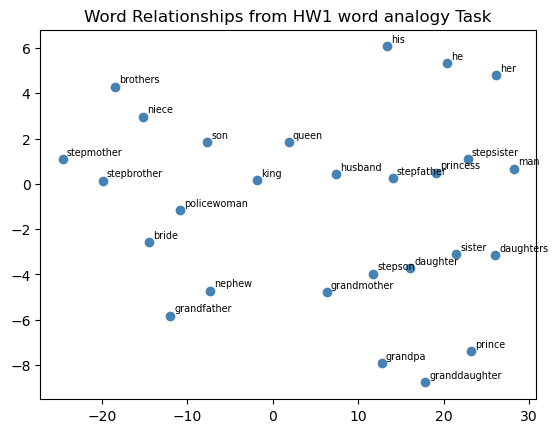

<Figure size 640x480 with 0 Axes>

In [76]:
# Collect words from Google Analogy dataset
SUB_CATEGORY = ": family"
family_words = set()
questions = data["Question"][data["SubCategory"] == SUB_CATEGORY]
for q in questions:
    for t in q.split():
        family_words.add(t)

family_words_in_vocab = [word for word in family_words if word in model.wv]

family_embedding = []
for w in family_words_in_vocab:
    family_embedding.append(model.wv[w])

family_embedding = np.array(family_embedding)

tsne = TSNE(
    n_components=2,
    random_state=69,
    perplexity=12,
)

embedding2d = tsne.fit_transform(family_embedding)
plt.scatter(embedding2d[:,0], embedding2d[:,1], c='steelblue')

for text, (x, y) in zip(family_words, embedding2d):
    plt.annotate(
        text=text,
        xy=(x, y),
        xytext=(3,3),
        textcoords='offset points',
        fontsize='x-small'
    )
    
plt.title("Word Relationships from HW1 word analogy Task")
plt.show()
plt.savefig("word_relationships.png", bbox_inches="tight")

In [82]:
# model_path = "/home/cvlab123/Kyle_Having_Fun/NLP_nthu/HW1_word_embedding/checkpoints/remove_stop_words/wiki_word2vec_20%_only_removed_stop_window=5_vs=100_sg=0_lr=0.025.model"
# model_mine = Word2Vec.load(str(model_path))

word = "water"
similar_words = model_mine.wv.most_similar(word, topn=5)
for similar_word, score in similar_words:
    print(f"    {similar_word:<15} (Score: {score:.4f})")

    groundwater     (Score: 0.7771)
    seawater        (Score: 0.7622)
    sewage          (Score: 0.7381)
    leachate        (Score: 0.7283)
    tapwater        (Score: 0.7230)
